## INTRODUCTION

This case study is the Capstone Project of **upGrad PG Diploma - Data Science** . The **6 steps of Data Analysis** is used to present this analysis.

Title: **Financial & Risk Analytics**

**Portfolio Manager : How to identify the right investment opportunity and recommend a portfolio as per the client's exact need?**

### STEP 1: ASK

**1.0 Background**
We have 2 investors here:

**Patrick Jyengar** - He is a conservative investor and he wants to invest 1 million dollars and expects double of his capital with less risk in the coming 5 years. He also wants to invest 500K dollars in a magazine(Naturo) and later wants to buy a minority portion of the same.

**Peter Jyengar** - He is an aggressive investor and he wants to invest 1 million dollars into most high margin stocks & expects retunes within 5 years.

**1.1 Business Task:**
Analysing the portfolio of stocks to provide consultation on investment management based on the client’s requirements.

**1.2 Business Objectives:**  

   1. What are the trends identified?
   2. How could these trends apply to customers?
   3. How could these trends help influence investment strategy?
    
**1.3 Deliverables:**

   1. A clean version of the final dataset.
   2. A well commented Jupyter notebook containing the entire work.    
   3. A file containing a dashboard with all the important visualisations used in this project.    
   4. A PPT file with an executive summary containing your understanding of the investor, insights and recommended steps of action for the investors.    
   5. A video explaining the presentation: As the portfolio manager, you are expected to share a video presentation that you will share with the investors.
    
**1.4 Key Stakeholders:**

   1. **Patrick Jyengar** - A successful entrepreneur - Jayengar Waterworks
   2. **Peter Jyengar** - Inheritor of Patrick Jyengar

## STEP 2: PREPARE

**2.1 Information on Data Source:**
 
 1. The data is stored in 24 CSV files and this data is of 24 leading companies listed in New York Stock Exchange and 1 file market benchmark S&P 500 index prices for the same period.
  2. The information for every stock ranges from 1st October 2010 to 30th September 2020.
  3. The stocks belong to different domains:     - Technology/ITeS     - Travel/Aviation/Hospitality     - Banking/Financial Services and Insurance     - Pharmaceuticals/Healthcare/Life Sciences
  4. Data columns :     - Date     - Open price: Price of stock at the start of the day     - Close price: Price of stock at the end of the day     - High price: Highest price reached by the stock on that day     - Low price: Lowest price reached by the stock on that day     - Adjusted close price: Stock price adjusted to include the annual returns (dividends) that the company offers   to the shareholders     - Volume traded: Number of stocks traded on the day
   

**2.2 Limitations of Data Set:**

 1. Data collected from 1st October 2010 to 30th September 2020.
 2. There are 24 different files we have to merge them in one file to do statistical analysis.

## STEP 3: PROCESS

We are using Python to prepare and process the data.

**3.1 Preparing the Environment**

 The numPy, pandas, matplotlib, datetime packages are installed and aliased for easy reading.

<a id="datadict"></a>
<h2>   
      <font color = Black >
            <span style='font-family:Arial'>
            3.2 DATA DICTONARY :
            </span>   
        </font>    
</h2>
<div>
    <span style='font-family:Georgia'>
        <table style="border:1px solid black;border-collapse:collapse;">
            <tr><th style="border:1px solid black;">Variables</th><th style="border:1px solid black;">Description</th></tr>
            <tr><td style="border:1px solid black;">Date </td><td style="border:1px solid black;">The information for stock traded from 1st October 2010 to 30th September 2020</td></tr>
            <tr><td style="border:1px solid black;">Open price </td><td style="border:1px solid black;">Price of stock at the start of the day</td></tr>
            <tr><td style="border:1px solid black;">Close price </td><td style="border:1px solid black;">Price of stock at the end of the day</td></tr>
            <tr><td style="border:1px solid black;">High price </td><td style="border:1px solid black;">Highest price reached by the stock on that day</td></tr>
            <tr><td style="border:1px solid black;">Low price </td><td style="border:1px solid black;">Lowest price reached by the stock on that day</td></tr>
            <tr><td style="border:1px solid black;">Adjusted close price </td><td style="border:1px solid black;">Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders</td></tr>
            <tr><td style="border:1px solid black;">Volume traded </td><td style="border:1px solid black;">Number of stocks traded on the day</td></tr>

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt 
import warnings
warnings.filterwarnings('ignore')

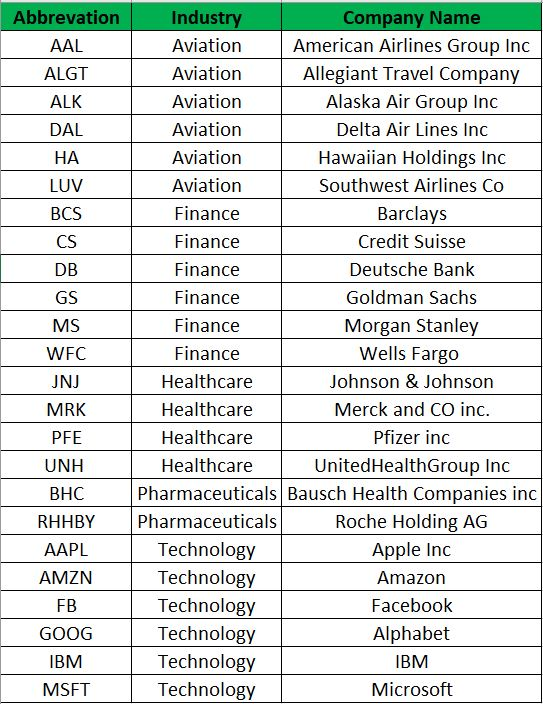

In [2]:
# Image display library
from IPython import display
from base64 import b64decode

# https://www.base64-image.de/ 
# go to the above site and upload the image and copy the image code & paste below
# after pasting the code then delete "data:image/jpeg;base64,"from the code

stocks_data_description = "/9j/4AAQSkZJRgABAQEAeAB4AAD/4RCCRXhpZgAATU0AKgAAAAgABAE7AAIAAAAFAAAISodpAAQAAAABAAAIUJydAAEAAAAKAAAQcOocAAcAAAgMAAAAPgAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHVzZXIAAAAB6hwABwAACAwAAAhiAAAAABzqAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB1AHMAZQByAAAA/+ELF2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4NCjx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iPjxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+PHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9InV1aWQ6ZmFmNWJkZDUtYmEzZC0xMWRhLWFkMzEtZDMzZDc1MTgyZjFiIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iLz48cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0idXVpZDpmYWY1YmRkNS1iYTNkLTExZGEtYWQzMS1kMzNkNzUxODJmMWIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyI+PHhtcDpDcmVhdGVEYXRlPjIwMjEtMDUtMjJUMjI6NTk6MDYuOTk5PC94bXA6Q3JlYXRlRGF0ZT48L3JkZjpEZXNjcmlwdGlvbj48cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0idXVpZDpmYWY1YmRkNS1iYTNkLTExZGEtYWQzMS1kMzNkNzUxODJmMWIiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyI+PGRjOmNyZWF0b3I+PHJkZjpTZXEgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj48cmRmOmxpPnVzZXI8L3JkZjpsaT48L3JkZjpTZXE+DQoJCQk8L2RjOmNyZWF0b3I+PC9yZGY6RGVzY3JpcHRpb24+PC9yZGY6UkRGPjwveDp4bXBtZXRhPg0KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwAHBQUGBQQHBgUGCAcHCAoRCwoJCQoVDxAMERgVGhkYFRgXGx4nIRsdJR0XGCIuIiUoKSssKxogLzMvKjInKisq/9sAQwEHCAgKCQoUCwsUKhwYHCoqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioq/8AAEQgCwAIfAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A1m8d67aMbaCeMRwny0BiU4A4FJ/wsPxD/wA/EX/fla567/4/p/8Aro386hrz3Unfc/Oa2ZYyNSSVR7s6f/hYfiH/AJ+Iv+/K0f8ACw/EP/PxF/35WvLNP8WXVz4ijt54Ik0+6klitZlB3OU7k5xg/TuKm1fX30vxhaW9zdrBp7WzSShlHLfNjnGew4FVepe1zqdXM1Pk9o72b+7p69Ldz03/AIWH4h/5+Iv+/K0f8LD8Q/8APxF/35WvNtV8RQzeErzUdCvFZ4cAOF5U7gOVYeh7iptJ8T6bfC1tDfxyXzxKXUAjLbQSM4xn2FHNVtcj6xmfs3U5paNp91ZJ66abnof/AAsPxD/z8Rf9+Vo/4WH4h/5+Iv8AvytcGfE2kLfCzN6v2kz+R5exs784x06ZPXp70248VaJa35s59QjWdW2sMEhT6FgMD8TxS5qjIWKzRuycu+3T7jvv+Fh+If8An4i/78rR/wALD8Q/8/EX/fla41NTtH1RtOWbN0kfmmPafu8c5xg9R3qBvEOlJFcyveIqWsnlSswIAf8Aujjk8ds0uep3IWOzF7Sl/wAPt953P/Cw/EP/AD8Rf9+Vo/4WH4h/5+Iv+/K1wMXijSLjT7i7trxZI7dd0nysCPTgjPX2rJXxhFqvhq6nsrmPT76JAzCRWkWIbwAc7ecj0Bxmq5qpvCtmsvtSWqT8m++l/wAPzR6p/wALD8Q/8/EX/flaP+Fh+If+fiL/AL8rXBPrtlpmk2c+r30YaaJTvCn94cDJCgZxz6cZqSPxBpculSalHdq1pEcPIFY7Tx1GM9x2pc1Qy+uZla6lK17Xtpf7juf+Fh+If+fiL/vytH/Cw/EP/PxF/wB+Vrg7XxLo97frZ2t/HLOwyqqDg8Z4OME+2a1aTnUW7M54/MKbtOcl6m3F8SPEJ126i86AbbaFt3kjJy0ox6dv1NXP+Fh+If8An4i/78rXEQ/8jJe/9elv/wChzVoUOpPuOrmWMUtKj2X5I6f/AIWH4h/5+Iv+/K0f8LD8Q/8APxF/35WuYope0n3M/wC1Mb/z8Z0//Cw/EP8Az8Rf9+Vo/wCFh+If+fiL/vytcxWL4i1i40g6f9mSNvtN0sL+YCcKfTBHNNTm3ZM0pY/H1ZqEajuz0H/hYfiH/n4i/wC/K0f8LD8Q/wDPxF/35WuDvfEukafcSwXt6kUsIBdCrZ56Y45/DNTf23p39k/2n9rT7HjPm8/TGOufbrT56lrlfXMyST5pWe2m523/AAsPxD/z8Rf9+Vo/4WH4h/5+Iv8AvyteYW3iVdT8XWlvpl4s1jJbMzoEwd4J65G4dq1k1/TJNLl1FLnNpC215PLbg5A6Yz3HahyqLqaVMTmdNpOTu7fjdJPTfQ7n/hYfiH/n4i/78rR/wsPxD/z8Rf8Afla4S98R6Tp8cD3l4sYuFDxjaxJU9DgDIH1qhqPjTTtO1W2tZGDwyp5kk6liIwRlTgKd2fahSqvYVPEZrU+Bye/4bnpX/Cw/EP8Az8Rf9+Vo/wCFh+If+fiL/vytcDc+KtFs3ZLm+WN1VWKlGyQwyMDHPHp071Yt9a0+6sbi7guA0FsWEzFWGwqMnIIzRz1LXIeMzOMeZuVvT/gHbf8ACw/EP/PxF/35Wj/hYfiH/n4i/wC/K1yVpdw31pHc2r74ZRuRtpGR9DzU1L2k11MnmWOi7Oo7nT/8LD8Q/wDPxF/35Wj/AIWH4h/5+Iv+/K1zFFL2k+4v7Uxv/PxnT/8ACw/EP/PxF/35WqelfEjxDLZu3nQJi5nXCwjtM4zz64zWJWfov/HhJ/193P8A6Pen7SdtzRZljPZt+0e6/U7f/hYfiH/n4i/78rR/wsPxD/z8Rf8Afla5iil7Sfcz/tTG/wDPxnT/APCw/EP/AD8Rf9+Vo/4WH4h/5+Iv+/K1zFFHtJ9w/tTG/wDPxnT/APCw/EP/AD8Rf9+Vo/4WH4h/5+Iv+/K1zFFHtJ9w/tTG/wDPxnT/APCw/EP/AD8Rf9+Vo/4WH4h/5+Iv+/K1zFctba9rOuXFw/h+3shZQSGPzbtmzKR/d29Px9RVKc31N6WMx9VNqpZLdt2R6h/wsPxD/wA/EX/flaP+Fh+If+fiL/vytcJca5baXYQS67JHZzSDmMEvz3xgZIp8Wv6ZNpcmoxXavaxffcKfl+oxnv6Uc9Te4vrmZW5lKVr2v0v5M7j/AIWH4h/5+Iv+/K0f8LD8Q/8APxF/35WuATxZoUlwYV1OHeF3EnIXGM/exj8M1NZeIdL1C3uJrO7WWO2UtKQrAqMZzgjJ6dqOaohyxeaRV5OS+X/AO5/4WH4h/wCfiL/vytH/AAsPxD/z8Rf9+VrgI/Fmhy3EMKahGZJgNg2sOvTJxgH2OKk1DxJpGlXAgv71IpTj5ACxH1wDj8aOaoP61mnMo3ld+X/AO7/4WH4h/wCfiL/vytH/AAsPxD/z8Rf9+Vrh7jXtLtIraW4vI0jugTC5ztbAz16Dr3qKDxPo9zZ3F1BeB4bbBlIRsqD3xjJHuKOeoSsZmbXMnK3p8u3fQ73/AIWH4h/5+Iv+/K0f8LD8Q/8APxF/35WuKn1nT7azt7ua4AguWVYWCk7ywyOAM0mt30mm6Jd3kKq0kMZZQ/Qn3pc9TuKOOzByUed6uy9Ttv8AhYfiH/n4i/78rR/wsPxD/wA/EX/fla8z0zxLc3Xh/Ubi7hijvrGJpDGudrKU3ocZzgirdt4jtYvD1nqOsTxWzXEYbCg8nvgck1TlUXU2niMzg2udt3tpr0vp8j0H/hYfiH/n4i/78rR/wsPxD/z8Rf8Afla4aLxBpc+ly6hDdq9rD/rHCtlfquM9/SoU8WaFJcGFdTh3hdxJyFxjP3sY/DNLmqGaxeaO9nLTfT/gHf8A/Cw/EP8Az8Rf9+Vo/wCFh+If+fiL/vytcTpmt6drAk/s26WfyjhwFKkfgQOPeq0PirRJ78WcOoxtMzbVAB2sfQNjB/OjmqXsH1zM7tXldb6beuh3/wDwsPxD/wA/EX/flaP+Fh+If+fiL/vytcxRU+0n3MP7Uxv/AD8Z0/8AwsPxD/z8Rf8AflaP+Fh+If8An4i/78rXMUUe0n3D+1Mb/wA/GdP/AMLD8Q/8/EX/AH5Wj/hYfiH/AJ+Iv+/K1zFFHtJ9w/tTG/8APxnT/wDCw/EP/PxF/wB+Vq74f8YazrfjXQtLvLlVhu7mVWeOJQy7baZwRxjqgHIPBPfBHF1s+B/+So+Fv+vuf/0juKunUk5JNndl+YYqpioQnNtNmZd/8f0//XRv51g+KdROm+G7qZCfNdfKix13NwPy6/hXQ3VnqTXkzR6FrkqGRiskWkXLowz1VhGQQexBwai+xar/ANC94g/8El3/APG6lwlzbHI8LiI4jndKTSd9nrr6Hm2o6Nr+neGrVnTThFpbidDCX83OcnOeOpyfpVvUdVtT4w0fVJ0Z7Y2PmsVjL+WDu+YgehPXtXffYtV/6F7xB/4JLv8A+N0fYtV/6F7xB/4JLv8A+N1d59Y/0zu9pi5fxKEm/e2TXxb9H6nmLj7TovinU7ZClldSJ5JK7d+H5YD8f1qeS5g1Wfw3p+mwOl3Zujzq0JQwgbSSeO/X8vWvR/sWq/8AQveIP/BJd/8Axuj7Fqv/AEL3iD/wSXf/AMbp3l/Kyva4rf6vLTbf+VR1010Xkcj4WhT+3PEUoUCU3ZQPjkDJNcnaLJBptzo+patLZSPI2+y/s7zWlP8AeD9TnHXIr1r7Fqv/AEL3iD/wSXf/AMbo+xar/wBC94g/8El3/wDG6Sc107fgTTqYuE5SdCWvL025VZbxf5fM4PXPM8OtomsoJJTBALWfeu1nGzjI7HOe9Qj7ToXgWxnSNDNdXAnnuJIvM8jdn58euMDPv716F9i1X/oXvEH/AIJLv/43R9i1X/oXvEH/AIJLv/43RedvhJjPF8kYyoSdnro9VrZbdLv/ACPPfDMj3firU5BdtfGWy+W4Nv5Pm8gZ2/pn2qra39u/wxvNODMLu1B86NkI25l9cYr0z7Fqv/QveIP/AASXf/xuj7Fqv/QveIP/AASXf/xuhuT+z2/At1MS5czw8tHFrT+X/t22vklY4Bp49J17R9U1NW+wnTUiSbYWET49unH86pzoZ9G8UanbxNFY3bx+SWXb5mG5YD05z+Nel/YtV/6F7xB/4JLv/wCN0fYtV/6F7xB/4JLv/wCN0Xl/L/V7ijUxUWpewlfTo7WUuba2/n+Bw1/EkX/CH+WipiRANox1VSa7WpPsWq/9C94g/wDBJd//ABuj7Fqv/QveIP8AwSXf/wAbqZKcuhw16OLrRivZS0v0fVt9vMy4f+Rkvf8Ar0t//Q5q0Kpw2epf8JNeqNC1wuLO3JjGkXJdRvmwSvl5AODgkYODjocaH2LVf+he8Qf+CS7/APjdS4S7GdXBYpy0py2XR9kR0VJ9i1X/AKF7xB/4JLv/AON0fYtV/wChe8Qf+CS7/wDjdLkl2MvqOL/59S+5/wCRHXLeNvvaL/2EI6637Fqv/QveIP8AwSXf/wAbo+xar/0L3iD/AMEl3/8AG6qMZJ3sb4fD4uhVVT2Mnbyf+RyFjGj/ABO1MuisVtU2kjOOFFc2In/4QxJRE0tta6szzRKMjywPT0/xr1P7Fqv/AEL3iD/wSXf/AMbo+xar/wBC94g/8El3/wDG6tOatod9Opi4NP2EtOXo/sprt1v8jh7a/tNT+IVndaej+S1oy+a0RQSEZ6ZHOOBWKl7HaeDtV0SaOb7eJ2dohGflQFTuJ6Acfyr1L7Fqv/QveIP/AASXf/xuj7Fqv/QveIP/AASXf/xuj3v5X/TuOM8RFr/Z5WXLbf7LbWvL5nnWsT21jHp97Bey2Wppp8YiBg8yO4XH3Bxwc9/cVZ1K9NlqXhjU9Uh+yQrCwlCIdsTFOmByOvT/AArvPsWq/wDQveIP/BJd/wDxuj7Fqv8A0L3iD/wSXf8A8bovL+UlSxNlehJ2utnezTVl7vS/W5yGmLFP8RtSuAoYi1jMbEdAQv5VieIILqx16+0mzXbFrjRshHRW3fN/XPtXpX2LVf8AoXvEH/gku/8A43WVceF9VuvE1rqsuj+IClrGUjg/sG7+8c5bOz39OwojzJq6Lw7xMavPKlKyilazesbW6d0XLa3S0tYreEYjiQIo9gMVLUn2LVf+he8Qf+CS7/8AjdH2LVf+he8Qf+CS7/8AjdZck30PIeCxbd3Tl9z/AMiOipPsWq/9C94g/wDBJd//ABuj7Fqv/QveIP8AwSXf/wAbo5JdhfUcX/z6l9z/AMiOs/Rf+PCT/r7uf/R71qfYtV/6F7xB/wCCS7/+N1n6JZ6k2nymPQtckH2y5GY9IuXAPnvkZEfUHgjqCCDgg0+SVtjVYLFeya9nLddH5lyipPsWq/8AQveIP/BJd/8Axuj7Fqv/AEL3iD/wSXf/AMbpckuxl9Rxf/PqX3P/ACI6Kk+xar/0L3iD/wAEl3/8bo+xar/0L3iD/wAEl3/8bo5Jdg+o4v8A59S+5/5EdFSfYtV/6F7xB/4JLv8A+N0fYtV/6F7xB/4JLv8A+N0ckuwfUcX/AM+pfc/8iJhuUqe4xXD+G9Yt/C1rNpGvCS1mjlLRt5bMsqnuMA+ld79i1X/oXvEH/gku/wD43R9i1X/oXvEH/gku/wD43VRjJJprc6qNDEQhKnOjJxlbo07r5Pv2OGvtQhtfF1jrmoQzR6fLaFI5JIj+6fJ6gZIyP51nshn0jxTqdvE0VjdlPJLLt8zB5YD05z+Nek/YtV/6F7xB/wCCS7/+N0fYtV/6F7xB/wCCS7/+N1fvW+H+r3OyM8TBK1CV1Zddk7rS2/n+BwmpW0BXwgphj270BXaMYIUnj60twNvi7xKBwDphJx3Oxa7r7Fqv/QveIP8AwSXf/wAbqG80rVbuxntv7A8QJ50bR7v7DuzjIxnHl0vf7d/xFB4vRSoy2a2fWXNfY8va8tr7wTp+iWkDtqUkwZU8kjPJ+cHGCMcZ+vpWn4g1O6TVtQsJbhbBWhVUVLLzWviV6Zx+Ge34V2ujaBqukaPb2P8AYfiCbyQRv/sK7XOST08s+tXvsWq/9C94g/8ABJd//G6uTfNpHub1KlZVXy4eTV5PVPdtO+sfLa3zueaQosmm+DUkUOrTuCrDIPzityG2iuPiBq9vIgMc1iokXH3s7RXX/YtV/wChe8Qf+CS7/wDjdH2LVf8AoXvEH/gku/8A43Utyf2e/wCJz1J4yd7UZK6fR9Zc3bpsea6BBdXmu2WjXgPl6JJLI5PRvmG39Tx7V13iv/kU9R/64mp9J8L6rpuo6hey6P4guJr2TeT/AGDdrsUZwv3DnGf0rV+xar/0L3iD/wAEl3/8bpT5m1oPFRxM8TGpClK0bP4Wrvd9O9zg9at3stBtNVgDbJtO+x3YUfwtHhH/AAY/kagm1K407w74e8tks4niIe/a380w8dAMd/1x7V6H9i1X/oXvEH/gku//AI3R9i1X/oXvEH/gku//AI3TvLrEIyxXKozw8nZt7Ps7dHtfrftY8vs2L+HPFTtIZizI3mNF5RfJJ3be2ev41q6lbQFfCCmGPbvQFdoxghSePrXd/YtV/wChe8Qf+CS7/wDjdH2LVf8AoXvEH/gku/8A43Red78pUquLlPmVCS1b2f8ALy9vn+Bw00Es/jHxHBacSy6dhAOMsVUD/wDXWBar9s0m30qbWJ4pY3GNPTS8yRsD13DHrnOfrXrH2LVf+he8Qf8Agku//jdH2LVf+he8Qf8Agku//jdEXNfZHTrYuEbewlpa2nVK3WL/AEfmRUtSfYtV/wChe8Qf+CS7/wDjdH2LVf8AoXvEH/gku/8A43WXJLseP9Rxf/PqX3P/ACI6Kk+xar/0L3iD/wAEl3/8bo+xar/0L3iD/wAEl3/8bo5Jdg+o4v8A59S+5/5EdFSfYtV/6F7xB/4JLv8A+N0fYtV/6F7xB/4JLv8A+N0ckuwfUcX/AM+pfc/8iOtnwP8A8lR8Lf8AX3P/AOkdxWV9i1X/AKF7xB/4JLv/AON1reDYby2+J3heS80rVbSP7ZOA91ps8Kk/Y7jgF0AJ9hzwT2NXTjJTV0d+XYTEwxdOUqckr9me96H/AMi9p3/XrF/6AKvVR0P/AJF7Tv8Ar1i/9AFXq7z9BCiiigAooooAiubmCytZbm8njt7eFC8ksrhURQMkkngAetJaXltqFnFd2FxFdW0yh4poXDo6noQw4I+lcX8S7r7a+geEoZCJde1FFnUdfssP72b8CFVf+B1D8NbkaVqXifwhPIAdG1BprVW4xaz/AL1MeyksvpxQtb/1tb/P8GD0t/W9/wDL8UdqdV05dWXS2v7Uai0XnLZmZfOMecb9mc7c98YqSS+tIr2GzluoUup1ZoYGkAeQLjcVXqQMjOOmRXh91eySafJ8WY5GMcPiNWjYA86Yv+ikfQ5aT0rvNcdZfjN4NkjYOjafqDKynIIIi5oWtv66X/4H3g9G/wCutv69Ud3RRRQAUUUUAFFFFAHN2P8AyVPXf+wLpv8A6Pvq6Subsf8Akqeu/wDYF03/ANH31dJQAUUUUAFFFYPjfxGnhPwTqutPjfa27GFf78p4jX8WKj8aUnZXGld2NOx1XTtTa4XTb+1vGtZTDOLeZZDDIOqNg/Kw9DzVuvI/CmnSfD3x74f027nJj8RaKIrhm4338J3sxPqwkb3OK0f+Ey1nR/CfjOHVbj7Trei3Tw2UnlKPOE2DafKAATl1U8dVNN6fj+Dt+PTyFHX8PxV/+A/M7qHX9Nn8RXGhRXO7UraBLiWDy2G2NiQrbsbTkg8A5rRrhfD+p+IB47vvD2p6mt01poNpMXaBApuWaRXkwoUkEqPlyBxxisefxkdK8deH7Kx8dW3iL+0b17K/0xTak25KMQ6CJRIgVl24cvw2CcjJdtUu/wDm1/X9WV9G+3+Vz0uG+tLi7uLW3uoZbi1KieFJAzwlhldwHK5HIz1FVdE1/TfEVnLdaNc/aYYp5Ld28tkxIhwy4YA8Hv0rgvBuk3q/F3xs58Q6k6wXFk0kbR2224Bt8hXxDkBRwNhU4HJJ5qK38c68fBaOlxFLquo+J5tGtbiaIbYE891DbVwGKohxnqcZz3S1t5pfjb/Mb0V/62b/AEPU6K4aS/1jwp460LTL/XLjWtP13zYB9sghSW2mjQuGVoUQFWGQQwJBAIPUVy9jr/jG9+G+u+K28SlJ9Iubw21otlD5U8cErfJMSpY5C7coUIGDyeaV0v69P8xpNtLv+t/8j2Giq2nXf2/S7W8C7BcQpLtz03KDj9as1TTTsyU01dBRRRSGFc34D/5F26/7DWq/+nC4rpK5vwH/AMi7df8AYa1X/wBOFxQB0lVINV0651K40+2v7Wa9tQpuLaOZWkhDcgsoOVz2zTtS1C30nS7rUb6QR21pC00rn+FVGSfyFeMaG1z4euvBfjjUXMb+Jbq4h1TdwALs+Zbgn0TYi89M8ULWVv6u9vvB6Rv/AFZb/ce4UVwdze+INV+LGpeH7TW303S7fSre6zb28TzrK0kg+VpFZQCF53K3QYxya5uDxH4ym+F+r+J7nxAkd3oD3MSw29lH5V99mkKs04YFhv24xGUxkn0AV1a/9WTs/wAR21t6L71c9gorzTXPHNxdeKtM0W2vNT0qCXSl1S5n0vS2vrht52pEAIpQijklihzhQCOao3fjLxbB8P2njM0Gow+IINPtrzUdOa2+3QPIgEjxOilch9pKgcg4x2qzvb+t7fmTdWv/AFtf8j0jU9f03R7zTrXUbnyZtTn+z2i+WzeZJgnbkAgcA8nArRrhdYu9b8Naj4QsDr1zqJ1LVzBeTXEECmSPyJG2AJGoVdygj+LsWNM0u71/xnqWv3Flr82i2mmahJp1nBbW0MokeIDfJN5iFmBY42oU4HXJzSWt/wCu3+Y3p/Xr/kd7RXFeNdR/s5JDefEG28MStbs1nDttU81wOWcThi43YwE2YBIJJwRzsnjjxFrPhz4dXel3kOnXPiKfyr0/ZxKmPJYsVU8jlcjnrjORkEWu3dL79Aem/Zv7j1egkKpLHAHJJ7Vxvh7UtVsviFqvhfU9Tl1aCKxhv7a6uIokmQOzI0beUqKRlAQdoPJBJ4o+Kerzad4Hms7CUx6jrM0el2ZXORJM20sMf3VLN+FJ3srddvW9vzGrXs+n+V/yOo07VNP1izW70i+tr+2YlRPazLKhIOCNykjioNE1/TfEVnLdaNc/aYYp5Ld28tkxIhwy4YA8Hv0rifBkUXhD4m634PjbZZXdrBqmnRkYAwohmUduqK3HqazJ/Gnib/hXL6jZ38R1P/hKG06KSaFNnlfbDEEYAdNuASPm98809G0l1/O6X5v+us6pO/T/ACb/ACPTNQ1qw0q6sLa/n8qbUZ/s9quxm8yTaW25AOOFJycDimabr+m6tqGo2Wn3PnXGmTCC7Ty2XynK7gMkAHg9RkVxHiiwu9P1vwDDqGrXOrTnXizXFxHFGf8Aj2l4CxooC56ZyeepqtrXjHXbTQfiZc299sl0KULp7eSh8gfZ436Ffm+Zifmz1pXSTb6X/Dl/z/rrVm2kutv1/wAj1GivO5NU8R6DqXhK71DXG1KHXblbS7s2tYo4oWeJnV4Sq7xgpgh3fIY9DjGNdeONW1m58R3Gl6prVlJpl3LZ6fZWHh6S7gneHqZpRA+d7cYV02rjuc03o2u1/wALf5oS1Sfe343/AMmeu0V5fr3jPVbe40CfX7u/8IaNf6Yk097DZpIYb12UeRM0sbiJQG6lRk5ywwa9Is5TJpsExniuy0St50AwkuRncoycA9RyevU0PRNvoK+xU1fxLoWgNEuva1p2mNMCYhe3aQlwOuNxGcZHT1q5ZXtrqNnFeafcw3dtMu6OeCQOjj1DDgivOvhhcyHwE3i46Xcaxrmt3Ust6bYxCY7ZGRY8yugCRqoULu45wOTUWr+Nnk8A/wBq+BrP+xruTxDHYzxXdvEN0xuAku8IWB3EnLA5PUHPNFnfl66fi0v13G9Lv1/C/wDlseo0Vwmr3mu6TqPh7wtba9Pc32tTTPPqlxBCJIIYowziJFQJkkgDeGxk53do11vWPD/jC/8ADl/q0mqxzaPJqdjd3EESTQshCNG3lqqMuSGB2g9Qc8Um0lf1/BX/AEY0r/13djv6K80ufFutx/BPw5r6XuNTvW04XE/lJ8/myxrJ8uNoyGPQDGeMVbl1HxFq/wAWtX8OWmtNpulWunW1zvggiadHZnGELoy4OOdwb7oAxkmqaaly+bX3K5Kaav5J/e7HoFQLfWj38lil1C13FGskluJAZERiQGK9QCQcH2Nc34B13UNWsdVstZkWe90bU5dOkulQJ9pCBWWQqOAxVxkDjOcADisZppLb4weK54W2yReG7Z0bGcEPOQaltKz6Wv8Ag2Uk3dedvxseiUV5BY+JPFlr8L/D/jfUPEBu5Z3tBdaeLOFIJYpZFjPIXeJPm3bg4XI+7jiupa/1jxN4+1nRbDWJ9FsNDigWSSzihea4mlXfyZUdQirjgLkknntVNNNrt+n/AA5KaaudtXN+KP8AkYvBn/Yak/8ATfeVu2MdzDYQR31wt1cpGFlnSLyxIwHLbcnbnrjNYXij/kYvBn/Yak/9N95SGa2h/wDIvad/16xf+gCr1cjpnhzVJ9Is5YvGmuWySQIywxQ2JSMFQQq7rYtgdBkk+pNWv+EX1f8A6HvxB/340/8A+RaAOkorm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWgDpKK5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FoAr6l8P9N17xs2u+JIrXVreOyFpaafdWiyRwHdueT5iQzHgZwMAY5zWZqXwqtI9Yn1HwbcWnhl7rS5tNuIrTT18uQOQVk2qyAOpzzznj0rb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaVla3r+N7/AJju739Pw2/Iz0+EfghfDY0g+G9LYi0+zG8NjF55+Tb5m/bnf33Zznmq0Xw/1mzXwtNY+I7U33h6ylshNd6a0qXCuEUEqsylSAg/iOetbP8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLVXd7/wBdf82SlZW/r+tDY0uLU4rPbrV3aXdzuJ8y0tWt029htaSQ59934Vcrm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWkM6Siub/AOEX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+RaAOkorm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWgAsf+Sp67/wBgXTf/AEffV0led2fhzVD8SdZiHjTXFddJsGMwhsd7gzXgCn/RtuBtJGAD8xyTxjoP+EX1f/oe/EH/AH40/wD+RaAOkorm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWgDpK5zxf4Rj8Yx6Za39wo021vUu7q0aEOLwIDtjYk4C7iCQQc4xxSf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0AZeufCnw7exWUvh7TtN8PalY3sN5Be2WnxqwKNkqwXaWVhkEZ9D2qfW/h+mseOrHxB/aBgt4TC13YiHcLt4S7QsW3DbtZyehzgdKu/8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi0LS3k7/MHqmu+hHeeCor/wASa5qVzeyCHWNKTTJII02tGoMmXD5PJEnTHGO9Y1r8ONUC+GIdS8RW0tt4ZniktYbXS/IEoSNk/eEyt82CMFdoHzZU5G3d/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaFpt/Wrf5tg9d/60t+SEtvC15p3jrUde03U4UtdWEJvrOe0MjFokKBo5A67MjbkFW6ds1mD4ZwHwnLpEmpyC4XVpdXs72KIK1tO0rSJ8pJDAbip6bhnpnjU/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5Fo2/r0/yQf1+n6jLTwrf3PiSz1vxRqtvqNxpyOtjDZ2ZtoYmcYeRlaSRmcr8oO4AAnjJzVOx+H32P4d6z4W/tPf/ajXjfavs+PK89mP3N3O3d6jOO1X/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWk0mrP0Gm000bem2f9n6VaWW/zPs8KRb8Y3bVAzjt0qzXN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItU227slJJWR0lFc3/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLSGdJXN+A/+Rduv+w1qv8A6cLij/hF9X/6HvxB/wB+NP8A/kWuf8F+HNUm0G5aPxprkAGrakpSOGxIJF9OC3zWxOWILHtknAAwAAdN4z8NP4u8Lz6J9uNlBdOguXWPezxBgXQcjBYDGecZPBrF8RfCPwhrXh2706w0LStIupkxBf2enxJLbuCCrgqAeCBkZGRkZ5rU/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaQ7jtM8Ly2XjC58QXOoC5mutNt7KSMQbBuiZ2Mmdx+8X+72x1NZyfD7Z8PNd8L/wBp5/teW8k+0/Z/9V9odmxt3fNt3Y6jOO1X/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWm1dWfn+Lu/wARLTby/BW/Iq3Pgm6h1HStW0DVksdVsLEadLJcWpnguoBzteMOhBDDcCHGMkHINS6x4Sv9f0C1stW1lZLqHUYL5p47MJH+6kVxGibiVU7cZZmOSTk8AS/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItO7vf5/jf8xWVrfL8LfkT+IPDX9u6roN79r8j+x743mzy93nfu3TbnI2/fznnp0rMj8G6rpOr6rceFtdg0+01ef7Vc21zp/2gxTkYeSFhIgXcADhlcbhnocVc/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FpLT+vT/JD3/r+u7KNx4I1GPxRquraPrsdquswQw3wnsBNMPLUpuik3qqEqejI6hhnHOKr6f8NBYaT4MsRqu8eFpjKHNvj7TlGXGN3yfeznnpWt/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0bfh+GwPX+vkWIfDflePrrxL9rz9o06Ox+zeX93ZIz792ec7sYx261U8R+CLTxX4k0m91sw3em6YsrDTJ7YSRzSuNodyxIIVc4Xb1Oc0//AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5Fo7eX9fqHd9yhcfDLRIPE2ia54atLHQLrS53aUWViiLdROhVo227fYgnOPTmoR8NseFxo/8AavTXf7Y877N/08ed5eN3/Ad2ffHatX/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWhaO/9bp/ml/TYPX+vX/Nk/iDw1/buq6De/a/I/se+N5s8vd537t025yNv38556dKxtR+HX9oaX4zs/wC1PL/4SiQPv+z5+y/ukjxjd8/3M/w9a0v+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORaVlZrv+tv8kO+qfb/AIP+bF1bwn/ai+HB9t8r+w7yO6/1W7z9kbJt6jbndnPPSqkPhDVtH1bU5/C2u29lZ6pcG7ntbzTzc+XO3DvEwlTbuwDtYMAQSODirX/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItVd3b7/wDA/wAkTbS39f1qxdd0LxBqFrJa6Z4igt7e4tPs04vNNW4bOCDIhV4wGIPIYMuQMKOQdTQ9HtvD+gWOkWJc21jAkERkOWKqMAk+vFZX/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLSGVLbwdqegX16/g/W7exsr6drmWw1Cxa6iilY5ZodssbIGPJUlhk8beaqJ8M0j8JQ6OuquZf7YTV7i4aAYklEwldVQN8qkjAyWIHdq1v8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWhaWt0/T/AIZA9dyTxP4W/t660zUbK9On6tpMzS2dyYvNQbhtdHTILIy9QGU8AgjFQ6Z4SlGuXWt+I7+PU9SuLX7CvkWxt4ILfO4oiF3OWblmLHOABgCnf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0rIL/1+Jzb/AAt1Obwzp3h2bxWf7K0m5hms447ALI6RSBljnfzCJAFGAVCcgE5xiqv2HVbr4/a/Lomqx6fPDo9oGW4tvtEMqlpOGQMjZGMghxjnOQcV13/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItPrf1/FWDpb0/B3LHhLwynhbSZbY3cl9d3Vw93eXcihTPO5yzBRwq8ABecAAZPWq8nhLzPFmr639tx/aemR6f5Plf6vYZDv3Z5z5nTA6deaP8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWk0nv/WlvyGnb+vO/5mc/w83fC3TvBv8AamPsIth9s+z/AH/JkV/ubuM7cdTjPerd54Sv4PFt14h8L6tb6dc6hAkV9DeWRuYpjHxHIAskbK4BKk5IIxxxmpv+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORapu7uJaKyN2yhmt7GGK7umu50QCSdkVDI3c4UAD6CsLxR/wAjF4M/7DUn/pvvKP8AhF9X/wCh78Qf9+NP/wDkWsbVdEv7DxV4PkuvE+q6kratKoiuorRVU/YLs7h5cCHPBHJI5PGcEIDr9D/5F7Tv+vWL/wBAFXqo6H/yL2nf9esX/oAq9QAUUUUAFRzzx21vJPO4SKJC7ueiqBkmpK4L4vXl4/g5PD2jMv8AaniO4XTbcFsYRuZWJAJCiMNk4OM1Mr203HG19dhvw98f3/ijVLmz1q1gtWns49U01YkZS9nIzKu/cxy42jJGB8w4rb8PeIrvVvFnifTLmOFYdIuYYoGjUhmDwq53ZJBOT2A4rg/Ev/CQeFvE3hLxNf6TpdhpumuNJuzZahJcEW821FLBoIwFRlU5yeT0rT0HxRoGgfErx3Fruuabpkkt7bNGl5dxwlx9mTkBiMir0vp5/g1b8Gidevl+T/VHRal4l1K98XSeGPCsdqLq1gW41C/vVaSK0Dn92gjUqZHYBjjcoUDOT0q5BB4vWK6hutR0R5GRTbXkdhMoRt3zK8BmO4Y6MJV5P3eOeTW8s/CvxJ13U9Zn8nw/4ptbaW31cSFYIpI0KGN5gf3e5SrIxIB5wc8UeCLmGf4o6wvh3WL3VvDsemQBJm1Sa/t1ud7F1WR3cb9u3IB6EUoq9l6/r/w3n8xydtfT9Pv/AK7FvS9W8b6l4w1zQzq/h+P+yFtz539iznzfNQt937X8uMY6nPtXoAzjnrXDeF/+SveOf9zT/wD0U1dzR0QdQooooAKKKKAObsf+Sp67/wBgXTf/AEffV0lc3Y/8lT13/sC6b/6Pvq6SgAooooAKjnnjtreSedwkUSF3c9FUDJNSVwXxevLx/ByeHtGZf7U8R3C6bbgtjCNzKxIBIURhsnBxmple2m442vrsN+Hvj+/8Uapc2etWsFq09nHqmmrEjKXs5GZV37mOXG0ZIwPmHFdTZ+KdGv8AQrrWLW9DWFm0y3ErRsnlGIkSBlYAjG09q818S/8ACQeFvE3hLxNf6TpdhpumuNJuzZahJcEW821FLBoIwFRlU5yeT0qLxPC+m+K9a8E2gaOPxpdW9xBs4Co2VvSPfZFu+r1b10j5pet9P/JdWStNZeTfp1/HbyO60jxFa6l4nuri38SCbT20qC9j06SxMIgjcsROZWAJDBT8p6YzVuy8caBf6zb6XDdTpdXSu1qLiyngS6CAFjFI6BJBgg/ITkcjjmuYSZtI+LXiiewsmuWs/DVq8NnCMGTY85WNeOM4AHFcnc+LbrxXr/w/u21zRr4SatHPJZaXbSb7EvDJhJpTKw3YJXaUQsQxAwpFEbNpLv8AnJpf1+WgO6Tb6L/21P8Ar/hzu/D/AMQ11fx5r2hTWl2kNlNBFaOulXSk7o9z+axTag3fdLbQRyM9avaB4gtbXwvf6prPieLUbW2vZ0kvpbUWqw7ZCnk7f4ip+UHqxxjOax/D2oWel/GXxjZaldQ2l1qbWMtjDPIEa6UQFSYwfv4KsDjOMVx0MM3/AAru3vxbSXNlpnjee8v0jQuRAl1JufaASQpKsfYE9qmOtvRfnFP7rjei/rs3+J6xpPi/RtZ1J9OtJriK+WITfZr2ymtJHjzjeqzIpZQRglcgcZ6is4fE/wAItG8iaqzwwzGCedLSZorZw+zE0gTbF83dyoI56c1i3+p2Pi/4meEp/Cd9b6nFpLXM9/d2UglihjeLYsbSLkbmbGEznCk44rntERT+zt4zyo+aXVyeOv7ySk3ZN9k39zX+Y4q7S7tL8/8AI9nByMjkUVneHSW8L6UWJJNnCST3+QVo1pKPLJoiL5ophRRRUlBXN+A/+Rduv+w1qv8A6cLiukrm/Af/ACLt1/2GtV/9OFxQB0lFFMmmjt4JJp3WOKNS7uxwFAGSTSbSV2G55/4x+It34d8WR2lnBby6Xp62z61NIjF4VuJfLj2EMACMFjuB4xitjxhrV/pev+EbewuPKh1HVTb3S7FbzI/IkbGSDjlQcjB4rz/QtH8UeMvBnii+GlaXNB4ykllinvNRkgligC+XB+7Fu44VQw+bnPan6fr1x4g0j4Zy6kpTUrTXHsb5D1WaKCZGz7nAP404p6J73X4tXXy2+YpdWuz/AAWj+er+R3HhzxJcTa/40XWr6NLDR75EheUJGsEX2eN2y2Bxkk5Y1paN410LXr5LPT7mdbiSH7RFHdWU1sZo/wC/H5qL5i8jlc4yPUV5jr+m6jq2jfFW10eOeW5Oq2r+VbqGkkRYoGdVHc7QeOc9Oc10mhjw54k8TaLqVr4+vvEd5YLJNbWoNqfKDxlW81YYFZODjDkfMAOvFKOsU/Jfl/X4jel/V/mbd/8AE/wpptwYbi+unxdfYhLb6bczxPcf88lkSMoz542gk5BHUVZt9VX/AITfUYpvEANvDp0Vw2lyWflfZVJb98ZiBnO0jafu7a8g8P6m154K0fRNZC6PodrrAuX1CW1vGZNt0zrCzm3WBT5mEMnm468c4HfNeS2Hxg8V3ttavezW/hu2ljtoj80zK85CDrySMfjReyTfn+Eb/n/WzG1q0vL/ANKt+X9bo6Wy8caBf6zb6XDdTpdXSu1qLiyngS6CAFjFI6BJBgg/ITkcjjmoLv4jeGLK8v7WS/mluNNcreQ21lPO9vhQxZxGhITB++fl6jOQa8zufFt14r1/4f3ba5o18JNWjnkstLtpN9iXhkwk0plYbsErtKIWIYgYUiuu8Cqp8UfEfKg51YA8dR9nSiV0m+1/wt/mLql3t+N/8i94z+IUXh4eHJNNVr2DV7+GNpobKa5Rrd1Ylo2iBBc4GF5JGSFNdZFdNqOk/aNOZoHmjJha7tZEKN2LxNsfr1U7T7jrXjVpKtr8F/hnqF03l2dhq1pNdXD8JBHmRN7noqgsoyeBkV7VaXltqFnFd2FxFdW0yh4poXDo6noQw4I+lW1ZSXZtfghXd0/Jfm/6+44Q6t43HxAXwz/a/h/5tNN/9p/sWftIE2bftfvnOfwrdn8a6RpWoLo2q37XGtRxxtNb2OnzyM+8Md6xoHbb8jZ5bbxk8jOU/wDyX+P/ALFpv/SkU3Ro0Px18USlFMi6TYqr45ALS5GfQ4H5CpjrGPnf8G/8hy0cvK348v8AmbOqePfDujTSJqN7LHHFIsU1ylnNJbwOWChZJlQxxnJGQzAjIzjNaUGu6bc69c6LDc7tQtYUuJYSjDEbkhWBIwwyCOCcd68j+Ifji+1Xw3410h9Q0nS3tFuLNNHmtpJ7+8QR7vOTEi7UZTuB8t1VQWJwDjW8SX8Xg6Hwn46mUmGHTTp9+w6ujw+ZFn1xKgH/AG0pJ6Xfl+Kdvxt942ney31/C1/wudtL468OQ293M2oFhaX39nOscEju9zxmKNFUtI3PRA3Q+hrL8S+NYJvhn4l1jwtesl7plrN/rbdo5baZUyA8Uqgqehwy8jnpXD32g3nhqDwFqOqandaPbxtdS6vqVukTfZru6UNvkMiOoUuWj3suBkDIzV3XrHRj8OviDrOj+JbrxHPfaX5dzeO0LQ5jjcKEaGNELANzjJHy5xxlVE1CXdJ/f/X5r5uDTlG2zf4Hq2mzPcaTaTTNukkgR3bGMkqCTXJ6T4h8Q+M/td94Ym0zTdIhuJLa3nvrOS6e8KMVeQBJYwibgQOWJxn5eldRo4zoNiP+naP/ANBFee/DzX9I8CeGB4S8X6naaLqOlzSqFv5lgW5haV2jliZyA6kHB29CCCBWlS3tJL+t/wCv6RnC/s0/T8jtLvxJb6FY2I8SOkWoXQwtpYRy3TyuBl/LRE8x1HUnbwDzTYfGmgT+Hb7W0v8AFjp2/wC2F4JEktin3leIqHVh1wVzjB7iuSvtasbD4saZ4n1WT7JoV9oTWtrqF5G0EcM3nbyrmQDyy6YxuxnbxWB4gP8Aami/FXxDpzeZot7pUcFtcKP3d1JFC4eRD/EoyF3jg4IBOKiTai5evys/6+80STko+nzvb/P8Gegj4keEzcRxPq6RCaJpoJ5oZI4blVALeVKyhJSNw4RmP5Gr+l+LdG1eO+azuJVfTwDdQXNrLbzQgruBaKRVfBGcHGDg46GuO8TwQ/avhinlJsTU4wi7RhcWkhGPTGB+Qpt0T/wuTxWMnB8Kwkj/AIHLTqe7e3S6+5X/AOATD3rX62/F2OktPiR4VvjZm11NpIb5kSC6FrMLcu4ysbTbNiOePkZg2SBjJFW9b8Z6J4feZdRnuCbePzbj7LZT3It0xndKYkbyxjJG7GQCR0NeO2WuaTqv7N2l+E9LcNr97bwW8GmIm24MnmB/OCcHYADJ5n3cAnOa7bxL43vrfxLqvh7+0tJ0MWlrEYP7RtpLmfVTIp/4941kjJwwKYXeS3Ydyp7t7dL/AIBT96zZ1up+NPDuj2enXeo6rDFbaocWUwBZJyU3jaVBHI6epwBkkCoU8e+HW0vU797yaGLSVD30dxZTxTW6kZDNC6CTaRyDtwcH0NeWaAC3hL4MCQZIvG4btiGXH5Yrthaw3nxv1u0uEDwXPhqCOVD0cGaUHP4E05JqTS7tL5K4ou6TfZP73Y6zUfEelaVaWNzfXYSHUJ47e1ZUZ/Okk+4oCgnnrnoBya068S+H0V7qnjLS/CuqIzx/D9J1ldh8ssjMY7Vvwh3Ee9e20aWutnt6dP69A1vZ7rf1Cub8Uf8AIxeDP+w1J/6b7yukrm/FH/IxeDP+w1J/6b7ykMq6Z400u10izt5bXXGeGBEYxaBfSISFAO11hKsPQgkHqDVr/hPNI/58/EH/AITmof8AxitbQ/8AkXtO/wCvWL/0AVeoA5v/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YrpKKAOb/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GK6SigDm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xit+5uYLK1lubyeO3t4ULySyuFRFAySSeAB6021vbW+so7yyuYbm1lTfHPDIHR19Qw4I96AML/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8Yres7211Gzju9PuYbq2lG6OaCQOjj1DDg1EmradJZ3F4l/atbWpdbicTKUhKffDNnC7cHOenegDG/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GK37W7t760iurKeK5t5lDxTQuHR1PQhhwR7ipaAOb/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukooA5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDzuz8aaWvxJ1m4NrrmyTSbBABoF8XBWa8Jynk7gPmGCRg8gE7TjoP8AhPNI/wCfPxB/4Tmof/GKLH/kqeu/9gXTf/R99XSUAc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xWzY6rp2ptcLpt/a3jWsphnFvMshhkHVGwflYeh5q3QBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxWnDr+mz+IrjQorndqVtAlxLB5bDbGxIVt2NpyQeAc1o0Ac3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMVuw31pcXdxa291DLcWpUTwpIGeEsMruA5XI5Geoqromv6b4is5brRrn7TDFPJbu3lsmJEOGXDAHg9+lAGZ/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MVz/AIL8aaXbaDcpJa64SdW1JwY9AvnGGvp2HKwkZwRkdQcggEEV6JXN+A/+Rduv+w1qv/pwuKAD/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axio5/G2jXFvJDJZ+IdkilGx4d1AHBGOvkV1FVDqunLqy6W1/ajUWi85bMzL5xjzjfsznbnvjFJpNWY721PJEskPg9PB02s603htV8jYngvUFvGtw2RGZtpTOMKWEQJGehOa9Aj8caNFGsaWXiAKoCqP+Ec1DgD/thWxNrVhb67a6PNPtv7uGSeGHYx3ohUMd2MDG5eCc81eqrt6k2Ob/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGK6SqMWtWE2vXGixz51C3gS4lh2N8sblgrbsYOSrcA54pDMn/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xit+5uYLK1lubyeO3t4ULySyuFRFAySSeAB61HFqVlPpY1K2uop7IxGVbiFxIjJjO4Fc5GPSldLUDE/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrW0bWbDxBo1tqukT/aLK7TzIZdjJvX1wwBH4ir1N6aML31Rzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFaOr+JdC0Bol17WtO0xpgTEL27SEuB1xuIzjI6etXLK9tdRs4rzT7mG7tpl3RzwSB0ceoYcEUAYX/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMVBfeM9IvNPuLX7N4gTzomj3f8I3qB25BGceT711dQLfWj38lil1C13FGskluJAZERiQGK9QCQcH2NJpNWY02ndHE+Edd0jwr4P0vQtniC6/s+3WDz/wDhGNQTzMDrt8k4+mTWz/wnmkf8+fiD/wAJzUP/AIxXSUVTbbuyUklZHN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xXSUUhnnXhjU9J0C/1y/uTr97eaxfG6klHhbUI9iBQscQHlHIVR1zzk8Cuh/wCE80j/AJ8/EH/hOah/8YrpKKOlgOb/AOE80j/nz8Qf+E5qH/xisbVfFFhq3irwfDa2+qxsmrSuTdaPd2ykfYLscNJGoJ5HAOepxgGu9rm/FH/IxeDP+w1J/wCm+8oA1tD/AORe07/r1i/9AFXqo6H/AMi9p3/XrF/6AKvUAFFFFABRRRQBwvxLuvtr6B4ShkIl17UUWdR1+yw/vZvwIVV/4HVX4e3H9mXHizwfM/zaPeyTWqHjFrOPNQAeilmX04rY1L4f6br3jZtd8SRWurW8dkLS00+6tFkjgO7c8nzEhmPAzgYAxzmorb4b6XpPjWLXvDcdro0RsZLK7sbSzVI7gMwZX+UgBlI64ORxxU2fK13v/wAD8l97H19Lf8H8/wAEM+D/APySDw5/16D/ANCNeZ6A/wDwkHieXwdrvmWOgXWu6jdFiwC6tMk+RbZB+VQPmIPLYwOmT6d4Q8K+JPCmkabo66/pV1ptioj2nSJEmdM5xv8AtJUHnrsP0qF/hla3HhLUtGur52lutTm1S0vYo/Lksp3cujJ83VCeuRkZHGauTXtHPpr+a/4f5C+xy+n5P+vmduiLHGqRqERQAqqMAD0FLVbTYbu30u2h1K7W8u441Wa5SHyhKwHLbMnbnrjNWaHuJbBRRRSGFFFFAHN2P/JU9d/7Aum/+j76ukrm7H/kqeu/9gXTf/R99XSUAFFFFABWD438Rp4T8E6rrT432tuxhX+/KeI1/Fio/Gt6uc8X+EY/GMemWt/cKNNtb1Lu6tGhDi8CA7Y2JOAu4gkEHOMcVMldWHF2dzhvCmnSfD3x74f027nJj8RaKIrhm4338J3sxPqwkb3OK0f+Ey1nR/CfjOHVbj7Trei3Tw2UnlKPOE2DafKAATl1U8dVNaeufCnw7exWUvh7TtN8PalY3sN5Be2WnxqwKNkqwXaWVhkEZ9D2qfW/h+mseOrHxB/aBgt4TC13YiHcLt4S7QsW3DbtZyehzgdKt+9v1uvk3e/5pEr3dd7Wfq1pb9St4f1PxAPHd94e1PU1umtNBtJi7QIFNyzSK8mFCkglR8uQOOMVjz+MjpXjrw/ZWPjq28Rf2jevZX+mKbUm3JRiHQRKJECsu3Dl+GwTkZPVXngqK/8AEmualc3sgh1jSk0ySCNNrRqDJlw+TyRJ0xxjvWNa/DjVAvhiHUvEVtLbeGZ4pLWG10vyBKEjZP3hMrfNgjBXaB82VORtIu7Tff8AV/p/WgNWTt2/Rfr/AFqUvBuk3q/F3xs58Q6k6wXFk0kbR2224Bt8hXxDkBRwNhU4HJJ5qK38c68fBaOlxFLquo+J5tGtbiaIbYE891DbVwGKohxnqcZz36628LXmneOtR17TdThS11YQm+s57QyMWiQoGjkDrsyNuQVbp2zWYPhnAfCcukSanILhdWl1ezvYogrW07StInykkMBuKnpuGemeJXS+1l+cb/gmU/Lf/gP9bCSX+seFPHWhaZf65ca1p+u+bAPtkEKS200aFwytCiAqwyCGBIIBB6iuXsdf8Y3vw313xW3iUpPpFzeG2tFsofKnjglb5JiVLHIXblChAweTzXdWnhW/ufElnrfijVbfUbjTkdbGGzszbQxM4w8jK0kjM5X5QdwABPGTmqdj8Pvsfw71nwt/ae/+1GvG+1fZ8eV57Mfubudu71GcdqTvZ23s7et1b9Qja6vtdX/H/gHVadd/b9LtbwLsFxCku3PTcoOP1qzVbTbP+z9KtLLf5n2eFIt+MbtqgZx26VZrSVuZ22IjflV9woooqSgrm/Af/Iu3X/Ya1X/04XFdJXN+A/8AkXbr/sNar/6cLigDpKKKKACiiigBCQqkscADJJ7V4TdXskmnyfFmORjHD4jVo2APOmL/AKKR9DlpPSvZvEGnXOr+Hb/TrG9+wT3cDwpdeV5nlbhjcFyMnB45HNc4nwj8EL4bGkHw3pbEWn2Y3hsYvPPybfM37c7++7Oc80tU+btb87/pb5sejVn1/wArfrf5EGqusvxv8KyRsHRtHvmVlOQQWh5rG8Y+MZfC15BcQ+PbS+1GPUoIbrw+otQrRO4RlVADOjBWDZLtyDxg4HRaJ4Dn0u/8NXd3rP22TQtMl04n7NsNwHKYcnedpAjAxznOeKxm+E9+fCkfhhPEkMejW94Lu3VNNHnsRP5oWWQyYcdRlVQk7STwQ1KycV0T/Dmb/InVpvq//kbfmP1/xTe6f8RJtO1vXpvDGnssI0iY2kb2t9IQzSLNK6HBBGNgeM46HJGMTxT4quPDPxj1SLTYEl1TVNLsLKye4ylvFK0s2Hlfoqjrt+8x4APbtvFXhLV/FFtfaVNr8MWh6gUE9udPD3CINu5I5d4VQdvVo3ILHnphmpfDnTdZ1nWLjVXFxY6ppcOnNaGPBjEbOwkD5+9lxjjgqDmpXTyv+T/4b/Irv8vzX9f8OWL9LvR/ClmuveNk08wgLe6xNDbwvK56bd48qME8YKMccZz81Zvw18Uza/N4hsJdYh12LSr8RW2qRCP/AEiJ0Drny8IWUkqSoAOOgOadN4E1aW38N3L+I4rjWfD7SiK9u9P8yOdHQp+8jEineBt+cOOQeOa0fCfhGfw5qmuahe6r/aNzrM8dxKfs4iEbLGEIUAn5eOAeQMAljljXVt/1qv8Agk9Ev66/8AzPiXdfbX0DwlDIRLr2oos6jr9lh/ezfgQqr/wOqfgC8bR5PF3hNpcS6JeST2akdLacGWPA9FJZfTitrUvh/puveNm13xJFa6tbx2QtLTT7q0WSOA7tzyfMSGY8DOBgDHOagh+Gul6Z4xTXPDaWuixPp8tjd2VpZqkdwGIZX+UgBlI64ORxxUa8r87/APA/Jfey9OZeVv8Ag/n+COYh8V+KtS8I/DlrPVkgv/EDGO+uXto2yPIdiwXbgMCNwAwMgA5GRXqNlbzWWnpDPe3GoSxg5uLhYxJJznkIqr7cAVyenfDz+z9N8GWn9qeZ/wAIuxbf9nx9pzE0fTd8n3s/xdMV2taTs3K3czjeyv2/HU8z+GFzIfATeLjpdxrGua3dSy3ptjEJjtkZFjzK6AJGqhQu7jnA5NRav42eTwD/AGr4Gs/7Gu5PEMdjPFd28Q3TG4CS7whYHcScsDk9Qc810Vt4O1PQL69fwfrdvY2V9O1zLYahYtdRRSscs0O2WNkDHkqSwyeNvNVE+GaR+EodHXVXMv8AbCavcXDQDEkomErqqBvlUkYGSxA7tSVm1fbT81p6WuVLrbz/ACdvnsJq95ruk6j4e8LW2vT3N9rU0zz6pcQQiSCGKMM4iRUCZJIA3hsZOd3aNdb1jw/4wv8Aw5f6tJqsc2jyanY3dxBEk0LIQjRt5aqjLkhgdoPUHPFb/ifwt/b11pmo2V6dP1bSZmls7kxeag3Da6OmQWRl6gMp4BBGKh0zwlKNcutb8R38ep6lcWv2FfItjbwQW+dxRELucs3LMWOcADAFQ7tP5/lp+NvxKVl+H56/gc1c+Ldbj+CfhzX0vcanetpwuJ/KT5/NljWT5cbRkMegGM8Yq3LqPiLV/i1q/hy01ptN0q1062ud8EETTo7M4whdGXBxzuDfdAGMk1Xf4W6nN4Z07w7N4rP9laTcwzWccdgFkdIpAyxzv5hEgCjAKhOQCc4xVX7Dqt18ftfl0TVY9Pnh0e0DLcW32iGVS0nDIGRsjGQQ4xznIOKttOenVv7uXT8UZ2aj6Jf+lf5HT+Add1DVrHVbLWZFnvdG1OXTpLpUCfaQgVlkKjgMVcZA4znAA4rGaaS2+MHiueFtskXhu2dGxnBDzkGuo8JeGU8LaTLbG7kvru6uHu7y7kUKZ53OWYKOFXgALzgADJ61Xk8JeZ4s1fW/tuP7T0yPT/J8r/V7DId+7POfM6YHTrzUTvZW3t+PK1+ZpG13fa/4cyf5HCWPiTxZa/C/w/431DxAbuWd7QXWnizhSCWKWRYzyF3iT5t24OFyPu44rqWv9Y8TePtZ0Ww1ifRbDQ4oFkks4oXmuJpV38mVHUIq44C5JJ57Ur/Dzd8LdO8G/wBqY+wi2H2z7P8Af8mRX+5u4ztx1OM96t3nhK/g8W3XiHwvq1vp1zqECRX0N5ZG5imMfEcgCyRsrgEqTkgjHHGa0lbmfa7/ACVv1IjflV97L8zo7GO5hsII764W6uUjCyzpF5YkYDltuTtz1xmp6gsoZrexhiu7prudEAknZFQyN3OFAA+gqek9xhRRRSAK5vxR/wAjF4M/7DUn/pvvK6Sub8Uf8jF4M/7DUn/pvvKAKumeHNUn0izli8aa5bJJAjLDFDYlIwVBCruti2B0GST6k1a/4RfV/wDoe/EH/fjT/wD5FrW0P/kXtO/69Yv/AEAVeoA5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRa6SigDm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFrpKKAOb/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWqF/rfiO7+JFx4b0S60uyt7fTIr1pbywkuXdmkdNvyzRgD5R61Z8O+KL648TX/hfxJbQQavZwpcxzWpPk3tuxKiVFbLIQw2shLYPRmBoWv9dgen9d/+HJv+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORawLj4jXcPxKTSxBbnQPty6RJclG80XrQmUANu27PupjGdx61v6p4iu7L4haDoMUcJtdStrqWZ2U71MQTbtOcAfMc5B7dKFrbz/wAr/lqGzt/Xb8w/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FrpKKAOb/AOEX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ra6SigDm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWukooA87s/DmqH4k6zEPGmuK66TYMZhDY73BmvAFP+jbcDaSMAH5jknjHQf8Ivq/8A0PfiD/vxp/8A8i0WP/JU9d/7Aum/+j76ukoA5v8A4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FrpKKAOb/AOEX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ra6So5547a3knncJFEhd3PRVAyTSbSV2G+hz/wDwi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLWJ8PfH9/4o1S5s9atYLVp7OPVNNWJGUvZyMyrv3McuNoyRgfMOK6mz8U6Nf6Fdaxa3oaws2mW4laNk8oxEiQMrAEY2ntTem4LV6FH/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWoNI8RWupeJ7q4t/Egm09tKgvY9OksTCII3LETmVgCQwU/KemM1bsvHGgX+s2+lw3U6XV0rtai4sp4EuggBYxSOgSQYIPyE5HI45p2e39f1oK5H/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1l+H/iGur+PNe0Ka0u0hspoIrR10q6UndHufzWKbUG77pbaCORnrV7QPEFra+F7/VNZ8Txaja217Okl9Lai1WHbIU8nb/EVPyg9WOMZzS8/K/5f5jJv+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFqzpPi/RtZ1J9OtJriK+WITfZr2ymtJHjzjeqzIpZQRglcgcZ6is4fE/wi0byJqrPDDMYJ50tJmitnD7MTSBNsXzd3KgjnpzR5AWP+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORa6QHIyORRQBzf/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLXSUUAc3/wi+r/9D34g/wC/Gn//ACLXP+C/DmqTaDctH401yADVtSUpHDYkEi+nBb5rYnLEFj2yTgAYA9Erm/Af/Iu3X/Ya1X/04XFAB/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi10lFAHN/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItdJRQBzf/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLXSUUAc3/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi1lW2teK9c8X+JNN0m+0axttHnhhj+06bLcPJvhV8lluEA5OOlX/DXjMajBrEHiKGDSNS0GXy9RUzhoVUrvWZXIH7tl5+YAjBB6Zo6X8r/ACAm/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Ram0bxroWvXyWen3M63EkP2iKO6sprYzR/34/NRfMXkcrnGR6iuFm+Jeq6N8MNS1y5LX1/FrVxaW5ayeSNY1u/LAfygAuE4BYjJx1PBOtv63S/Nh/X4XO0/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5Fqy/i7SYtNivJTfRrM5SK3fTbhbmUjrttzH5rADkkKQBz0qxoXiLS/EtlJdaNcmeOGZ7eZXieKSKRThkdHAZWHoQDyKAM7/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRal8a+IZPDPhiW8tESW+lljtbKKQEq88rhEBAIJGTk4OcA1V8IeJrjxL4PuLm9aKz1OzmuLK98mMlIZ4mKllUknHRgCehpX0b7f1+q+8dtUu/9f5/cS/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItUtN8a6PpHgzQ73X/Eo1D+0Yj5GomyaH7YQpfIiVflJUcL1JwBkkCupsL6LUrGO7t0nSOQEqtxbyQOOccpIqsPxAqmrNolO6TMP/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5Fo8FeIrvxJp+pT30cMbWmq3VkghUgFIpCqk5J5x17ewqvbeJLXS5vFd9rHiT7XY6XOplh+wlP7NXy1YpuUZlyGDZGeuKV9L+V/y/zH1t52/P/Isf8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi1Jp3jnw9qup29hY37PLdKzWrvbSpFdBRlvKlZQkuAc4RjwCexpuqePPDujX09pf3sgktQrXTw2k00dqG+750iIUi45+cjjnpzQA3/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWreq+LdH0ae3gu7iaWe4iM0UNlay3UhjGMybIlYhMkDcRjnrWrb3EN1bR3FtKk0MqB45EbKupGQQe4IoA5//AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrN0T4h2v/CJ3Wt+Lbi106CHV59PEqowQBZ2ijLdcZwMscAdeBW5pHi/Rdb1KSwsLmUXaRCcQ3FrLbtJETjzE8xV8xM/xLkcjnkULVaf1pcNv687FX/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWpH8c+H01SSwF5K8kVwLWWaOzme3imJAEbTqhjVssBgsCCQOtdBR0uHkc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i10lFAHN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItdJRQBzf/AAi+r/8AQ9+IP+/Gn/8AyLWNquiX9h4q8HyXXifVdSVtWlURXUVoqqfsF2dw8uBDngjkkcnjOCO9rm/FH/IxeDP+w1J/6b7ygDW0P/kXtO/69Yv/AEAVerkdM8aaXa6RZ28trrjPDAiMYtAvpEJCgHa6wlWHoQSD1Bq1/wAJ5pH/AD5+IP8AwnNQ/wDjFAHSUVzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMUAdJRXN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xQBzV3r+j6B8d7+XXdWsdMjl8P26xveXKQhz58nALEZNVn1qCXxtrPxCQOPD+jaC1pBduhRb6QyeYxiJxuQbVUMOGLcE113/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMUrO1u1/xv/mO6u33t+Fv8jy//AIRTxzcfBeS3bStL/tKeY66br+0ZBcC5Mnn/AOp+z43/AMGN/wCNbM/jTSb7xh8PPE2pX9pp1pe6TeO0l1OsSI7LFlNzEDIbI/Cu3/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8Yqr66f1o1+VvuJ9f61v+d/vNjS9Y0zW7P7Xouo2mo224p51pOsqbh1G5SRnnpVyub/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxikM6Siub/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YoA6Siub/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YoALH/kqeu/9gXTf/R99XSV53Z+NNLX4k6zcG11zZJpNggA0C+LgrNeE5TydwHzDBIweQCdpx0H/CeaR/z5+IP/AAnNQ/8AjFAHSUVzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxQB0lcF8Xry8fwcnh7RmX+1PEdwum24LYwjcysSASFEYbJwcZrZ/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YpNX3GnbVHB+Jf+Eg8LeJvCXia/0nS7DTdNcaTdmy1CS4It5tqKWDQRgKjKpzk8npUXieF9N8V614JtA0cfjS6t7iDZwFRsreke+yLd9Xr0H/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGKq+uvf8AB62+/UnZaf011+7Q5xJm0j4teKJ7Cya5az8NWrw2cIwZNjzlY144zgAcVydz4tuvFev/AA/u21zRr4SatHPJZaXbSb7EvDJhJpTKw3YJXaUQsQxAwpFen/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUo6NX6O/4t/wBeg2k00uv+SRg+HtQs9L+MvjGy1K6htLrU2sZbGGeQI10ogKkxg/fwVYHGcYrjoYZv+Fd29+LaS5stM8bz3l+kaFyIEupNz7QCSFJVj7AntXp//CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMULRp9rfg0/wBAeqt/WzX6nO3+p2Pi/wCJnhKfwnfW+pxaS1zPf3dlIJYoY3i2LG0i5G5mxhM5wpOOK57REU/s7eM8qPml1cnjr+8kr0P/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YqZRumu6a++3+RSdmn2a/C/+Zp+HSW8L6UWJJNnCST3+QVo1zf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFaSlzSbM4rlikdJRXN/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MVJR0lc34D/5F26/7DWq/wDpwuKP+E80j/nz8Qf+E5qH/wAYrn/BfjTS7bQblJLXXCTq2pODHoF84w19Ow5WEjOCMjqDkEAgigD0Siub/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKAOkorm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xigDpKK5v/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YoA5XQvFOgeH/iT48j17XNO015Ly2ZEvLtImcC2TJAYgn8K5/X9D1nxL4e+IPiHS7K+iTV3s0sbcwFLi4t7YqXcRuM/Nl9qkZIA4559K/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKS0S8kl91v8h3Ob0IeHPEnijRdStfH194jvLBZJra1BtSIQ8ZVjKsMCsnBxhyPmAHXiuWuIpJv2fvFPkxvJ5Wu3UzhFLEIl/vdsDsFUk+wr03/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8Yqtndf1qn+gvX+tH/mZHif4hwWceiPoOqaOunarPLE+vXUvnWdqUXdtbY6gs2CAC64IPXpWZ8Jrua+8TeOLme7hvfN1GB1ube3eCKYG3XDojMx2kAYO4hhgg4Irqv+E80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKS0b/rt/kD1S/rv/mcv4xm1XX/iroWj6DbWt5HoEZ1a9iurloI/MYGOBS6xyEMMuwG3nFUtFm1fw98UfEOm69aWlnD4msW1K1S0uWnjE8SBJVDtHGdxXDEbe3Wu1/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YqeX3bev4/0vuKvrf0/D+n955voEaS+GPgysqK4EpYBhnBFrIQfqCAa9srm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABitJSu2+7uZpWSXZW/M5L4deLvDek2uuWGq+INKsrw+Ib4i3ub2OOQ5mOPlYg81ieI/+RW+M3/Xdf8A0lir0j/hPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABis3G8eXyt+X+Rpf3ubzv8An/mc74rARPhvsAXbq9uBjjA+zSDFc3p8dpp+oeLtG8X+N73w7Leapczizf7Ii3ltN9x4zNCzPkArhWOCuMA16N/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMVctXJ97/AI2/yIWiS7W/C/8AmcT4mttD8K2+mXukeMH8Pa3pWjRwW39pxBv7RtV+YRPG4Uu+UwRHh1L9OQK9I8O319qXhnTb7VrP7DfXFrHLcWxBHlOVBZcHkYPY8is3/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xii+9/wCtwtt/XY8quwG+EMgYAg+NmBB7/wDEwNd/4g4+NXhArwW0/UAT6jEXFa3/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFSlZJdv8A5FR/S43q2+/+bf6nK/DDxJpHh3whbeG9dvYbHxBaXcsFxp0h/wBIlleUsHSMfM6sHDBlBGDnoDXp1c3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xVbh1Okorm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xikB0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lc34o/wCRi8Gf9hqT/wBN95R/wnmkf8+fiD/wnNQ/+MVjar4osNW8VeD4bW31WNk1aVybrR7u2Uj7BdjhpI1BPI4Bz1OMA0Adfof/ACL2nf8AXrF/6AKvVR0P/kXtO/69Yv8A0AVeoAKKKKACiiigBGZUUs5CqoySTgAVBbajZXunpf2d5b3Fm6eYtzFKrRsv94MDgj3o1H/kF3X/AFxf/wBBNeT/AA/1/UoPgXpltF4S1i5iXS3UXUUtmI2GG+YBrgPj6qD7VMpWjJ9v+D/kUldxXf8A4H+Z6za3trfWUd5ZXMNzaypvjnhkDo6+oYcEe9M07VNP1izW70i+tr+2YlRPazLKhIOCNykjivJrfV5tO/Zn8PWdhKY9R1m0t9LsyuciSY7Swx/dUs34VueDIovCHxN1vwfG2yyu7WDVNOjIwBhRDMo7dUVuPU1o1abj8l6rV/hqZp3gpf1Z6fmej0UUVJQUUUUAFFFFAHN2P/JU9d/7Aum/+j76ukrm7H/kqeu/9gXTf/R99XSUAFFFFABRRWD438Rp4T8E6rrT432tuxhX+/KeI1/Fio/GlJ2VxpXdjTsdV07U2uF02/tbxrWUwzi3mWQwyDqjYPysPQ81bryPwpp0nw98e+H9Nu5yY/EWiiK4ZuN9/Cd7MT6sJG9zitH/AITLWdH8J+M4dVuPtOt6LdPDZSeUo84TYNp8oABOXVTx1U03p+P4O349PIUdfw/FX/4D8zuodf02fxFcaFFc7tStoEuJYPLYbY2JCtuxtOSDwDmtGuF8P6n4gHju+8Panqa3TWmg2kxdoECm5ZpFeTChSQSo+XIHHGKx5/GR0rx14fsrHx1beIv7RvXsr/TFNqTbkoxDoIlEiBWXbhy/DYJyMl21S7/5tf1/VlfRvt/lc9LhvrS4u7i1t7qGW4tSonhSQM8JYZXcByuRyM9RVXRNf03xFZy3WjXP2mGKeS3dvLZMSIcMuGAPB79K4LwbpN6vxd8bOfEOpOsFxZNJG0dttuAbfIV8Q5AUcDYVOBySeait/HOvHwWjpcRS6rqPiebRrW4miG2BPPdQ21cBiqIcZ6nGc90tbeaX42/zG9Ff+tm/0PU6K4aS/wBY8KeOtC0y/wBcuNa0/XfNgH2yCFJbaaNC4ZWhRAVYZBDAkEAg9RXL2Ov+Mb34b674rbxKUn0i5vDbWi2UPlTxwSt8kxKljkLtyhQgYPJ5pXS/r0/zGk20u/63/wAj2Giq2nXf2/S7W8C7BcQpLtz03KDj9as1TTTsyU01dBRRRSGFc34D/wCRduv+w1qv/pwuK6Sub8B/8i7df9hrVf8A04XFAHSUUUUAFIzKilnIVVGSScAClqvqP/ILuv8Ari//AKCamT5YtlRV5JBbajZXunpf2d5b3Fm6eYtzFKrRsv8AeDA4I96daXltqFnFd2FxFdW0yh4poXDo6noQw4I+leS/D/X9Sg+BemW0XhLWLmJdLdRdRS2YjYYb5gGuA+PqoPtWp4MuBa/A3wtNc+JIfDlmtjEJrxxEG5HyhXmzGuT1yrZHAweauStKS7W/G/8AkZxd1F97/p/memUV4/B431268E+M5dF8QQ6tN4avFlttUjjhYXlsFWVkbYNhIXem5QvQdDmt698a3zfEvRbfT7iM+H5oYorsbFJaa5SR4Du6jAiA6jPmjrxg3a+X4q6+/b1G9E36/g7P7t/Q9Cpk80dtbyTzNtjiUu7YzgAZJrh9F1nU9X0XxBq954gi0vTBqk0NrcyRRYtrWE+WzKzYAYurkNJvA44I4qj4T8Yy3fi3xDolr4nh8TWVrp8V7aaghgZomO5XiZoVVGwVDD5QRuwc8VDel/K/4XKS1t52/Gx1UPjfw9cWWi3cOoboNdk8rTn8iQee2CcY25XgH72K368v0rxhrtz4X+Gl3Nfbp9cuUTUH8lB56mCRyMbcL8yg/LjpUvxI8TS+GdP1O+i8f2lhqtpD9otNFZbULOinIR0cGZiwBXcjr2wowc3K0W79G1+X9foTG8reaX6npdFed6pr+vap4/8ADWk6Rqh0ux1XR5by5228csikGMgoXBAYbsZIZcE/KTjGt4J1fUrjVfEeh6veHUJNFvViivHjRJJopI1kXeEAXcu4rlVAIA4zmiz/AD/B2/MLpq68vxVzppL+ziv4bGW7gS7nVnit2kAkkVcbiq9SBkZI6Zoe/s49QjsJLuBbyVGkjt2kAkdBgFgvUgZGT71554yvZ7D42eEZrXTbrU5Bp1+Ps9q0SuR+65zK6LgfWojqd1qPx60F73RL7STHo14FW8eBjJ88fI8qVx+eKlO9vO/4X/yG9L+Vvxt/meoVRm1qwt9dtdHmn2393DJPDDsY70QqGO7GBjcvBOea4DT9V8U+JfAV140svEDac5E1zZaYltC9sYombakpZDKS4Q7mV1xu4AxylnrSeIviR4E1pIzEt/4eu7jyz/Bu8gkfhnFNb2fz+5v9Aeiv/W6X6nomp6ja6Ppd1qWoy+TaWkTTTSbS2xFGScAEngdhVNfE+kNq+n6Yt3m81K2a6tYvKf8AeRKAS2cYHUcEg15fq9/4k8XfBfxB4rj1xYLe7trsxaSbeNrdbVQyYLBRL5pClt2/buONuK6nTtav7fxZ4M0eGfbYXegyzzQ7FO90EIU7sZGNzcA45ojq7P8ArST/AECWi+/80v1O9orx6x1/xje/DfXfFbeJSk+kXN4ba0Wyh8qeOCVvkmJUschduUKEDB5PNdLe65quueMNF0Wx1ObQrW80htTa4t4onlmbKr5SmVGUBQ244UnpyB1Sd0rf1o3+SYPT+uzS/NneUV5Bpfibxb/wqiLWG1S91aaXV2gutQt7KF3hskmZGngiSPDfKoPzB8ZJwQMV6B4M1W11nw6l7p/iJfEVrI5MV4Y0STGAdkgQKAwz02IQMAjIJNWvcHo7Gwt9aPfyWKXULXcUaySW4kBkRGJAYr1AJBwfY1PXnbTSW3xg8Vzwttki8N2zo2M4Iecg1iWPiTxZa/C/w/431DxAbuWd7QXWnizhSCWKWRYzyF3iT5t24OFyPu44pR95L+t20vyB6N/10T/U9foriWv9Y8TePtZ0Ww1ifRbDQ4oFkks4oXmuJpV38mVHUIq44C5JJ57V19jHcw2EEd9cLdXKRhZZ0i8sSMBy23J2564zR0uHUnooooAK5vxR/wAjF4M/7DUn/pvvK6Sub8Uf8jF4M/7DUn/pvvKANbQ/+Re07/r1i/8AQBV6uR0zw5qk+kWcsXjTXLZJIEZYYobEpGCoIVd1sWwOgySfUmrX/CL6v/0PfiD/AL8af/8AItAHSUVzf/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItAHSUVzf/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItAHQXEX2i1lhzt8xCucZxkYrB8NeE/+Ee+Htp4X+2/aPs9o1t9p8rZuyD823Jx16Zpv/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLSaTTT6/wBfqO9mn2/r9DDtPhTaGz8K2Gt3cOrab4dtHiFlPZgx3UrLtErhmYYC5wuDyc5q7cfDLRIPE2ia54atLHQLrS53aUWViiLdROhVo227fYgnOPTmr/8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLVXd7/wBf1+mmxNlax0lFc3/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLSGdJRXN/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItAHSUVzf/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLQAWP8AyVPXf+wLpv8A6Pvq6SvO7Pw5qh+JOsxDxpriuuk2DGYQ2O9wZrwBT/o23A2kjAB+Y5J4x0H/AAi+r/8AQ9+IP+/Gn/8AyLQB0lFc3/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0AdJXOeL/AAjH4xj0y1v7hRptrepd3Vo0IcXgQHbGxJwF3EEgg5xjik/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWgDL1z4U+Hb2Kyl8Padpvh7UrG9hvIL2y0+NWBRslWC7SysMgjPoe1T638P01jx1Y+IP7QMFvCYWu7EQ7hdvCXaFi24bdrOT0OcDpV3/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWhaW8nf5g9U130I7zwVFf+JNc1K5vZBDrGlJpkkEabWjUGTLh8nkiTpjjHesa1+HGqBfDEOpeIraW28MzxSWsNrpfkCUJGyfvCZW+bBGCu0D5sqcjbu/8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi0LTb+tW/zbB67/1pb8kJbeFrzTvHWo69pupwpa6sITfWc9oZGLRIUDRyB12ZG3IKt07ZrMHwzgPhOXSJNTkFwurS6vZ3sUQVradpWkT5SSGA3FT03DPTPGp/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLRt/Xp/kg/r9P1GWnhW/ufElnrfijVbfUbjTkdbGGzszbQxM4w8jK0kjM5X5QdwABPGTmqdj8Pvsfw71nwt/ae/8AtRrxvtX2fHleezH7m7nbu9RnHar/APwi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0mk1Z+g02mmjb02z/ALP0q0st/mfZ4Ui34xu2qBnHbpVmub/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWqbbd2SkkrI6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FpDOkrm/Af/ACLt1/2GtV/9OFxR/wAIvq//AEPfiD/vxp//AMi1z/gvw5qk2g3LR+NNcgA1bUlKRw2JBIvpwW+a2JyxBY9sk4AGAAD0Siub/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaAOkqO4i+0WssOdvmIVzjOMjFc/wD8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItJpNWY02ndDvDXhP/hHvh7aeF/tv2j7PaNbfafK2bsg/Ntycdemaw4fhrPY6P4Ri03WYV1DwvG8cNxc2JlhmDx7G3RCRSD0IIfjnrmtr/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWqbbbff/AIP+ZKSSSXQh8NeC30a78QXOqakNVk16VJbkG2ESqREEZQAT8pxwDyBgEscscbS/hXJpnga70NNeaS9e5hntdRa15tvIEYhGzf8ANtEYHUZyeK3/APhF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaX/AX3bfcMz734dRS+B9D0GzvxDPolxb3UFzLb+aks0ZyWkj3DcGJYkBgQTkHipdL8FX1v4r1HxDq2tx3t3qGnLYvHDZeTFEFZiCg3scYbozMc5OcEKLf/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItD1vfrf8VZ/gC0t/Wzv+ZnWPw7+x6J4N0/+1N//AAi8yy+Z9nx9pxE8eMbvk+/n+LpVG/8Ahlf3Fj4m0uw8QxWml+Ip5ri4U6cJLlHkQAgSmQKUyOhTO0lQwOGG/wD8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItD1vfr+tv8kC921un6X/AM2RQ+C/J8V6HrX2/P8AZOlvp/k+T/rd2z59275fudMHr1q7ovhv+x/Eev6r9r87+2Z4pvK8vb5OyIR4zk7s4z0FV/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWnd3v6/i7/mJJJW/rRWJb/wAL/bvHmj+JPtnl/wBmW1xb/ZvKz5nm7ed2eMbemDnPakvPC/2vx/p3ib7Xt+w2U1p9m8rO/wAxlO7dnjG3pg5zUf8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLS7eV/wAb/wCbHvfz/S3+RkQ/D3UdP0W78O6P4iWz8O3TyfuDY77q3jkJLxxTeYFUcttLRsVB6nANayeDLa28T6FqdhMLe10XTpbCGzEeQUfy8HdnjaI8Ywc560v/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQtP68rfqweu/wDXX9DBn+Gd+fDGp+F7HxKbTQL0zGKFbPdcQeZljH5pfDR7iTt2BiDjf3rci8H+V4k0DVvt2f7H02Ww8ryf9dv8v587vlx5fTB69eKd/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0LTb+tGv1YPXf+tn+iKFj8Pvsfw71nwt/ae/8AtRrxvtX2fHleezH7m7nbu9RnHauJ8VaJoLfESzsPGGqQ6PY2mgxQW97fQ2jQ3rq53BPtMciKyg8gfMQ47Dn0X/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaSVmvL9E0vzHe6f9btN/kYXg268Q634buE03VY4bew1F4dM1C401TFqFmFwpMSGMFRuIV4ygOxSBjIPReE/DB8ORajLc3gvb/VL1727mSHyYy7AABEy21QqgcsxPJJOai/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5Fqr9f6/rS5Nv6/r1CTwl5nizV9b+24/tPTI9P8AJ8r/AFewyHfuzznzOmB0681nP8PN3wt07wb/AGpj7CLYfbPs/wB/yZFf7m7jO3HU4z3rR/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FpLTb+tW/zbG9Xf+ui/REN54Sv4PFt14h8L6tb6dc6hAkV9DeWRuYpjHxHIAskbK4BKk5IIxxxmujsoZrexhiu7prudEAknZFQyN3OFAA+grC/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWjpYOtzpKK5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaAOkrm/FH/IxeDP+w1J/6b7yj/hF9X/6HvxB/wB+NP8A/kWsbVdEv7DxV4PkuvE+q6kratKoiuorRVU/YLs7h5cCHPBHJI5PGcEAHX6H/wAi9p3/AF6xf+gCr1UdD/5F7Tv+vWL/ANAFXqACiiigAooooA5uDxFdy/E688ONHD9jg0qK9Vwp8wu0roQTnGMKO2fei/8AEV3a/EjRvD8ccJtL6xubmV2U+YGjaMKAc4x85zkHtXNXev6PoHx3v5dd1ax0yOXw/brG95cpCHPnycAsRk1J4i1WxtvHnhXxh9rhm8PfZbqzl1OGQPbwNIY9jO4JAQshXceAcZIzRHaL9f8A2636BLeSXl/7bf8AU39U8Q39r8QtJ8P2qW/kX+n3Vw0kiMWV4zGFxggbfnORjPuKZ4H8WSeIfBP9q6ykNpe2jzQajHHkJDLExV8ZJIGBu5J4NY9re2viv4vadqvh+4jv9M0nS7iKe/t28yBpZXjIjWQfKzAISQCcZGetcj43jvdD8Za34V0yORIvH4g+zPGvyxSbhHdnjp+6+cmkrtJLd3t63dvlb9B6Xbeyt91lf8f1PS/AOvah4o8G2ut6rBDbtfM8tvFEpG2AsfL3ZJyxXBJ4HPQV0lQ2lpBYWUFpaRrFBBGscaKMBVUYAH4Cpqp2vpsSr21CiiikMKKKKAObsf8Akqeu/wDYF03/ANH31dJXN2P/ACVPXf8AsC6b/wCj76ukoAKKKKACo5547a3knncJFEhd3PRVAyTUlcF8Xry8fwcnh7RmX+1PEdwum24LYwjcysSASFEYbJwcZqZXtpuONr67Dfh74/v/ABRqlzZ61awWrT2ceqaasSMpezkZlXfuY5cbRkjA+YcV1Nn4p0a/0K61i1vQ1hZtMtxK0bJ5RiJEgZWAIxtPavNfEv8AwkHhbxN4S8TX+k6XYabprjSbs2WoSXBFvNtRSwaCMBUZVOcnk9Ki8TwvpvivWvBNoGjj8aXVvcQbOAqNlb0j32Rbvq9W9dI+aXrfT/yXVkrTWXk36dfx28jutI8RWupeJ7q4t/Egm09tKgvY9OksTCII3LETmVgCQwU/KemM1bsvHGgX+s2+lw3U6XV0rtai4sp4EuggBYxSOgSQYIPyE5HI45rmEmbSPi14onsLJrlrPw1avDZwjBk2POVjXjjOABxXJ3Pi268V6/8AD+7bXNGvhJq0c8llpdtJvsS8MmEmlMrDdgldpRCxDEDCkURs2ku/5yaX9floDuk2+i/9tT/r/hzu/D/xDXV/HmvaFNaXaQ2U0EVo66VdKTuj3P5rFNqDd90ttBHIz1q9oHiC1tfC9/qms+J4tRtba9nSS+ltRarDtkKeTt/iKn5QerHGM5rH8PahZ6X8ZfGNlqV1DaXWptYy2MM8gRrpRAVJjB+/gqwOM4xXHQwzf8K7t78W0lzZaZ43nvL9I0LkQJdSbn2gEkKSrH2BPapjrb0X5xT+643ov67N/iesaT4v0bWdSfTrSa4ivliE32a9sprSR4843qsyKWUEYJXIHGeorOHxP8ItG8iaqzwwzGCedLSZorZw+zE0gTbF83dyoI56c1i3+p2Pi/4meEp/Cd9b6nFpLXM9/d2UglihjeLYsbSLkbmbGEznCk44rntERT+zt4zyo+aXVyeOv7ySk3ZN9k39zX+Y4q7S7tL8/wDI9nByMjkUVneHSW8L6UWJJNnCST3+QVo1pKPLJoiL5ophRRRUlBXN+A/+Rduv+w1qv/pwuK6Sub8B/wDIu3X/AGGtV/8AThcUAdJRRRQAUUUE4Uk9vQZoA4Twr4l8TeMdN/t7SpNHg05ruSJNNuIJDOER9h3ziTCOcFtvlHGQD610ereKtJ0W9jsryaeS8kj80WtnaTXUwjzjeY4lZlXPG4gDPGa8t8Xy+EZBceIPhnqq23jeaVdllpUxWa9kDHdHcWh6jlmYugI25J4robLVrPwp8VvE1z4vubbSo9VtrOSxvbuQRQyrHGVkjWRsDcrnO3OcMDQtkD3f9df69Trh4y0BtBtNaTUkfT7yaO3hmRGbMjtsVCoGVO44IIG05zjFWrvXtOsdXg0u4nYXtxBLcRQpC7l448byNoPI3Djqc8A15De2l0PAeua/9nnXS5vFsWsQKYWVvsiyxb59mMhTtZ+nK/N3roj4h0zxB8dPDz6JcrfW0OkXoN5B88DsWi+VJB8rMMcgE4yM0LW39W92/wCegPS/9fat+Wpd8L/EaTxJp/iAPb3MFzY3d5FauNLuY4xHEPkLvIu0Seqkg/7IpvgL4k6dqng/w62uam0up6hDHHJc/ZHWB7gg/uzKqCJZCRjZuBzgYyRVHwfqFna2njrRLq6hh1X+1tRuRYySBZmhcBlkCHkoQQdw45rEkAX9lvw4VABUacwI7H7THz9aI6281D8b3CWjfrL8LW/rsesW/iPSbq51WCG7Hm6OwW+VkZfJym8E5AyNvORkVVHjTQG8M2fiFNQD6XfPHHbzpC7GRpG2KAoXdkscYI474rgPiJ5+j+Nri3tQUTxpp0emBkzkXCzKmev/ADxmY/8AbOo9LtA3xCs/AyRgWuh6vca0YwvyrAyBoAO3Etw2B/0z/GiPvW/rZ6/hqvIJaX/rdafjo/M77VPHnh3Rr6e0v72QSWoVrp4bSaaO1Dfd86REKRcc/ORxz05qzqvi3R9Gnt4Lu4mlnuIjNFDZWst1IYxjMmyJWITJA3EY5615dp8dpp+oeLtG8X+N73w7Leapczizf7Ii3ltN9x4zNCzPkArhWOCuMA1oeJrbQ/Ctvpl7pHjB/D2t6Vo0cFt/acQb+0bVfmETxuFLvlMER4dS/TkCkn7qb8vyv+H+eg7e80vP8/1/y1Og1/4jw6T428P6XbxT3VhqUE8009vptzcFgqK0ZhaNSHByd20NgYztruI5BLEkihgrqGAZSpwfUHkH2NeXavrUkPiX4b+JPFkceiRva3a3r3DeXFbTywIRGzNwpJVsBj2x1r0DXtdtdB8MX2t3Eim2tLZrjcG4cAZAB754A+tOXuxbfS/5sUbytbqcfcfEa7h+JSaWILc6B9uXSJLko3mi9aEygBt23Z91MYzuPWukvb14/H2lWQ137Os1pPIdJ+x7vtO0qPM87+DbuHy98+1eVf8ACKeObj4LyW7aVpf9pTzHXTdf2jILgXJk8/8A1P2fG/8Agxv/ABro9M16LxR8RfAmtwABb7w/eSlR/AxaDcv4NkfhTS1UXut//AW/zT/ATas2tv8A7Zfo1+J1lr470PWDcW+h3k11cRpKGeKzmMcLoXBDvs2IcocBiCeCMgjOB4d8R6hqfg7wFqGp+JPsd5qjJ56fYVk/tFjGzGPIGIvultwx0x3o+F8aR/DPUWRFUyahqLOQMbj58gyfU4AH4CuY0T/kSvg3/wBfif8ApLNSjv8A+Afi2OWl/wDt/wDCx6Jd/EbwxZXl/ayX80txprlbyG2sp53t8KGLOI0JCYP3z8vUZyDWjqHijRtM0i21O5vka1uyi2rW6tO1yX+6IkQFpCRzhQeMnoK5DwKqnxR8R8qDnVgDx1H2dK4fTI57fwf8LtZuNVu9I0izt7iG61G3SNhaPIu2Jn8xHVVJBTcVwNw5GaUdUv8At38Vf/gIfV/P8D2G28ZaBdaNfaouoCG108lbw3UTwPbkDOHjkAdTgjAI5yMZzVrR/EGn66sv2BrhXhx5kV1aS20ig9G2SqrbTg4bGDggHg1wB0XwZqOh+J76/wDFt7rVlqiW0N/qgeIxwmM/u2SSCJYwVJBZuQuFLYFanw51/U9T1LWdNuNat/Eum6eYha67BEqCZnDM0TFCUdkGzLJjryM1SWtv6/r+rkva5q+IvE15beI9P8M+H4YJdXv4nuHmucmGzt0IBldVILkkhVUFcnOWGKv2Emtacl1L4pvtJls4ovNF5bwvaiMDO4Oju4CgAHfvHUjaMZPLeI5F8L/Fuw8V6qTFotzpR0ue8IJjtJfODxmQ/wACNkruPAOMkZqP4gavZeNPhvr2n+DrqPXbiOGOSRNPPno6iVWaMOoKlyqt8md3I45FSvhv6/m/01Kt71umn6frodLp3jvw/qmo21jbXU8c14rPam6sp7dLoAAnynkRVk4IPyk5HPTmuhrzDxRr2leNk8Mad4NvoL++j1e1vXS1YO1jDGdztKB/qsA7cNgkttx1r0+q6fP/AC/4b5E31+X+YUUUUhhXN+KP+Ri8Gf8AYak/9N95XSVzfij/AJGLwZ/2GpP/AE33lAFXTPGml2ukWdvLa64zwwIjGLQL6RCQoB2usJVh6EEg9Qatf8J5pH/Pn4g/8JzUP/jFa2h/8i9p3/XrF/6AKvUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxWjq/iXQtAaJde1rTtMaYExC9u0hLgdcbiM4yOnrVuw1Cy1WxjvdLu4L21lBMc9vKsiPg4OGUkHkEUAYf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFXl8V+HW1r+x11/Szqe8x/YheR+duAzt2Z3Zx2xS6h4o8P6RqEdjquuabY3koBjt7m7jjkcE4BCsQTkjFG4FD/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA87s/Gmlr8SdZuDa65sk0mwQAaBfFwVmvCcp5O4D5hgkYPIBO046D/hPNI/58/EH/hOah/8Yosf+Sp67/2BdN/9H31dJQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lBIVSWOAOST2oA5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYqW28eeEL28itLPxVolxczOEjhi1GFndjwAFDZJ9qvabr+m6tqGo2Wn3PnXGmTCC7Ty2XynK7gMkAHg9RkUAZn/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFc/wCC/Gml22g3KSWuuEnVtScGPQL5xhr6dhysJGcEZHUHIIBBFeiVzfgP/kXbr/sNar/6cLigA/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKx9U8XeG9DvBa614h0rTrkqHEN3exxOVPQ7WYHHB59qAKf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdBBcQ3VvHcWsqTQyqHjkjYMrqRkEEcEEd6koA5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYrpKbJIsUTySHCIpZjjoBQ3bVhuc7/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xWxpGrWWu6Pa6ppU3n2V3GJYZdjLvU9DhgCPxFXKNtGG5zf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMVjar4osNW8VeD4bW31WNk1aVybrR7u2Uj7BdjhpI1BPI4Bz1OMA13tc34o/5GLwZ/2GpP/TfeUAa2h/8AIvad/wBesX/oAq9VHQ/+Re07/r1i/wDQBV6gAooooAKKKKAPOfFl7cWHxn8LzWmmXepyf2VfDyLRolfG6HnMrouB9c+1cfPrN5ovw/8AiZc2vm6Pq8mpeY+nkbXsI5ikay5U7SWXc+5CRnvkV6b4g8LalqPi7S/EGi6ta2Nzp9tPbeXd2LXKSLKUJPyyxkEbPU9ahtPh/bTrr0vii4XV7vxBGkN6yQ+REIkBCJGm5iuM5yWJzznoBKXu69n/AOlX/Eq/vX80/uVja03w7pOn+G7TRbewtzp9siCOB4wy5UhgxB4Lbhuz1zz1rgpv7V+HmseJbzVvDz+IPDes3T3tzf2hWW4tkZVQxywNgvGoB5UnCgkiun0/w94qsbeCwbxdDNYQMFWVtLH21owcqrSmQxlsYUt5XIycAnIXU/DvifUYb6wPii2XTLwurbtKzdRRP95ElEoTIBIVjESOM7iMmpXbbXn+n9fL75hokn5f1/Xc39Ku7G/0i0u9JeOSxmhR7dohhTGQCuB2GMcdqt1T0fSrXQ9FstK09StrZQJBEGOTtUADJ7nirlVK13YUb2VwoooqRhRRRQBzdj/yVPXf+wLpv/o++rpK5ux/5Knrv/YF03/0ffV0lABRRRQAVFc/8ek3+438qlpsqeZC6ZxuUjPpUzTcWkOOjR5t8H9Zvv8AhXPhyy/4RrVPs/2cL9v8y18nGT82PO8zH/AM+1Q614x1200H4mXNvfbJdClC6e3kofIH2eN+hX5vmYn5s9a7fwf4e/4RPwfp2hfavtf2GHyvP8vZv5JztycdfU1h6j8Ov7Q0vxnZ/wBqeX/wlEgff9nz9l/dJHjG75/uZ/h61VS7cuXs7et1b9QjZct+6+7Uoyap4j0HUvCV3qGuNqUOu3K2l3ZtaxRxQs8TOrwlV3jBTBDu+Qx6HGIPiR4ml8M6fqd9F4/tLDVbSH7RaaKy2oWdFOQjo4MzFgCu5HXthRg56jVvCf8Aai+HB9t8r+w7yO6/1W7z9kbJt6jbndnPPSufv/hlf3Fj4m0uw8QxWml+Ip5ri4U6cJLlHkQAgSmQKUyOhTO0lQwOGBPd8vnb8Lfrv6Ch05uyv+N/0E1TX9e1Tx/4a0nSNUOl2Oq6PLeXO23jlkUgxkFC4IDDdjJDLgn5ScYqy+OtY8OeHfGiXsy6te+HrqOCzubiNYzOJ1Qx+aIwq5VpMEqFyAOhya6WHwX5PivQ9a+35/snS30/yfJ/1u7Z8+7d8v3OmD161BdfDuy1L/hLItUunmtvEskTukabHtjHGqgqxJyQVDA4GD2NN21ttr/6Vp+Ao30v5flr+I6Yax4Q0G+13WPEVzrMVnp8s9xazWsCKZFXdmIxopUcMMNv6jkYOeS0jxf4il/4R7UIbzXNWl1K4iGoae/hyWC0t4perxTeQpAjyPmaRwwBPfI7Wz8Pa3PYvp/irXbXVbCS0a1kht9ONs04ZdpaRjI+TjP3AgyT7AR6B4b8QaJb2Wmt4lhudJscJEp07F08S/cjeYyFDgYBIjUkDqDzQvi18vzd/v0B/D9/6W/U6qiiikMKKKKACub8B/8AIu3X/Ya1X/04XFdJXN+A/wDkXbr/ALDWq/8ApwuKAOkooooAKKKKACiiigAooooAKKKKACvNJtRutP8AjlrZs9DvtYMmh2gZLR4F2fvZvvebIgwfbNel1yV74U1lfHF34k0LWrG0e7sorSSC8017gARs7BgVnjxnf0welL7S+f5ND+y16fmjnPhtILX4SyR/21Doclne3H9oGWID+yyZGdoR5mEQoGXDEMnfawNP8N+M5rjxJ4m0ey8UQ+JrSz0xL+z1FPs7NExDK0TNCoRsFQw+UEbsHPFX5vhckmheSurFtXbWE1uW+mtg8UtypHBhDD93gYC7sjg7iRk3LHwPfJ4l1XXdW1yO8u9T0wWDpDZeTFEAzEFBvY4w3RmY5ydwBChSu18v/bf8/wDgvUFZP5/+3f5f5WOd07xR4k0r4Nr441jVf7Tv7nT4WgsTDHHbJJIURGO1A5JJBb5gvzEAAYI6610fW9Ps5pdU8TXGqq1m4ngntYEUSYHzRmNFKr94YYvkEcjByyLwJZS/DCDwVqk73NtHZR2j3Ea+W5KAYkUHO0ggEdcEd6n0vRvEcUIg13xFbX0K2xhUW+m+Q0jEAb5CZHyeM4UIMk+wFVbS5lHzt+P9fd2FT05XL5/gcr4MuBa/A3wtNc+JIfDlmtjEJrxxEG5HyhXmzGuT1yrZHAweazLfxtr954O8Xy6Fr0WtT+Gb5ZrfUIo4WF/ahVlaJtg2btu9NyAdAcA5roYfhrPY6P4Ri03WYV1DwvG8cNxc2JlhmDx7G3RCRSD0IIfjnrmtTwz4Qfw9e6/f6pqi6lJrUqT3Je3ESIVjCMAMn5OOAeQMAljli5u8pSXnb71YUFaMU/K/3P8A4BSTxVd6/wCPtBsfDt2F0s6WdW1AhFbzY5MLAmSDtJO5uMHC1neBfFN7qviB7HxFr81n4gR5Tc+HLqzjijWPc4RrdtgeQYUHfvkBGcgZBFT4E6FHZeGNS1eGaSWHUr2SOwkf7y2ULNHCo9vvEfWukj8H6reeItI1LxJrsGoJopke0SDT/s7vI67N8r+YwYhSeEVASc4wAKel1/W+v3rb/INbP+tv83qdfRRRUjCiiigAooooAKKKKACiiigArm/FH/IxeDP+w1J/6b7yukrm/FH/ACMXgz/sNSf+m+8oAq6Z4c1SfSLOWLxprlskkCMsMUNiUjBUEKu62LYHQZJPqTVr/hF9X/6HvxB/340//wCRa1tD/wCRe07/AK9Yv/QBV6gDm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAOb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Ra6SuOTxFrXiPxHqmneFGsLO00eUW9zqF9bvcCa42hjFHGkkeAoIyxbqcBe9HWweZd/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FrN1zxPr2j3Hh/Q5RpaaxrV1LAt8ySG1jSNd2/wAssrb2GAI9/BJ+ZgOel0hdajjlj1+WwuHVh5U9lE8IdcfxRsz7SDxw7Z68dKAMz/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRa6SigDm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFrpKKAOb/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWukooA87s/DmqH4k6zEPGmuK66TYMZhDY73BmvAFP8Ao23A2kjAB+Y5J4x0H/CL6v8A9D34g/78af8A/ItFj/yVPXf+wLpv/o++rpKAOb/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWukooA5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRa6SmTOY4JHXqqkjP0pN2V2Nauxz3/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLWV4G1Xxf4p8N6Tr95qeiQ216glktItJm3hckFRIbkjPHXafpV228SWulzeK77WPEn2ux0udTLD9hKf2avlqxTcozLkMGyM9cVT0bT6C32LH/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItSad458ParqdvYWN+zy3Ss1q720qRXQUZbypWUJLgHOEY8Ansabqvj3w7os8iajeyxxwyLFNcpZzSW8Dlgu2SdUMcZyRkMwxkZxml1sA3/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWrGseMtB0HUrfT9UvjFeXUTS29ukMkrzqpAIRUUlm5HyjLHkgYBqfTPE+j6tpNxqVnfKLW0Z0umuFaBrZk++JFkCtGQOfmA4weho6XAof8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItWNI8ZaLrlwsFhPcB5ITPEbmynt1mjGMvG0iKJFG5eVJ4YHuKgsPH3hzU9Rgs7O/kZ7p3jtpntJkguWXO4RTMgjkPB+4xyASOlACf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lFAHN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItdJRQBzf8Awi+r/wDQ9+IP+/Gn/wDyLXP+C/DmqTaDctH401yADVtSUpHDYkEi+nBb5rYnLEFj2yTgAYA9Erm/Af8AyLt1/wBhrVf/AE4XFAB/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLXSUUAc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lFAHN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItdJRQBzf8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLXSUUAc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1v3VzDZWc11dSCOCCNpJHPRVAyT+QrjtF1jxf4q0WLX9J/sjTbG6XzbKxvrWWWaaL+BnlWRRGXHOAj7QR97pQBpf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1Je+N9D03VjpF7cyHVVSN3s7W1muJMOGIICISy/I2WAwOM4yMt1Tx54d0a+ntL+9lElqqNdPDaTTR2ob7vnSIhSLjn5yOOenNADf+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Rau6x4p0jQ1s/t9y7SXxItYbW3kuZZ8LuJWOJWYgDkkDAyMnkVxVn43l1m08fXVt4mSz03TDH9i1FLRZ/sS+QrOTHjLkNuyrZIORxjFJu1/IaV7eZ1H/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLWLq/wAQjoXi3w1ozrc3tvfWs0l3cxaTcyPIVjVkaIRqQckksFDbeM7a7HUdUj07QbrVWilkit7Z7kxqhDsFUtjaeQeOh5py91Nvp+go+9ZLqZH/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLVPwlq3inxBpWl69LcaG+najGszWUEMgkt42GQPP8xlkZeAR5aAnPIxXQWeu6bfyajHaXPmNpkxgux5bDynCh8cjn5WByMjmm/dun0Ba7GX/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1XvPEdrqY8K6ho/iT7HY6pdDyk+wmT+0VMbMI8sMxcKW3HHTHetD/hMdD/tp9KW6ke4jmFvJIlrK0EcpAIjacL5aucgbSwOWAxkgUutg8yv/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i1Y/wCEx0P+2n0pbqR7iOYW8kiWsrQRykAiNpwvlq5yBtLA5YDGSBUOqePPDujX09pf3sgktQrXTw2k00dqG+750iIUi45+cjjnpzQA3/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRa6NHWSNXjYOjAFWU5BHqKWgDm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAOb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Ra6SigDm/8AhF9X/wCh78Qf9+NP/wDkWsbVdEv7DxV4PkuvE+q6kratKoiuorRVU/YLs7h5cCHPBHJI5PGcEd7XN+KP+Ri8Gf8AYak/9N95QBraH/yL2nf9esX/AKAKvVx2j+OdIj0OwT7Nrj7baMbovD99IjfKOVZYSGHoQSD2q7/wnmkf8+fiD/wnNQ/+MUBudJRXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUAdJRXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUAdJXmnhnVdP8AAPiPxNpXiy9g0ldQ1WbVLC6vJBFDcxSBdwWRsLvVuCuc4IOCOa6f/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xihaO/wAvy/yDdW/r+tTO8S618P8AxJ4fhtvFlxZS6RfO4guL5Whgdk4LRzsAoOCdrK3zDJUkA1Q+GUlwmta/Z6XqV3q3hOBof7KvLqUzjcQ3mxxTHmSNCFUHJxjGTg10H/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxQtAeqOkorm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xigDpKK5v/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YoA6Siub/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKACx/5Knrv/YF03/0ffV0led2fjTS1+JOs3Btdc2SaTYIANAvi4KzXhOU8ncB8wwSMHkAnacdB/wAJ5pH/AD5+IP8AwnNQ/wDjFAHSUVzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMUAdJUVz/x6Tf7jfyrA/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YqZLmTQ07O5zHwf8M2P/CufDmqefqn2j7OH2f2tdeTnJ/5Y+Z5ePbbj2rnvEf8AyK3xm/67r/6SxV6R/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xTn7/N5pr77f5BF2s+zT/P8AzOd8VgInw32ALt1e3AxxgfZpBiuZ+Ifji+1Xw3410h9Q0nS3tFuLNNHmtpJ7+8QR7vOTEi7UZTuB8t1VQWJwDj0j/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xinP3ubzv+Nv8vxFD3beSX4X/AM/wOStPn+LHgZn+Zv8AhGZzk8nP7rmsfxFp19qll8WLPSrZ7qdryyk+zRDLSqsUTOoA6kqpGO9ei/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MU5O7v6/jK4orl/D8FYzNR8T6N4z8F6npXgzVra81G70qbyIbSQM0JMeFD4/wBUcsBhsHOfQ1ynhmHQNe0fwxp2oeOdTmvtPltpBoJW1Sa2uIMAo8SQCZVUggknGOS2Oa77/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xihaSv6fhf/MPs29fxt/kdJRXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUhnSUVzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFAHSVzfgP/AJF26/7DWq/+nC4o/wCE80j/AJ8/EH/hOah/8Yrn/BfjTS7bQblJLXXCTq2pODHoF84w19Ow5WEjOCMjqDkEAgigD0Siub/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxigDpKK5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGKAOkorm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYoA6Siub/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxigDR8SaY+teFdV0uJgr3tlNbqxPALoVB/WuP8G+O9A0jwZp2k+ItSt9J1nS7aO0utMun2XAkRAMJF96QNwVKBt2RjJrf/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YoWl/O34X/zDe3l+tv8jF0ERTfHDxLciP5jo9hsZ4yrqrNKSMEZHQZB9PauT0+O00/UPF2jeL/G974dlvNUuZxZv9kRby2m+48ZmhZnyAVwrHBXGAa9G/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YpWX4Nfe7jv19H9ysceq6b4I+Inh661O7a10IeGxptnf6niIRyo4bbI7BQjsgHBAyVIx2rBvLu3v/DHxku7KGSKCaMOnmQmMuDaj59pwcN94E9QQe9enf8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUSXMmn1TX3u4R91p+n4Kxy3iC9tdH8XfDrVtWuIrLTYbW6hlvLhwkUbvbpsVnPCk7Wxk84r0W5vYLbTpL2Rme3jiMpaFGlJUDOVVQS3HYAk1h/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFVJ81/n+OpMVypI88mTwzY+JtIvfg5qsLahfajEdR0zSLoTWslsxAklmgBKxbVxhgFwWxyTWpYa/p/hbxB4+sdZm8q+u737XZWYXdNexvboq+SnWQ7kYELnBBziuv8A+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYqWrxce918nb/L8yk9U/R/PX/P8jznRBjwX8Gwev2xP/SWar1xqkHhnxwv/CD+IY72TVtZ2al4WmjDypI7AS3CdJIgFQuSwKEHI4IruP8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xirv7zl53/AC0/Ai3u8vlb89fx/q5w9xqkHhnxwv8Awg/iGO9k1bWdmpeFpow8qSOwEtwnSSIBULksChByOCKo6fHaafqHi7RvF/je98Oy3mqXM4s3+yIt5bTfceMzQsz5AK4VjgrjANejf8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xUJK1n2t8tP8AItvW/wA/nr/manh+wt9K8N6bp9k9w9ta2scMTXKkSlFUAFwQCGwORgc9hWhXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MVTd3clKysdJRXN/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MUhnSUVzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxQB0lFc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMUAdJXN+KP+Ri8Gf9hqT/ANN95R/wnmkf8+fiD/wnNQ/+MVjar4osNW8VeD4bW31WNk1aVybrR7u2Uj7BdjhpI1BPI4Bz1OMA0AdL4Q/5EfQv+wdb/wDota2Kx/CH/Ij6F/2Drf8A9FrWxSWxEPgQUUUUywooooACQqkscAckntWFZ+OfCWo3sdnp/ijRbq6lbbHBBqETu59AobJNbFz/AMek3+438q4H4daLp/iH4C6NpWsW0d1Z3NhskjkGR944I9CDyCOQQCKV932t+v8AkPTQ7TVtd0nQbdJ9c1Sy02GRtiSXlwkKs2M4BYgE4B4p2l6zpeuWhutE1K01G3DFDNaTrKgYdRlSRnkce9eL2GuajeeCfhfqF1Fc6tdw6zLCBEyebciOO4jVsyMqklVBJLDPrXWeDrlpfjF4om1Cyn0S7vLO1eHTbjYXnjQENcFo2aNjuYJwxIAGcVVtWvN/gk/6+8l3X9ebX9dz0miiikMKKKKACiiigDm7H/kqeu/9gXTf/R99XSVzdj/yVPXf+wLpv/o++rpKACiiigAoJCqSxwBySe1FRXP/AB6Tf7jfyqZO0WxpXdjFtvHnhC9vIrSz8VaJcXMzhI4YtRhZ3Y8ABQ2Sfar2m6/purahqNlp9z51xpkwgu08tl8pyu4DJAB4PUZFcL8H9Zvv+Fc+HLL/AIRrVPs/2cL9v8y18nGT82PO8zH/AADPtUOteMddtNB+Jlzb32yXQpQunt5KHyB9njfoV+b5mJ+bPWqlaN79E/wt/mJXdvN2/M9RorzuTVPEeg6l4Su9Q1xtSh125W0u7NrWKOKFniZ1eEqu8YKYId3yGPQ4xB8SPE0vhnT9TvovH9pYaraQ/aLTRWW1CzopyEdHBmYsAV3I69sKMHJL3d/QI+9a3U9LorzvVNf17VPH/hrSdI1Q6XY6ro8t5c7beOWRSDGQULggMN2MkMuCflJxirL461jw54d8aJezLq174euo4LO5uI1jM4nVDH5ojCrlWkwSoXIA6HJo1/P8Hb8wTT28vxVz06iuRmGseENBvtd1jxFc6zFZ6fLPcWs1rAimRV3ZiMaKVHDDDb+o5GDnktI8X+Ipf+Ee1CG81zVpdSuIhqGnv4clgtLeKXq8U3kKQI8j5mkcMAT3yGtXZeX4hsr/ANaHrdFFFIAooooAK5vwH/yLt1/2GtV/9OFxXSVzfgP/AJF26/7DWq/+nC4oA6SiiigAooooAKKKKACorm5gsrWW5vJ47e3hQvJLK4VEUDJJJ4AHrUtcx8Sv+SW+J/8AsF3H/os1M5csWyoR5pJF7TPGPhnWrwWejeItJ1C5KlhBa30UrkDqdqsTitmuC8T6RZ6v8Ez9tULJZ6St5a3AOHtpo4dySI3VSCOoPTI6GsJfiBqGp3HhvS5b7UtMa40GHVb650rSmvZ3dxtWMKIpAi53MSU/ugEc1pJWk49v+D/kyIu8VLv/AMD/ADPWqK8qfxj4mh8EpPcNdwXMPiO306O8u9ONs97avKg8wxSINpZXKkhRyCRjt0+r6vqMfxQ0TRLe8aCyvdMvJZVSNCfMQxBGBZTgjceOh7g1P9fhzfl+I9v687HT2t9aXwlNldQ3IhlaGUwyB/LkX7yNjow7g8ip68p+HFjq9jpfjC9sNWvdRubfWtRWGxuFt1iuZgflZysSsGJxnawX2FWvCXjgN4d1PUtQ8RXOoalpmnNc6not/Zx2s9nKiB2CKqKwTkjLeZn5cNwcq6tfyT/C/wDXyHZ3t5tfjY9MrP0bXNO8QWL3mkXH2iBJpIGfYyYdGKsMMAeCCM9KwPCNt4k1DTNJ13VfEcjvexLc3Gmraw/ZkWRCwSMhRICuV+ZnbODxyMefeF38QaX8KPEOv6VrhtP7L1DULmCyW1jaKcJMzMsxYFznBA2FMA9zTfuyal0T/Br/ADEveS5erX5M9worzTXPHNxdeKtM0W2vNT0qCXSl1S5n0vS2vrht52pEAIpQijklihzhQCOa6H4f6xq+raNeDXIrvzLO9kt4Lq7sXtHvIQAUlMTKuCQ2DgAZU4A6U7P+vJ2/MV1/Xmrmlqni7w3od4LXWvEOladclQ4hu72OJyp6HazA44PPtWpBcQ3VvHcWsqTQyqHjkjYMrqRkEEcEEd684m1G60/45a2bPQ77WDJodoGS0eBdn72b73myIMH2zUXw2kFr8JZI/wC2odDks724/tAyxAf2WTIztCPMwiFAy4Yhk77WBqU7xv8A1vb+v+GG9Hb+trnqFFeZeG/Gc1x4k8TaPZeKIfE1pZ6Yl/Z6in2dmiYhlaJmhUI2CoYfKCN2Dnis2x8SeLLX4X+H/G+oeIDdyzvaC608WcKQSxSyLGeQu8SfNu3BwuR93HFNa/h+La/NA9Px/BJ/qeoxa1YTa9caLHPnULeBLiWHY3yxuWCtuxg5KtwDnir1eOeKvFVx4Z+MmqRabAsup6ppdhZWL3HyW8UrSzYeV+gUddv3mPAHp6to1pe2OjWttquovql7HGBPePEkRlbudiABR6D0xyTzRHWPN6/m/wBLfeD0lb+tkXaKKKACiiigAooooAK5vxR/yMXgz/sNSf8ApvvK6Sub8Uf8jF4M/wCw1J/6b7ygC54Q/wCRH0L/ALB1v/6LWtiuN0TwtqQ0DTxb+NNdt4vsseyGOGxKxrtGFBa2JIA45JPqTV7/AIRfV/8Aoe/EH/fjT/8A5FoRMVaKR0lFc3/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLQUdJRXN/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItAHRSp5kLpnG5SM+lcHo3gTxJpXhK28MDxZbR6ZDEYDNZ6UYrsoc5CyPM6KTnGfLPHTB5G1/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLSsh3ZS1bwCH07w1a+Gbu30lfDlwJrVZ7VrhGAiaPawEiH+POd2SataT4TuovFj+JfEGpxahqYtfscAtbU20EMJYM2ELuxYsOWLdMAAd3/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItVd3v/AF2/Im2lv67nSUVzf/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItIZ0lFc3/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0AdJRXN/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItABY/wDJU9d/7Aum/wDo++rpK87s/DmqH4k6zEPGmuK66TYMZhDY73BmvAFP+jbcDaSMAH5jknjHQf8ACL6v/wBD34g/78af/wDItAHSUVzf/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLQB0lNlTzIXTONykZ9K53/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWk0mrMNi14P8Pf8In4P07QvtX2v7DD5Xn+Xs38k525OOvqaw9R+HX9oaX4zs/7U8v/AISiQPv+z5+y/ukjxjd8/wBzP8PWtL/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWnL3r36gtLW6C6t4T/ALUXw4Ptvlf2HeR3X+q3efsjZNvUbc7s556Vz9/8Mr+4sfE2l2HiGK00vxFPNcXCnThJco8iAECUyBSmR0KZ2kqGBww3/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWh63v1/W3+SBaWt0/S/wDmyKHwX5PivQ9a+35/snS30/yfJ/1u7Z8+7d8v3OmD161BdfDuy1L/AISyLVLp5rbxLJE7pGmx7YxxqoKsSckFQwOBg9jVz/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaHrv5/i7/mC93b+raDbPw9rc9i+n+KtdtdVsJLRrWSG3042zThl2lpGMj5OM/cCDJPsBHoHhvxBolvZaa3iWG50mxwkSnTsXTxL9yN5jIUOBgEiNSQOoPNTf8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi0763FbSx0lFc3/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0hnSUVzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQB0lc34D/5F26/7DWq/+nC4o/4RfV/+h78Qf9+NP/8AkWuf8F+HNUm0G5aPxprkAGrakpSOGxIJF9OC3zWxOWILHtknAAwAAeiUVzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQB0lFc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0AdJRXN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItAHSVmeJdG/4SLwtqejef9n+32slv52zf5e9Su7bkZxnpkVnf8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi0mk1ZjTad0Zk3gjW9W0KLQPEXiO2l0ZYlhmg03TmtpblFAGx5HmkwpA+baFJ7MOc39W8ITP4gstd8NahFpOo2tqbFhName3mts5EbRh0IKtgqysMcg5BqT/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWqbbdyUrKwzWvCV54i8Iy6Xq+sbr9p0uYb2C1EaW8sbh4ykZJO0FRkMxJy3zDjFaz8GamfHVl4p1rX1vLm1tJbQWsFn5MAVyp3IpdmVvl5JZs8Y24xVz/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWls7/1tb8h9Lf13K+k+EdS0S81xdM1yOKw1W5mvEQ2Qa4tp5QMsshfYyhgWCtGeuM1HD4HuNQ1+fVvF2o2upyvpr6YkNpZG1iEMhzIWDSSMzHAH3gAAeMnNXP+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORaVla3lb8LfkO73+f6/mQ+HPDOu6Bb2Omt4kiudHsBshjOn7bl4wCESSYyFWAGASsak7RyOc1rH4ffY/h3rPhb+09/9qNeN9q+z48rz2Y/c3c7d3qM47Vf/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Racvevfr/X6CWlrdCrc+CbqHUdK1bQNWSx1WwsRp0slxameC6gHO14w6EEMNwIcYyQcg10Wl29/bWe3Vr9b66ZizSRwCGNfRUTLEKP9pmOSeegGP/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi07t/18xWSK174U1lfHF34k0LWrG0e7sorSSC8017gARs7BgVnjxnf0welZ03wuSTQvJXVi2rtrCa3LfTWweKW5Ujgwhh+7wMBd2RwdxIydr/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWktNv61v8AnqPf+vK35FGx8D3yeJdV13VtcjvLvU9MFg6Q2XkxRAMxBQb2OMN0ZmOcncAQoY/w83fC3TvBv9qY+wi2H2z7P9/yZFf7m7jO3HU4z3rR/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaFp/XZt/m2G7v/AF0X6Iq6t8PNP17XtavNYkFzZ6vpsVhJaeXgx+W7sJA+fvZcEccFQc1t+HdOv9J0C1sNW1M6rc26bDeND5bSqPulhk5bGATnk84Gazv+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORaForL+v6uD1d/6/rQ6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Sub8Uf8jF4M/wCw1J/6b7yj/hF9X/6HvxB/340//wCRaxtV0S/sPFXg+S68T6rqStq0qiK6itFVT9guzuHlwIc8Eckjk8ZwQAdfof8AyL2nf9esX/oAq9VHQ/8AkXtO/wCvWL/0AVeoAKKKKACiiigAri9L8Q+IPGTXV54Wk03TtGguHt4Lu+tZLp70odrOqLJGI0DBlBJYtjOF79mw3KVPcY4ryfwldaL4Z8IHwR471JtBuNLuZVhmlv308XsJkZklimV03ghgGAbII+YDikt/6/rT+th9P6/r+vM6bxL4p1nwn4VtZdSi06XVLzUI9PhnjLpaqZGIWaQNygA5KbjzwH5zW9pEfiGG4lTXrnTLyEqDHNZW0lsytnlTGzyZGOd24em3vXAeENQ0r/hWd2PH9y9zo19q1xDbz6y0k8UluZCYGMsmcIQBtdjjOMHJFO8BR22n/ECfTfAmqT6l4MTTtzj7Ubq2s7kMoWKGYk4ypLFNxxnPGRVR1fr/AJXs+3+bsS9v672uu/8AwL7nqVFFFIYUUUUAFFFFAHN2P/JU9d/7Aum/+j76ukrm7H/kqeu/9gXTf/R99XSUAFFFFABTJnMcEjr1VSRn6U+orn/j0m/3G/lUTdotocd0cX4G1Xxf4p8N6Tr95qeiQ216glktItJm3hckFRIbkjPHXafpV228SWulzeK77WPEn2ux0udTLD9hKf2avlqxTcozLkMGyM9cVgfB/wAM2P8Awrnw5qnn6p9o+zh9n9rXXk5yf+WPmeXj2249q57xH/yK3xm/67r/AOksVXUfK5W6J/mgiubl82vyZ6Zp3jnw9qup29hY37PLdKzWrvbSpFdBRlvKlZQkuAc4RjwCexpuq+PfDuizyJqN7LHHDIsU1ylnNJbwOWC7ZJ1QxxnJGQzDGRnGa5vxWAifDfYAu3V7cDHGB9mkGK5n4h+OL7VfDfjXSH1DSdLe0W4s00ea2knv7xBHu85MSLtRlO4Hy3VVBYnAOCfut+V/wt/n5ih71vNL8b/5HqGseMtB0HUrfT9UvjFeXUTS29ukMkrzqpAIRUUlm5HyjLHkgYBqfTPE+j6tpNxqVnfKLW0Z0umuFaBrZk++JFkCtGQOfmA4wehrg7T5/ix4GZ/mb/hGZzk8nP7rmsfxFp19qll8WLPSrZ7qdryyk+zRDLSqsUTOoA6kqpGO9Nq116/hKwovmt8vxVz03SPGWi65cLBYT3AeSEzxG5sp7dZoxjLxtIiiRRuXlSeGB7ioLDx94c1PUYLOzv5Ge6d47aZ7SZILllzuEUzII5DwfuMcgEjpWXqPifRvGfgvU9K8GatbXmo3elTeRDaSBmhJjwofH+qOWAw2DnPoa5TwzDoGvaP4Y07UPHOpzX2ny20g0ErapNbXEGAUeJIBMqqQQSTjHJbHNCV5W9Pzf5WBv3b+v6fmexUUUUhhRRRQAVzfgP8A5F26/wCw1qv/AKcLiukrm/Af/Iu3X/Ya1X/04XFAHSUUUUAFFFFABRRRQAVzHiLxPd2uv2Hhvw9bw3Gs38Tzl7liIbOBeDM4HL/MVUICNxP3lAzXT1594jJ8L/Fex8W30ch0a60ttMvLpELLYsJPMSSTHKxnLAt0Bxkgc0faSe3/AAH+o+jtv/X6anTabF4pg1FRrF7o9/ZMjbmtbOW1kibjbgNLKHB5zyuMDrnite/EHw1p9zPFc38uy2mEFxdR2c0ltbyZA2yTqhjQgkZ3MNuecVyGm3tjdfF/SR4M1+71bTDZXT6kIdZmvreKQ7fK37pHVCfn2jjocdKzvDmvaVoXwfvvC2uSRw+Ioo7u1l0hhm5u5pGfaY4vvSB96kEAgg9eDhNvlvbpt31f9fNAknK3mvyudxqOuX0XxU0DSbe5H9nXmm3c8sQRSHdGi2NuxkYDHocHNZ/jX4k6TpXhvxAumaoYtSsYJoo7n7K7QR3SxlhH5xQxGTOBsLE54xnisbRdPvdK8cfDzT9UbN7a+GbmGf5s4dRbgjPfB4zXPxaxpmlfADXPCuqFW8QWsF7DcaaI91wXLu4mMfXZhlfzPu45zSqaQaT/AJv/AEpr+vkOnrJN94/kmenL410nTLDRoddv9mo6jYi4ihWB3e4IVd+xUU7myw+RRk84HBpn/Cy/ChsXuo9QmlETSLPDDYzyT2/lnDmWFUMkQB6l1A5HqK5y2RW+JXgAsoJXw7clSR0OIBkfgT+dWfCcaL4n+JTqihm1BASByf8ARIz/ADJ/M1dR2cn/AIn90rEU9VFei+9XOvvPE2k2Wn2169358N4oa1FnE9y9wpGcxpEGZxg5JUHA5PFVYfHHh6fw1fa8moEafpzOl47wSJJbsn3leIqHVh6Fc8ivOPC3i+68N/CbwBbRz2Gnw6lA0Uur6oGa2tNillVgGTLOAQuXUcHr0rFlu5r7wL8X7me7hvfNKOtzb27wRTA26YdEZmO0gDB3EMMEHBFKp7vPbpf8LDh7yhfrb8b/AOR7Bp3jnw9qup29hY37PLdKzWrvbSpFdBRlvKlZQkuAc4RjwCexp/jTxKPB/g3Utea1a7+xRbhCrbd5JCjLYOBkjJ7DJrlvFYCJ8N9gC7dXtwMcYH2aQYrttdvdM0/Q7qfXtn9m7Nlz5kJkTY3yneAD8nPJPAGScDNOatdLo2vy/wAxQd3Fvqk/z/yKGh/8JOZIJtYvtFv7SeHeWsbaWBo2IBG0tJIJFOTz8nY85wGN498OJqVvZPeyqbqcW1vcGzmFtNKc4RLjZ5TNwRgN1BHXiuE0GHR9J+I2kW3wo1T7Xotx57azYWV39qsbUbWZJBywhdn4ABGQvTANc/4x8c3/AIq8HoZtS0q1mGrQCXQIbaSS+sxHdquZpPM+TkA5MQHzKoOSCRayS7/5hqot9v8AL/gbHsmr+LNI0S+jsbya4kvJIzMLWzs5rqURg43lIkZlXPG4gAniuW1bx9HZfEXw9FHqYOhanpM9yscUPmNcyBk8vYFUyM2CcKvJ9OKhttX0/wAJ/F3xRP4qu7bS4dVt7STT7y8lWKKZI0KyRh2wNysclc5wwNLdXcGpfHLwreWpZ4ZtCvJImeNkJBePBwwBHHtUx1cfn+T/AK9UOWify/NHW23jDQbrQbvWU1BI7GyZ0unuEaFrdk+8siOAyN0+UgE5GOoqxo/iDT9dWX7A1wrw48yK6tJbaRQejbJVVtpwcNjBwQDwa85az0W+1H4nWXiaeS10qa+sxNPGSpgJgi2ybgCF2sFO4jAxk8A1t/DnX9T1PUtZ0241q38S6bp5iFrrsESoJmcMzRMUJR2QbMsmOvIzTWv3Jg9PvZ3tFFFABRRRQAUUUUAFc34o/wCRi8Gf9hqT/wBN95XSVzfij/kYvBn/AGGpP/TfeUAVdM8aaXa6RZ28trrjPDAiMYtAvpEJCgHa6wlWHoQSD1Bq1/wnmkf8+fiD/wAJzUP/AIxWtof/ACL2nf8AXrF/6AKvUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xW3qOpWOkWL3urXtvY2seN89zKsaLk4GWYgDkgVLBcQ3VvHcWsqTQyqHjkjYMrqRkEEcEEd6AOf/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGK2LXWNMv766srHUbS5u7MgXMEM6vJAT0DqDleh61WtPFHh+/wBWk0ux1zTbnUIywe0hu43mQr94FAcjHfjigCh/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQB53Z+NNLX4k6zcG11zZJpNggA0C+LgrNeE5TydwHzDBIweQCdpx0H/CeaR/z5+IP/AAnNQ/8AjFFj/wAlT13/ALAum/8Ao++rpKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKCQqkscAckntQBzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMVLbePPCF7eRWln4q0S4uZnCRwxajCzux4AChsk+1XtN1/TdW1DUbLT7nzrjTJhBdp5bL5TldwGSADweoyKAMz/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axiuf8F+NNLttBuUktdcJOrak4MegXzjDX07DlYSM4IyOoOQQCCK9Erm/Af8AyLt1/wBhrVf/AE4XFAB/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJVKHWtLuNWm0q31Kzl1G3UPNZpOrTRqccsgOQORyR3FAGR/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMVs6nq2naLZ/a9Z1C10+23BfOupliTJ6DcxAzVpWDqGUhlIyCDwRQBzn/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFX9Q8UeH9I1COx1XXNNsbyUAx29zdxxyOCcAhWIJyRir0t9aQXkFpNdQx3NyGMEDyAPKFGW2r1OARnHTNAGF/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdFJIsUTySHCIpZjjoBVXSNWstd0e11TSpvPsruMSwy7GXep6HDAEfiKAMf/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrpKKAOb/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukooA5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYrG1XxRYat4q8Hw2tvqsbJq0rk3Wj3dspH2C7HDSRqCeRwDnqcYBrva5vxR/yMXgz/sNSf+m+8oA1tD/5F7Tv+vWL/wBAFXqo6H/yL2nf9esX/oAq9QAUUUUAFFFFAHnvxuiSb4atFMiyRvqNkrowyGBuEBBHpWX4e8SjwB4R8UaFf5ln8KyEWMZ5a4gm+a1Uepy3l4/2a7fxp4X/AOEw8O/2V9s+x/6TBceb5Xmf6uRXxjI67cZzxmsrxH8NrHxH4+0XxNNdyQ/2dj7RaKmUvNh3Q7jn+BiTyD17UktLd3+Flr66NfMb3v2X6vT8fyOO8AeEZtL8TeKtDlunh1K80K1a8vY+X+0zGcySZ7kM3HsBWn4a1iXwfZ6D4S8feGY7FLaSO10zV7bbcWU0yjCtnG6GRiSBuHJ3HNdgvhWWPxXreuW+pvBLqljDaoI4VLW5j34kBbIY/P0K4475qhc+DtY12fTl8Xa7aXtnp9zHeJBYaa1qZpozlDIzTSZUHJ2qFycc4GDSev8AXd7eien9Wl9f66Lf1a1/q/Y0UUUhhRRRQAUUUUAc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31dJQAUUUUAFRXP/HpN/uN/KpabKnmQumcblIz6VM03FpDjo0ebfB/Wb7/hXPhyy/4RrVPs/wBnC/b/ADLXycZPzY87zMf8Az7VDrXjHXbTQfiZc299sl0KULp7eSh8gfZ436Ffm+Zifmz1rt/B/h7/AIRPwfp2hfavtf2GHyvP8vZv5JztycdfU1h6j8Ov7Q0vxnZ/2p5f/CUSB9/2fP2X90keMbvn+5n+HrVVLty5ezt63Vv1CNly37r7tSjJqniPQdS8JXeoa42pQ67craXdm1rFHFCzxM6vCVXeMFMEO75DHocYg+JHiaXwzp+p30Xj+0sNVtIftFporLahZ0U5COjgzMWAK7kde2FGDnqNW8J/2ovhwfbfK/sO8juv9Vu8/ZGybeo253Zzz0rn7/4ZX9xY+JtLsPEMVppfiKea4uFOnCS5R5EAIEpkClMjoUztJUMDhgT3fL52/C367+godObsr/jf9BNU1/XtU8f+GtJ0jVDpdjqujy3lztt45ZFIMZBQuCAw3YyQy4J+UnGKsvjrWPDnh3xol7MurXvh66jgs7m4jWMzidUMfmiMKuVaTBKhcgDocmulh8F+T4r0PWvt+f7J0t9P8nyf9bu2fPu3fL9zpg9etQXXw7stS/4SyLVLp5rbxLJE7pGmx7YxxqoKsSckFQwOBg9jTdtbba/+lafgKN9L+X5a/iOmGseENBvtd1jxFc6zFZ6fLPcWs1rAimRV3ZiMaKVHDDDb+o5GDnktI8X+Ipf+Ee1CG81zVpdSuIhqGnv4clgtLeKXq8U3kKQI8j5mkcMAT3yO1s/D2tz2L6f4q1211WwktGtZIbfTjbNOGXaWkYyPk4z9wIMk+wEegeG/EGiW9lpreJYbnSbHCRKdOxdPEv3I3mMhQ4GASI1JA6g80L4tfL83f79Afw/f+lv1OqooopDCiiigArm/Af8AyLt1/wBhrVf/AE4XFdJXN+A/+Rduv+w1qv8A6cLigDpKKKKACiiigAooooAK8CvVOhfE/wAUeOIF50XXLaK/KjlrKa3jSTPrtJV8exr32uVtfAtsl34ta/uBd23iZ1MsBi2+UohERXOTuzjOcDFLVPmXb9Vp87MejVn3/RnnvxkK+LI9cgUiXTfC+kvdSd1e8mXEY9CUj3N7F1Ndnd6rqmo+MNN8KaVftpUK6SNRu7yCNHmI3CNI08xWQDIYklWOAAMdaraX8KY9M+FOp+DxrElxc6msn2jVJodzuzYAYruycKFXG7tWzqng+eXXdP17Q9STT9Xs7Q2TyT23nw3EBOdrxh0bIYbgQ4xznOarRO3T/gP8m18kJ3av1/4b80n82cnrHjDX9B0Px5pcmp/atS8P2kd3Y6k8EayPHKCVEihdhZSpGQoBGDjOa0td1DxJ4e8JWVxPrrTX2s31rayXLW8Qg0wTNhmiXYCQMhR5rNztJ7g3Lz4dHUfDniS2v9V83V/EcYju9QFttSNVG1Eji3cIozwWJJJJY5rO+LVpbtoHh2z1J2g01dVhF3qJjjeK0QIy7pFkVk2sTty42gsCc4wV1XrH89Q327P8tPxuT+G59fHxM8RaNceKLvVLPT7K3kgFxbWwEUsobKy+VGhYjaGABXhuc8Gs6fxkdK8deH7Kx8dW3iL+0b17K/0xTak25KMQ6CJRIgVl24cvw2CcjJi8LQWVxrGo+EfDOqR6x4UvNLkN1eWNvaxJaXDnZtSS2jSMsyHJUqWG0HODita1+HGqBfDEOpeIraW28MzxSWsNrpfkCUJGyfvCZW+bBGCu0D5sqcja1um9tPzd/wCuons7b/8AAVv66FXTrzxT4l8QeM7WLxPLpltpF75NkLazgZwTCrYcyIwZATnAAbk/NjAHWeBtfn8UeBNI1q8jjiuLy2WSVI87Q/RsZ5xkHFM0Lwp/YmqeI7z7b5/9uXn2nZ5W3yP3aptzk7vu5zx1qx4P8Pf8In4P07QvtX2v7DD5Xn+Xs38k525OOvqaUfhs+y++2o3v83+ehw839q/DzWPEt5q3h5/EHhvWbp725v7QrLcWyMqoY5YGwXjUA8qThQSRUXiC2XWviZ4Cu9B8QXlrY3llePZtZxW+2GMQxkGMPE33gRkNnGONtdbqfh3xPqMN9YHxRbLpl4XVt2lZuoon+8iSiUJkAkKxiJHGdxGTDfeAvKHhqTwzfpp1x4bieC1N1bm5jeJ4wjK6h0JPyqdwYcg8HNEdEr9P8mtfTT8Rvf7/AOl6/wBWIfGd/wD2XCwvPiJD4cl+zMbNJBaI0zheWkEynzPmxxGI+pHPBHPSeOPEWs+HPh1d6XeQ6dc+Ip/KvT9nEqY8lixVTyOVyOeuM5GQeluPBOpL4o1XV9K1yC0/tqCGG/WTT/NkXy1K7oXMgCZU9HWQAjODyKr6f8NBYaT4MsRqu8eFpjKHNvj7TlGXGN3yfeznnpQvPuvuu7/gJ+XZ/fZW/ETT9S1Wy8Xa/wCF9T1OXVoItLjv7a6uIokmQOXRo28pUUjKAg7QeSCTxXIaH4suNH+HHw60KyubuyfVrIvNd2Vg15PFFEgYiONUf5mJA3FGCjJx0r0l/Cu7xpf+IPtmPtmlpp/keV9za7Nv3Z5+/jGO3WseD4cPY+GvDFrp2sGDV/DSbLTUDbbo5FK7ZFkh3DKsvYMCCAQeOVHbXy/By/zQ3vp5/lH9bnPz+J/F8XhrxPLp02p3A0Qw31lfalpBtJL6DlprdleJASArDeiA8r35PRR+KbvxB4+0Cx8PXYTSzpZ1bUCEVvNjkwsCZIO0k7m4wcLXR6daajDa3J8R6lbX5kGCsNp9ngjQDn5Wd2Oc8kuR0wBzngPgRoUVl4Z1LWIZZJoNRvXjsHk6iyhZo4V+n3j+NUt/T/hv8n8mS9r/AC/X/P712R6nRRRSGFFFFABRRRQAVzfij/kYvBn/AGGpP/TfeV0lc34o/wCRi8Gf9hqT/wBN95QBV0zw5qk+kWcsXjTXLZJIEZYYobEpGCoIVd1sWwOgySfUmrX/AAi+r/8AQ9+IP+/Gn/8AyLWtof8AyL2nf9esX/oAq9QBzf8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLXSUUAc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lUNenv7Xw7qFxo8cUl/DbSPbRzKWR5ApKggEHBOBwRSk1FXY0ruxlf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1g6z8R7qH4N2PivRLa3udU1KK3S0tHyUa4kIDJ1B+U7+4+71qxqvj24Hwv0rxFoUVvNqGsG0itIZQWjMszKCCAQTty3cfdqrO7XZpfNk3Vk+6v8ka3/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLWffa34ku/iRP4b0W70uygt9MivWlu7CS4Z2aR0IG2aMAfKD3qzr3iTUfDtlpOnFbXVfEWrXBtrVY42toCQCzSMCzsqIoycEknAGM8LdX7/52/MfW39bX/In/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RataXF4ngvgNavdJvrRkOWtLSW1kiYYxw0kocHnuuMD72eNqgDm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWukooA5v8A4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FrpKKAPO7Pw5qh+JOsxDxpriuuk2DGYQ2O9wZrwBT/o23A2kjAB+Y5J4x0H/CL6v/AND34g/78af/APItFj/yVPXf+wLpv/o++rpKAOb/AOEX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ra6SigDm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWukpkzmOCR16qpIz9KTdldjWrsc9/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLWV4G1Xxf4p8N6Tr95qeiQ216glktItJm3hckFRIbkjPHXafpV228SWulzeK77WPEn2ux0udTLD9hKf2avlqxTcozLkMGyM9cVT0bT6C32LH/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItSad458ParqdvYWN+zy3Ss1q720qRXQUZbypWUJLgHOEY8Ansabqvj3w7os8iajeyxxwyLFNcpZzSW8Dlgu2SdUMcZyRkMwxkZxml1sA3/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FqxrHjLQdB1K30/VL4xXl1E0tvbpDJK86qQCEVFJZuR8oyx5IGAan0zxPo+raTcalZ3yi1tGdLprhWga2ZPviRZArRkDn5gOMHoaOlwKH/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItWNI8ZaLrlwsFhPcB5ITPEbmynt1mjGMvG0iKJFG5eVJ4YHuKgsPH3hzU9Rgs7O/kZ7p3jtpntJkguWXO4RTMgjkPB+4xyASOlACf8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItdJRQBzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLXSUUAc3/wAIvq//AEPfiD/vxp//AMi1z/gvw5qk2g3LR+NNcgA1bUlKRw2JBIvpwW+a2JyxBY9sk4AGAPRK5vwH/wAi7df9hrVf/ThcUAH/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLXSUUAc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i10lFAHN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItdJRQBzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLXSUUAc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i10bbtjbCA2OCRkZrgdM+Idy/wh1DxPqsFvHqumLcw3NtGGEYuYnZAmCSQGO3jJPzUr7+Q0rteZt/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItYenfES6l+C934s1C2gi1WxgnS4tEzsW6jYp5eM5wWA4z3610Enim30XSdK/4SaTZqt7CpNpY2ss8jyBN0myKMO+1e55A4yeRVPRslO6T/rQj/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RayvF3jPPgO21vwnqCkS6laW5lEQyA1wkciMjjKtgkEEBgfQ1bttfvB8VNa0u7u1TS7PSLa6VHVVEbs8ody2M4wg6nAxS/4P4K/5D/4H4uxa/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5Fq3onizR/EMmzS55nJj82MzWk0CzR/34zIqiReR8yZHzLzyM53jjX9V0WTQbbQ2s459W1NbJpbyB5ljUxu24KroScqP4qO3mHfyJv8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWrlrNqOkWNzdeLNX0yWCMAiW3s3tFjHfdvmkzkkYxj8c1HpPjHRta1aTS7Oa5iv44RcG1vbGe0kMZO3eqzIpZcjGRkA0dbAV/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFqTS/HPh/Wr1rXSryW6dC4leO0m8uEozKwkk2bIzlGwGIJGCMgjNGL4oeFJ9QsrOC8vJZdQdksjHpV00d0V+8Y3Ee11HUspKgc5xzRuGxa/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Rak1bxxoOi3lxa3lzcSTWsYkuls7Ge6+zKRkGUxIwjyOfmxxz0ratLu3v7OK7sZ47i2mQPFNE4ZHU8ggjgijzAwf+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ra6SigDm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWukooA5v8A4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FrpKKAOb/AOEX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ra6SigDm/wDhF9X/AOh78Qf9+NP/APkWsbVdEv7DxV4PkuvE+q6kratKoiuorRVU/YLs7h5cCHPBHJI5PGcEd7XN+KP+Ri8Gf9hqT/033lAGtof/ACL2nf8AXrF/6AKvVyOmeNNLtdIs7eW11xnhgRGMWgX0iEhQDtdYSrD0IJB6g1a/4TzSP+fPxB/4Tmof/GKAOkorm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xigDpKK5v/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YoA838MQyH4ow+BZUkNt4a1O81hMghPJkVTbqO3DXEnH+xTfCNtJL8SbXwPIJPsvg+/vNSGVwrJIAbZQfYTycf7Ar0r/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YojpbyX49H6qyCWt/P8A4N1+LOau9Ftda+O9/HeS30ax+H7dlNnqE9qSfPk6mJ1JHsc1L4107/hHtc8IeI40up9K0CS4jvnZ5LmWGGaPb5rFizsFIBY5JAyeg46D/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xihaJJdP83/nYb1bff/K3/BLWmeMfDut362eiazZ6pMULsLCQXCxgf32TKpnPG4jODjODW1XN/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MUCOkorm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABigDpKK5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYoALH/kqeu/8AYF03/wBH31dJXndn400tfiTrNwbXXNkmk2CADQL4uCs14TlPJ3AfMMEjB5AJ2nHQf8J5pH/Pn4g/8JzUP/jFAHSUVzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFAHSVFc/8ek3+438qwP8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xipkuZNDTs7nMfB/wzY/8ACufDmqefqn2j7OH2f2tdeTnJ/wCWPmeXj2249q57xH/yK3xm/wCu6/8ApLFXpH/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MU5+/wA3mmvvt/kEXaz7NP8AP/M53xWAifDfYAu3V7cDHGB9mkGK5n4h+OL7VfDfjXSH1DSdLe0W4s00ea2knv7xBHu85MSLtRlO4Hy3VVBYnAOPSP8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xinP3ubzv+Nv8AL8RQ923kl+F/8/wOStPn+LHgZn+Zv+EZnOTyc/uuax/EWnX2qWXxYs9Ktnup2vLKT7NEMtKqxRM6gDqSqkY716L/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xTk7u/r+MriiuX8PwVjM1HxPo3jPwXqeleDNWtrzUbvSpvIhtJAzQkx4UPj/VHLAYbBzn0Ncp4Zh0DXtH8MadqHjnU5r7T5baQaCVtUmtriDAKPEkAmVVIIJJxjktjmu+/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKFpK/p+F/8w+zb1/G3+R0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xSGdJRXN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFAHSVzfgP8A5F26/wCw1qv/AKcLij/hPNI/58/EH/hOah/8Yrn/AAX400u20G5SS11wk6tqTgx6BfOMNfTsOVhIzgjI6g5BAIIoA9Eorm/+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GKAOkorm/+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GKAOkorm/+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GKAOkorm/+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GKAOkrxPXIZIPivceBwshtPEWqWmtAKCFEcas06kj1e3j/AO+69I/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxihaSUv67/mkD1i1/X9WueaarbSL8VLjwABJ9j1rWLfxAcL8ogVS8y57ZmhT/vs1u+Lw+l/GC11XVfEV34c0m60c2kGoxiARCdZS7RO80bqhZeR03bcZ4xXXf8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQtEvL/K35Derfn/nf8zgfEWm6VY/DW5udE1i61mLUfEtndS3s+wrLIbiEMYzGiIy/KOVBGc89cbVyljJ8WfF0eroz2D+GrZblURmJjLzhgAoLHjPTmuk/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKVtLev/pPKLrf0/O5y3w+1ee28VHwzo3iSHxZ4ct9PEsV6gR5LDBVI4Hmj+SQkBiMgPxzxV34pWkd/feDLWdpljl8QRqzQTvC4Hky9HQhlPuCK3P8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xiqbu030t89b/8AS0Tt1/ysV9elX4e+CNV1bR7a/1OS3QSmG81G4uT1ALbpGdlVQSxC9lNcVputT618bfDMza/pOuRJp16nn6PavHCjERkoXMsiu3Q4BBUYJHzCu9/4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYpLSV/wCtrDesbf1un+hyPguKNfgl4iKWzSGSbVmeOHCvKfNlGAcfeIAAJz2rF8J6o2ryeAodflh0y20pV+xTC0vUGoTGApGgkmgjjTKljgO+8gAV2/iDxD4f8SeHb/Rr+28SpbX0DQStD4e1BXCsMEg+QefwNcyZG1O30qx8Tarq95p2mTQ3CxWXgrUbaS4kiwU8xyHG3IyQqrk45A4ojpLX+7+FwlqtP7342LvhbxBpPg3VfF1n4uvbfSr2fWZ76H7U4Q3kDgeW0WeZMBduFyQRjrW78KdMvtJ+G+n22pwSW0rPNMltKu14Y3ld0Qr/AAkKw+Xt07Vd/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKFokvJL7gerfrf+vvOkorm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABigDpKK5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYoA6Siub/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKAOkorm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABigDpK5vxR/yMXgz/sNSf8ApvvKP+E80j/nz8Qf+E5qH/xisbVfFFhq3irwfDa2+qxsmrSuTdaPd2ykfYLscNJGoJ5HAOepxgGgDr9D/wCRe07/AK9Yv/QBV6qOh/8AIvad/wBesX/oAq9QAUUUUAFFFFADZZY4IXlmdY441LO7nAUDkknsKz7jxHolpp1tqF3rGnwWV2VFvcy3SLHMWGVCMThsjkY603xP/wAijrH/AF4z/wDos15De6RZ6/8ACb4V6TqcXm2l5c2sUqZxkG1k6Hse+aSu215x/Fv/ACHpb5P8Ej2u7vrSwiSS+uobaN5FiVppAgZ2OFUE9STwB3pJ7+ztbm3t7q7ghnumKW8UkgVpmAyQoPLEDnjtXjOp6xenwfb+FfEM3m634f8AEGmwSytwbqAzr5M45P3lwD/tA11/jv8A5KR8PP8AsIXP/pO1Vo1dd7fl/mTte/RX/P8AyO/ooopDCiiigAooooA5ux/5Knrv/YF03/0ffV0lc3Y/8lT13/sC6b/6Pvq6SgAooooArrf2b6i9gl3A15HGJXthIDIqE4DFeoBIIz04oS/s5NQlsY7uB7yFFkkt1kBkRWzhivUA4OD3xXnE2pXWnftAas9not9qzPoFsGSzeBSg86Tk+bIgx9CapWniSTT/AImeONdv9Iu7A2Ph63nNpdPEZGCea3WJ3XnGOuaV1ZN+f4X/AMh2d2l5fjb/ADPXKK8k0jxf4il/4R7UIbzXNWl1K4iGoae/hyWC0t4perxTeQpAjyPmaRwwBPfI0PiR4ml8M6fqd9F4/tLDVbSH7RaaKy2oWdFOQjo4MzFgCu5HXthRg5cvd3/r+vIUfe2O9m1qwt9dtdHmn2393DJPDDsY70QqGO7GBjcvBOeafHqlhNbXNxBeQzRWjOlw0Lh/KZPvK23OGHcda4W8uDqfxZ8IXKM1ubrQL2QFcFo9xgPGQRkZ7gisr4f6XdwaH40nl13ULiOPV9Tia3lS3CSsP+WjFYg24+isF/2amV4xfdJv7nYcbSa7Npfernp2katZa7o9rqmlTefZXcYlhl2Mu9T0OGAI/EVcrxTw1fa/4X+C3hTxFFrRkgiFpFJpYtoxA8Ekgj+8QZPMAcHcHC5X7uM12rX+seJvH2s6LYaxPothocUCySWcULzXE0q7+TKjqEVccBckk89q0krSaXd/h/w5EXeKb7HbUVymvzvpmnWP9v8Ajq30BAgR7tY7e3a5mA5IM+9ApHOwLnP8WOK4qLx/4hvPhLa6np2o2s+qx69Hpf27yl8m8QXIjDlRkAOpBO31O3HFTu7L+tbfqinorv8ArS/6HsFFeceKNd1PwvdaB4ck1/VLm51aSWW41OLS0ubiKKJVLLFDDER8xIALI+0Fs54I1PAmtavf6lrNhqP9p3dlaNE9jqWpaY9lJOrg7kKmOMMUK9VUcMPqRa7A9Ds6KKKACub8B/8AIu3X/Ya1X/04XFdJXN+A/wDkXbr/ALDWq/8ApwuKAOkooooAKKKKACq95f2enRxyahdwWqSSLEjTyBAzscKoJ6knoOpqxXAfF/8A5F/Qv+xisP8A0aKOqXdpfe7B0b8n+CO/rP1nXNO8P2cd3q9x9ngknjt1fYz5kdgqjCgnkkDPSuZbUNX8TePda0Ww1abRbDRIoA8tnFE81xNKpfkyo6hFXHAXJJ69q4fxbr2qax8ObvT9Qngm1bRfFFrp5u/J2pOVljZJWQEYJDDcoIGQcYGKFq0vT7rpfqD0Tf8AWzf6Ht1FcTDf61oXxK03Rb/WJdWs9Ysp5gJ4Io2tpYip+QxqvyEPjDbmG0fN1zyljr/jG9+G+u+K28SlJ9Iubw21otlD5U8cErfJMSpY5C7coUIGDyeaV1a/k39zsOzbt52+9XPYaK818VeMLy01XRpdR1S88NeHL7T1mOqWtrHMBdOyhYpXeN1jTa2QSBk5+YYrSvNZ1XV/GWneGNL1dLSI6T/ad5qdlFGzzAuEQRCQOiqTuYkh+MAEdaqzvb1X3X/yJurX+f32/wAzuKK8p1nxhr+gaD480uTU/tWpeH7NLux1JreMSPHKCVEiBRGWUqRkKARjjOa0pNU8R6DqXhK71DXG1KHXblbS7s2tYo4oWeJnV4Sq7xgpgh3fIY9DjCWrt6fjt+Q3p+P4a/kz0QkKpLHAHJJ7VzVj8QfDWo31ta2l9MxvJWhtZ3sp0t7l1zlY52QRuflONrHOOM1oeKNQ0zS/Cup3mvSmLTo7Z/tDDOdhGCBjuc4HuRXi/g837X2i6B8QpZNHsfDMH9p6PaTQIkupJGG2SSOHZQ0SdYlwcnJPFJNX12/4e/4f1oD20/rse+1Xa/s11FLBruBb2SMypbGQeYyA4LBepAJAz0qvoGsweIvD1hrFpFNDBfQJcRJOoDhWGRkAkZwexNchfnH7Q2kn/qXbj/0elN6SUX5/gm/0C948y8vxaX6nf1nza5p0HiC20SW426jdQPcQw7GO6NCAx3YwMFhwTmuC0/VfFPiXwFdeNLLxA2nORNc2WmJbQvbGKJm2pKWQykuEO5ldcbuAMc5suo3fi34l+B9T0u6OlnUvDlxO8ixLJJErGMkJuyu4EjBYMOvBoV+a39bN/oD0V/63S/U9foryzUPF3iDSfBfxAgbUjcaj4ab/AETUXgjEjo8SyJvUKELLuK5CgEAcZzV+TVPEeg6l4Su9Q1xtSh125W0u7NrWKOKFniZ1eEqu8YKYId3yGPQ4wLV29Px2B6fj+G56JRXm9j4pvn+It3pXiHX5tDuxfMumaXNZxi1v7UBQGWVk3PI248LINrY+QgEG3p11r/ja+8QS2PiCfQbXTb+XTrNLO3gk3vGAGkl81GJ+Y8KuzgdSTmhaq67X/L/MHo7P0/r7jvaK8kPj3xFrmjeCJNNu7fTbzVtTnsNQK24ljJjWRWKBuRym5efTORkHqfD2parZfELVfC+p6nLq0EVjDf211cRRJMgdmRo28pUUjKAg7QeSCTxQtX/Xa/5A9N/61t+Z2VFFFABRRRQAVzfij/kYvBn/AGGpP/TfeV0lc34o/wCRi8Gf9hqT/wBN95QBraH/AMi9p3/XrF/6AKvVyOmeHNUn0izli8aa5bJJAjLDFDYlIwVBCruti2B0GST6k1a/4RfV/wDoe/EH/fjT/wD5FoA6Siub/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaAOkorm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWgCz4o0fVda0uW00fWItN8+GSCYzWYuFZXXG4DchDjsdxXk5VuMZ8/gS3Om+FLCyu2gt/DdzFNGHjDtMscTRhSQRgndnOD06VP/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0LT8Pw2B6/j+O5m+N/htB4w17RdYiv206702eNpWWLeLqFJBIImG4Yw6gg84yeOauT+Eb2/8AGmm6zqusLc2mkyTy2VotoEkV5V2/vJA2GVVLBQEU8jJYjJm/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FoWisgep0lFc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0AdJRXN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItAHSUVzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQAWP/JU9d/7Aum/+j76ukrzuz8OaofiTrMQ8aa4rrpNgxmENjvcGa8AU/6NtwNpIwAfmOSeMdB/wi+r/wDQ9+IP+/Gn/wDyLQB0lFc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0AS2/hfyPiFe+KPtm77Vp8Vl9m8rG3Y7Nu3Z5zuxjHbrVd/BNvceLdc1e9uPPttZ02PT5bPy9u1F35O/POQ+MYGPWn/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItKytb1/G9/zYdb+n4W/wAkQ6B4b8QaJb2Wmt4lhudJscJEp07F08S/cjeYyFDgYBIjUkDqDzWNf/DK/uLHxNpdh4hitNL8RTzXFwp04SXKPIgBAlMgUpkdCmdpKhgcMN//AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FpvXcFpsNi8H+V4k0DVvt2f7H02Ww8ryf9dv8v587vlx5fTB69eKh0vwdeaRda7Da6rC2laxcT3Rt5LMmaGaVQGxKJACmQTtKZ5xu4qx/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0S969+t/xd3+IL3dvL8NF+BnP8PN3wt07wb/amPsIth9s+z/f8mRX+5u4ztx1OM96t3nhK/g8W3XiHwvq1vp1zqECRX0N5ZG5imMfEcgCyRsrgEqTkgjHHGam/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5Fpt3dwWisileeDNVPiWy8Q6br0C6rDpx0+eW/04TpKpcPvVUkj8ts56EgggEcZqlb/DD7P4UGinWpJj/bo1g3Mlsu5iJhLsIUgZOMbhgc529q2v8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWktHdf1rf8weq1/rS35D/ABN4XfXLvTNS06/OnavpMrSWlyYvNj2uNskckeV3Ky8cMpBAIPHOhpFrq1ukra5qcN9M5G0W1p9nijA9FLu2T3JcjgYA5zmf8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi0bBudJRXN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItAHSVzfgP/kXbr/sNar/6cLij/hF9X/6HvxB/340//wCRa5/wX4c1SbQblo/GmuQAatqSlI4bEgkX04LfNbE5Ygse2ScADAAB6JRXN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItAHSUVzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQB0lcr4i8I3viPVrE3msKNItL6G/Nl9kBlMkQ+VRLuAEe7DEFGbORuAIAm/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5Fo63DpYivPCV9B4ru/EHhjVYNPutQhSK+hvLM3MM3l8I4VZI2VwCVzuIIxxxms+7+GcNx4VGlLqkn2qbVotWvb6WEM1zMsiu3yggKDtCgD7oA699X/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWhabf1rf8weu/wDWlvyLGoeG/t3jXR/EH2vy/wCzILiH7P5efN83ZzuzxjZ6HOe1ZFj8Pvsfw71nwt/ae/8AtRrxvtX2fHleezH7m7nbu9RnHar/APwi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0rJq3y+93Gm07/Mh1Hw1r0ukJpmk+Iba1tWsFspUudM88jClTJGRIm0kHo28cDjrmqPh4ulzaNeeFNS/s++0mwGmq93B9pjuLfghZEDISQw3AqwwSeCDitD/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWqu27/ANdf82TZJW/rp/kjMvPhydS8N+JbW/1bzdX8SRCO71AW21I1VdqJHFu4RRngsSSSSxzWpq3hP+1F8OD7b5X9h3kd1/qt3n7I2Tb1G3O7OeelJ/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0ut/T8Nh/8H8dzR8SeH7LxT4bvtE1TzPst7EY5DE2GXuCCQeQQCOD0rj9d+GN74z0i20jxvr8N/p9qAUay0xbe5dwMBmlZ5AOM5CImT7fKd//AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FpWHdmloGn32l6JBY6lfx38sC+Ws8dsINyDhcqGI3Y6kYB7KOlY+l+EbyHxmfEWt6wupTw2JsLRUtBDsjL72aQhiHkOFGVCLwcKM8Tf8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItVfW4uljIh+Huo6fot34d0fxEtn4dunk/cGx33VvHISXjim8wKo5baWjYqD1OAa04vBFta+LtE1ewnFva6PpsmnQ2QjyCjFMHfnjATGMHPrUn/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItJaf15W/Vg9d/66/oZuq/Dv+07Hxnb/ANqeV/wlAQbvs+fsu2JY+m75/u5/hrT1bwn/AGovhwfbfK/sO8juv9Vu8/ZGybeo253Zzz0pP+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+RaFpt5fhsD1/H8dypq3g7VdfvrWLWdehn0i11BL+O3TTwlwxRiyRtNv27QxHSMMQoBOckovg3VdK1PVp/Ceuwadb6vObm4gurD7T5U7DDSQkSIF3YBIYONwz0OKuf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0eX9dP8kD1/r+u7KA+HFnaxeFINNvJIbfw5dvcgSp5j3TMjhizZGGLOWJx17CteHw35Xj668S/a8/aNOjsfs3l/d2SM+/dnnO7GMdutV/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWjrf+tVb8g/r8b/mdJRXN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItAHSUVzf8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLQB0lc34o/wCRi8Gf9hqT/wBN95R/wi+r/wDQ9+IP+/Gn/wDyLWNquiX9h4q8HyXXifVdSVtWlURXUVoqqfsF2dw8uBDngjkkcnjOCADr9D/5F7Tv+vWL/wBAFXqo6H/yL2nf9esX/oAq9QAUUUUAFRXUpgtJplGTGjMAe+Bmpar6j/yC7r/ri/8A6Caio2oNoqCTkkzgPhH8RdU8b2dxF4ktbO11FYoryBbMOEltpAdrYYk5DKynn0pdQ+ImqL8XrDw1plraPo/nizvbqQMZPtBhebZGQQvyqq7sg8tiuF066m8HfCvwH8QLK1kuf7NsWsr+GIfNNbyk7B/wGUIf+BGuht9DuNDuvhyNS51S+1e5vtQfuZ5beV2H/AchR7KK2aXP6O346fhv5mSb5L91f8Nfx/A3T4j8X6lq/i2PRrnRLeDQZxFDDd2MrtP+4WX5pFmULyxGdhx71N/wsK4u/D/gnV7K0igi8R3kUM8U+WMKNE7HawxyCnBIwR2rmV8Hr4r1r4lRQXt9aXpv40gMN5IsLN9liIWSHd5cik8MHU5UkVW1u4sPiB4C+H0N1bfZILvVksry0tyYfIdYZo5IwFwVAIIx6e1Zxvyrv7n47/f+HzNHa77e9+G3/A7nfeFvFGpeLdavb2wt4IvC0A8i0uZEbzr6UH5pEOcCIdAcEscnI6V1tcF4A1e50e8fwD4jZRqWlQg2FwF2rf2Q+VJAOzr91l9RnnNd7VO1lbb+v68tidbu/wDX9fjuFFFFIYUUUUAc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31dJQAUUUUAcxa+Jbyf4p6h4aeOAWdrpcN4kgU+YXeR1IJzjGFHbPvSWPia7ufibrHh2aOBbKw0+3uo5ApEhaRnDbjnGPlGOBXMTaLa61+0Bq0d5LfRrHoFsymz1Ce1JPnSdTE6kj2Oay38PyRePPiBpGgy3j3Nx4ZhSBrm9luJDIwmAHmSszDnHfAqbtRT/wAX4c3+Q7Xk1/h/Hl/zPQLDx94c1PUYLOzv5Ge6d47aZ7SZILllzuEUzII5DwfuMcgEjpS6r498O6LPImo3ssccMixTXKWc0lvA5YLtknVDHGckZDMMZGcZrz/wzDoGvaP4Y07UPHOpzX2ny20g0ErapNbXEGAUeJIBMqqQQSTjHJbHNVfiH44vtV8N+NdIfUNJ0t7RbizTR5raSe/vEEe7zkxIu1GU7gfLdVUFicA4qfu362v9yt/XXuKHvW+X6/10O+1fX72y+KGiaZHO39m3OmXlzPCkQcu0Zi2kYBbIDNwOueh4rN8L/EaTxJp/iAPb3MFzY3d5FauNLuY4xHEPkLvIu0Seqkg/7IqpbEt8S/AZYkk+HLkknvxb1F4P1CztbTx1ol1dQw6r/a2o3IsZJAszQuAyyBDyUIIO4cc1NRcsZLspfhKw4PmafnH8Y/5l7wF8SdO1Twf4dbXNTaXU9QhjjkufsjrA9wQf3ZlVBEshIxs3A5wMZIrqdX8WaRol9HY3k1xJeSRmYWtnZzXUojBxvKRIzKueNxABPFeWyAL+y34cKgAqNOYEdj9pj5+tdHbavp/hP4u+KJ/FV3baXDqtvaSafeXkqxRTJGhWSMO2BuVjkrnOGBrSfxNeb/T/AD/AiHwJ+SOtufGOiW9ra3C3M12t5EJ4UsbSW6kaM9JPLiVmC9txAGeOtMPjjw2PDNr4hOrQjSbuRI4rsq23czbQG4yvzcHdjbg5xiud8RfEJrTXtOsbTUdL0PT72wa+j1fW4X8uYhgvkoheL58ENy2cEYU9a4CxDXXwhCX4Epk8bqJFkgaINm9BP7t8lQcn5WyRnBqV7zt5/wDtyX6/gVLRX/rZv9D2BvG+hJoseqyz3UVtNMsEAlsJ0luHbG0RRFBJJkHI2qcgE9jV3RPEOmeIYJpNKnaQ28hinilheGWF+u145ArqcEHkDIOa4j4mRT23i/wjrNxql3pGkWklzDdajbpEwtHlRVjZ/MR1VSQV3FcDd1Ga1/BFjox1bWNZ0fxLdeI574Qx3N47QtDmMMFCNDGiFgG5xkj5c44y1rr/AF/X+aB6HZUUUUgCub8B/wDIu3X/AGGtV/8AThcV0lc34D/5F26/7DWq/wDpwuKAOkooooAKKKKACorqUwWk0yjJjRmAPfAzUtV9R/5Bd1/1xf8A9BNRUbUG0VBJySZwHwj+IuqeN7O4i8SWtna6isUV5AtmHCS20gO1sMSchlZTz6UuofETVF+L1h4a0y1tH0fzxZ3t1IGMn2gwvNsjIIX5VVd2QeWxXC6ddTeDvhX4D+IFlayXP9m2LWV/DEPmmt5Sdg/4DKEP/AjXQ2+h3Gh3Xw5Gpc6pfavc32oP3M8tvK7D/gOQo9lFbNLn9Hb8dPw38zJN8l+6v+Gv4/gd7qnjzw7o19PaX97IJLUK108NpNNHahvu+dIiFIuOfnI456c1Lq/jTQdDvLe01G+IubqHzreGGCSZ513KvyLGrFjlhwMnGTjAJHmWnx2mn6h4u0bxf43vfDst5qlzOLN/siLeW033HjM0LM+QCuFY4K4wDW9Z6Xaab8VvB9ja+dLBY+GZ47d7tMSgK0KgsCAQ23g8A8kYHSojrbz/APkW/wBC5aX8v80jr7/xlo2mzW0FxJdvdXMH2hLS30+4nnWLpveKNGdBk4ywHOR1BrJm8UTXHxG8N2umXySaNqWlXV2wVVKylTFsbcRkYDnjI681lW2r6f4T+LviifxVd22lw6rb2kmn3l5KsUUyRoVkjDtgblY5K5zhgaw/iVpc/jjxfoNtoF9JbNe6HfSRFg0S3C74D5UnAdUccHGDg+mQVfVP1/J/18h23T8vzR6loPiHS/E2ntf6Hc/a7QSvCJxG6o7KcNtLAb1zkblyDg4NVNb8Z6J4feZdRnuCbePzbj7LZT3It0xndKYkbyxjJG7GQCR0NQeA/EFl4g8KwGzsl0yWy/0O60wLtNjKgAMWOOBxj1GK5vxP45vYfFGraANR0nQltbaNrcajbSXE+qGVTxbxrJGTggphd5Ldh3Jvl2CHvb/1qdZqfjTw7o9np13qOqwxW2qHFlMAWSclN42lQRyOnqcAZJAqbRfE+leIJLqLTZ5fPs2Vbi3ubaW2mi3DKlo5VVgCOhxg4ODwa8g0AFvCXwYEgyReNw3bEMuPyxXT63Z3N/8AE7xZZaedt1deEVjix3cyTBf1NOfuuSXRtfcrih7yV9NF+LsSeNPijp0XhkyeF9WZLx7yGG3na0cRXI+0IkohkkTy5eC33C2Bk9s16LdXMNlZzXV1II4II2kkc9FUDJP5CvENe8SaJe/BDQ9HtCkmpWj6fFcWUceZNPkjmjV/OXrFyCvzYyTgZzXsPiTTH1rwrqulxMFe9sprdWJ4BdCoP60TvGMuXWzf5IIWlJX0WnyOc0XWPF/irRYtf0n+yNNsbpfNsrG+tZZZpov4GeVZFEZcc4CPtBH3ulT3/iXV7/xc3hjwzHZRXVpbJc6lfXivNFah87I1jUoZHbaTyygLzyTisvwb470DSPBmnaT4i1K30nWdLto7S60y6fZcCREAwkX3pA3BUoG3ZGMmoYdRs/BvxU1zU9fn+waV4kt7SW1v7pTFCksUbK0Lu2AjFQGAbGeR1GKqSSlZbf1/w/y8xJtxu9/+Cvy/4c2rHxLq2m+NLfwz4qWzmk1CCSfT9QsYmhjl8vHmRNE7uVYZyCHII7DFaHjO9ew0GOaPXf7CJu4I/tX2P7Tu3SBfL2dtxIXd2zmuae8tvG/xS0C98Put9pXh6O5luNShbdA00sYRIo3HyuwUkttJC8A4PFWvi9/yI8H/AGF9P/8ASqOpX2b9Wvz/AK9fmD+1bs/y/r+kbWo+OfD+l61Lo91eSvqcUaStZW9pNPMUbOGVI0YsODkgHHGcZFWE8WaE/hb/AISManANI8vf9qYkAc4wQeQ275duN27jGeK5fRwP+F/+JjgZGjWQB/4HJXGGORPBD3/kPPp+k+O5ry+SNC2y3Sd9z7QOikhj6AE0o628/wD5Ll/4JT0v5f8AyN/+AevaP4k03XJpobFrlJoFV5IbuymtZArZCtslRWKkqRkDGQR2rVrn18d+F5dNv9Qtdatbyy06Dz7u5s2M8cSc9WQEbsAnaPmxzjmtqzu4L+xgvLR/Mt7iNZYnwRuVhkHB5HB71RJNRRRSGFFFFABXN+KP+Ri8Gf8AYak/9N95XSVzfij/AJGLwZ/2GpP/AE33lAFXTPGml2ukWdvLa64zwwIjGLQL6RCQoB2usJVh6EEg9Qatf8J5pH/Pn4g/8JzUP/jFa2h/8i9p3/XrF/6AKvUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxWtqut6VoVstzrmp2emwO+xZby4SFWbGcAsQM4B49qNL1zSdctHutF1Sy1G3jYo81pcJKisACQWUkA4IOPegDJ/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKltvHnhC9vIrSz8VaJcXMzhI4YtRhZ3Y8ABQ2Sfan3/jfwppd9JZan4n0azuoiBJBcahFG6HGeVLAjgg0AV/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xit+2uYL21iubOaO4t5kDxSxOGR1IyGBHBBHcVLQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHndn400tfiTrNwbXXNkmk2CADQL4uCs14TlPJ3AfMMEjB5AJ2nHQf8ACeaR/wA+fiD/AMJzUP8A4xRY/wDJU9d/7Aum/wDo++rpKAOb/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GK6SigDm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xitxb+zfUXsEu4GvI4xK9sJAZFQnAYr1AJBGenFCX9nJqEtjHdwPeQosklusgMiK2cMV6gHBwe+KAMP/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrWm1qwt9dtdHmn2393DJPDDsY70QqGO7GBjcvBOeafHqlhNbXNxBeQzRWjOlw0Lh/KZPvK23OGHcdaL6XDrYxv+E80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGK2NI1ay13R7XVNKm8+yu4xLDLsZd6nocMAR+Iq5Rtow3Ob/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGK6SigDm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABiukooA5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYrpKKAOb/AOE80j/nz8Qf+E5qH/xiuf8ABfjTS7bQblJLXXCTq2pODHoF84w19Ow5WEjOCMjqDkEAgivRK5vwH/yLt1/2GtV/9OFxQAf8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xXSUUAc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFdJRQBzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMV0lFAHN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xXSUUAc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFdJRQBzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMVv3NzBZWstzeTx29vCheSWVwqIoGSSTwAPWs3SvFvhzXbprbRNf0vUrhULtFZ3scrhQQNxCknGSOfegCl/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xVi58Y6La63NpD3E8l5boslwtvZzTJbhgWHmOiFY8gE4Yg4+oq9o2s2HiDRrbVdIn+0WV2nmQy7GTevrhgCPxFG4baGT/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSVnQ6/ps/iK40KK53albQJcSweWw2xsSFbdjackHgHNAGZ/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFY2q+KLDVvFXg+G1t9VjZNWlcm60e7tlI+wXY4aSNQTyOAc9TjANd7XN+KP+Ri8Gf9hqT/033lAGtof/ACL2nf8AXrF/6AKvVR0P/kXtO/69Yv8A0AVeoAKKKKACiiigDz/4pXcdhfeDLqdZmji8QRsywQPM5Hky9EQFmPsAai0q3uNX+KWq+J7HTrzT9J/scWMkl3avbPfTht4fy3CvhF+XcyjOcDIFdT4j8N/2/e6Hcfa/s/8AZOorfbfL3ebhHXZ1G37+c89OlbUqeZC6ZxuUjPpUte6++v4xS/zKvqvRfg2/8jzb4P6zff8ACufDll/wjWqfZ/s4X7f5lr5OMn5sed5mP+AZ9qreGNXvdO+JXj9LPw9qWrK+o25Z7OS2UIfs6cHzZkOfoDXdeD/D3/CJ+D9O0L7V9r+ww+V5/l7N/JOduTjr6msW38H6/pPifXtV0LXtNhj1q4jnkgvNJknMZWMJgMtwmRxnpWkn77fr+a/yI+yl5/ozs0YtGrMhQkAlWxlfY44paitVuEtIlvZYprgKBLJDEY0Zu5ClmKj2LH61LUsYUUUUAFFFFAHN2P8AyVPXf+wLpv8A6Pvq6Subsf8Akqeu/wDYF03/ANH31dJQAUUUUAeYTaldad+0Bqz2ei32rM+gWwZLN4FKDzpOT5siDH0JqlaeJJNP+JnjjXb/AEi7sDY+Hrec2l08RkYJ5rdYndecY65rvbfwv5HxCvfFH2zd9q0+Ky+zeVjbsdm3bs853Yxjt1qu/gm3uPFuuave3Hn22s6bHp8tn5e3ai78nfnnIfGMDHrU68qtv73481vzQ9OZ32938OW/5M4vSPF/iKX/AIR7UIbzXNWl1K4iGoae/hyWC0t4perxTeQpAjyPmaRwwBPfI0PiR4ml8M6fqd9F4/tLDVbSH7RaaKy2oWdFOQjo4MzFgCu5HXthRg56HQPDfiDRLey01vEsNzpNjhIlOnYuniX7kbzGQocDAJEakgdQeaxr/wCGV/cWPibS7DxDFaaX4inmuLhTpwkuUeRACBKZApTI6FM7SVDA4YVPry+dvwsv6uKHTm8v1/roNvLg6n8WfCFyjNbm60C9kBXBaPcYDxkEZGe4IrK+H+l3cGh+NJ5dd1C4jj1fU4mt5UtwkrD/AJaMViDbj6KwX/ZrtIvB/leJNA1b7dn+x9NlsPK8n/Xb/L+fO75ceX0wevXiodL8HXmkXWuw2uqwtpWsXE90beSzJmhmlUBsSiQApkE7SmecbuKU0rSUe0l98rr8Ag3o5d4v7o2f4nAeGr7X/C/wW8KeIotaMkEQtIpNLFtGIHgkkEf3iDJ5gDg7g4XK/dxmu1a/1jxN4+1nRbDWJ9FsNDigWSSzihea4mlXfyZUdQirjgLkknntSv8ADzd8LdO8G/2pj7CLYfbPs/3/ACZFf7m7jO3HU4z3q3eeEr+DxbdeIfC+rW+nXOoQJFfQ3lkbmKYx8RyALJGyuASpOSCMccZq5NOT9X+n/BJirRS8kJr876Zp1j/b/jq30BAgR7tY7e3a5mA5IM+9ApHOwLnP8WOK4qLx/wCIbz4S2up6dqNrPqsevR6X9u8pfJvEFyIw5UZADqQTt9TtxxXX3ngzVT4lsvEOm69Auqw6cdPnlv8AThOkqlw+9VSSPy2znoSCCARxmqVv8MPs/hQaKdakmP8Abo1g3Mlsu5iJhLsIUgZOMbhgc529qlb69/8A25fpf8ipbaf1o/1t+ZW8Ua7qfhe60Dw5Jr+qXNzq0kstxqcWlpc3EUUSqWWKGGIj5iQAWR9oLZzwRqeBNa1e/wBS1mw1H+07uytGiex1LUtMeyknVwdyFTHGGKFeqqOGH1Ol4m8Lvrl3pmpadfnTtX0mVpLS5MXmx7XG2SOSPK7lZeOGUggEHjnQ0i11a3SVtc1OG+mcjaLa0+zxRgeil3bJ7kuRwMAc5a8/6/r/ADB+Ro0UUUgCub8B/wDIu3X/AGGtV/8AThcV0lc34D/5F26/7DWq/wDpwuKAOkooooAKKKKACiiigAooooAKKKKAOY+JX/JLfE//AGC7j/0Wa424d/GEPgS10HTNSW40u5t7y41K50+a1jtoUQCRVeVV3mTIXam4EcngV6N4l0b/AISLwtqejef9n+32slv52zf5e9Su7bkZxnpkVa02z/s/SrSy3+Z9nhSLfjG7aoGcdulEdG36fhcJapL1/Gx5t4Q06+tPH/jy5/4SDUZfstzEWjkjtttwTaggviIEbcjG0r0Gc85sWviC/ufgnpXi3V/Eeo2M8enC4uWsYbbddyMAFXEkLgEtgAKBy1dTpvhX+z9Z8SX/ANs8z+3ZI38vyseRtiEeM5+bOM9vSufl+Gt+vhfwnotnrtsI/DrLKwutPaWO7kRcRsyLMhAUktjccnGenKXw28o/rcf2r+v6W/roZd74m8SaFpPhLQtf1O8TWtYEs9/fWmmi6nt0jAcxxxRRlS3zKm7YwADHHSmXXjHxJYeC/G0sc+pSDSbZZ9L1fUtJNpJLuU5VkeJFYoR1CAEMMjues1TwlqmrrpeoXGs20HiDSZ3ktb62sGWAo4CvG8LSsWVl4OHByAQRjl2r+FtW8ReDdY0XXNchkm1KEwrLbWHlRW4x1EZkZiT3zJjpgDnLeqdv6/r/AD+ZGyauaPhu01SHTxca3q8moXN0qyNGIo0htyeSkW1QxXnGXZjx25rCm8QamnxC8R6YtzizstChu7ePy1+SVmlBbOMn7i8EkcdK7KCLyLaKLO7y0C5xjOBiufk8JeZ4s1fW/tuP7T0yPT/J8r/V7DId+7POfM6YHTrzSqXbfL5/k7fjYVPRLm8vzV/wucJY+JPFlr8L/D/jfUPEBu5Z3tBdaeLOFIJYpZFjPIXeJPm3bg4XI+7jiupa/wBY8TePtZ0Ww1ifRbDQ4oFkks4oXmuJpV38mVHUIq44C5JJ57Ur/Dzd8LdO8G/2pj7CLYfbPs/3/JkV/ubuM7cdTjPerd54Sv4PFt14h8L6tb6dc6hAkV9DeWRuYpjHxHIAskbK4BKk5IIxxxmrlbmfa7/JW/UUb8qvvZfmdHYx3MNhBHfXC3VykYWWdIvLEjActtydueuM1PUFlDNb2MMV3dNdzogEk7IqGRu5woAH0FT0nuMKKKKQBRRRQAUUUUAFFFFABXN+KP8AkYvBn/Yak/8ATfeV0lc34o/5GLwZ/wBhqT/033lAFXTPDmqT6RZyxeNNctkkgRlhihsSkYKghV3WxbA6DJJ9Satf8Ivq/wD0PfiD/vxp/wD8i1raH/yL2nf9esX/AKAKvUAc3/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi10lFAHN/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItdJXN+O/EV34Y8OR39hHDJK19a2xE6krtlmRGPBHOGOPf1o6pB0uH/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItHjvxFd+GPDkd/YRwyStfWtsROpK7ZZkRjwRzhjj39a5nxZ8StS8LfEy302e0tW8NR2sEuoXZDCa286R41fO7bsDBc8ZGaFq0u7t+Fweifpf8bHTf8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItF14iuofiVpvh6NIDZ3emT3byEHzA6OigA5xjDnt6c0zwH4lvPFGkahdahHBG9tql1ZoIFIBSKQqpOSecDnt7Cha/j+Dt+YPT+u6uP/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FpngDxLeeKvDs9/qMcEcsd/c2wECkLtjlZFPJPOBzXT0dE+4dbHN/8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItdJRQBzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLXSUUAed2fhzVD8SdZiHjTXFddJsGMwhsd7gzXgCn/RtuBtJGAD8xyTxjoP+EX1f/oe/EH/fjT//AJFosf8Akqeu/wDYF03/ANH31dJQBzf/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLXSUUAc3/wAIvq//AEPfiD/vxp//AMi0f8Ivq/8A0PfiD/vxp/8A8i0y18S3k/xT1Dw08cAs7XS4bxJAp8wu8jqQTnGMKO2feksfE13c/E3WPDs0cC2Vhp9vdRyBSJC0jOG3HOMfKMcCjt53/C/+QbX8rfjb/Mk/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FpbDx94c1PUYLOzv5Ge6d47aZ7SZILllzuEUzII5DwfuMcgEjpS6r498O6LPImo3ssccMixTXKWc0lvA5YLtknVDHGckZDMMZGcZoAb/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLVXV9fvbL4oaJpkc7f2bc6ZeXM8KRBy7RmLaRgFsgM3A656His3wv8RpPEmn+IA9vcwXNjd3kVq40u5jjEcQ+Qu8i7RJ6qSD/sik5Wjfyb+52Ha7t5pferm5/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLWD4C+JOnap4P8OtrmptLqeoQxxyXP2R1ge4IP7syqgiWQkY2bgc4GMkV1Or+LNI0S+jsbya4kvJIzMLWzs5rqURg43lIkZlXPG4gAniqkuV2ZKd1cqf8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItWbnxjolva2twtzNdreRCeFLG0lupGjPSTy4lZgvbcQBnjrTD448Njwza+ITq0I0m7kSOK7Ktt3M20BuMr83B3Y24OcYpbDIf+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFqVvG+hJoseqyz3UVtNMsEAlsJ0luHbG0RRFBJJkHI2qcgE9jV3RPEOmeIYJpNKnaQ28hinilheGWF+u145ArqcEHkDIOaAM3/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAOb/wCEX1f/AKHvxB/340//AORa5/wX4c1SbQblo/GmuQAatqSlI4bEgkX04LfNbE5Ygse2ScADAHolc34D/wCRduv+w1qv/pwuKAD/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAOb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Ra6Subv/EV3a/EjRvD8ccJtL6xubmV2U+YGjaMKAc4x85zkHtR1t/XcOl/67B/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLRf+Iru1+JGjeH444TaX1jc3Mrsp8wNG0YUA5xj5znIPaq4+J/hFo3kTVWeGGYwTzpaTNFbOH2YmkCbYvm7uVBHPTmha28/wDOwdf67XLH/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLTtS1I23jfTYDrrQxSWVxMdJSxMpugm394JACVK7h8o5bPesrwJ8QR4rm1WC6trmGS11K5ggb+zLmKPyYyNpkd12rJjqpIP+yKFr+f42B6f15XNP/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaWw8feHNT1GCzs7+RnuneO2me0mSC5Zc7hFMyCOQ8H7jHIBI6Uur+OdA0i+ubC7v2jubaNXuHW3keK1352GaVVKRZxn52XjB6Gk3ZXGld2G/8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi1ymiePdaPg74e3dy8F3c+Ibxba8mljwdpSRtyhNoB+QdiPauo8VeJbzQ/EXhawtI4Hi1i/a2nMqksqiJnyuCMHKjrmqas7edvnp/mTfS/lf8/wDIf/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi07VPHnh3Rr6e0v72QSWoVrp4bSaaO1Dfd86REKRcc/ORxz05q5qfifS9JMS3Es00kyeYkNjay3chT+/shVmCdtxGM4GeaV+oyj/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi1leLfGgf4e2XiDwhqSPDd39nFHcJGG3I9wiOpVxwcFgQQCD6EUs3xDW3+Kc3hqW0uzZx6es3mRaVdSSecZSnVUIMW3Hz425z83ahau3qvuVweiv8A1vY1P+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ra5zSPiNFZ+JPGNr4jv5pYtM1AJbw21k8728HkqxZhChYJnd878ds10PiLxlFptppK6HFFq1/rkqx6bEs+2KUbd7StIAcRqmWJAJPAHWjdJrrb8Q6tev4Dv+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORaks4PGMF5btqGoaHfWzNi4jgsJrV0XB+ZXM0gYg4+UquQfvDHKp430GXXZNGt7qa41CGcwTQQWc0phbCnLlUIRfnX52IXrzwcHWwdLkX/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLRe/EHw1p9zPFc38uy2mEFxdR2c0ltbyZA2yTqhjQgkZ3MNuecVqtrmnJrlvo5uR9uubd7mGIIxDxqQGbdjb1YcZzzRvsGxlf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1ZuPGGhWtrrNxPfbItDYLqDeS58g7A/Zfm+Vgflz1qOz8ceHtQ1WDT7W/Zprnd9mka3lWG5K8sIpiojkI9FYng+hoAi/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RaseNdaufDfgbWdZsUikubCzkniWYEoWVSQCAQcfQioLrxxoulHTrbWbzydQv7UXENtFBJI82Nu4RqoJY5bhRliMnBwaP6/P/IP6/L/ADE/4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5Fq/pnifR9W0m41KzvlFraM6XTXCtA1syffEiyBWjIHPzAcYPQ1Bo/jHRteukt9OmufMliM0P2ixnt1njGMtG0iKJB8y8qT94HuKOtgK//AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLXSUUAc3/wAIvq//AEPfiD/vxp//AMi1jarol/YeKvB8l14n1XUlbVpVEV1FaKqn7BdncPLgQ54I5JHJ4zgjva5vxR/yMXgz/sNSf+m+8oA1tD/5F7Tv+vWL/wBAFXq5HTPGml2ukWdvLa64zwwIjGLQL6RCQoB2usJVh6EEg9Qatf8ACeaR/wA+fiD/AMJzUP8A4xQB0lFc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFAHSVx3xU0+81DwHL/Z1rLeTWt3a3f2eBd0kixTo7BR3O1TwOT2q7/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFHmv6sBy/jLxHo3jnSdK0bwlqVvq95dalaTulm4lNtDHKkjySgcxgAY+bByQOtWp9OtdX+NGu6dqMKzWt14ZhhmjboytNKCPyNb3/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMUWX5/irBr+X4O55x4Ll1Kx+NVj4Y1wyTXWg6PdQQ3b/8AL1bNLEYZCf720FT7qa0/hj4W0/VtH1q6urjVo5Dr9+u211i7tkwJj/BFKq598V2n/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMU09r9mvvd7ia7d7/haxg/BSJYfAVxEhYqmr3ygu5diBOw5Y5JPuea9Crm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABil0S7JL7kPq/mdJRXN/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MUAdJRXN/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MUAFj/yVPXf+wLpv/o++rpK87s/Gmlr8SdZuDa65sk0mwQAaBfFwVmvCcp5O4D5hgkYPIBO046D/AITzSP8Anz8Qf+E5qH/xigDpKK5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xigDlJtFtda/aA1aO8lvo1j0C2ZTZ6hPaknzpOpidSR7HNZb+H5IvHnxA0jQZbx7m48MwpA1zey3EhkYTADzJWZhzjvgV3/8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFS43il6/jf/P8AAadnf0/C3+RwPhmHQNe0fwxp2oeOdTmvtPltpBoJW1Sa2uIMAo8SQCZVUggknGOS2Oaq/EPxxfar4b8a6Q+oaTpb2i3FmmjzW0k9/eII93nJiRdqMp3A+W6qoLE4Bx6R/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xVT9+9+t/vdtRQ9y3lb8DmLYlviX4DLEknw5ckk9+LeovB+oWdraeOtEurqGHVf7W1G5FjJIFmaFwGWQIeShBB3Djmus/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKJ+9fzTX3u4Q923k0/uVjziQBf2W/DhUAFRpzAjsftMfP1ro7bV9P8J/F3xRP4qu7bS4dVt7STT7y8lWKKZI0KyRh2wNysclc5wwNdJ/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFNu8m+7b++3+Qoq0UvJIw/EXxCa017TrG01HS9D0+9sGvo9X1uF/LmIYL5KIXi+fBDctnBGFPWuAsQ118IQl+BKZPG6iRZIGiDZvQT+7fJUHJ+VskZwa9b/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxilHRp/1un+lvxHLVW/rZr9bnNfEyKe28X+EdZuNUu9I0i0kuYbrUbdImFo8qKsbP5iOqqSCu4rgbuozWv4IsdGOraxrOj+JbrxHPfCGO5vHaFocxhgoRoY0QsA3OMkfLnHGb3/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MULRWB6nSUVzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxQB0lc34D/AORduv8AsNar/wCnC4o/4TzSP+fPxB/4Tmof/GK5/wAF+NNLttBuUktdcJOrak4MegXzjDX07DlYSM4IyOoOQQCCKAPRKK5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xigDpK4LxhMmhfEnwz4k1LMOkRW11ZXN4w/d2rymMxtI38KkoV3HgEjJGRWz/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xR1T/AK7B0sYVre2viv4vadqvh+4jv9M0nS7iKe/t28yBpZXjIjWQfKzAISQCcZGetczoiKf2dvGeVHzS6uTx1/eSV6H/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xUuN48vk197uUnaSl5p/crHMWxLfEvwGWJJPhy5JJ78W9Z+hv5/h74ieFrW7ig8RXOo6nJb2LyhJ2WRQY5ApIO0hhhhxz1rt/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYqp+9fzTX3u5MPdt5NP7lY4HwzDoGvaP4Y07UPHOpzX2ny20g0ErapNbXEGAUeJIBMqqQQSTjHJbHNX9A1nTfDV7420jxE6pqV5q091b2bJum1CCVB5flR9ZeAV+UHG05xzXX/APCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxRP3r+d/xt/kKPupJdLfhf/M8otLOO++G/witJzNHHJqaK3kTPC6/u5ujoQyn3BFdP4s8OWWi+PfAUtnPqUjSau6kXmqXN0oHkOeFlkYA+45rsP+E80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKbfvX87/lp+AW0t5W/P/M850+O00/UPF2jeL/G974dlvNUuZxZv9kRby2m+48ZmhZnyAVwrHBXGAa6DUPEx8H3GheFrLU7DRNNj0hZYdX8RRs3neXtQQhN0X73BVmywPP3fTpv+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GKS0SXp+Csinq2/X8Xdnktk80nwVumuWLSHxkpYmFoeTfoT+7Ylk5Odp5HQ13l/qFnovx6iudYuobCC+8PrbWs1zII0mmW5JMaseC+HU7evNb3/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMU1pby/wDkVH/gkvW/n/8AJcxz3gVVPij4j5UHOrAHjqPs6Vynh+3urDwP8MvFsVrcXlro0UsN7FbxmWSOCZSnmhBkkIVXO0E7c8cV6Z/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMUlolby/BW/G5XV38/wATi9Y1jSdT8deF5vA3iW41Oe51QSalb2GtTXMa23ltkvAJGSNN2z+EDJArc+H0SDxV4+kVFEja2FL45IFvFgE+gyfzNbH/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFCsk16/p/l+Inr/Xr/mef+HNe0rQvg/feFtckjh8RRR3drLpDDNzdzSM+0xxfekD71IIBBB68HFi0DeCvEfgO48X3UVlDD4dk02e8uJAsUdwBE2xpD8oJCNgk87Tiu4/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxihaO/8AWzX6v8Aeun9bp/oeW6jfxap4F+MN7bpMkM0+Y/OiMbMotowGwecHGQe4IPetrUtb0rxRpvgbQ/DUgl1G21KzupbOJCsunwwD940qcGIYO0bsZ3DGc1v+L9c0jxV4P1PQtviC0/tC3aHz/wDhGNQfy899vkjP0yK0rPxppFpYwW32bxA/kxrHu/4RvUBnAxnHk0R0fpy/+S3/AOAEtfnzfjYb8Vf+SR+KP+wXP/6AawAAfjH4MJAOPDlwR7cxV1H/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFC0lf+tmv1B6q39bp/oedeItOvtUsvixZ6VbPdTteWUn2aIZaVViiZ1AHUlVIx3r0rQfGnhrxC0EGgara3sjw+b5Ns+9oVwOJAv8AqzzjDYOQR2NRf8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQtFb0/BWB6/j+J0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lc34o/wCRi8Gf9hqT/wBN95R/wnmkf8+fiD/wnNQ/+MVjar4osNW8VeD4bW31WNk1aVybrR7u2Uj7BdjhpI1BPI4Bz1OMA0Adfof/ACL2nf8AXrF/6AKvVR0P/kXtO/69Yv8A0AVeoAKKKKACiiigDH1Txd4b0O8FrrXiHStOuSocQ3d7HE5U9DtZgccHn2q5Nq+m2+nR6hPqFrFZS7PLuXnURvvICYYnB3EjHrkYrgJtRutP+OWtmz0O+1gyaHaBktHgXZ+9m+95siDB9s1xUzrb/s5+QoZru116IXNgq7DZym9V/s4DYA2hgB0XnIOOaI628/8A5K39fcEtL+X/AMjc94vb+z06FZtQu4LSJnWNXnkCKXY4VQT3J4A70zU9X03RLM3es6ha6fbBgpmu5liTJ6DcxAzXmPxS1zUL7w1p8F14W1bTYzrNiTcXUtoyD9+vGI53bn/drZ0UDWfjj4ln1ECVtBtbW305H5EImRnkkUdmY4UsOcLiha/j+S/z/UHp9y/F2O103VdP1myW80e/tr+1YkLPazLKhI4IDKSOKt1DFaW0E888FvFHLcMGmkRAGlIAUFiOpAAHPYCpqACiiigAooooA5ux/wCSp67/ANgXTf8A0ffVd1Xxb4c0K6W21vxBpenXDIHWK8vY4nKk4zhiDjg8+1UrH/kqeu/9gXTf/R99XNXetWui/Ha/kvIr6VZPD9uqiz0+e6OfPk6iJGIHucCl1S/rZv8AQfRv+t0jtdQ8TaPpmkW2qXd/H9hupIo4LiIGVJDKQI8FAcgkjnpz1rUrwbWdH1PTPhNcSPZ/2V/aXiyC90+wuEH+hxSTpsV0U/LyCxQEY3Y4Nehw3+taF8StN0W/1iXVrPWLKeYCeCKNraWIqfkMar8hD4w25htHzdc0tf6/up2+Wono/wCu7R21FeV+MfGMvha8guIfHtpfajHqUEN14fUWoVoncIyqgBnRgrBsl25B4wcDWkvPEWsfFfVtCtddk03SbGytbk/Z7eFpi7mQFQ0iMNpxk5BPyjGMmktUn/W1wel/662O+orzWG88Va9rnje1tvEj6Zb6PcLHYeRaQu4Y26vhy6MGjyc4ADcn5gMCs7/hL/E8fw70Hx5daqmbye0E+kQWyC2aKVxGfmYGUP8ANuzv25AG0jJJHW3nb8dgel/n+G563RXF+N9RXTvNNz8QLfwvI0DNZQEWqmRgOr+eGMg3Y4TZ1IJOQRi2fjnWfEug+Bbexlj06/8AE0TzXV3HGHMCQpuk8pXBXcxwBuDAAng0LXb+t/8AIHp/X9dz06ivP/GGt6v4I8O21u2tXGoXWq6nHZWt7Jp6yz2yOuWby4VAlYbWKgIOSoIbBzBo/iPWk1vVLJLjW9S0xdLe7h1HVtGaze3nU48rJhiRwQQw+XIweT2TaSb7forjtql3/wA7Ho9QC+tDqBsBdQ/bBF5xtvMHmCPON+3rtzxnpmvO7nxbrcfwT8Oa+l7jU71tOFxP5SfP5ssayfLjaMhj0AxnjFMk0m9n/aEufL8Q6lb50COYCKO2OE+0sPK+aE/J3z9/n73ar5Wp8r7tfcrk393m8k/vdjvdN1/TdW1DUbLT7nzrjTJhBdp5bL5TldwGSADweoyK0a8zv/Huq6NZfEC9do7s6NfQ2+nQyoFRDJFFtDFQCRvkycnOOMius0nRtfsGEl74om1JntyskV1ZwiNJuMNH5SowUHdlWLEgj5gRkytUn5L8rj6/N/gzoKo2GtWGp32oWdjP5s+mzCC6TYw8tyocDJGD8rA5GRzXnc/jI6V468P2Vj46tvEX9o3r2V/pim1JtyUYh0ESiRArLtw5fhsE5GTFDfazpr/FK88M2pu9Ui1GJoIgm9j/AKNDkqv8TBckL3IA70efk/zX+YdUvNfr/ker1zfgP/kXbr/sNar/AOnC4qDwHrlprlhcy6f4pm8QRxuEcXdvHDc2sgyGSRUSPaMjgFAeG5YEYn8B/wDIu3X/AGGtV/8AThcU2rCTuWE8beFZNTGnR+JtHe+Mvki1W/iMpkzjZs3Z3Z4xjOa3K8Amur+6+DXivSoPDl9cwSavfbtSHktDbr9rYtLsEhlJQZb5Yycjj1r1DVtTsk0TS7yTx5DoWlzwIYLzdbo90xXIO+4DKQV52hd2ed2MipT92/p+Kv8A13+8b+K3r+D/AK9Dr6K8ksvH+tXnwvsNSi1KKe9TxDFpct/DEmy7iFyIy4XlRvQg/L3ORjiuw1PWtQt/itoWjwz7bC7067nmh2L87o0QU7sZGNzdDjmq/r8Ob8gen9edvzOrorzfwN4qvdU197LxHr81nr6NKbnw5dWccUax7nCNbtsDyDCg798gIzkDIIt+DrrxD4y0eDxQfEEthDdXLPb6ZFawvbi3WQqFcsnml2VSSwdQCR8uBgpa2B6XR1una5p2rXmoWmn3Hmz6bOLe6TYy+XJtDYyQAeCDkZFaFeS+HNP1i+8WfEU6Xr0ukLHqgZDb20UjtJ9nT75lVgU6cAA/7Xau78Da/P4o8CaRrV5HHFcXlsskqR52h+jYzzjIOKFrFPyX4oHo2vN/gzXt7+zu7i4t7W7gmmtWCXEccgZoWIyAwHKkg5we1Ftf2d5NcQ2l3BPLav5c6RSBmhfGdrAfdOCDg+teZ+GNXvdO+JXj9LPw9qWrK+o25Z7OS2UIfs6cHzZkOfoDWTpvi+48M6Z8TPEP9nSW93HrESx2l0FdkkeOJF3iJmBALAkKxyOM5pJ3S9E/y/zB7287fn/ke1UV5voWv63F4w0ixS+1/XbG9jkS+l1Lw/JZLaSKm5ZEfyIwFYgrtYseV59afjHxjL4WvILiHx7aX2ox6lBDdeH1FqFaJ3CMqoAZ0YKwbJduQeMHAq2qXf8AzsK+jfY9Gj1rT5teuNGjuM6hbQJcSw7GG2NywVt2MHJVuAc8VDd+JNHs/Dc3iCXUIX0mGIyvdwHzk2A4JGzO7n0zXIx28l18avEkMF3NZSPoFmFuIAheP97NyA6sv5g1xGmWFxB+yfqFzLq15cxS6TOEtJUhEcOJG5UrGHOf9pmqHJqm5dv85f5FpXny+n5L/M92hmS4gjmhbdHIodTjGQRkU+vOFvtf8M3Xg6W61o6hbaxMljc2Rto44oS0JZHhIHmDBTBDu+Qx6cY1fi1qt5ovwq1y80yZoLkQrEsyHDRB3VC4PYgMTntirmrN272/r70RD3rX62NxfFfh1ta/sddf0s6nvMf2IXkfnbgM7dmd2cdsVrVlab4d0nT/AA3aaLb2FudPtkQRwPGGXKkMGIPBbcN2eueetcvp11r/AI2vvEEtj4gn0G102/l06zSzt4JN7xgBpJfNRifmPCrs4HUk5pPey/rb/MFqrne0V5QPHniHW/D3gq40y4ttPvtU1eTT9Q/ceZEfLWUOVB5HMe5eeuAcjIOjYy+KZviDqvhKTxTO1lbWkF/HqBtLf7YocsnlZEflbdyFsmMnBx7g32/rS/5aj23/AK1t+Z6NRXkV14+8SL8K01C1uoDrNp4gXSXuJIQEuQtz5W5lGdu5cbtuMEnbjjHSNqGueGfHmgabqOsS6xZ68s8Tia3ijNrNGnmAx+WqnYQGG19xGF+Y85Frr/Wyf6g9NP63a/Q7mivK/GPjGXwteQXEPj20vtRj1KCG68PqLUK0TuEZVQAzowVg2S7cg8YOBqS3/iHWPi1rHh6116TTNLtNOtrkfZ7aF5g7s4O1pFYAHHO5W6DG3nItUrdf0Vwel/63djr9c1/TfDenre61c/ZrdpkgD+Wz5d22qMKCeSevStGvK5PG2vr8MTeteINUstfj0ma6SFQJ0W7WJm2EEAsh5wOCTjHGJ9Y8YXd/471nRbfVtZ0i20eKJA+kaI98880ib9zt5MqqqjAC4UkljnAFLpf+tk/1Drb+t2v0PTaK8pv/ABt4ki8G+HNT1yPUNAtJpJ11vULbTS01qIwwjfyZEcxo5XJLIcAgcZzXovh+6S90G1uItWi1iN1yl/CFAnXJAY7fl3Y4OMDIOAvQVbfyF2DTdf03VtQ1Gy0+58640yYQXaeWy+U5XcBkgA8HqMitGvLta8Y67aaD8TLm3vtkuhShdPbyUPkD7PG/Qr83zMT82etXZNU8R6DqXhK71DXG1KHXblbS7s2tYo4oWeJnV4Sq7xgpgh3fIY9DjCjrb5fjsN6X+f4bnolc34o/5GLwZ/2GpP8A033lY2l3ev8AjPUtfuLLX5tFtNM1CTTrOC2toZRI8QG+SbzELMCxxtQpwOuTmtjxNkeIPBe4gt/bMmSBgE/2fd0dE+4dbGvof/Ivad/16xf+gCr1cjpnhzVJ9Is5YvGmuWySQIywxQ2JSMFQQq7rYtgdBkk+pNWv+EX1f/oe/EH/AH40/wD+RaAOkorm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWgDpKK5v8A4RfV/wDoe/EH/fjT/wD5Fo/4RfV/+h78Qf8AfjT/AP5FoArXvhTWV8cXfiTQtasbR7uyitJILzTXuABGzsGBWePGd/TB6Vn3PwvS58I3mlPqzm+1HVI9Uvb5oARJMsiOQsYYbVwgUDJwOpY9dn/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWhabf1rf8AMHrv/WlvyJfGXhf/AIS3RoLD7Z9k8m9t7vzPK8zPlSB9uMjrjGe3oag1Xwncv4mXxF4b1NNK1OSIW92J7b7RBdxDO0PGHQ7lJ4ZWHGQcjo7/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5Fo2/ryt+Qf1+pp6PaapbRzNreqR6hPKwIEFqLeGIAYwi7mbnqSztz0wOK0a5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaAOkorm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFoA6Siub/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWgAsf8Akqeu/wDYF03/ANH31WIfDflePrrxL9rz9o06Ox+zeX93ZIz792ec7sYx261y9n4c1Q/EnWYh401xXXSbBjMIbHe4M14Ap/0bbgbSRgA/Mck8Y6D/AIRfV/8Aoe/EH/fjT/8A5Fo63/rsHS39dyXxl4X/AOEt0aCw+2fZPJvbe78zyvMz5UgfbjI64xnt6Gnah4a+3+NNH8Qfa/L/ALMguIfI8vPmeaE53Z4xs9DnPaoP+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFo/r8LfkH9fqcw3wnvz4Uj8MJ4khj0a3vBd26ppo89iJ/NCyyGTDjqMqqEnaSeCG6+y8N/Y/HGq+Ivte/+0LW3t/s/l48vyi53bs8539MDGO9V/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWj+v0B6/153/MfpXhX+zNS8SXf2zzf7duBPs8rb5GIVjxnPzfdznjrj3rIn+HHnfC3S/B39q7f7PNsftn2f/WeTIr/AHN3GduOpxnvWp/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLQtNvL8Ngev4/juUrvwTqC+K9X1jRtbhsk1uGGK9Saw8+VBGpXMMm8BMqejK4BGcHJFVLb4Zmw8L+GbLT9X8nVfDRP2PUGttyOG4kR4twyrKcEBgcgEHjFbH/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItC0/rsG7uV9V8H6h4g0PyNb1wHUoLtL2xvLKzEKWc0Y+QrGzOWHXcGc5DEDbxjT07TtZPnjxHq1pfxyRGJYLOwNtHg9S26SRie3DAYJ4JwRU/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWjpYDm3+FupzeGdO8OzeKz/AGVpNzDNZxx2AWR0ikDLHO/mESAKMAqE5AJzjFdHqPha8k8cW/ibR9ThtLgWf2G6hubQzpND5gkG3DoUcHcM/MOenFL/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i07u9/n+FvyD+v1Kc/w6sr+38WWuqXTz23iW4SZ1jTY9sVjRBtYk5IKBgcDnsasQeG9eu9Ln0zxL4jhvrOaye0YWWn/ZpJNy7S7u0kmWAyRtCjJOQeAJP+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Ramyat8v0Hd3v8zCtfhxqgXwxDqXiK2ltvDM8UlrDa6X5AlCRsn7wmVvmwRgrtA+bKnI27Nr4SvdOvPEd5pesi3utZvI7uN2tA6wFI0TYylvnVgnOCpw3BB5qT/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWqu22/66f5IVl/Xz/zYeHfC1xpevarrur6hFf6pqaxRO1vam3hjjjBCqqF3OcsxJLHqAMAUeA/+Rduv+w1qv8A6cLij/hF9X/6HvxB/wB+NP8A/kWuf8F+HNUm0G5aPxprkAGrakpSOGxIJF9OC3zWxOWILHtknAAwAgJbTwD4gsNG1LRbTxPZRaZqN1czSEaSxuUWd2Z1WQz7AcMQGMZ9cGrLfD2XTNY0vUfCWpW+nyafpQ0lY76yN2hhDBlZcSRlXyDk5IOenFaX/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLQtNv60t+TD+v1MaD4YJF4FvvDzazNJPPqT6nBqDQKHhm80SoSo+VsMOcbQQTgL2u2ngvU28cWfijWvEAu7q1s5rQW1vZ+TAquVIZFLuyt8vJLNnjG0DFXP+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFo/r8LfkH9fjf8ypH4O1S98RaRqXiTXYNRTRjI9pHBp/2d3kdNm+V/MYMQpPCKgJOcYAFN0TwZq3hpDpuheIIbfQftLTxWsmn+ZcQKzb2iSbzNu3duxujYgNjOQDV3/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWgNx2heFP7E1TxHefbfP/ty8+07PK2+R+7VNucnd93OeOtWPB/h7/hE/B+naF9q+1/YYfK8/y9m/knO3Jx19TVX/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FoWit6fhsH9feS6B4X/sPxF4i1X7Z5/9t3Mdx5XlbfJ2RhMZyd2cZzgVlt8N7O6tvFlrqd5JNbeJLtblhCvlvbFUQLtbJyQyBgcDnsav/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItK35W+Wn+SD/O/z/pk2j6Z4ltpYf7d8Q2t/DDHt222m/Z3mbGN0jGRwfXCBOfbiuSb4T358KR+GE8SQx6Nb3gu7dU00eexE/mhZZDJhx1GVVCTtJPBDdP/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i1V9bh0sT23hr7P481DxJ9r3fbLGGz+zeXjZ5bu27dnnO/GMcY61z0Pw3vIvh1qfgo65C2l3EMsFlJ9gPnW6u7N87ebtkxuxwqdK2v8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWpsmuXp/X+bHdp3/rQXVvCf8Aai+HB9t8r+w7yO6/1W7z9kbJt6jbndnPPStbWNIste0a70rVYRPZ3cRimjJxlT79j79qyP8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWm/evfqJe7a3Qg0/w94qsbeCwbxdDNYQMFWVtLH21owcqrSmQxlsYUt5XIycAnIiXwbqulanq0/hPXYNOt9XnNzcQXVh9p8qdhhpISJEC7sAkMHG4Z6HFXP8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWjfUNlYpr8O7O1tPC9ppt3JDb+Hrw3Y81fMe6ZkkVizZGGLSFicdew7adt4a+z+PL/wASfa932yxhs/s3l42eW7tu3Z5zvxjHGOtQf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0db/wBaq35B/X43/M4Dx54RPhv4YPpy6jJKb7xPDdieKMRvD510GwuSwyueD3x0ruLLwhqEviiy1vxLraanLpsDxWMVvZ/ZlQuMPJJ87b3KgDI2qOcLzxP/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0LRW/rZL9Aerv8A1u3+pzDfCe/PhSPwwniSGPRre8F3bqmmjz2In80LLIZMOOoyqoSdpJ4IbrLPwv8AZPH+p+Jvtm/7fZwWv2byseX5ZY7t2ec7umBjFRf8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItH9fhb8get/663/MypPht5nha70b+1cfadc/tfzvs33f9IE3l7d3P3du7PvjtV+78J6hb+KrvXvC+rwafPqMSR38F7ZNdQzNGMRyKFkjZGC5U/MQRjjIzU3/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQtFZf1ol+SQbu/9b3/MsXWm+Iha2f8AZ3iGBLmJWW4a804TRzkkHIRHjKFcYHzEYPO4/NS+EfDUPhLw1b6TDcPclGeWWd1CmSR2Lu20cKCzHAHQYHPWq3/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItAGbqPw6/tDS/Gdn/anl/8JRIH3/Z8/Zf3SR4xu+f7mf4etaereE/7UXw4Ptvlf2HeR3X+q3efsjZNvUbc7s556Un/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLQtNvL8Ng3/H8dynH4N1XSdX1W48La7Bp9pq8/2q5trnT/tBinIw8kLCRAu4AHDK43DPQ4q14lUrr/gtWYuRrEgLNjLf8S+75OOKd/wi+r/9D34g/wC/Gn//ACLWNquiX9h4q8HyXXifVdSVtWlURXUVoqqfsF2dw8uBDngjkkcnjOCDpYOtzr9D/wCRe07/AK9Yv/QBV6qOh/8AIvad/wBesX/oAq9QAUUUUAYfjXWrnw34G1nWbFIpLmws5J4lmBKFlUkAgEHH0IrnR4o8SaNrfhmHXpdK1Cy8QOYFNlaSW0ttL5fmKcNLIHXAIP3ccHnpWj8Vf+SR+KP+wXP/AOgGuSudMg8E+IvBviNZLu6066Cabcrf3El39jeZP3c0Tylmiy2EYKQpBXjiiPxa+X43/PReQS+H7/wt+W/mdn4Z8S3mteKvFWmXUcCQ6NeRQW7RqQzK0KuS2SQTk9gOKw7vx/qsGi/EK7S3szJ4ZkdLMFGxIBCsg8z5ueT2xxWd4Y8O2WtfErx/JeT6lG0eo26qLPVLm1BH2dOoikUE+5zWA9nFp/gn4yWsDTPHFNKFaed5nP8AoqdXclm+pJqJN8l/7t//AEkqPx2/vW/M9I8SeKL3R/hTd+J7WK3e9h00XaxyKxjLlQcEAg459fxqlqniXxBL4q8O6Los2m2h1TTZr2aa7s5LjaU8v5VVZUwD5h6k9K5fxn4R062+A1/ex3OsGVdGWQLJrd48edg6xtKUI9iMe1O8TyaLH4+8Et4k1T+y7L+xLn/SP7Sex+b9xgeajoeeeM81rJL2rXn+kv8AJGcW/Zp+X6x/zNY+OvEx8JeJZ7axsLvWPDN8YblYo3EN5CoV2Ma7tyP5bdCWAYd81rP43fVPE3hzS/C4t7mPUbb+0r2aUFhBZ4+UjBGHdiAM5Aw3BrK+GCxQ614ntNBla98K/aEmsbx380TTuCbgLMcmZQwHzEsc5GTjiL4PeH7DRrjxe1lGwKa5NaR723eXBHgpGvooLtx70o769k/yT/Fp/f3HLbTvb9V9yTXr6HplFFFIYUUUUAc3Y/8AJU9d/wCwLpv/AKPvqz7/AFvxHd/Ei48OaJdaXZW9vpkV6ZbywkuXdmkdNvyzRgD5R61oWP8AyVPXf+wLpv8A6Pvq5q70261L47X6WetX2ksnh+3LPZJAxcefJwfNjcY+gBpfaS9fyY/st+n5ooaz8SdWTwDcXzvb6Vqek+IIdK1GWPDQMBIgkdfMHyoyNnnlc9eM132leLtG1rU5dOsbmX7XHEJvJuLWWAyR5x5kfmKvmJn+JMjkc8iuE+IXhrTvDHwzsNN01JGjbXbKWaWeQySXEjXCl5HY/eZjyf0AHFbmv/L8avCBHU6fqAOO4xEcU0+/d/hFP8xPfTt/7c/0NdvHvhxNSt7J72VTdTi2t7g2cwtppTnCJcbPKZuCMBuoI68U/UPG+g6ZrT6Pc3Uz6kioxtLazmnlKuGIYLGjEj5DkjheM4yM+Q+MfHN/4q8HoZtS0q1mGrQCXQIbaSS+sxHdquZpPM+TkA5MQHzKoOSCfQtGjQ/HXxRKUUyLpNiqvjkAtLkZ9DgfkKcdUr93+Vwlo35W/Oxq3/xE8Madc6hb3GoStPpjYvYreznme2GwPvdUQlU2kfOfl7ZyCKkTx94Zkvra2i1RZRdyLFDcxxSPbPIwysf2gL5W8jou7JyOORXO+FY0Pib4lsUUlr9FY46j7JHwfbk/nXJXKiL9lvwv5QCfvNNb5Rjk3KEn655pR1tf+7/5N/kKWl/+3v8AyU9U1vxnonh95l1Ge4Jt4/NuPstlPci3TGd0piRvLGMkbsZAJHQ1YvvE+jadotvqtzfxmzuigtnhVpTcF+UWNUBaQkcgKCcVxnifxzew+KNW0AajpOhLa20bW41G2kuJ9UMqni3jWSMnBBTC7yW7Dvyfhub+y/CXwn17VRs0fT4p4ru5k+5avKmyJ3P8K5yu44A3CiOq+78b/wCRT0dvX9P8z1hfGehf2JearNeta2tk2y5+128kEkTYBCmKRQ+4hl2jbltwxnIp2m+L9G1U3i2txNHLYoJbiC6tJraaNCCQ/lyqrFTg4IGDgiuJ+I+q23iLw5peqeHNVln03SNbt7jUL7TEWcRRKG3SKSrJIELKxwGAwcjirekadouta3fappPjK68U6kNKlsgwktnhiR2BAZreJVDbhwGOcbsDFS2+VtdL/lf8WGl0n1/zt+R1j+LdEj8N2evve40y9MIt5/Kf5/NYLH8uNwyWHUDGecVgTfENbf4pzeGpbS7NnHp6zeZFpV1JJ5xlKdVQgxbcfPjbnPzdq89uvEumS/BHwtoMMxl1W1u9Ot7yzjUtJZPFcIH89esQ3LtG7GSRjNdxf6hZ6L8eornWLqGwgvvD621rNcyCNJpluSTGrHgvh1O3rzWllz2W12v/ACW6I15H3sn/AOTWZvaPqqLqniZr3xHHeW9hcjfDJai3XTV8oOUMhx5gwd249M47VNpfjbQtXk2WlzPGDA1yj3dnNbJLEuNzo8qKrqNyklSQAQehrzPXNOvtV0b4sWml2z3Vw2p2zfZ4xlpUWGBnQDuSoYAd69AtvH+gajpEsvhe7h1q6isXuksLF98mFXIRwoPlsThQGwc5ABwai/u3fZflf+vRl21t5v8AMtWXjjQL/WbfS4bqdLq6V2tRcWU8CXQQAsYpHQJIMEH5Ccjkcc1laJ4rePWPG8niHUI4tN0W+RInkVUWCI28bkZAyfmY9cnnA7CuBufFt14r1/4f3ba5o18JNWjnkstLtpN9iXhkwk0plYbsErtKIWIYgYUitpLPRdQl+J1p4nnkttMm1W3Wa4jJUwHyIdsm4A7drbTuPyjGTwDTs1f5/nH/AD/4IuqXp/7d/kej6P4g0/XVl+wNcK8OPMiurSW2kUHo2yVVbacHDYwcEA8Gs3wH/wAi7df9hrVf/ThcVjfDnX9T1PUtZ0241q38S6bp5iFrrsESoJmcMzRMUJR2QbMsmOvIzWz4D/5F26/7DWq/+nC4psSOkooopDCiiigAooooA8rbx14vXwZrXi1X0SSy0m9uY2042cscksMExQ4n84gOVGR+7Iz2ru77xXpOm2VjPfTSo+oIGtraK3knnl+UMdsUas7YBGSBgd8V5BbeFmvvhjrutac13Pf2GuX14LCS4kltLtYrl2MT2zExnIHBChtwU5zXTnxHpqfEnRPGOoTR2vh/VPDvk2moXDBIYJjIJCjucBCy4xkjJUjrRHVJPy/9Jv8Ai18vmEt2/X87fgtfM7vTPFGjavpdzqNnfILa0Z1ujcK0DWxT7wlSQK0ZA5+YDjnpWfH430nVbG5GkXFytx9ikubdrixmgWZVX78ZlRVkA3LyuRyOxrzjxFp994osPiLq/hqCS+02/hsY7YwpldQMBzMYv+eg2/IGGQxGATivQE8aeGvEOg3MGgara3sj6fJL5Ns+9oV2dJAv+rPOMNg5BHY1E/gk/L9C4fEvX/IyvAXxJ07VPB/h1tc1NpdT1CGOOS5+yOsD3BB/dmVUESyEjGzcDnAxkiun1nxhoug3gs7+ed7owmdoLSzmupEjBxvdYkYoueNzYBwcdDXl8gC/st+HCoAKjTmBHY/aY+frWhdONE+LPiaXxB4vu/CtvqcdtNYTk2qQ3SRx7HUSTxONyMfugg4fODnNaz+Jpd3+n+f4GUPhT8kep2F/a6pp8F9p1xHc2twgkimibcrqehBrA8M+JbzWvFXirTLqOBIdGvIoLdo1IZlaFXJbJIJyewHFWPA+k6dovg+zstEurq8sQZJIp7tQHkDyM5OAqjGWOMKARjGRzXFeGPDtlrXxK8fyXk+pRtHqNuqiz1S5tQR9nTqIpFBPuc0vtteT/ND+yn5/ozqfDvi2bUdW8WxasbW1s9CvvISbJQCLylctIzHHGTzwMCrWneO/D+qajbWNtdTxzXis9qbqynt0ugACfKeRFWTgg/KTkc9Oa8ql0K5l8KfFXStEhur2RdViKwvNJcTTIqQu67nLM7FQwGSSeldP4o17SvGyeGNO8G30F/fR6va3rpasHaxhjO52lA/1WAduGwSW2460o68vny/ilr/XZjenN/29+HQ6Dw34iuZ/EHjRNYvY1sdHvkSFpAiLBF9nR2y2BxkscsePpWRrHxJtLzWPClr4b1GWM6jqkaTRXFk8LXNs0ch3IJkBZMhfnTjpzzXN65p95qmifFm102B7i4bUrdxBGu5pVWGBmUDuSqkYrS8T+KdA8Sa94BPh+4h1AR6zG7T2wDpbAwv+7dxwjnj5Dz8pyOKI68n/AG5+Nv6+8JaKX/b34XOstvElrpc3iu+1jxJ9rsdLnUyw/YSn9mr5asU3KMy5DBsjPXFXNO8c+HtV1O3sLG/Z5bpWa1d7aVIroKMt5UrKElwDnCMeAT2NeZ+I/wDkVvjN/wBd1/8ASWKum8VgInw32ALt1e3AxxgfZpBiiOtv+3f/ACYJaX/7e/A3tc+I/hfw7Ndx6rfzL9h2fa5ILGeeO2LfdWR40ZUY5Hykg8jjkV0Vndx39lFdQCVY5lDqJoXicA+qOAyn2IBrwm91G5a08eeH5IPselX+r3H2vUJLK9nazQhPMbEVu0TZUblzIm0MM9Mn3G2uLOLRormG5jkskgDrcbwytGFzv3dCMc5pJrk5n5flcH8XKvP8HocP4x+It34d8WR2lnBby6Xp62z61NIjF4VuJfLj2EMACMFjuB4xiuh8V+KW0D+zrPT7Rb/V9WuPs9jatL5aMQNzu74O1EUFjgE9ABzXm2haP4o8ZeDPFF8NK0uaDxlJLLFPeajJBLFAF8uD92Ldxwqhh83Oe1Lp2q6jqGi+BvGV5Z3FzP4bnudM1y3giMksOV8p5dgyTtKKxwCcMeOKaWlpeX49Pk9L+Y3vdef4bet9X8j0qzg8YwXlu2oahod9bM2LiOCwmtXRcH5lczSBiDj5Sq5B+8Mc9BXk+saxpOp+OvC83gbxLcanPc6oJNSt7DWprmNbby2yXgEjJGm7Z/CBkgV6xT1td/1sT1sFFFFIYUUUUAFc34o/5GLwZ/2GpP8A033ldJXN+KP+Ri8Gf9hqT/033lAFXTPGml2ukWdvLa64zwwIjGLQL6RCQoB2usJVh6EEg9Qatf8ACeaR/wA+fiD/AMJzUP8A4xWtof8AyL2nf9esX/oAq9QBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFbNjqunam1wum39reNaymGcW8yyGGQdUbB+Vh6Hmi/1XTtKWFtUv7WyWeUQxG5mWMSSHoi7iMsfQc0AY3/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFbeo6lY6RYve6te29jax43z3MqxouTgZZiAOSBVbSPEmh+IPN/sHWdP1Pyceb9iukm8vOcbtpOM4PX0NAGb/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMVu2l9aX6SPY3UNyscjRO0MgcI6nDKcdCDwR1FT0Ac3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQB53Z+NNLX4k6zcG11zZJpNggA0C+LgrNeE5TydwHzDBIweQCdpx0H/AAnmkf8APn4g/wDCc1D/AOMUWP8AyVPXf+wLpv8A6Pvq6SgDm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xiukqtqGo2Wk2Ml7ql5b2VpFjzJ7mVY40ycDLMQByQPxoAxP8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xij/hY3gg9PGXh/wD8GkH/AMVXSA5GRyKAOb/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukrP1HXNO0q+0+zv7jyp9SmMFomxm8xwpYjIBA4BOTgUAZf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lUdY1qw0GxW81af7PA00cAfYzZeRgiDCgnliBnp60AZP8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MVz/gvxppdtoNyklrrhJ1bUnBj0C+cYa+nYcrCRnBGR1ByCAQRXolc34D/5F26/7DWq/wDpwuKAD/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrpKKAOb/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukooA5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrpKKAOb/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukqpY6rp2ptcLpt/a3jWsphnFvMshhkHVGwflYeh5oAxv+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GK6SigDm/+E80j/nz8Qf8AhOah/wDGKP8AhPNI/wCfPxB/4Tmof/GK6KSRYonkkOERSzHHQCqukatZa7o9rqmlTefZXcYlhl2Mu9T0OGAI/EUAY/8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJUD31pHfRWUl1Cl3MjSRW7SASOq43MF6kDIyR0yKAML/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YrpKKAPIYd2m2Op6Voesaza6TqNxNOyT+CtRmuYfOOZAku1V6lipaNsZ53YrrNF8S+HtA0Kx0nT7PxGLaxgSCLf4d1AttUYGT5HJ4rsqKForLy/DYHq7/wBanN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xXSUUAc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFdJRQBzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMV0lFAHN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xXSUUAc3/wnmkf8+fiD/wAJzUP/AIxWNqviiw1bxV4PhtbfVY2TVpXJutHu7ZSPsF2OGkjUE8jgHPU4wDXe1zfij/kYvBn/AGGpP/TfeUAa2h/8i9p3/XrF/wCgCr1UdD/5F7Tv+vWL/wBAFXqACiiigArB8b+I08J+CdV1p8b7W3Ywr/flPEa/ixUfjW9XOeL/AAjH4xj0y1v7hRptrepd3Vo0IcXgQHbGxJwF3EEgg5xjipkrqw4uzucN4U06T4e+PfD+m3c5MfiLRRFcM3G+/hO9mJ9WEje5xU/jDTv+Fh+ONX0GGUiDQtFcAgcJfXH+rb6oiZ9fnrd1z4U+Hb2Kyl8Padpvh7UrG9hvIL2y0+NWBRslWC7SysMgjPoe1P0n4XeH4ZNQuvEmnab4g1LUL2S7mu7zT42Khj8sahtxCqoAAz6nvVS97y3/AB2/N/chL3fw/Df8l97OU8R+Jx4m/Z2sdamLNM01kLpVUsyzJcxrINo5zuU8da3JBL4p+K/h/WNG03ULW00i3uBfX97Yy2nnLIuEgVZVV3ww3k4KjjnJp3/CqIINB1vRdN1JbPTdS1SHUre3S0G2zKujvGoDAFWMfAAG3PevQqq93zed/vS/4IrWXL8vxOG+FP8AyBdd/wCxh1D/ANHGu5ri9E8JeJPDr30WleINKNnd6hPfGO50eR5F819xXetyoOM4ztrtKlfCvRfgkN/E/V/mFFFFABRRRQBzdj/yVPXf+wLpv/o++rpK5ux/5Knrv/YF03/0ffV0lABRRRQBw3hf/kr3jn/c0/8A9FNXN3XjjVtZufEdxpeqa1ZSaZdy2en2Vh4eku4J3h6maUQPne3GFdNq47nNeg6X4b/s3xfruufavN/tdbceR5ePK8pCv3s/NnOegx71mw+ENW0fVtTn8La7b2Vnqlwbue1vNPNz5c7cO8TCVNu7AO1gwBBI4OKVvy/HT/gj/wA1+RmL4i13xL4i0XQreWfw482irq2oskKNcRsxCLAolRlXDbtxKk8AcdazfHllq0GtfD+0Orrc3w1qUJfT2qg7fJkwWRCFLBeMjaCRnaBxXVat4QurjX9P1/RdXFnrFpamzlmu7UTx3cJ5xIiNH8wYBgVKgHIxg8NvfB97qt74dvdU1pZ7rRr57x2S0CJNuRl2Ku7KKN3BJc8ck9arRtet/wDya/5E62a8v0/zM2y1jWdK8VeIfD17qsuqJbaSmpWd3cQxJNGTvRkby0VGAKBh8oPJBzxXO2PiTxZa/C/w/wCN9Q8QG7lne0F1p4s4UglilkWM8hd4k+bduDhcj7uOK7y48Jef4u1LXPtu37dpK6b5HlZ2YZ237s8/f6YHTrWa/wAPN3wt07wb/amPsIth9s+z/f8AJkV/ubuM7cdTjPelHu/L83f8Lf8ADjlvp5/kv1uI2oav4m8e61othq02i2GiRQB5bOKJ5riaVS/JlR1CKuOAuST17VyHiDX7/V/h5fWGsypcX+ieJ7PT5bqOPyxchbiFlkKjhWKsMgcZBxgYrvLzwlfQeK7vxB4Y1WDT7rUIUivobyzNzDN5fCOFWSNlcAlc7iCMccZqlcfDaGXwm+krqchurnVItUvb+WIM1xMsqSN8oICg7AoA+6AOuOSOjTfl+a1+64S1TS/r3X+tgbUNX8TePda0Ww1abRbDRIoA8tnFE81xNKpfkyo6hFXHAXJJ69q5+Tx1r0fhe6sJLuFdVs/EMeg3GrCABVRyuLnYflDlWAwfl3npjC11t54SvoPFd34g8MarBp91qEKRX0N5Zm5hm8vhHCrJGyuASudxBGOOM1xXjvwrY6H4Y0iy1C5ma3vfEC3usa3NHEyRu6sGkkR0aMIcrGoYbV+XOccpaWv5fmvwtf7xvVO39e6/1sXYW8XS+LfF+h2HjC9vH0/TIZLCSW0tP3NxIrnbJthG4/IpA4G1+QeDU1v471HxNp/gWLQZxaXutymfUPkV/JhgH+kJhgcEyYQHGee1N8A3NvYeMJdD8IalBrfhr7Ebie6tra2SK1ut4AQPbRpGxZTkqQWG0HODiq3wv0G2/wCFjeNdcspDJp8N89hYL/DESRLchPYykf8AfNVHdel/uf6tr5ImWz+771+lr+tz1aiiikMK5vwH/wAi7df9hrVf/ThcV0lc34D/AORduv8AsNar/wCnC4oA6SiiigAooooAKKKKACiiigAooooAwfG/iNPCfgnVdafG+1t2MK/35TxGv4sVH41wPhTTpPh7498P6bdzkx+ItFEVwzcb7+E72Yn1YSN7nFdz4v8ACMfjGPTLW/uFGm2t6l3dWjQhxeBAdsbEnAXcQSCDnGOKytc+FPh29ispfD2nab4e1KxvYbyC9stPjVgUbJVgu0srDIIz6HtRHR3ff8Lf8F/cglqrLt+P9L8WUNIu/FPinxP4vsE8RyaXZ6Tf+RZva2sLy5MSNtbzEZSgJzjG4kn5gABWX/wnviXV9C8CzadNbWF9rGoz2F/uhEkRMayKzKOvVNwAI5wCcZpfDGl67eeNviFJ4f16PTGk1QQyJcWX2lB+4TEiAOhVxnqSykYyvFM8YeFYtDb4b+HtDvrm0FvqriG7O15N/kyMXbIw2WzkYAIJHFKPwx8+X8bXCX2v+3v1/r5HQQ6nq2k+Nb/wtqepzavbXOjPqNrdXMUSSxFW8t428pUVl+ZWB2gjkEniuS0PxZcaP8OPh1oVlc3dk+rWRea7srBryeKKJAxEcao/zMSBuKMFGTjpXoGmeELtNd1DXde1WO/1S7tBYxNb2pt4LeDrtWMu5LFiSWLc8AAY5oQfDh7Hw14YtdO1gwav4aTZaagbbdHIpXbIskO4ZVl7BgQQCDxy1tr5fnL8rq/6g99PP8o/qmTeBNa1e/1LWbDUf7Tu7K0aJ7HUtS0x7KSdXB3IVMcYYoV6qo4YfUwaz/yXPwv/ANgi/wD/AEOGup0i11a3SVtc1OG+mcjaLa0+zxRgeil3bJ7kuRwMAc5p3nhr7X460vxH9r2f2faT232fy8+Z5pQ7t2eMbOmDnPan9pP+tmhfZfy/NHndjr/jG9+G+u+K28SlJ9Iubw21otlD5U8cErfJMSpY5C7coUIGDyea6a61/VPEPi7StA0i+fR4JdIGrXd1BHHJNhmCJEnmKyAZySSpPAAx1qxY/D77H8O9Z8Lf2nv/ALUa8b7V9nx5Xnsx+5u527vUZx2qS78EXEepaRq+harHY6tp1iNPklntDPDdQYHyvGHQghgGBDjHIOc1Mel+y++zv+Nin1t5/mrfhc6PS7a8s9PWDUdQbUZkZv8ASXiWNnXJ27guF3AYBIABIzgdKuVT0u3vbaxVNUvlvrosWeVIBCnJ+6qZJCjoMsx9SauUxBRRRQAUUUUAFFFFABRRRQAVzfij/kYvBn/Yak/9N95XSVzfij/kYvBn/Yak/wDTfeUAVdM8OapPpFnLF401y2SSBGWGKGxKRgqCFXdbFsDoMkn1Jq1/wi+r/wDQ9+IP+/Gn/wDyLWtof/Ivad/16xf+gCr1AHN/8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi10lFAHN/8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi10leeeMfiLd+HfFkdpZwW8ul6ets+tTSIxeFbiXy49hDAAjBY7geMYo3aXcOjfY3/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWsj4p+Mdd8I6XpTeFrOyvL6/vDAI7wOVZRE7kDaQdx2YHbmt2DxhpkvgBfFxkxp5sftpOeQu3cV+ueMetK6s5dv+HH1S7kP/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItYPgDxX4s8ZaDrB1GPTNI1azvFhiX7LJLHGjRxyYdPMUs4D4OGUZ7eslh4h8VSfE6Pw019oupWtrbG51WW202WBrXd/qowxncF2+9gjhRnvVWd7P+tLk3Vrr+tbG1/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLXM+C/iVqWseONR0PxHaWlrDJdXUOj3EAZftH2eQrJG+5j84G1uMAjPpXTeFvEV3reseJbW7jhSPSdS+yQGJSCyeUj5bJOTlz0x24pLVJrqr/l/mN6Np97f19wf8Ivq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lFAHN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItdJRQB53Z+HNUPxJ1mIeNNcV10mwYzCGx3uDNeAKf9G24G0kYAPzHJPGOg/wCEX1f/AKHvxB/340//AORaLH/kqeu/9gXTf/R99XSUAc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lVtQS9ksZE0u4t7a7OPLluYGmjXnnKK6E8Z/iH9KAMT/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWsPS9W8b6l4w1zQzq/h+P+yFtz539iznzfNQt937X8uMY6nPtW9qnjzw9o19PaahfSCW1VGunhtJporUN082RFZIs9fnI456c0AN/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWr2r+J9J0RbX7dcsz3pItobWCS4lnwMkpHErMwA5JAwMjPWuT8VePo7K98IXmm6mtvpWoanJbXpmh2EhY3zGyyLvRg6gYwGzx7Uf52/QOlze/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5Fq3pfi3RtXjvms7iVX08A3UFzay280IK7gWikVXwRnBxg4OOhrPsPiT4U1NrE2OptLDfusdtc/ZJlt3kYZEfnFNgk7bCwbPGM8UdbAS/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItXNW8VaTot7HZXk08l5JH5otbO0muphHnG8xxKzKueNxAGeM1z/i/xlnwDaa94R1JHjuNQs4VnRA2Ue4RHUqw+U4JBBAZTnoRQtfy+/QHor/13NT/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWrmreKtJ0W9jsryaeS8kj80WtnaTXUwjzjeY4lZlXPG4gDPGaZ/wAJj4f/AOEWHiManEdKIBE6hiSScbNgG7fu+XZjdnjGeKAK3/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItVV+KHhVm1JWur+JtKhE98s2k3cZtkIyC4aIYyOQOpAJHQ1t6j4j0rSrSxub67CQ6hPHb2rKjP50kn3FAUE89c9AOTR/X3gZ3/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItdJRQBzf8Awi+r/wDQ9+IP+/Gn/wDyLXP+C/DmqTaDctH401yADVtSUpHDYkEi+nBb5rYnLEFj2yTgAYA9Erm/Af8AyLt1/wBhrVf/AE4XFAB/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLXSUUAc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lFAHN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItdJRQBzf8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLXSUUAc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i10lFAHN/wDCL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItdJXK+PPEuoaDY2Fr4eit59a1S58izjuUZ4/lRpHZgpBwFU9D1IpNpK7Glcm/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWjRvGum6h8ObbxfeSfZrFrP7TcttLeTtHzjAyTtII4yeKjHxI8Jm4jifV0iE0TTQTzQyRw3KqAW8qVlCSkbhwjMfyNU1ZtdiU7q5J/wi+r/APQ9+IP+/Gn/APyLR/wi+r/9D34g/wC/Gn//ACLVzSfFejayt79junjewwbqK8t5LWSAFdwZklVWCkZIYjBweeDVey8caBf6zb6XDdTpdXSu1qLiyngS6CAFjFI6BJBgg/ITkcjjml1sMj/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWlvPHeh6fqUdjfHUreWa6W0ieTSLtYpJWOAqy+VsOT0IOD1zin6t440HRby4tby5uJJrWMSXS2djPdfZlIyDKYkYR5HPzY456UeYdbEf/CL6v8A9D34g/78af8A/ItH/CL6v/0PfiD/AL8af/8AItWNT8a+HNHs9Pu9Q1aCO21NttnMuXSc7SwCsoI5A49TgDJIFTaL4m0rxBJdRabNL59oyrcW9zbS280W4ZUtHKqsAR0OMHBweDQBR/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FrpKKAOb/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FrpKKAOb/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FrpKKAOb/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FrpKKAOb/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FrpKKAOb/4RfV/+h78Qf9+NP/8AkWsbVdEv7DxV4PkuvE+q6kratKoiuorRVU/YLs7h5cCHPBHJI5PGcEd7XN+KP+Ri8Gf9hqT/ANN95QBraH/yL2nf9esX/oAq9XI6Z400u10izt5bXXGeGBEYxaBfSISFAO11hKsPQgkHqDVr/hPNI/58/EH/AITmof8AxigDpKK5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGKAOhmmjt4JJp3WOKNS7uxwFAGSTXi+haP4o8ZeDPFF8NK0uaDxlJLLFPeajJBLFAF8uD92Ldxwqhh83Oe1ej/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MUmr3v1Vv6/AadrW9TzaDXrjxBofwyl1JSmpWniD7DfRnqs0UUqNn3OAfxpkenXyeNpfhWLaQaK+pf235uPkFgW8wwfjP8v0zXpn/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMVV/e5n3v+X6q/poTbSy/rf9Hb8TjLLxTaeCrX4la7ejclrrXyRjjzJDBCqLntliBnt1rS+GepeGrDTEt38VaJqXiXWJTd6gbfUIpHmnYZKKAxJVB8oA7Lmuh/4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYpLRfJL7l+v8AkN6/e39/+RwmjeGpvEvgHXl02UW+r2Pia+vNMuOnl3CTErn/AGWGVPsxrQ+C2sv4gHi3VJrZ7Sa41n99buOYpBBErr+DAj8K6v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYoj7v3Jflr87BLV382/z/AMzpKK5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xigDpKK5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xigAsf+Sp67/2BdN/9H31dJXndn400tfiTrNwbXXNkmk2CADQL4uCs14TlPJ3AfMMEjB5AJ2nHQf8J5pH/Pn4g/8ACc1D/wCMUAdJRXN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFAGV4X/AOSveOf9zT//AEU1cdp8dpp+oeLtG8X+N73w7Leapczizf7Ii3ltN9x4zNCzPkArhWOCuMA16N/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMUrflb8v8h3/O/wCFjj1GneB/iJ4futUuHttBHhtdMstR1E+WI5UcNtlZgoR2QA4bGSpGMjFWfGGqWOt+KPh5eaZOt1atrcoSZQdkm2CQblJ4ZcjhhkHsa6f/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8Yqr3av0d/wAbk20fmrfhY5y/4+LniXHG7wrGT74lmrm5AF/Zb8OFQAVGnMCOx+0x8/WvR/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xilHT8Pwbf6jlq7/1sl+hzltqth4U+Lfii48VXVvpcGqwWj6fe3kgiilSNCrxiRsLuDHO3OcMDXK6jbz/8IBrepmOSKw1bxjbXlgskZQvCbiEeZtPIDlSwz1BB716b/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xRHRp9rfmn+gS1TX9bNfqc5barYeFPi34ouPFV1b6XBqsFo+n3t5IIopUjQq8YkbC7gxztznDA1x2pi8tfDM+uW9pN9nv/G8eoaYskMgBj4AkaNEaTbIynG1cnerYOcH1T/hPNI/58/EH/hOah/8YrnvFeqaX4i/sy4s38QWGoaTdi7tJm8LahLHuwVKvH5S7lKsw4ZSM5B9UtGn6fddP9BvVNf1s1+pH4Re28ReL/EV1rbx2+o6lYQ27aObe4iKWq718zNxFE0m5nYEhMLgDJzXN/D6K91TxlpfhXVEZ4/h+k6yuw+WWRmMdq34Q7iPeui0vUrVfFn/AAkfiG51u/1CO1NnbpaeEdRtoIY2YMx2skjMxKjktjAGB3qbwxqek6Bf65f3J1+9vNYvjdSSjwtqEexAoWOIDyjkKo655yeBVR0afl+N9Pzb9SXdprz/AAtr+Vj0Wiub/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKQzpK5vwH/AMi7df8AYa1X/wBOFxR/wnmkf8+fiD/wnNQ/+MVz/gvxppdtoNyklrrhJ1bUnBj0C+cYa+nYcrCRnBGR1ByCAQRQB6JRXN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xQB0lFc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFAHSUVzf/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMUAdJRXN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xQB0lFc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFAHSV5fPca5r/wAaLq+0Gysb+y8M2n2FReXr26i5mw8hVlikyVRUUjjGa6z/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8Yo63/r+rXDpY8qaTUND8DfE7wfrUEFtLDaT6pZRwSmWPyLgMWVGKoSFfI+6OTXX+J4IftXwxTyk2JqcYRdowuLSQjHpjA/IV03/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MULS3/bv/konrf5/ic1Jezaf8a/E93bWsl5Lb+GIJktYz80zLJKQg68noOO9crc+LbrxXr/w/u21zRr4SatHPJZaXbSb7EvDJhJpTKw3YJXaUQsQxAwpFen/APCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxRHS3l/m3/AF6Dlrfz/wAkjkD4p8Pa98X5W1jW9MtLXwyxtLG2ub2ON571xiSQIWBOwYjXjqWxUvhbxBpPg3VfF1n4uvbfSr2fWZ76H7U4Q3kDgeW0WeZMBduFyQRjrXVf8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFJaL5W+9p/p92gPX+vVfr9+p5lpml3ulab8LrbVbeS3lbXLmZLaZNrQRuszxoV/hIUjjt07V3Fnx8fNVxxu8PWxPvieWtX/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YprR383+KsD1v52/O50lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xQB0lc34o/wCRi8Gf9hqT/wBN95R/wnmkf8+fiD/wnNQ/+MVjar4osNW8VeD4bW31WNk1aVybrR7u2Uj7BdjhpI1BPI4Bz1OMA0Adfof/ACL2nf8AXrF/6AKvVR0P/kXtO/69Yv8A0AVeoAKKKKACiiigArE1Dxt4V0m+kstU8TaPZXUWPMgub+KN0yMjKswI4INbdeZaDq97p3xK8dpZ+HtS1ZXvbYs9nJbKEP2ZOD5syHP0Bpdbf10/zH0O2v8Axb4c0qG2m1TxBpdlFdp5lu9xexxrMvHzIWI3Dkcj1FX7DULLVbGO90u7gvbWUExz28qyI+Dg4ZSQeQRXn/ijULmz+MXhW5t9Ivb+VtJvc2lu8IkXLQ5yZJFTjvhj7ZqT4Vyf8TTxilzC+nX0msNcy6TIAGtEdQEY7coS+0sShIz3NNa/j+DsS9Pw/FXPRKKKKBhRRRQAUUUUAc3Y/wDJU9d/7Aum/wDo++rpK5ux/wCSp67/ANgXTf8A0ffV0lABVbUNRstJsZL3VLy3srSLHmT3Mqxxpk4GWYgDkgfjVmigDm/+FjeCD08ZeH//AAaQf/FV0gORkciuG8L/APJXvHP+5p//AKKaubuvHGrazc+I7jS9U1qyk0y7ls9PsrDw9JdwTvD1M0ogfO9uMK6bVx3OaV1b5XHZnrtZ+o65p2lX2n2d/ceVPqUxgtE2M3mOFLEZAIHAJycCuOXxFrviXxFouhW8s/hx5tFXVtRZIUa4jZiEWBRKjKuG3biVJ4A461m+PLLVoNa+H9odXW5vhrUoS+ntVB2+TJgsiEKWC8ZG0EjO0Diqaaa9bfjZk30b8r/hc9TorgrLWNZ0rxV4h8PXuqy6oltpKalZ3dxDEk0ZO9GRvLRUYAoGHyg8kHPFc7Y+JPFlr8L/AA/431DxAbuWd7QXWnizhSCWKWRYzyF3iT5t24OFyPu44pLXby/FtfmhvT+vJP8AU9fqjrGtWGg2K3mrT/Z4GmjgD7GbLyMEQYUE8sQM9PWuXbUNX8TePda0Ww1abRbDRIoA8tnFE81xNKpfkyo6hFXHAXJJ69q5DxBr9/q/w8vrDWZUuL/RPE9np8t1HH5YuQtxCyyFRwrFWGQOMg4wMULVpen3XS/UHom/62b/AEPZaK4ltQ1fxN491rRbDVptFsNEigDy2cUTzXE0ql+TKjqEVccBcknr2rn5PHWvR+F7qwku4V1Wz8Qx6DcasIAFVHK4udh+UOVYDB+XeemMLQtdP63S/VA9Ff8Ara/6Hq1FeXQt4ul8W+L9DsPGF7ePp+mQyWEktpafubiRXO2TbCNx+RSBwNr8g8Gprfx3qPibT/AsWgzi0vdblM+ofIr+TDAP9ITDA4JkwgOM89qFr+H43/K2vkD0/ryT/G+h6XRRRQAVzfgP/kXbr/sNar/6cLiukrm/Af8AyLt1/wBhrVf/AE4XFAHSUUUUAFFFFABRRRQAUUUUAFFFFAFHVdb0rQrZbnXNTs9Ngd9iy3lwkKs2M4BYgZwDx7UzSPEWia+sp0HWLDUxCQJTZXSTbM9M7ScZwevpXIfFK4ktb7wZNBaTXkieIIytvAUDyHyZeAXZVz9SK6iDUtR1HSrp20+48PTRj5JNTEEoA6lsQzMMAZ6sPxFJbN9v8l/mD3S/rd/5GxRXmeg+MVHxOstC0/xnF4s06/sJpXbfavJaSxMpHzW6qNrKx4YZyuQeoq/4OuvEPjLR4PFB8QS2EN1cs9vpkVrC9uLdZCoVyyeaXZVJLB1AJHy4GDXb+utg7/10ud7WfNrmnQeILbRJbjbqN1A9xDDsY7o0IDHdjAwWHBOa8yuvHGrazc+I7jS9U1qyk0y7ls9PsrDw9JdwTvD1M0ogfO9uMK6bVx3OaNRl1nXvip4JuIGbQ7y88P3Et2JId01sGMZZUVxgOGwPnBA5yD0pR1a8/wDJtfkEtE/L/NL9T12ivL73x1rHhSx8Z2V9KNXu9BW2ksbq5RYzOLn5Y1lEYVcq+QSoXIx0PNX9ZvPEHgmXQ9Rv/EU+sW17fw2F/aXFtAiIZjgSQmNFZdrfwuXypPOQDQtWvO33sHpf+vM9BqjqGtWGlXVhbX8/lTajP9ntV2M3mSbS23IBxwpOTgcVyGnXWv8Aja+8QS2PiCfQbXTb+XTrNLO3gk3vGAGkl81GJ+Y8KuzgdSTmuP17x59t8L+BPFWsWzmW01mcXcNjEz7nhhuEby164JXIyeAeTwTSurJvrb7nYdnrbz+9f8Me20VzHgS41zU9FOt+IL+Cb+1CLi1srXY0NlCR8qCRRmRiOWYkjPC8DJ6eqaadmSnfYKKKKQwooooAKKKKACiiigArm/FH/IxeDP8AsNSf+m+8rpK5vxR/yMXgz/sNSf8ApvvKANbQ/wDkXtO/69Yv/QBV6uR0zw5qk+kWcsXjTXLZJIEZYYobEpGCoIVd1sWwOgySfUmrX/CL6v8A9D34g/78af8A/ItAHSUVzf8Awi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLQB0lFc3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0AdJWHovhv+x/Eev6r9r87+2Z4pvK8vb5OyIR4zk7s4z0FV/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWjzAi8QeFtS1HxdpfiDRdWtbG50+2ntvLu7FrlJFlKEn5ZYyCNnqetT+HPCr6Rq+qa1qd+NQ1fVPLFxNHB5MSJGCESOPcxUAE5yzEk5z2Df+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+RaFoD1Okorm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFoA6Siub/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWgDpKK5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaACx/wCSp67/ANgXTf8A0ffV0led2fhzVD8SdZiHjTXFddJsGMwhsd7gzXgCn/RtuBtJGAD8xyTxjoP+EX1f/oe/EH/fjT//AJFoA6Siub/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWgCxpfhv+zfF+u659q83+11tx5Hl48rykK/ez82c56DHvWbD4Q1bR9W1OfwtrtvZWeqXBu57W8083Plztw7xMJU27sA7WDAEEjg4q1/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLQBFq3hC6uNf0/X9F1cWesWlqbOWa7tRPHdwnnEiI0fzBgGBUqAcjGDw298H3uq3vh291TWlnutGvnvHZLQIk25GXYq7soo3cElzxyT1qf/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaP6/G/5h/X6C3HhLz/F2pa59t2/btJXTfI8rOzDO2/dnn7/TA6dazX+Hm74W6d4N/tTH2EWw+2fZ/v8AkyK/3N3GduOpxnvWj/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0LTb+tW/zbB6u7/rRL9ERXnhK+g8V3fiDwxqsGn3WoQpFfQ3lmbmGby+EcKskbK4BK53EEY44zVK4+G0MvhN9JXU5DdXOqRape38sQZriZZUkb5QQFB2BQB90Adcc6X/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItC02/rW/5g9d/60t+RFeeEr6DxXd+IPDGqwafdahCkV9DeWZuYZvL4RwqyRsrgErncQRjjjNcV478K2Oh+GNIstQuZmt73xAt7rGtzRxMkburBpJEdGjCHKxqGG1flznHPdf8ACL6v/wBD34g/78af/wDItH/CL6v/AND34g/78af/APItK23y/O47/wBfKxy3gG5t7DxhLofhDUoNb8NfYjcT3VtbWyRWt1vACB7aNI2LKclSCw2g5wcVW+F+g23/AAsbxrrllIZNPhvnsLBf4YiSJbkJ7GUj/vmuy/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5Fqk7O/k197/AMtCWrq3mn93/B1Okorm/wDhF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWkM6Sub8B/8i7df9hrVf8A04XFH/CL6v8A9D34g/78af8A/Itc/wCC/DmqTaDctH401yADVtSUpHDYkEi+nBb5rYnLEFj2yTgAYAAPRKK5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaAOkorm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFoA6Siub/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWgDpKK5v/hF9X/6HvxB/wB+NP8A/kWj/hF9X/6HvxB/340//wCRaAOkorm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFoAseI/Df9v3uh3H2v7P8A2TqK323y93m4R12dRt+/nPPTpS+MPDUXi/wjf6FPcPbLeRgCZFDbGDBlJU8MMgZXuMjjNVv+EX1f/oe/EH/fjT//AJFo/wCEX1f/AKHvxB/340//AORaOlv6/rQd9blK18F6pJ400vxHreuW91NptvNbR2tpp/2eEpIF5GZHYNleeSCMABcEsaJ4M1bw0h03QvEENvoP2lp4rWTT/MuIFZt7RJN5m3bu3Y3RsQGxnIBq7/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi0f1+oulv67FWHwhq2j6tqc/hbXbeys9UuDdz2t5p5ufLnbh3iYSpt3YB2sGAIJHBxSa14JvdQ8VaV4gsNektL7S7KS2jMtqsqzl2UlpQCoKkKQVXbyQQVxVv/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5Fo2t5f5W/IHrfz/4czk+G9tfaP4gt/Et/JqN54iZTe3MEfkCMJxEIkJbYEwCMliTkk9qmXwdquo3Ol/8JXr0Op2mlTJcwQW1gbczTIMI8zGR92372FCDdgngYq3/AMIvq/8A0PfiD/vxp/8A8i0f8Ivq/wD0PfiD/vxp/wD8i0bO/wDWgbq39alNfBuq6VqerT+E9dg0631ec3NxBdWH2nyp2GGkhIkQLuwCQwcbhnocUD4dWVtZ+F7PTrqSK28P3jXWJk8x7pmSRW3NkYZmkLE4xnsO1z/hF9X/AOh78Qf9+NP/APkWj/hF9X/6HvxB/wB+NP8A/kWjsvT8Nget/P8AUPCfhL/hEJdRttPvd2jXE5ntNPMWPsTMSZFR88oWOQuBt55Oa6Sub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Siub/4RfV/+h78Qf9+NP/8AkWj/AIRfV/8Aoe/EH/fjT/8A5FoA6Sub8Uf8jF4M/wCw1J/6b7yj/hF9X/6HvxB/340//wCRaxtV0S/sPFXg+S68T6rqStq0qiK6itFVT9guzuHlwIc8Eckjk8ZwQAdfof8AyL2nf9esX/oAq9VHQ/8AkXtO/wCvWL/0AVeoAKKKKACuL0vxD4g8ZNdXnhaTTdO0aC4e3gu761kunvSh2s6oskYjQMGUEli2M4Xv2bDcpU9xjivJ/CV1ovhnwgfBHjvUm0G40u5lWGaW/fTxewmRmSWKZXTeCGAYBsgj5gOKS3/r+tP62H0/r+v68zr9Z8T3/hLwl9t1+3tr7U3uVtLWCwZkW8ld9sQAfJjJzkjL7QDgtVHWNW8beGNAk1/Uzoup21nH597p1laywypGBlzHM0rByvXmNdwB+7XE2tlrOp/DK01VRqeq/wBkeKv7StVlaS4mubJJiFMZclpB5bblwTnHGc11nin4g+H9a8F31j4V1O11zVtUtXt7PT7GQSTM8iEAug+aNVzli4ULjnBod+Vtb/8AAT/O6+WgRtzJPb/gtflr89TS1bxnPcalo+jeEo7e51DV7Y3q3Fzkw2tqNuZWVSC5JYBUBXJ6sMUyfxHrvhjxDpVl4qbT76w1icWkF9YW72xt7jBKo8bySbgwHDBhgjBHOa51dOT4deMPDWq6sxj0iPw8mh3N7tJitZUdCjSN/AjEldx4BxkjNXfEuq6f4+17w5pHha5h1eGy1SHUr+8s5BLBbRxbiqtIuV3s2AEznGSRjmrsuZW76+l/8tf+ARd8rv2/G1/z0NgeI9Z8ReItS0zwl9htbXSZRBd6lfwvOHnxloY4kdPugqS5fqcBT1G9o663HHNH4gk0+d1ceTPYxvEJFxzujZm2EHI4dsjnjpXAaRPp3g7VvFOgeMbptJsdU1KTUbHUpLlrWK4SUAtGtwrLtkVlI27gxGCMjNX/AIYTvcav4ra01C91HRBfRrpdzcXst3G6CIb/AC5ZGbcA+4HBPNTHVfJP56X/ADKlo/nb87HoVFFFABRRRQBzdj/yVPXf+wLpv/o++rpK5ux/5Knrv/YF03/0ffV0lABVbUEvZLGRNLuLe2uzjy5bmBpo155yiuhPGf4h/SrNFAHn+l6t431LxhrmhnV/D8f9kLbnzv7FnPm+ahb7v2v5cYx1Ofat7VPHnh7Rr6e01C+kEtqqNdPDaTTRWobp5siKyRZ6/ORxz05rI8L/APJXvHP+5p//AKKauO0+O00/UPF2jeL/ABve+HZbzVLmcWb/AGRFvLab7jxmaFmfIBXCscFcYBpXe3lf8h2W/n+h6pq/ifSdEW1+3XLM96SLaG1gkuJZ8DJKRxKzMAOSQMDIz1rk/FXj6OyvfCF5puprb6VqGpyW16ZodhIWN8xssi70YOoGMBs8e1ZqjTvA/wARPD91qlw9toI8NrpllqOonyxHKjhtsrMFCOyAHDYyVIxkYqz4w1Sx1vxR8PLzTJ1urVtblCTKDsk2wSDcpPDLkcMMg9jVdVbuv/Sra/11J6O/b/22+n9dDstL8W6Nq8d81ncSq+ngG6gubWW3mhBXcC0Uiq+CM4OMHBx0NZ9h8SfCmptYmx1NpYb91jtrn7JMtu8jDIj84psEnbYWDZ4xnisG/wCPi54lxxu8Kxk++JZq5uQBf2W/DhUAFRpzAjsftMfP1pR119PxbX6Dlo7ev5J/qep6t4q0nRb2OyvJp5LySPzRa2dpNdTCPON5jiVmVc8biAM8Zrn/ABf4yz4BtNe8I6kjx3GoWcKzogbKPcIjqVYfKcEgggMpz0IqhbarYeFPi34ouPFV1b6XBqsFo+n3t5IIopUjQq8YkbC7gxztznDA1yuo28//AAgGt6mY5IrDVvGNteWCyRlC8JuIR5m08gOVLDPUEHvRHVr5f+lJW/rswlpF/P8A9Jbues6t4q0nRb2OyvJp5LySPzRa2dpNdTCPON5jiVmVc8biAM8Zpn/CY+H/APhFh4jGpxHSiAROoYkknGzYBu37vl2Y3Z4xniuTttVsPCnxb8UXHiq6t9Lg1WC0fT728kEUUqRoVeMSNhdwY525zhga47UxeWvhmfXLe0m+z3/jePUNMWSGQAx8ASNGiNJtkZTjauTvVsHOCk72+X5pW/H8BvS/9dG/0PSl+KHhVm1JWur+JtKhE98s2k3cZtkIyC4aIYyOQOpAJHQ1t6j4j0rSrSxub67CQ6hPHb2rKjP50kn3FAUE89c9AOTXE+EXtvEXi/xFda28dvqOpWENu2jm3uIilqu9fMzcRRNJuZ2BITC4Ayc1zfw+ivdU8ZaX4V1RGeP4fpOsrsPllkZjHat+EO4j3qlq0n6/LW/6W82S9E38vm0rfjf5HttFFFIYVzfgP/kXbr/sNar/AOnC4rpK5vwH/wAi7df9hrVf/ThcUAdJRRRQAUUUUAFFFFABRRRQAUUUUAFeeeHPiNd6x48bTrmC3TR79rqPSJ0RhJK1s4SXcSxUgksVwBwvNbnxF8QTeG/Aeo3tjk6hIgtrFByz3Eh2RgDucnOPavNvEWheLPCPw78O3SaRpSjwZJHdtNa6lJNLPGAVmHlm3QfMGZj8/GO9KLXNd7bff1+W/wAxtO1lv/l0+e3yPQYPEF4nxS1vTLu5xpdlo9vdrH5Y+R2eUO2QNx4QcZPTgVPafEjwrfGzNrqbSQ3zIkF0LWYW5dxlY2m2bEc8fIzBskDGSK5oXMV78TfFN1bOJIZ/CtrJG46Mpacg/ka42y1zSdV/Zu0vwnpbhtfvbeC3g0xE23Bk8wP5wTg7AAZPM+7gE5zTje1n/XvSX6Cdr6bP/KP+Z6BJ45bTPi1rOjareStYw6bbT2lnb2jTys7M4dlSNGkYYC56gdeK6ePxXok3h6HXIL9JbC44heNGZ5G5GxYwN5kyCNgG7IIxniuW0RcfHzxJu5ZdFshu/wCByVgaN4nufCfgXVLq0igCzeLbu0e6us/Z7FJLhh50gGPkBxxleWHzDrSjsl6/+lW/X5B1b9P/AEm/6HfQeL9M1nTdY/sW5lF5psRM0FzayW80DFCyFo5VVsEcg4wea57wF8TNN1Pwb4fk1zVGl1K9ijjmuvsjiA3DD/VtKqeUjn+5uByQMciud0LUptU+JXiu5k1ax1eN/DUYS8062eG3kAeUfLukkD4JILKxGcjgg1j22r6ZqH7OOl+ENPOfEN7bW8EGlqu24MhdZPOCddmAZPM+7gZznNOOv4fnJfoD3t6/lF/qexaz4w0XQbwWd/PO90YTO0FpZzXUiRg43usSMUXPG5sA4OOhrB8XfEe30SLw1caTuv7bWL+GNp4bKe4RrdwxJjaMEGTgYXkkZ+U9ucnP9hfFbxI/iLxhd+F4NSitZbG4JtUhukjj2OoknicblY/dBBw+cHOaNd03S/DXgbwVJpt5cz6LYeI4buW/vVC7IneXMjkKoVN0gw2AuCp6c0L7L81+f9fj8h7PvZ/keq2V3Hf2cV1AsyxyruVZ4HhcD3RwGU+xAqeobS8ttQs4ruwuIrq2mUPFNC4dHU9CGHBH0qagAooooAKKKKACiiigAooooAK5vxR/yMXgz/sNSf8ApvvK6Sub8Uf8jF4M/wCw1J/6b7ygCrpnjTS7XSLO3ltdcZ4YERjFoF9IhIUA7XWEqw9CCQeoNWv+E80j/nz8Qf8AhOah/wDGK1tD/wCRe07/AK9Yv/QBV6gDm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xiukooA5v/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YrpKKAOb/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GK3P7Qsvtktn9rg+0wxiWWDzRvjQ5AYrnIBweTxwazdO8aeF9YvkstJ8SaRfXUgJSC2v4pHbAycKrEnjmjcCr/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMVrya1pcWsRaTLqVmmpTJ5kdk06iZ15+YJncRwecdjU17fWmm2Ut5qN1DaWsI3STzyBEQepY8CjpcPIwv+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrftbu3vrSK6sp4rm3mUPFNC4dHU9CGHBHuKloA5v/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YrpKKAOb/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GK6SigDzuz8aaWvxJ1m4NrrmyTSbBABoF8XBWa8Jynk7gPmGCRg8gE7TjoP+E80j/nz8Qf+E5qH/wAYosf+Sp67/wBgXTf/AEffV0lAHN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xXSVW1DUbLSbGS91S8t7K0ix5k9zKscaZOBlmIA5IH40AYn/CeaR/z5+IP/AAnNQ/8AjFH/AAnmkf8APn4g/wDCc1D/AOMUf8LG8EHp4y8P/wDg0g/+KrpAcjI5FAHN/wDCeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wnNQ/+MV0lZ+o65p2lX2n2d/ceVPqUxgtE2M3mOFLEZAIHAJycCgDL/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GK6SigDm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xiukqjrGtWGg2K3mrT/Z4GmjgD7GbLyMEQYUE8sQM9PWgDJ/4TzSP+fPxB/wCE5qH/AMYrnvFeqaX4i/sy4s38QWGoaTdi7tJm8LahLHuwVKvH5S7lKsw4ZSM5B9fRaKAPNNL1K1XxZ/wkfiG51u/1CO1NnbpaeEdRtoIY2YMx2skjMxKjktjAGB3qbwxqek6Bf65f3J1+9vNYvjdSSjwtqEexAoWOIDyjkKo655yeBXotFG39ed/zD+v0Ob/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukooA5v/hPNI/58/EH/hOah/8AGK5/wX400u20G5SS11wk6tqTgx6BfOMNfTsOVhIzgjI6g5BAIIr0Sub8B/8AIu3X/Ya1X/04XFAB/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xXSUUAcpfeM9IvNPuLX7N4gTzomj3f8ACN6gduQRnHk+9ZvhHXdI8K+D9L0LZ4guv7Pt1g8//hGNQTzMDrt8k4+mTXe1BcX1paS28V3dQwSXMnlwJJIFMr4J2qD944BOB2Bo/X+v1D+v6+4wv+E80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKs3vjXwrpuoPY6j4m0e0vIyFe3nv4kkUkZAKlsjgj86vanrWl6Jbxz6zqVnp8MjiNJLudYlZjyFBYgE8HigDI/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8Axiuk61T03WNM1iOV9I1G0v0hkMUrWs6yiNx1UlScH2NAGP8A8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFdJRQBzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxXSUUAc3/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMV0lFAHN/8J5pH/Pn4g/8JzUP/jFY2q+KLDVvFXg+G1t9VjZNWlcm60e7tlI+wXY4aSNQTyOAc9TjANd7XN+KP+Ri8Gf9hqT/ANN95QBraH/yL2nf9esX/oAq9VHQ/wDkXtO/69Yv/QBV6gAooooAKKKKAPPV/wCSy+Kf+xdtf/Rk9cBBqNxN8GPAsd7ot9p2nWN1Yzza7KYWit40bO9RHI0g3cLkqoAY5Ir2AeFceMtU177Z/wAhDTorHyPK/wBXsZzv3Z5zv6YHTrXNW3w01hvBFp4N1XxJaT6DDEkEq2ultDcTxqchTI07qMkDJCZxnGOtKGlvVfhKT/VBKzf3/jGK/RnI/EDTbi4+LOsa3pMYfU/D+i2ep2uBy4jmk8yPPo0e4flXQ+N9StfH0ej6Jp7+fpk9i2u3xxw0CLmGNv8AekIOD2jNdjbeEkt/Ht74j+0ho7rTYrD7H5XChHZt27POd2MY7dayPBnwvs/BtjrtvbX8ly2quyxSSpzawYIjhXk5VNzemc9BUtP2fL6v53f/AAH8vMpP3+Z+S+Vl/wAFfMvfC7/kk/hf/sGQf+gCurrK8LaJ/wAI14T0vRPtH2n+z7WO387Zs8zauM7cnGcdMmtWtqjTm2u5nBNRSYUUUVBQUUUUAc3Y/wDJU9d/7Aum/wDo++rpK5ux/wCSp67/ANgXTf8A0ffV0lABRRRQBw3hf/kr3jn/AHNP/wDRTVzd1441bWbnxHcaXqmtWUmmXctnp9lYeHpLuCd4epmlED53txhXTauO5zXoOl+G/wCzfF+u659q83+11tx5Hl48rykK/ez82c56DHvWbD4Q1bR9W1OfwtrtvZWeqXBu57W8083Plztw7xMJU27sA7WDAEEjg4pW/L8dP+CP/NfkZi+Itd8S+ItF0K3ln8OPNoq6tqLJCjXEbMQiwKJUZVw27cSpPAHHWs3x5ZatBrXw/tDq63N8NalCX09qoO3yZMFkQhSwXjI2gkZ2gcV1WreELq41/T9f0XVxZ6xaWps5Zru1E8d3CecSIjR/MGAYFSoByMYPDb3wfe6re+Hb3VNaWe60a+e8dktAiTbkZdiruyijdwSXPHJPWq0bXrf/AMmv+ROtmvL9P8zNstY1nSvFXiHw9e6rLqiW2kpqVnd3EMSTRk70ZG8tFRgCgYfKDyQc8Vztj4k8WWvwv8P+N9Q8QG7lne0F1p4s4UglilkWM8hd4k+bduDhcj7uOK7y48Jef4u1LXPtu37dpK6b5HlZ2YZ237s8/f6YHTrWa/w83fC3TvBv9qY+wi2H2z7P9/yZFf7m7jO3HU4z3pR7vy/N3/C3/Djlvp5/kv1uI2oav4m8e61othq02i2GiRQB5bOKJ5riaVS/JlR1CKuOAuST17VyHiDX7/V/h5fWGsypcX+ieJ7PT5bqOPyxchbiFlkKjhWKsMgcZBxgYrvLzwlfQeK7vxB4Y1WDT7rUIUivobyzNzDN5fCOFWSNlcAlc7iCMccZqlcfDaGXwm+krqchurnVItUvb+WIM1xMsqSN8oICg7AoA+6AOuOSOjTfl+a1+64S1TS/r3X+tgbUNX8TePda0Ww1abRbDRIoA8tnFE81xNKpfkyo6hFXHAXJJ69q5+Tx1r0fhe6sJLuFdVs/EMeg3GrCABVRyuLnYflDlWAwfl3npjC11t54SvoPFd34g8MarBp91qEKRX0N5Zm5hm8vhHCrJGyuASudxBGOOM1xXjvwrY6H4Y0iy1C5ma3vfEC3usa3NHEyRu6sGkkR0aMIcrGoYbV+XOccpaWv5fmvwtf7xvVO39e6/wBbF2FvF0vi3xfodh4wvbx9P0yGSwkltLT9zcSK52ybYRuPyKQOBtfkHg1Nb+O9R8Taf4Fi0GcWl7rcpn1D5FfyYYB/pCYYHBMmEBxnntTfANzb2HjCXQ/CGpQa34a+xG4nura2tkitbreAED20aRsWU5KkFhtBzg4qt8L9Btv+FjeNdcspDJp8N89hYL/DESRLchPYykf981Ud16X+5/q2vkiZbP7vvX6Wv63PVqKKKQwrm/Af/Iu3X/Ya1X/04XFdJXN+A/8AkXbr/sNar/6cLigDpKKKKACiiigAooooAKKKKACiiigAooooAK4X4gf8jV4C/wCw4f8A0mmruqwvEHhr+3dV0G9+1+R/Y98bzZ5e7zv3bptzkbfv5zz06UdU/NfmD2a8n+R52t9fxat8T7Kw8L3uu/aLnb+5a38rJs4xtcSSKx/4CrfnxWTrOl6b4i+HHwv0aS8Gp2dxepZyzspBJFvKjcNyCrAjnkFa9Dj8IeIdN1/XtQ0HxDp1tHrVwtw8d1pLzvCwiWP5WFwgP3c8rTIvhnaWen+GLKwv5Ui0DUTqDPNGJHunYPuyQQFJaQnIBx0xSSVkn/dv8twk3dtf3vx/pHOWvjDUo/hC2kGT/iqobv8A4Rsepuc7Fl+nl4lz7GtH4QaNa+HZvFukaeu23stXWFOOTi2h5PuTyT6k1qj4bWI+Kx8a/a5M+Rj7Bs/d/aNuzz85+95fy9M989q2PD/hv+wtT167+1+f/a9/9s2eXt8n92ibc5O77mc8delVFu7k92tfW6/4L+dhNKyS2T/R/wDAXyNyiiikMKKKKACiiigAooooAKKKKACiiigArm/FH/IxeDP+w1J/6b7yukrm/FH/ACMXgz/sNSf+m+8oAq6Z4c1SfSLOWLxprlskkCMsMUNiUjBUEKu62LYHQZJPqTVr/hF9X/6HvxB/340//wCRa1tD/wCRe07/AK9Yv/QBV6gDm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpK82+J3xF1nwTr+jwaXY2l1ZSQTXeo+crmRYImjDmPaQAQrk8g9PzOqQdLnS/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItSeLPFEfh7wZca3aIt3I0aLZQr/y8SyELEo7nLMOnbNcfafEvWU+GNjrGqWunrrN7qzaSDHvS0hk85oxI+WLbAFzjIycDIzwa3t/X9ar7w0tf+u51n/CL6v/AND34g/78af/APItH/CL6v8A9D34g/78af8A/ItXNOHiK1+0f25c6ZexiPfFNZ20luwbnKtGzyZHQ7g49Nveue8Dar4v8U+G9J1+81PRIbe9QSyWkWkzbwuSCokNyRnjrt/Cj+v6+4DV/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Raw9X1bxvpfizQdFGraBINYacCY6NMPJ8qPf0+1fNnp1GK7fT476KxjTVbi3ubsZ3y21u0Mbc8YRncjjH8R/DpR0uHUxP8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAPO7Pw5qh+JOsxDxpriuuk2DGYQ2O9wZrwBT/o23A2kjAB+Y5J4x0H/AAi+r/8AQ9+IP+/Gn/8AyLRY/wDJU9d/7Aum/wDo++rpKAOb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Ra6Sq2oJeyWMiaXcW9tdnHly3MDTRrzzlFdCeM/xD+lAGJ/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLWHpereN9S8Ya5oZ1fw/H/ZC2587+xZz5vmoW+79r+XGMdTn2re1Tx54e0a+ntNQvpBLaqjXTw2k00VqG6ebIiskWevzkcc9OaAG/8Ivq/wD0PfiD/vxp/wD8i0f8Ivq//Q9+IP8Avxp//wAi1e1fxPpOiLa/brlme9JFtDawSXEs+BklI4lZmAHJIGBkZ61yfirx9HZXvhC803U1t9K1DU5La9M0OwkLG+Y2WRd6MHUDGA2ePaj/ADt+gdLm9/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi1b0vxbo2rx3zWdxKr6eAbqC5tZbeaEFdwLRSKr4Izg4wcHHQ1n2HxJ8Kam1ibHU2lhv3WO2ufsky27yMMiPzimwSdthYNnjGeKOtgJf8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWrmreKtJ0W9jsryaeS8kj80WtnaTXUwjzjeY4lZlXPG4gDPGa5/xf4yz4BtNe8I6kjx3GoWcKzogbKPcIjqVYfKcEgggMpz0IoWv5ffoD0V/67mp/wi+r/wDQ9+IP+/Gn/wDyLR/wi+r/APQ9+IP+/Gn/APyLVzVvFWk6Lex2V5NPJeSR+aLWztJrqYR5xvMcSsyrnjcQBnjNM/4THw//AMIsPEY1OI6UQCJ1DEkk42bAN2/d8uzG7PGM8UAVv+EX1f8A6HvxB/340/8A+RaP+EX1f/oe/EH/AH40/wD+Raqr8UPCrNqStdX8TaVCJ75ZtJu4zbIRkFw0QxkcgdSASOhrb1HxHpWlWljc312Eh1CeO3tWVGfzpJPuKAoJ5656Acmj+vvAzv8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Frn/BfhzVJtBuWj8aa5ABq2pKUjhsSCRfTgt81sTliCx7ZJwAMAeiVzfgP/AJF26/7DWq/+nC4oAP8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAOb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+Ra6SigDm/8AhF9X/wCh78Qf9+NP/wDkWj/hF9X/AOh78Qf9+NP/APkWukooA5v/AIRfV/8Aoe/EH/fjT/8A5Fo/4RfV/wDoe/EH/fjT/wD5FrpKKAOb/wCEX1f/AKHvxB/340//AORaP+EX1f8A6HvxB/340/8A+RayPip4x17wjpmlHwtZ2d5fX96YBHeK5UgRO5A2kHcdmB25rdg8YaZL4AXxcZMaebH7aTnkLt3FfrnjHrSurOXb/hx21Ue5D/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi1yXhzxzr+vfD/AMU33iW5tPDN5pjlRdWto0/2NDCkoZo2J3sofBA4yOldrd+JtN0PT9N/tW+kuLi8jAgW3tJJZrohQWdYY1Z8Y5OBhcjOKpq2/l+JN77ef4Ff/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWnXXj7w1ZabaX15qXkQXkkkUPmW8ocyRhi8ZTbuVxtYbSASeAMkCprrxjo1lZWdxdSXUZviwtrU2E/2qXb97Fvs83A6k7eAQehFIZX/4RfV/+h78Qf8AfjT/AP5Fo/4RfV/+h78Qf9+NP/8AkWrNr4y0C70K71iPUUjsrFnW7adGhe3ZeqyRuA6N7EAnIx1FS6f4o0nUrS6uY55LaOzXfcfb7aS0aJME72WZVITAPzYx8p54NAFH/hF9X/6HvxB/340//wCRaP8AhF9X/wCh78Qf9+NP/wDkWn6d478P6pqNtY211PHNeKz2purGe3S6AAJ8p5EVZOCD8pORz05rkdO8dzar8QNdSa/16207SZIo7extNAmdZv3W9zMTbs6kk4ABTIAxnOSr2/MOh1f/AAi+r/8AQ9+IP+/Gn/8AyLR/wi+r/wDQ9+IP+/Gn/wDyLVL4a+N28beFLS9vLeaG+eMvPtsJ4YPvlRskkG1+AM7WPeuxqmmnYDm/+EX1f/oe/EH/AH40/wD+RaP+EX1f/oe/EH/fjT//AJFrpKKQHN/8Ivq//Q9+IP8Avxp//wAi0f8ACL6v/wBD34g/78af/wDItdJRQBzf/CL6v/0PfiD/AL8af/8AItH/AAi+r/8AQ9+IP+/Gn/8AyLXSUUAc3/wi+r/9D34g/wC/Gn//ACLR/wAIvq//AEPfiD/vxp//AMi10lFAHN/8Ivq//Q9+IP8Avxp//wAi1jarol/YeKvB8l14n1XUlbVpVEV1FaKqn7BdncPLgQ54I5JHJ4zgjva5vxR/yMXgz/sNSf8ApvvKANbQ/wDkXtO/69Yv/QBV6uR0zxppdrpFnby2uuM8MCIxi0C+kQkKAdrrCVYehBIPUGrX/CeaR/z5+IP/AAnNQ/8AjFAHSUVzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxQB0led+KbaG9+Nnha1uoxJBPpOoxyIejKRGCPyNdB/wAJ5pH/AD5+IP8AwnNQ/wDjFH/CeaR/z5+IP/Cc1D/4xSsr6+f4pr9Q6WXl+DT/AEPOPA9vqmp+LLDwVq0MpsvAcryyTuPlumORZ/XbGxb6qK1/Bt34dg+FM0PjH7MNKu9XvYJDeR5gybqQjexG1BkDDMQM4wckV2H/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFPda/Pz21/AOt18vLf/M4zwXHbaf40vNN8CapPqXgxNLZnH2o3VtZ3IICxQzEnGVJYpuOM54yKufB/wAM2P8Awrnw5qnn6p9o+zh9n9rXXk5yf+WPmeXj2249q6f/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8Ypp2/r1/z/AP6/IyvFn/ACVbwF/v33/oiu5rm/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xil0DqdJRXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUAdJRXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUAFj/yVPXf+wLpv/o++rpK8/tPFtjH8QNW1B7DXxaz6XYwRv8A8I9f/M8ct0zjHk5GBInJGDnjocbn/CeaR/z5+IP/AAnNQ/8AjFAHSUVzf/CeaR/z5+IP/Cc1D/4xR/wnmkf8+fiD/wAJzUP/AIxQBleF/wDkr3jn/c0//wBFNXHafHaafqHi7RvF/je98Oy3mqXM4s3+yIt5bTfceMzQsz5AK4VjgrjANejf8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/AAnNQ/8AjFK35W/L/Id/zv8AhY49Rp3gf4ieH7rVLh7bQR4bXTLLUdRPliOVHDbZWYKEdkAOGxkqRjIxVnxhqljrfij4eXmmTrdWra3KEmUHZJtgkG5SeGXI4YZB7Gun/wCE80j/AJ8/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/GKq92r9Hf8AG5NtH5q34WOcv+Pi54lxxu8Kxk++JZq5uQBf2W/DhUAFRpzAjsftMfP1r0f/AITzSP8Anz8Qf+E5qH/xij/hPNI/58/EH/hOah/8YpR0/D8G3+o5au/9bJfoc5barYeFPi34ouPFV1b6XBqsFo+n3t5IIopUjQq8YkbC7gxztznDA1yuo28//CAa3qZjkisNW8Y215YLJGULwm4hHmbTyA5UsM9QQe9em/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUR0afa35p/oEtU1/WzX6nOW2q2HhT4t+KLjxVdW+lwarBaPp97eSCKKVI0KvGJGwu4Mc7c5wwNcdqYvLXwzPrlvaTfZ7/xvHqGmLJDIAY+AJGjRGk2yMpxtXJ3q2DnB9U/4TzSP+fPxB/4Tmof/GK57xXqml+Iv7MuLN/EFhqGk3Yu7SZvC2oSx7sFSrx+Uu5SrMOGUjOQfVLRp+n3XT/Qb1TX9bNfqR+EXtvEXi/xFda28dvqOpWENu2jm3uIilqu9fMzcRRNJuZ2BITC4Ayc1zfw+ivdU8ZaX4V1RGeP4fpOsrsPllkZjHat+EO4j3rotL1K1XxZ/wAJH4hudbv9QjtTZ26WnhHUbaCGNmDMdrJIzMSo5LYwBgd6m8ManpOgX+uX9ydfvbzWL43Uko8LahHsQKFjiA8o5CqOuecngVUdGn5fjfT82/Ul3aa8/wALa/lY9Form/8AhPNI/wCfPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/xikM6Sub8B/wDIu3X/AGGtV/8AThcUf8J5pH/Pn4g/8JzUP/jFYfhHxbY6dotxBeWGvxyNqmoTgDw9ftlJLyaRDkQnqrqcdRnBweKAPQKK5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYoA6Siub/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKAOkorm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABigDpKK5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYoA6Siub/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKAMT4lf8jJ4B/7GBf8A0TJXHR6dfJ42l+FYtpBor6l/bfm4+QWBbzDB+M/y/TNemf8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUR0d/O/wCX6pfkD1/r1/Rv8zz3U+PBPxj/AOvqf/0kjrWlvrbw58S9C1rxDLFZ6Tc+HBZW9/cMEhiuA4kZGc8KWQDGTztIFdZ/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFEdLeiX3Jr9Qet/n+LT/Q5zxTqOna/4q+H13p8sd5aNrE/lyhco5W3kwykjDDIyGGQcZBqXXLy38PfGey1vxBJHZ6RPor2UF/cMEhhnE29kZzwhZcYyRnaQK3v+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYoWjTXn+KsD137L8Hc4h7TRvEeoeO9W1a5kh8JaollbJqEOVSSWLINwjgEbUYoPN+58pycKazdRv8AxB4o8AeMtCs9Rj8YWtilu1rqtnAqm8BkEktv8mUkdYwBlMZ3AEZNek/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xR/X9f15bDvrc5TxRr2leNk8Mad4NvoL++j1e1vXS1YO1jDGdztKB/qsA7cNgkttx1rV8Gc/EP4gf8AX9a/+kqVrf8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUW0a73/G3+Qu3l/wAH/MwvgvqFmfhzp+jC6h/tTTRLFe2PmDzrZhM4w6feX8RzXoNc3/wnmkf8+fiD/wAJzUP/AIxR/wAJ5pH/AD5+IP8AwnNQ/wDjFNu7uB0lFc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xSA6Siub/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKAOkorm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABigDpKK5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYoA6Sub8Uf8jF4M/7DUn/AKb7yj/hPNI/58/EH/hOah/8YrK1HxDba54n8Kpp9lrP+japJPM9xot3boifYrlMlpIlH3nUYznmgD//2Q=="
display.Image(b64decode(stocks_data_description))

In [3]:
### read all the dataset which is in csv format
       
###-----Aviation------###
AAL_df = pd.read_csv('AAL.csv')

ALGT_df = pd.read_csv('ALGT.csv')

ALK_df = pd.read_csv('ALK.csv')

DAL_df = pd.read_csv('DAL.csv')

HA_df = pd.read_csv('HA.csv')

LUV_df = pd.read_csv('LUV.csv')

###---Finance-----###

BCS_df = pd.read_csv('BCS.csv')

CS_df = pd.read_csv('CS.csv')

DB_df = pd.read_csv('DB.csv')

GS_df = pd.read_csv('GS.csv')

MS_df = pd.read_csv('MS.csv')

WFC_df = pd.read_csv('WFC.csv')

###---Healthcare---###

JNJ_df = pd.read_csv('JNJ.csv')

MRK_df = pd.read_csv('MRK.csv')

PFE_df = pd.read_csv('PFE.csv')

UNH_df = pd.read_csv('UNH.csv')

###----Pharmaceuticals----####

BHC_df = pd.read_csv('BHC.csv')

RHHBY_df = pd.read_csv('RHHBY.csv')

###----Technology---####

AAPL_df = pd.read_csv('AAPL.csv')

AMZN_df = pd.read_csv('AMZN.csv')

FB_df = pd.read_csv('FB.csv')

GOOG_df = pd.read_csv('GOOG.csv')

IBM_df = pd.read_csv('IBM.csv')

MSFT_df = pd.read_csv('MSFT.csv')

#####----- S&P500-------#######

SP500_df = pd.read_csv('S&P500.csv')

In [4]:
## print all cells we need to import python library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

**3.4 Data cleaning and manipulation**


***Steps***

 1. Observe and familiarize with data

 2. Check for null or missing values

 3. Perform sanity check of data

#### Previewing using head function to show the first 5 rows of daily_activity to familiarise with the data

****Checking Aviation Data****

In [5]:
## ----- print all the dataset in one cell ----###
##---print the Avaition dataset-----###

print('       --------------Avaition---------------   ')

print('                   ----AAL----                 ')

AAL_df.head()
print()

print('                   ----ALGT----                 ')
ALGT_df.head()
print()

print('                   ----ALK----                 ')
ALK_df.head()
print()

print('                   ----DAL----                 ')
DAL_df.head()
print()

print('                   ----HA----                 ')
HA_df.head()
print()

print('                   ----LUV----                 ')
LUV_df.head()
print()


       --------------Avaition---------------   
                   ----AAL----                 


Date  Open  High   Low  Close  Adj Close   Volume
0  01-10-2010  9.29  9.39  9.21   9.29   8.758067  3603800
1  04-10-2010  9.24  9.48  9.05   9.12   8.597802  3856800
2  05-10-2010  9.27  9.35  9.15   9.23   8.701504  3896600
3  06-10-2010  9.27  9.40  9.15   9.23   8.701504  3230200
4  07-10-2010  9.30  9.31  9.07   9.24   8.710930  3877700


                   ----ALGT----                 


Date       Open       High        Low      Close  Adj Close    Volume
0  01-10-2010  42.779999  43.259998  41.869999  43.230000  36.766212  159100.0
1  04-10-2010  43.250000  43.330002  41.310001  41.590000  35.371429  189700.0
2  05-10-2010  41.779999  42.130001  41.299999  42.099998  35.805168  175000.0
3  06-10-2010  42.080002  42.349998  41.349998  41.950001  35.677608  187200.0
4  07-10-2010  42.259998  42.270000  41.500000  41.700001  35.464993  162700.0


                   ----ALK----                 


Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
2  05-10-2010  12.2600  12.2850  11.9450  12.2150  10.767396  2567200.0
3  06-10-2010  12.2200  12.3950  12.0875  12.1875  10.743157  1043600.0
4  07-10-2010  12.2775  12.3450  11.2150  11.6250  10.247319  7682400.0


                   ----DAL----                 


Date   Open   High    Low  Close  Adj Close      Volume
0  01-10-2010  11.75  12.01  11.71  12.01  10.668407   9094900.0
1  04-10-2010  11.70  12.01  11.45  11.51  10.224259   7916400.0
2  05-10-2010  11.57  11.87  11.45  11.83  10.508514  12624100.0
3  06-10-2010  11.87  12.05  11.56  11.78  10.464101  10124100.0
4  07-10-2010  11.80  11.82  11.61  11.77  10.455217   7162500.0


                   ----HA----                 


Date  Open  High   Low  Close  Adj Close     Volume
0  01-10-2010  6.02  6.05  5.88   5.96   5.742526   645400.0
1  04-10-2010  5.96  6.00  5.73   5.75   5.540189   618900.0
2  05-10-2010  5.82  5.93  5.77   5.85   5.636539   534800.0
3  06-10-2010  5.85  6.05  5.85   5.97   5.752162  2563900.0
4  07-10-2010  6.04  6.32  5.98   6.15   5.925593  1115200.0


                   ----LUV----                 


Date   Open   High    Low  Close  Adj Close     Volume
0  01-10-2010  13.23  13.24  12.92  12.94  12.018754  5722500.0
1  04-10-2010  12.92  13.09  12.62  12.82  11.907295  6537700.0
2  05-10-2010  12.97  13.16  12.94  13.02  12.093060  8060000.0
3  06-10-2010  12.96  13.10  12.72  12.94  12.018754  7457000.0
4  07-10-2010  12.98  13.03  12.85  12.88  11.963027  3413900.0

### Checking the Finance dataset

In [6]:
### print the Finance dataset  ###

print('       --------------Finance---------------   ')

print('                   ----BCS----                 ')
BCS_df.head()


print('                   -----CS-----                 ')
CS_df.head()


print('                   -----DB-----                ')
DB_df.head()


print('                   -----GS----                 ')
GS_df.head()

print('                   -----MS----                 ')
MS_df.head()


print('                   -----WFC----                 ')
WFC_df.head()


       --------------Finance---------------   
                   ----BCS----                 


Date       Open       High        Low      Close  Adj Close  \
0  04-01-2010  16.709677  16.930876  16.663595  16.894009  12.665321   
1  05-01-2010  17.631336  17.852535  17.520737  17.824884  13.363193   
2  06-01-2010  17.797235  18.202765  17.695852  18.129032  13.591214   
3  07-01-2010  18.617512  18.884792  18.506912  18.801844  14.095612   
4  08-01-2010  18.986176  19.124424  18.755760  18.967741  14.219986   

      Volume  
0  2144300.0  
1  2710600.0  
2  2124100.0  
3  3932100.0  
4  3055200.0

                   -----CS-----                 


Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
1  05-01-2010  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2  06-01-2010  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0
3  07-01-2010  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0
4  08-01-2010  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0

                   -----DB-----                


Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  69.103050  70.162216  68.893127  69.875954  59.037861  469500.0
1  05-01-2010  71.412216  71.698471  70.610687  71.211830  60.166534  503300.0
2  06-01-2010  69.847328  70.543892  69.494278  69.980919  59.126545  495000.0
3  07-01-2010  70.133591  70.896950  69.809158  70.772903  59.795689  700100.0
4  08-01-2010  72.891220  73.416031  72.509544  73.330154  61.956295  763900.0

                   -----GS----                 


Date        Open        High         Low       Close   Adj Close  \
0  04-01-2010  170.050003  174.250000  169.509995  173.080002  147.920776   
1  05-01-2010  173.000000  176.259995  172.570007  176.139999  150.535919   
2  06-01-2010  175.380005  175.380005  173.759995  174.259995  148.929138   
3  07-01-2010  174.320007  178.750000  173.949997  177.669998  151.843475   
4  08-01-2010  176.330002  177.429993  173.949997  174.309998  148.971909   

       Volume  
0   9135000.0  
1  11659400.0  
2   7381100.0  
3   8727400.0  
4   7268100.0

                   -----MS----                 


Date       Open       High        Low      Close  Adj Close  \
0  04-01-2010  30.700001  31.969999  30.629999  30.910000  25.759523   
1  05-01-2010  31.010000  32.130001  30.930000  32.040001  26.701244   
2  06-01-2010  31.969999  32.590000  31.790001  32.450001  27.042919   
3  07-01-2010  32.459999  33.270000  32.270000  32.919998  27.434603   
4  08-01-2010  32.599998  32.820000  31.980000  32.250000  26.876251   

       Volume  
0  20371000.0  
1  22523400.0  
2  17028500.0  
3  18693000.0  
4  15993400.0

                   -----WFC----                 


Date       Open   High        Low      Close  Adj Close      Volume
0  04-01-2010  27.020000  27.48  26.820000  27.320000  20.318752  39335700.0
1  05-01-2010  27.270000  28.24  27.240000  28.070000  20.876556  55416000.0
2  06-01-2010  28.030001  28.33  27.790001  28.110001  20.906300  33237000.0
3  07-01-2010  28.120001  29.43  27.920000  29.129999  21.664902  61649000.0
4  08-01-2010  28.900000  29.35  28.600000  28.860001  21.464094  35508700.0

### Checking the Healthcare dataset

In [7]:
##print the Healthcare dataset ####
print('       --------------Healthcare---------------   ')

print('                   ----JNJ----                 ')
JNJ_df.head()
print()

print('                   ----MRK----                 ')
MRK_df.head()

print('                   ----PFE----                 ')
PFE_df.head()
print()

print('                   ----UNH----                 ')
UNH_df.head()
print()

       --------------Healthcare---------------   
                   ----JNJ----                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  62.090000  62.250000  61.570000  61.750000  45.970119   
1  04-10-2010  61.540001  61.980000  61.299999  61.669998  45.910553   
2  05-10-2010  62.080002  62.939999  62.009998  62.799999  46.751797   
3  06-10-2010  62.889999  63.259998  62.500000  63.209999  47.057022   
4  07-10-2010  63.290001  63.500000  63.000000  63.220001  47.064480   

       Volume  
0   9773200.0  
1   8703600.0  
2  12439400.0  
3  11339800.0  
4   9826600.0


                   ----MRK----                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  36.759998  36.840000  36.349998  36.599998  26.052284   
1  04-10-2010  36.490002  36.750000  36.290001  36.520000  25.995331   
2  05-10-2010  36.860001  37.150002  36.700001  37.020000  26.351234   
3  06-10-2010  37.040001  37.220001  36.820000  37.009998  26.344130   
4  07-10-2010  37.349998  37.389999  36.630001  36.709999  26.130579   

       Volume  
0  11741900.0  
1   9234900.0  
2  10669200.0  
3   7541300.0  
4  13897800.0

                   ----PFE----                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  17.250000  17.290001  17.110001  17.180000  11.900640   
1  04-10-2010  17.100000  17.200001  16.860001  16.900000  11.706684   
2  05-10-2010  17.110001  17.250000  17.059999  17.230000  11.935278   
3  06-10-2010  17.240000  17.379999  17.170000  17.260000  11.956057   
4  07-10-2010  17.379999  17.510000  17.320000  17.379999  12.039181   

       Volume  
0  35520800.0  
1  40665800.0  
2  44694000.0  
3  35688300.0  
4  38556300.0


                   ----UNH----                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  35.070000  35.470001  34.759998  35.430000  30.229097   
1  04-10-2010  35.299999  35.299999  34.349998  34.540001  29.469746   
2  05-10-2010  34.770000  35.130001  34.549999  35.070000  29.921938   
3  06-10-2010  35.040001  35.220001  33.939999  33.950001  28.966356   
4  07-10-2010  34.389999  34.590000  34.110001  34.340000  29.299112   

       Volume  
0   6503500.0  
1   5883300.0  
2   6887400.0  
3  13815400.0  
4   6878900.0

### Checking the Pharmaceuticals dataset

In [8]:
### print the Pharmaceuticals dataset ###
print('       ---------------Pharmaceuticals---------------   ')

print('                   --------BHC--------                 ')
BHC_df.head()
print()

print('                   -------RHHBY-------                 ')
RHHBY_df.head()
print()


       ---------------Pharmaceuticals---------------   
                   --------BHC--------                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  25.120001  25.879999  25.100000  25.750000  24.757708   
1  04-10-2010  25.750000  25.990000  25.590000  25.870001  24.873083   
2  05-10-2010  26.040001  26.330000  25.830000  26.299999  25.286512   
3  06-10-2010  26.150000  26.879999  26.049999  26.690001  25.661484   
4  07-10-2010  26.700001  26.910000  26.440001  26.600000  25.574951   

      Volume  
0  5778700.0  
1  4187200.0  
2  4610300.0  
3  4448900.0  
4  2453900.0


                   -------RHHBY-------                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  17.200001  17.450001  17.190001  17.389999  10.770474   
1  04-10-2010  17.305000  17.344999  17.225000  17.275000  10.699248   
2  05-10-2010  17.575001  17.815001  17.549999  17.799999  11.024405   
3  06-10-2010  17.959999  18.000000  17.875000  17.975000  11.132792   
4  07-10-2010  18.075001  18.100000  17.844999  17.930000  11.104921   

      Volume  
0  1405600.0  
1   453600.0  
2  1406200.0  
3   709800.0  
4   709000.0

### Checking the Technology dataset

In [9]:
#### Print the Technology dataset #####
print('       -----------------Technology---------------------  ')

print('                   --------AAPL--------                 ')
AAPL_df.head()
print()

print('                   --------AMZN--------                 ')
AMZN_df.head()
print()

print('                   ---------FB---------                 ')
FB_df.head()
print()

print('                   --------GOOG--------                 ')
GOOG_df.head()
print()

print('                   ---------IBM---------                 ')
IBM_df.head()
print()

print('                   --------MSFT--------                 ')
MSFT_df.head()
print()


print('       --------------------S&P500------------------------  ')
SP500_df.head()
print()

       -----------------Technology---------------------  
                   --------AAPL--------                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600


                   --------AMZN--------                 


Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
1  04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
2  05-10-2010  157.080002  161.210007  157.009995  160.869995  160.869995   
3  06-10-2010  160.600006  160.679993  154.600006  155.399994  155.399994   
4  07-10-2010  156.509995  157.399994  153.389999  156.270004  156.270004   

      Volume  
0  8683400.0  
1  5346500.0  
2  5620000.0  
3  6060800.0  
4  4622000.0


                   ---------FB---------                 


Date       Open       High        Low      Close  Adj Close  \
0  18-05-2012  42.049999  45.000000  38.000000  38.230000  38.230000   
1  21-05-2012  36.529999  36.660000  33.000000  34.029999  34.029999   
2  22-05-2012  32.610001  33.590000  30.940001  31.000000  31.000000   
3  23-05-2012  31.370001  32.500000  31.360001  32.000000  32.000000   
4  24-05-2012  32.950001  33.209999  31.770000  33.029999  33.029999   

        Volume  
0  573576400.0  
1  168192700.0  
2  101786600.0  
3   73600000.0  
4   50237200.0


                   --------GOOG--------                 


Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  264.010437  264.319275  260.523499  261.828613  261.828613   
1  04-10-2010  261.494843  263.138702  258.456238  260.199707  260.199707   
2  05-10-2010  263.203461  268.991760  262.291870  268.110046  268.110046   
3  06-10-2010  268.623138  268.966858  263.980530  266.177307  266.177307   
4  07-10-2010  267.103821  267.596985  263.582031  264.015411  264.015411   

      Volume  
0  4466600.0  
1  3895400.0  
2  7040400.0  
3  5545200.0  
4  4809400.0


                   ---------IBM---------                 


Date        Open        High         Low       Close  Adj Close  \
0  01-10-2010  135.509995  136.279999  135.089996  135.639999  97.152512   
1  04-10-2010  135.229996  135.919998  134.389999  135.250000  96.873192   
2  05-10-2010  136.179993  137.899994  136.119995  137.660004  98.599335   
3  06-10-2010  136.880005  137.960007  136.830002  137.839996  98.728279   
4  07-10-2010  137.919998  138.880005  137.520004  138.720001  99.358559   

      Volume  
0  5621200.0  
1  4059900.0  
2  6202500.0  
3  4783000.0  
4  6440800.0


                   --------MSFT--------                 


Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  24.770000  24.820000  24.299999  24.379999  19.315863   
1  04-10-2010  23.959999  23.990000  23.780001  23.910000  18.943493   
2  05-10-2010  24.059999  24.450001  23.910000  24.350000  19.292101   
3  06-10-2010  24.320000  24.540001  24.129999  24.430000  19.355482   
4  07-10-2010  24.620001  24.750000  24.280001  24.530001  19.434708   

       Volume  
0  62672300.0  
1  98143400.0  
2  78152900.0  
3  50489700.0  
4  50096100.0


       --------------------S&P500------------------------  


Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

### Dropping the missing values

In [10]:
###------ Dropping the missing value in Avaition,Technology,S&P500,Pharmaceuticals,Finance,Healthcare------#####

###-----Aviation------###
AAL_df.dropna(how='all',inplace=True)
ALGT_df.dropna(how='all',inplace=True)
ALK_df.dropna(how='all',inplace=True)
DAL_df.dropna(how='all',inplace=True)
HA_df.dropna(how='all',inplace=True)
LUV_df.dropna(how='all',inplace=True)

###-----Finance------###
BCS_df.dropna(how='all',inplace=True)
CS_df.dropna(how='all',inplace=True)
DB_df.dropna(how='all',inplace=True)
GS_df.dropna(how='all',inplace=True)
MS_df.dropna(how='all',inplace=True)
WFC_df.dropna(how='all',inplace=True)

###-----Healthcare------###
JNJ_df.dropna(how='all',inplace=True)
MRK_df.dropna(how='all',inplace=True)
PFE_df.dropna(how='all',inplace=True)
UNH_df.dropna(how='all',inplace=True)

###-----Pharmaceuticals------###
BHC_df.dropna(how='all',inplace=True)
RHHBY_df.dropna(how='all',inplace=True)

###-----Technology------###
AAPL_df.dropna(how='all',inplace=True)
AMZN_df.dropna(how='all',inplace=True)
FB_df.dropna(how='all',inplace=True)
GOOG_df.dropna(how='all',inplace=True)
IBM_df.dropna(how='all',inplace=True)
MSFT_df.dropna(how='all',inplace=True)

###-----S&P500------###
SP500_df.dropna(how='all',inplace=True)


### Taking the Necessary Columns 

In [11]:
##### Taking the required columns for further process ########

###-----Aviation------###
AAL = AAL_df[['Date','Close','Volume']]
ALGT = ALGT_df[['Date','Close','Volume']]
ALK = ALK_df[['Date','Close','Volume']]
DAL = DAL_df[['Date','Close','Volume']]
HA = HA_df[['Date','Close','Volume']]
LUV = LUV_df[['Date','Close','Volume']]

###-----Finance------###
BCS = BCS_df[['Date','Close','Volume']]
CS = CS_df[['Date','Close','Volume']]
DB = DB_df[['Date','Close','Volume']]
GS = GS_df[['Date','Close','Volume']]
MS = MS_df[['Date','Close','Volume']]
WFC = WFC_df[['Date','Close','Volume']]

###-----Healthcare------###
JNJ = JNJ_df[['Date','Close','Volume']]
MRK = MRK_df[['Date','Close','Volume']]
PFE = PFE_df[['Date','Close','Volume']]
UNH = UNH_df[['Date','Close','Volume']]

###-----Pharmaceuticals------###
BHC = BHC_df[['Date','Close','Volume']]
RHHBY = RHHBY_df[['Date','Close','Volume']]

###-----Technology------###
AAPL = AAPL_df[['Date','Close','Volume']]
AMZN = AMZN_df[['Date','Close','Volume']]
FB = FB_df[['Date','Close','Volume']]
GOOG = GOOG_df[['Date','Close','Volume']]
IBM = IBM_df[['Date','Close','Volume']]
MSFT = MSFT_df[['Date','Close','Volume']]

###-----S&P500------###
SP500 = SP500_df[['Date','Close','Volume']]


### Adding the suffix to the columns

In [12]:
###### Adding the column name were we can identify which columns brlongs which stocks ########

########-------- AVAITION ---------###########
AAL.columns = AAL.columns.map(lambda x : x + '_AAL' if x != 'Date' else x)
ALGT.columns = ALGT.columns.map(lambda x: x + '_ALGT' if x != 'Date' else x)
ALK.columns = ALK.columns.map(lambda x: x +'_ALK' if x != 'Date' else x)
DAL.columns = DAL.columns.map(lambda x: x + '_DAL' if x != 'Date' else x)
HA.columns = HA.columns.map(lambda x: x + '_HA' if x != 'Date' else x)
LUV.columns = LUV.columns.map(lambda x: x + '_LUV' if x != 'Date' else x)

########-------- FINANCE ---------###########
BCS.columns = BCS.columns.map(lambda x: x +'_BCS' if x != 'Date' else x)
CS.columns = CS.columns.map(lambda x: x +'_CS' if x != 'Date' else x)
DB.columns = DB.columns.map(lambda x: x +'_DB' if x != 'Date' else x)
GS.columns = GS.columns.map(lambda x: x +'_GS' if x != 'Date' else x)
MS.columns = MS.columns.map(lambda x: x +'_MS' if x != 'Date' else x)
WFC.columns = WFC.columns.map(lambda x: x +'_WFC' if x != 'Date' else x)

########-------- HEALTHCARE ---------###########
JNJ.columns = JNJ.columns.map(lambda x: x +'_JNJ' if x != 'Date' else x)
MRK.columns = MRK.columns.map(lambda x: x +'_MRK' if x != 'Date' else x)
PFE.columns = PFE.columns.map(lambda x: x +'_PFE' if x != 'Date' else x)
UNH.columns  = UNH.columns.map(lambda x: x +'_UNH' if x != 'Date' else x)

########-------- Pharmaceuticals ---------###########
BHC.columns = BHC.columns.map(lambda x: x +'_BHC' if x != 'Date' else x)
RHHBY.columns = RHHBY.columns.map(lambda x: x +'_RHHBY' if x != 'Date' else x)

########-------- TECHNOLOGY ---------###########
AAPL.columns = AAPL.columns.map(lambda x: x +'_AAPL' if x != 'Date' else x)
AMZN.columns = AMZN.columns.map(lambda x: x +'_AMZN' if x != 'Date' else x)
FB.columns = FB.columns.map(lambda x: x +'_FB' if x != 'Date' else x)
GOOG.columns = GOOG.columns.map(lambda x: x +'_GOOG' if x != 'Date' else x)
IBM.columns = IBM.columns.map(lambda x: x +'_IBM' if x != 'Date' else x)
MSFT.columns = MSFT.columns.map(lambda x: x +'_MSFT' if x != 'Date' else x)

########-------- S&P 500 ---------###########
SP500.columns = SP500.columns.map(lambda x: x + '_SP500' if x != 'Date' else x)

### Merge all the dataframes to the required dataset

In [13]:
### Merge the dataset

Avaition_df = AAL.merge(ALGT, on='Date', how='inner').merge(ALK, on='Date', how='inner').merge(DAL, on='Date',how='inner').merge(HA, on='Date', how='inner').merge(LUV, on='Date', how='inner')
Financial_df = BCS.merge(CS, on='Date', how='inner').merge(DB, on='Date', how='inner').merge(GS, on='Date', how='inner').merge(MS, on='Date', how='inner').merge(WFC, on='Date', how='inner')
Healthcare_df = JNJ.merge(MRK, on='Date', how='inner').merge(PFE, on='Date', how='inner').merge(UNH, on='Date', how='inner')
Pharmaceuticals_df = BHC.merge(RHHBY, on='Date', how='inner')
Technology_df = AAPL.merge(AMZN, on='Date', how='inner').merge(FB, on='Date', how='inner').merge(GOOG, on='Date', how='inner').merge(IBM, on='Date', how='inner').merge(MSFT, on='Date', how='inner')


In [14]:
## Change the name 
ava_df = Avaition_df.copy()
fin_df = Financial_df.copy()
health_df = Healthcare_df.copy()
pharam_df = Pharmaceuticals_df.copy()
tech_df = Technology_df.copy() 

In [15]:
## Print the merge dataset

print('[######## --------------------Avaition----------------------##########]')
ava_df.head()

print('[########### --------------------Financial---------------------- ###########]')
fin_df.head()

print('[########### ---------------------Healthcare---------------------############]')
health_df.head()

print('[############## ---------------------Pharamaceuticals-------------------- #################]')
pharam_df.head()

print('[################ ---------------------Technology--------------------------- ####################]')
tech_df.head()

[######## --------------------Avaition----------------------##########]


Date  Close_AAL  Volume_AAL  Close_ALGT  Volume_ALGT  Close_ALK  \
0  01-10-2010       9.29     3603800   43.230000     159100.0    12.4475   
1  04-10-2010       9.12     3856800   41.590000     189700.0    12.1425   
2  05-10-2010       9.23     3896600   42.099998     175000.0    12.2150   
3  06-10-2010       9.23     3230200   41.950001     187200.0    12.1875   
4  07-10-2010       9.24     3877700   41.700001     162700.0    11.6250   

   Volume_ALK  Close_DAL  Volume_DAL  Close_HA  Volume_HA  Close_LUV  \
0   1663600.0      12.01   9094900.0      5.96   645400.0      12.94   
1   1512400.0      11.51   7916400.0      5.75   618900.0      12.82   
2   2567200.0      11.83  12624100.0      5.85   534800.0      13.02   
3   1043600.0      11.78  10124100.0      5.97  2563900.0      12.94   
4   7682400.0      11.77   7162500.0      6.15  1115200.0      12.88   

   Volume_LUV  
0   5722500.0  
1   6537700.0  
2   8060000.0  
3   7457000.0  
4   3413900.0

[########### --------------------Financial---------------------- ###########]


Date  Close_BCS  Volume_BCS   Close_CS  Volume_CS   Close_DB  \
0  04-01-2010  16.894009   2144300.0  50.771484   734200.0  69.875954   
1  05-01-2010  17.824884   2710600.0  51.191406   447700.0  71.211830   
2  06-01-2010  18.129032   2124100.0  50.478516   751200.0  69.980919   
3  07-01-2010  18.801844   3932100.0  52.519531   833700.0  70.772903   
4  08-01-2010  18.967741   3055200.0  53.291016   706900.0  73.330154   

   Volume_DB    Close_GS   Volume_GS   Close_MS   Volume_MS  Close_WFC  \
0   469500.0  173.080002   9135000.0  30.910000  20371000.0  27.320000   
1   503300.0  176.139999  11659400.0  32.040001  22523400.0  28.070000   
2   495000.0  174.259995   7381100.0  32.450001  17028500.0  28.110001   
3   700100.0  177.669998   8727400.0  32.919998  18693000.0  29.129999   
4   763900.0  174.309998   7268100.0  32.250000  15993400.0  28.860001   

   Volume_WFC  
0  39335700.0  
1  55416000.0  
2  33237000.0  
3  61649000.0  
4  35508700.0

[########### ---------------------Healthcare---------------------############]


Date  Close_JNJ  Volume_JNJ  Close_MRK  Volume_MRK  Close_PFE  \
0  01-10-2010  61.750000   9773200.0  36.599998  11741900.0  17.180000   
1  04-10-2010  61.669998   8703600.0  36.520000   9234900.0  16.900000   
2  05-10-2010  62.799999  12439400.0  37.020000  10669200.0  17.230000   
3  06-10-2010  63.209999  11339800.0  37.009998   7541300.0  17.260000   
4  07-10-2010  63.220001   9826600.0  36.709999  13897800.0  17.379999   

   Volume_PFE  Close_UNH  Volume_UNH  
0  35520800.0  35.430000   6503500.0  
1  40665800.0  34.540001   5883300.0  
2  44694000.0  35.070000   6887400.0  
3  35688300.0  33.950001  13815400.0  
4  38556300.0  34.340000   6878900.0

[############## ---------------------Pharamaceuticals-------------------- #################]


Date  Close_BHC  Volume_BHC  Close_RHHBY  Volume_RHHBY
0  01-10-2010  25.750000   5778700.0    17.389999     1405600.0
1  04-10-2010  25.870001   4187200.0    17.275000      453600.0
2  05-10-2010  26.299999   4610300.0    17.799999     1406200.0
3  06-10-2010  26.690001   4448900.0    17.975000      709800.0
4  07-10-2010  26.600000   2453900.0    17.930000      709000.0

[################ ---------------------Technology--------------------------- ####################]


Date  Close_AAPL  Volume_AAPL  Close_AMZN  Volume_AMZN   Close_FB  \
0  18-05-2012   18.942142    732292400  213.850006    5231700.0  38.230000   
1  21-05-2012   20.045713    631106000  218.110001    3579800.0  34.029999   
2  22-05-2012   19.891787    694870400  215.330002    3733100.0  31.000000   
3  23-05-2012   20.377142    584897600  217.279999    4243800.0  32.000000   
4  24-05-2012   20.190001    496230000  215.240005    3141100.0  33.029999   

     Volume_FB  Close_GOOG  Volume_GOOG   Close_IBM  Volume_IBM  Close_MSFT  \
0  573576400.0  299.078979   11991700.0  195.880005   5737100.0   29.270000   
1  168192700.0  305.908386    6173800.0  197.759995   3831700.0   29.750000   
2  101786600.0  299.278229    6126600.0  196.820007   3567100.0   29.760000   
3   73600000.0  303.592072    6379900.0  196.119995   4100000.0   29.110001   
4   50237200.0  300.702881    3796600.0  196.089996   3569300.0   29.070000   

   Volume_MSFT  
0   56205300.0  
1   38787900.0  
2   39504900.0  
3   65171000.0  
4   52575000.0

In [16]:
### Now merge avaition, healthcare, technology, pharamaceuticals, financial, s&p500 in one file

stocks_df = ava_df.merge(fin_df, on='Date', how='inner').merge(health_df, on='Date', how='inner').merge(pharam_df, on='Date', how='inner').merge(tech_df, on='Date', how='inner').merge(SP500, on='Date', how='inner')
print('[---------------------------------------############## ALL STOCKS ################-------------------------------------]')
stocks_df.head()

[---------------------------------------############## ALL STOCKS ################-------------------------------------]


Date  Close_AAL  Volume_AAL  Close_ALGT  Volume_ALGT  Close_ALK  \
0  18-05-2012      10.06    10813400   62.310001     167000.0  16.170000   
1  21-05-2012      10.71     8290100   62.660000     150600.0  16.379999   
2  22-05-2012      10.62     6227400   62.349998     125500.0  16.225000   
3  23-05-2012      11.00     7233000   62.990002     166000.0  16.115000   
4  24-05-2012      12.16    17085400   64.250000     148000.0  16.920000   

   Volume_ALK  Close_DAL  Volume_DAL  Close_HA  ...   Close_FB    Volume_FB  \
0   2745800.0      10.14  18994600.0      5.28  ...  38.230000  573576400.0   
1   1361600.0      10.58  14203200.0      5.32  ...  34.029999  168192700.0   
2   1003600.0      10.54  12860300.0      5.23  ...  31.000000  101786600.0   
3   1626000.0      10.74   9144000.0      5.38  ...  32.000000   73600000.0   
4   1953800.0      11.27  19379500.0      5.68  ...  33.029999   50237200.0   

   Close_GOOG  Volume_GOOG   Close_IBM  Volume_IBM  Close_MSFT  Volume_MSFT  \
0  299.078979   11991700.0  195.880005   5737100.0   29.270000   56205300.0   
1  305.908386    6173800.0  197.759995   3831700.0   29.750000   38787900.0   
2  299.278229    6126600.0  196.820007   3567100.0   29.760000   39504900.0   
3  303.592072    6379900.0  196.119995   4100000.0   29.110001   65171000.0   
4  300.702881    3796600.0  196.089996   3569300.0   29.070000   52575000.0   

   Close_SP500  Volume_SP500  
0  1295.219971    4512470000  
1  1315.989990    3786750000  
2  1316.630005    4123680000  
3  1318.859985    4108330000  
4  1320.680054    3937670000  

[5 rows x 51 columns]

In [17]:
stocks_df.to_csv("AllStocks_df.csv")

In [18]:
stocks_df.drop_duplicates()

Date  Close_AAL  Volume_AAL  Close_ALGT  Volume_ALGT  Close_ALK  \
0     18-05-2012      10.06    10813400   62.310001     167000.0  16.170000   
1     21-05-2012      10.71     8290100   62.660000     150600.0  16.379999   
2     22-05-2012      10.62     6227400   62.349998     125500.0  16.225000   
3     23-05-2012      11.00     7233000   62.990002     166000.0  16.115000   
4     24-05-2012      12.16    17085400   64.250000     148000.0  16.920000   
...          ...        ...         ...         ...          ...        ...   
2101  24-09-2020      11.77    49163200  121.500000     172300.0  35.700001   
2102  25-09-2020      12.29    43764000  123.760002     115100.0  36.700001   
2103  28-09-2020      12.76    63558200  127.110001     188400.0  37.540001   
2104  29-09-2020      12.25    46994300  121.089996     187800.0  36.669998   
2105  30-09-2020      12.29    65055100  119.800003     263000.0  36.630001   

      Volume_ALK  Close_DAL  Volume_DAL  Close_HA  ...    Close_FB  \
0      2745800.0  10.140000  18994600.0      5.28  ...   38.230000   
1      1361600.0  10.580000  14203200.0      5.32  ...   34.029999   
2      1003600.0  10.540000  12860300.0      5.23  ...   31.000000   
3      1626000.0  10.740000   9144000.0      5.38  ...   32.000000   
4      1953800.0  11.270000  19379500.0      5.68  ...   33.029999   
...          ...        ...         ...       ...  ...         ...   
2101   3326000.0  29.010000  22257800.0     12.40  ...  249.529999   
2102   1767600.0  29.780001  21831500.0     12.80  ...  254.820007   
2103   2922800.0  31.340000  22098400.0     13.38  ...  256.820007   
2104   1743500.0  30.610001  14785600.0     12.86  ...  261.790009   
2105   1921600.0  30.580000  16602100.0     12.89  ...  261.899994   

        Volume_FB   Close_GOOG  Volume_GOOG   Close_IBM  Volume_IBM  \
0     573576400.0   299.078979   11991700.0  195.880005   5737100.0   
1     168192700.0   305.908386    6173800.0  197.759995   3831700.0   
2     101786600.0   299.278229    6126600.0  196.820007   3567100.0   
3      73600000.0   303.592072    6379900.0  196.119995   4100000.0   
4      50237200.0   300.702881    3796600.0  196.089996   3569300.0   
...           ...          ...          ...         ...         ...   
2101   20006800.0  1428.290039    1450200.0  118.089996   3546200.0   
2102   18351300.0  1444.959961    1323000.0  118.949997   2953700.0   
2103   18826300.0  1464.520020    2007900.0  121.730003   3509200.0   
2104   20200200.0  1469.329956     978200.0  120.940002   2106600.0   
2105   20105800.0  1469.599976    1700600.0  121.669998   3261100.0   

      Close_MSFT  Volume_MSFT  Close_SP500  Volume_SP500  
0      29.270000   56205300.0  1295.219971    4512470000  
1      29.750000   38787900.0  1315.989990    3786750000  
2      29.760000   39504900.0  1316.630005    4123680000  
3      29.110001   65171000.0  1318.859985    4108330000  
4      29.070000   52575000.0  1320.680054    3937670000  
...          ...          ...          ...           ...  
2101  203.190002   31202500.0  3246.590088    4599470000  
2102  207.820007   29437300.0  3298.459961    3792220000  
2103  209.440002   32004900.0  3351.600098    3946060000  
2104  207.259995   24221900.0  3335.469971    3651880000  
2105  210.330002   33780700.0  3363.000000    4722530000  

[2106 rows x 51 columns]

### Taking the required date from the dataset for further time series

In [19]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], infer_datetime_format=True)
stocks_df = stocks_df[(stocks_df['Date'] >= '2015-10-01') & (stocks_df['Date'] <= '2020-09-30')]

In [20]:
# set the index on the date sort index on another columns
stocks_df = stocks_df.set_index('Date')
stocks_df = stocks_df.sort_index(ascending=True)

In [21]:
stocks_df.head()

Close_AAL  Volume_AAL  Close_ALGT  Volume_ALGT  Close_ALK  \
Date                                                                    
2015-10-01  39.200001     9175100  217.979996     124000.0  80.230003   
2015-10-02  38.630001    12276300  215.589996     107700.0  79.260002   
2015-10-05  40.189999     9421800  216.059998     182100.0  80.910004   
2015-10-06  38.130001    12985800  208.600006     238200.0  74.529999   
2015-10-07  39.310001    10513700  213.839996     172800.0  75.970001   

            Volume_ALK  Close_DAL  Volume_DAL   Close_HA  Volume_HA  ...  \
Date                                                                 ...   
2015-10-01   1230100.0  45.410000   8096500.0  24.730000   844900.0  ...   
2015-10-02   1207900.0  44.869999  10918900.0  24.280001   729500.0  ...   
2015-10-05   1408800.0  46.959999   8629300.0  25.500000  1220600.0  ...   
2015-10-06   2874800.0  45.090000   9081000.0  24.250000   972100.0  ...   
2015-10-07   2894600.0  45.990002  11737900.0  24.559999   799900.0  ...   

             Close_FB   Volume_FB  Close_GOOG  Volume_GOOG   Close_IBM  \
Date                                                                     
2015-10-01  90.949997  29283700.0  611.289978    1867600.0  143.589996   
2015-10-02  92.070000  37881700.0  626.909973    2684800.0  144.580002   
2015-10-05  94.010002  27292500.0  641.469971    1803600.0  149.039993   
2015-10-06  92.800003  22172800.0  645.440002    2166300.0  148.779999   
2015-10-07  92.400002  24129300.0  642.359985    2092700.0  150.089996   

            Volume_IBM  Close_MSFT  Volume_MSFT  Close_SP500  Volume_SP500  
Date                                                                        
2015-10-01   3880900.0   44.610001   28657900.0  1923.819946    3983600000  
2015-10-02   3054400.0   45.570000   41839000.0  1951.359985    4378570000  
2015-10-05   5131800.0   46.630001   34369300.0  1987.050049    4334490000  
2015-10-06   3018100.0   46.750000   27017200.0  1979.920044    4202400000  
2015-10-07   2980800.0   46.799999   27711500.0  1995.829956    4666470000  

[5 rows x 50 columns]

In [22]:
stocks_df_price = stocks_df[['Close_AAL','Close_ALGT','Close_ALK','Close_DAL','Close_HA','Close_LUV','Close_BCS','Close_CS','Close_DB','Close_GS','Close_MS','Close_WFC','Close_JNJ','Close_MRK','Close_PFE','Close_UNH','Close_BHC','Close_RHHBY','Close_AAPL','Close_AMZN','Close_FB','Close_GOOG','Close_IBM','Close_MSFT','Close_SP500']]
stocks_df_vol = stocks_df[['Volume_AAL','Volume_ALGT','Volume_ALK','Volume_DAL','Volume_HA','Volume_LUV','Volume_BCS','Volume_CS','Volume_DB','Volume_GS','Volume_MS','Volume_WFC','Volume_JNJ','Volume_MRK','Volume_PFE','Volume_UNH','Volume_BHC','Volume_RHHBY','Volume_AAPL','Volume_AMZN','Volume_FB','Volume_GOOG','Volume_IBM','Volume_MSFT','Volume_SP500']]

In [23]:
stocks_df_price.describe(percentiles=[0.25,0.5,0.75,0.90]).round(2)

Close_AAL  Close_ALGT  Close_ALK  Close_DAL  Close_HA  Close_LUV  \
count    1259.00     1259.00    1259.00    1259.00   1259.00    1259.00   
mean       36.39      144.72      66.83      48.22     35.28      49.52   
std        11.49       24.91      15.35       9.38     11.35       8.83   
min         9.04       66.23      23.56      19.19      8.63      23.87   
25%        30.36      130.08      61.64      45.27     27.80      42.42   
50%        37.95      144.00      66.15      50.34     36.90      51.88   
75%        45.11      162.59      75.76      54.74     42.84      55.93   
90%        49.94      173.53      87.25      57.82     49.17      59.52   
max        58.47      227.86     100.24      63.16     60.30      66.29   

       Close_BCS  Close_CS  Close_DB  Close_GS  ...  Close_UNH  Close_BHC  \
count    1259.00   1259.00   1259.00   1259.00  ...    1259.00    1259.00   
mean        9.32     14.13     13.59    207.44  ...     213.13      27.87   
std         2.19      3.24      5.32     31.60  ...      59.43      24.99   
min         3.84      6.67      5.48    134.97  ...     109.23       8.51   
25%         8.11     12.00      8.70    183.18  ...     160.57      16.83   
50%         9.33     13.74     13.47    209.66  ...     226.64      22.17   
75%        10.78     15.50     17.44    231.67  ...     259.75      25.49   
90%        11.69     17.91     19.33    245.80  ...     290.05      33.51   
max        15.81     25.96     30.75    273.38  ...     323.70     182.32   

       Close_RHHBY  Close_AAPL  Close_AMZN  Close_FB  Close_GOOG  Close_IBM  \
count      1259.00     1259.00     1259.00   1259.00     1259.00    1259.00   
mean         33.51       47.08     1426.99    163.61     1040.79     143.65   
std           4.66       20.99      668.36     40.05      241.60      15.16   
min          26.39       22.58      482.07     90.95      611.29      94.77   
25%          30.63       29.82      818.12    129.15      797.46     134.33   
50%          32.04       42.96     1500.00    167.24     1055.81     144.24   
75%          34.47       53.87     1828.79    186.89     1196.44     153.42   
90%          42.66       77.38     2137.87    210.86     1393.51     161.89   
max          46.84      134.18     3531.45    303.91     1728.28     181.95   

       Close_MSFT  Close_SP500  
count     1259.00      1259.00  
mean       102.19      2608.43  
std         45.76       394.74  
min         44.61      1829.08  
25%         62.66      2264.48  
50%         93.92      2656.30  
75%        135.22      2888.27  
90%        174.12      3128.57  
max        231.65      3580.84  

[9 rows x 25 columns]

In [24]:
stocks_df_vol.describe(percentiles=[0.25,0.50,0.75,0.90])

Volume_AAL   Volume_ALGT    Volume_ALK    Volume_DAL     Volume_HA  \
count  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03   
mean   1.601068e+07  1.806519e+05  1.745664e+06  1.188936e+07  9.517541e+05   
std    2.921875e+07  1.166952e+05  1.331948e+06  1.406011e+07  5.692861e+05   
min    1.352400e+06  3.800000e+04  2.706000e+05  1.076000e+06  1.616000e+05   
25%    5.265450e+06  1.108000e+05  1.045650e+06  5.748000e+06  5.692500e+05   
50%    7.040900e+06  1.466000e+05  1.408800e+06  7.810800e+06  7.990000e+05   
75%    1.049095e+07  2.076500e+05  2.065250e+06  1.103740e+07  1.148050e+06   
90%    4.569330e+07  3.117600e+05  2.989380e+06  2.079194e+07  1.662800e+06   
max    4.286171e+08  1.140000e+06  2.734710e+07  1.346265e+08  5.611500e+06   

         Volume_LUV    Volume_BCS     Volume_CS     Volume_DB     Volume_GS  \
count  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03   
mean   6.842070e+06  4.082912e+06  3.317422e+06  5.406572e+06  3.302723e+06   
std    6.396727e+06  5.594151e+06  2.073463e+06  4.092102e+06  1.572896e+06   
min    1.098400e+06  8.270000e+05  4.011000e+05  0.000000e+00  4.677000e+05   
25%    3.847450e+06  2.278950e+06  2.003900e+06  3.140750e+06  2.310750e+06   
50%    5.156500e+06  3.117700e+06  2.779000e+06  4.513500e+06  2.900600e+06   
75%    7.453750e+06  4.483950e+06  3.950550e+06  6.415400e+06  3.761600e+06   
90%    1.146616e+07  6.693980e+06  5.607960e+06  9.300520e+06  5.256820e+06   
max    1.010078e+08  1.496358e+08  1.776920e+07  7.017620e+07  1.519420e+07   

       ...    Volume_UNH    Volume_BHC  Volume_RHHBY   Volume_AAPL  \
count  ...  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03   
mean   ...  3.703887e+06  1.215934e+07  1.396070e+06  1.361416e+08   
std    ...  1.975695e+06  1.408732e+07  1.310466e+06  6.297257e+07   
min    ...  7.140000e+05  7.783000e+05  0.000000e+00  3.247000e+07   
25%    ...  2.586700e+06  3.988100e+06  6.718000e+05  9.430920e+07   
50%    ...  3.216700e+06  7.283100e+06  9.890000e+05  1.193936e+08   
75%    ...  4.258000e+06  1.454120e+07  1.602650e+06  1.618598e+08   
90%    ...  5.660320e+06  2.636730e+07  2.668920e+06  2.124166e+08   
max    ...  2.736140e+07  1.389498e+08  1.556630e+07  5.334788e+08   

        Volume_AMZN     Volume_FB   Volume_GOOG    Volume_IBM   Volume_MSFT  \
count  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03   
mean   4.409570e+06  2.202093e+07  1.688060e+06  4.565081e+06  2.987749e+07   
std    2.152041e+06  1.365298e+07  7.776361e+05  2.669101e+06  1.452097e+07   
min    8.813000e+05  5.913100e+06  3.475000e+05  1.193000e+06  7.425600e+06   
25%    2.923850e+06  1.386095e+07  1.212900e+06  3.093200e+06  2.071000e+07   
50%    3.846500e+06  1.856200e+07  1.486200e+06  3.857500e+06  2.609770e+07   
75%    5.226350e+06  2.483485e+07  1.929000e+06  5.094750e+06  3.408930e+07   
90%    7.088980e+06  3.543830e+07  2.599420e+06  7.044940e+06  4.832358e+07   
max    1.656500e+07  1.698037e+08  6.653900e+06  3.049020e+07  1.352271e+08   

       Volume_SP500  
count  1.259000e+03  
mean   3.846638e+09  
std    9.821865e+08  
min    1.296540e+09  
25%    3.290665e+09  
50%    3.627610e+09  
75%    4.103015e+09  
90%    4.973074e+09  
max    9.044690e+09  

[9 rows x 25 columns]

### Visualization

<Figure size 1296x648 with 0 Axes>

<AxesSubplot:>

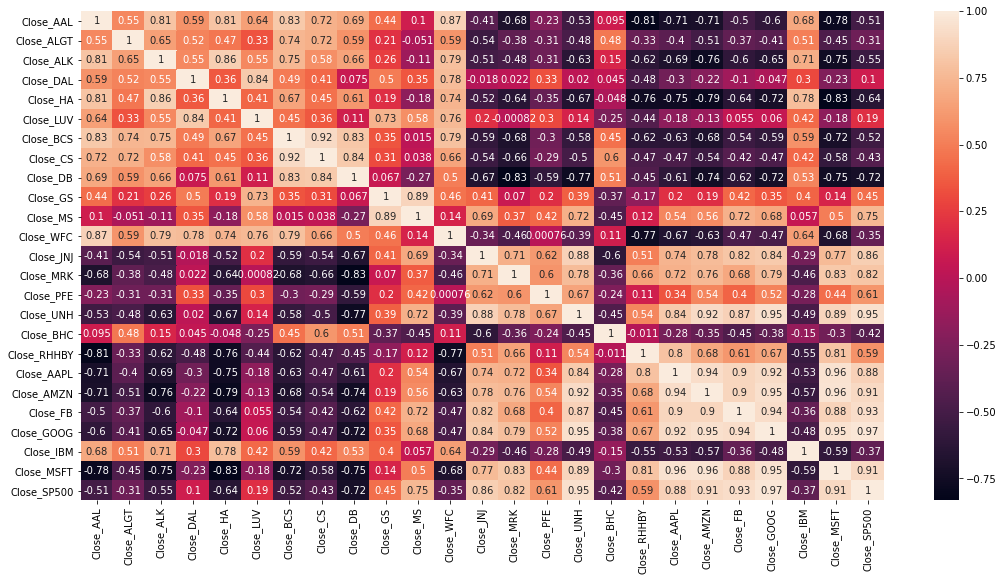

In [25]:
plt.figure(figsize=[18,9])
sns.heatmap(stocks_df_price.corr(), annot=True)
plt.show()

Observation:
 
 1. Strong Positive Correlation (0.6 to 1): Apple, Amazon, Google, Goldman Sachs, J&J, Merck & Co
 2. Weak Positive Correlation (0 to 0.6): American Airlines, Alaska Air, Hawaiian Holdings.
 3. Negative Correlation (0 to -1): Bausch Health, Credit Suisse, Deutsche Bank.
 4. Ideally, the stocks that have negative correlation with the Index (S&P 500) should be avoided in the portfolio since they may prove to be very risky.

<Figure size 1440x648 with 0 Axes>

<AxesSubplot:>

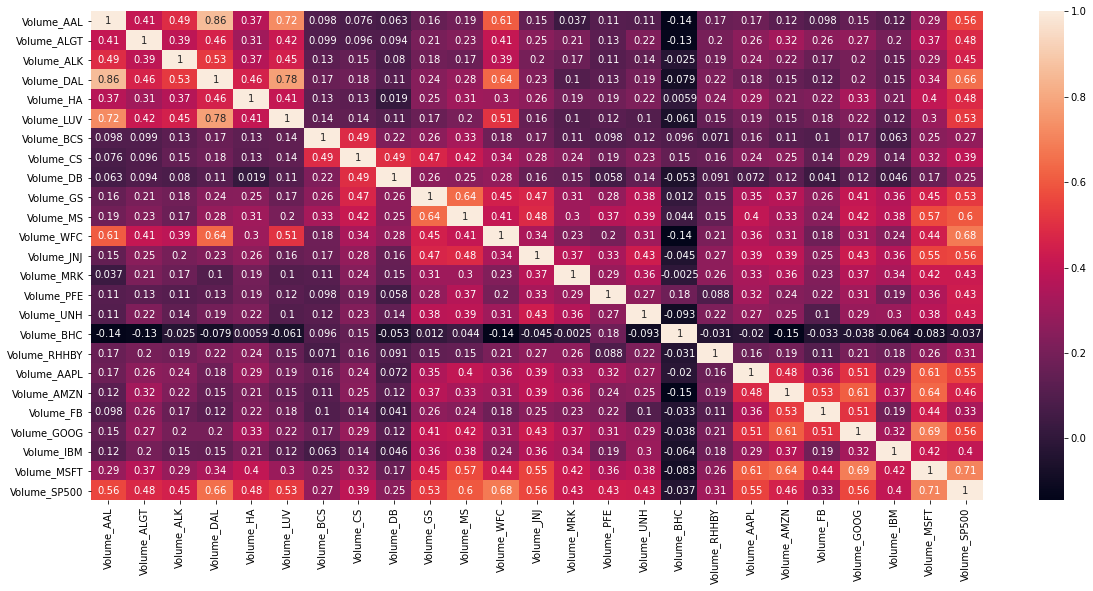

In [26]:
plt.figure(figsize=[20,9])
sns.heatmap(stocks_df_vol.corr(), annot=True)
plt.show()

Obervation :
    
 1. S&P500 has a positve correlation with all the stock except with BHC
 2. Correlation of more than 0.6 can be observed in the volumes of DAL, WFC, MS, and the highest is with MSFT - 0.71.

<Figure size 2880x2880 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_AAL', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_ALGT', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_ALK', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_DAL', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_HA', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_LUV', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_BCS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_CS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_DB', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_GS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_MS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_WFC', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_JNJ', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_MRK', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_PFE', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_UNH', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_BHC', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_RHHBY', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_AAPL', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_AMZN', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_FB', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_GOOG', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_IBM', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_MSFT', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_SP500', ylabel='Density'>

Text(0.5, 0.9, 'Variation in the Stock Price')

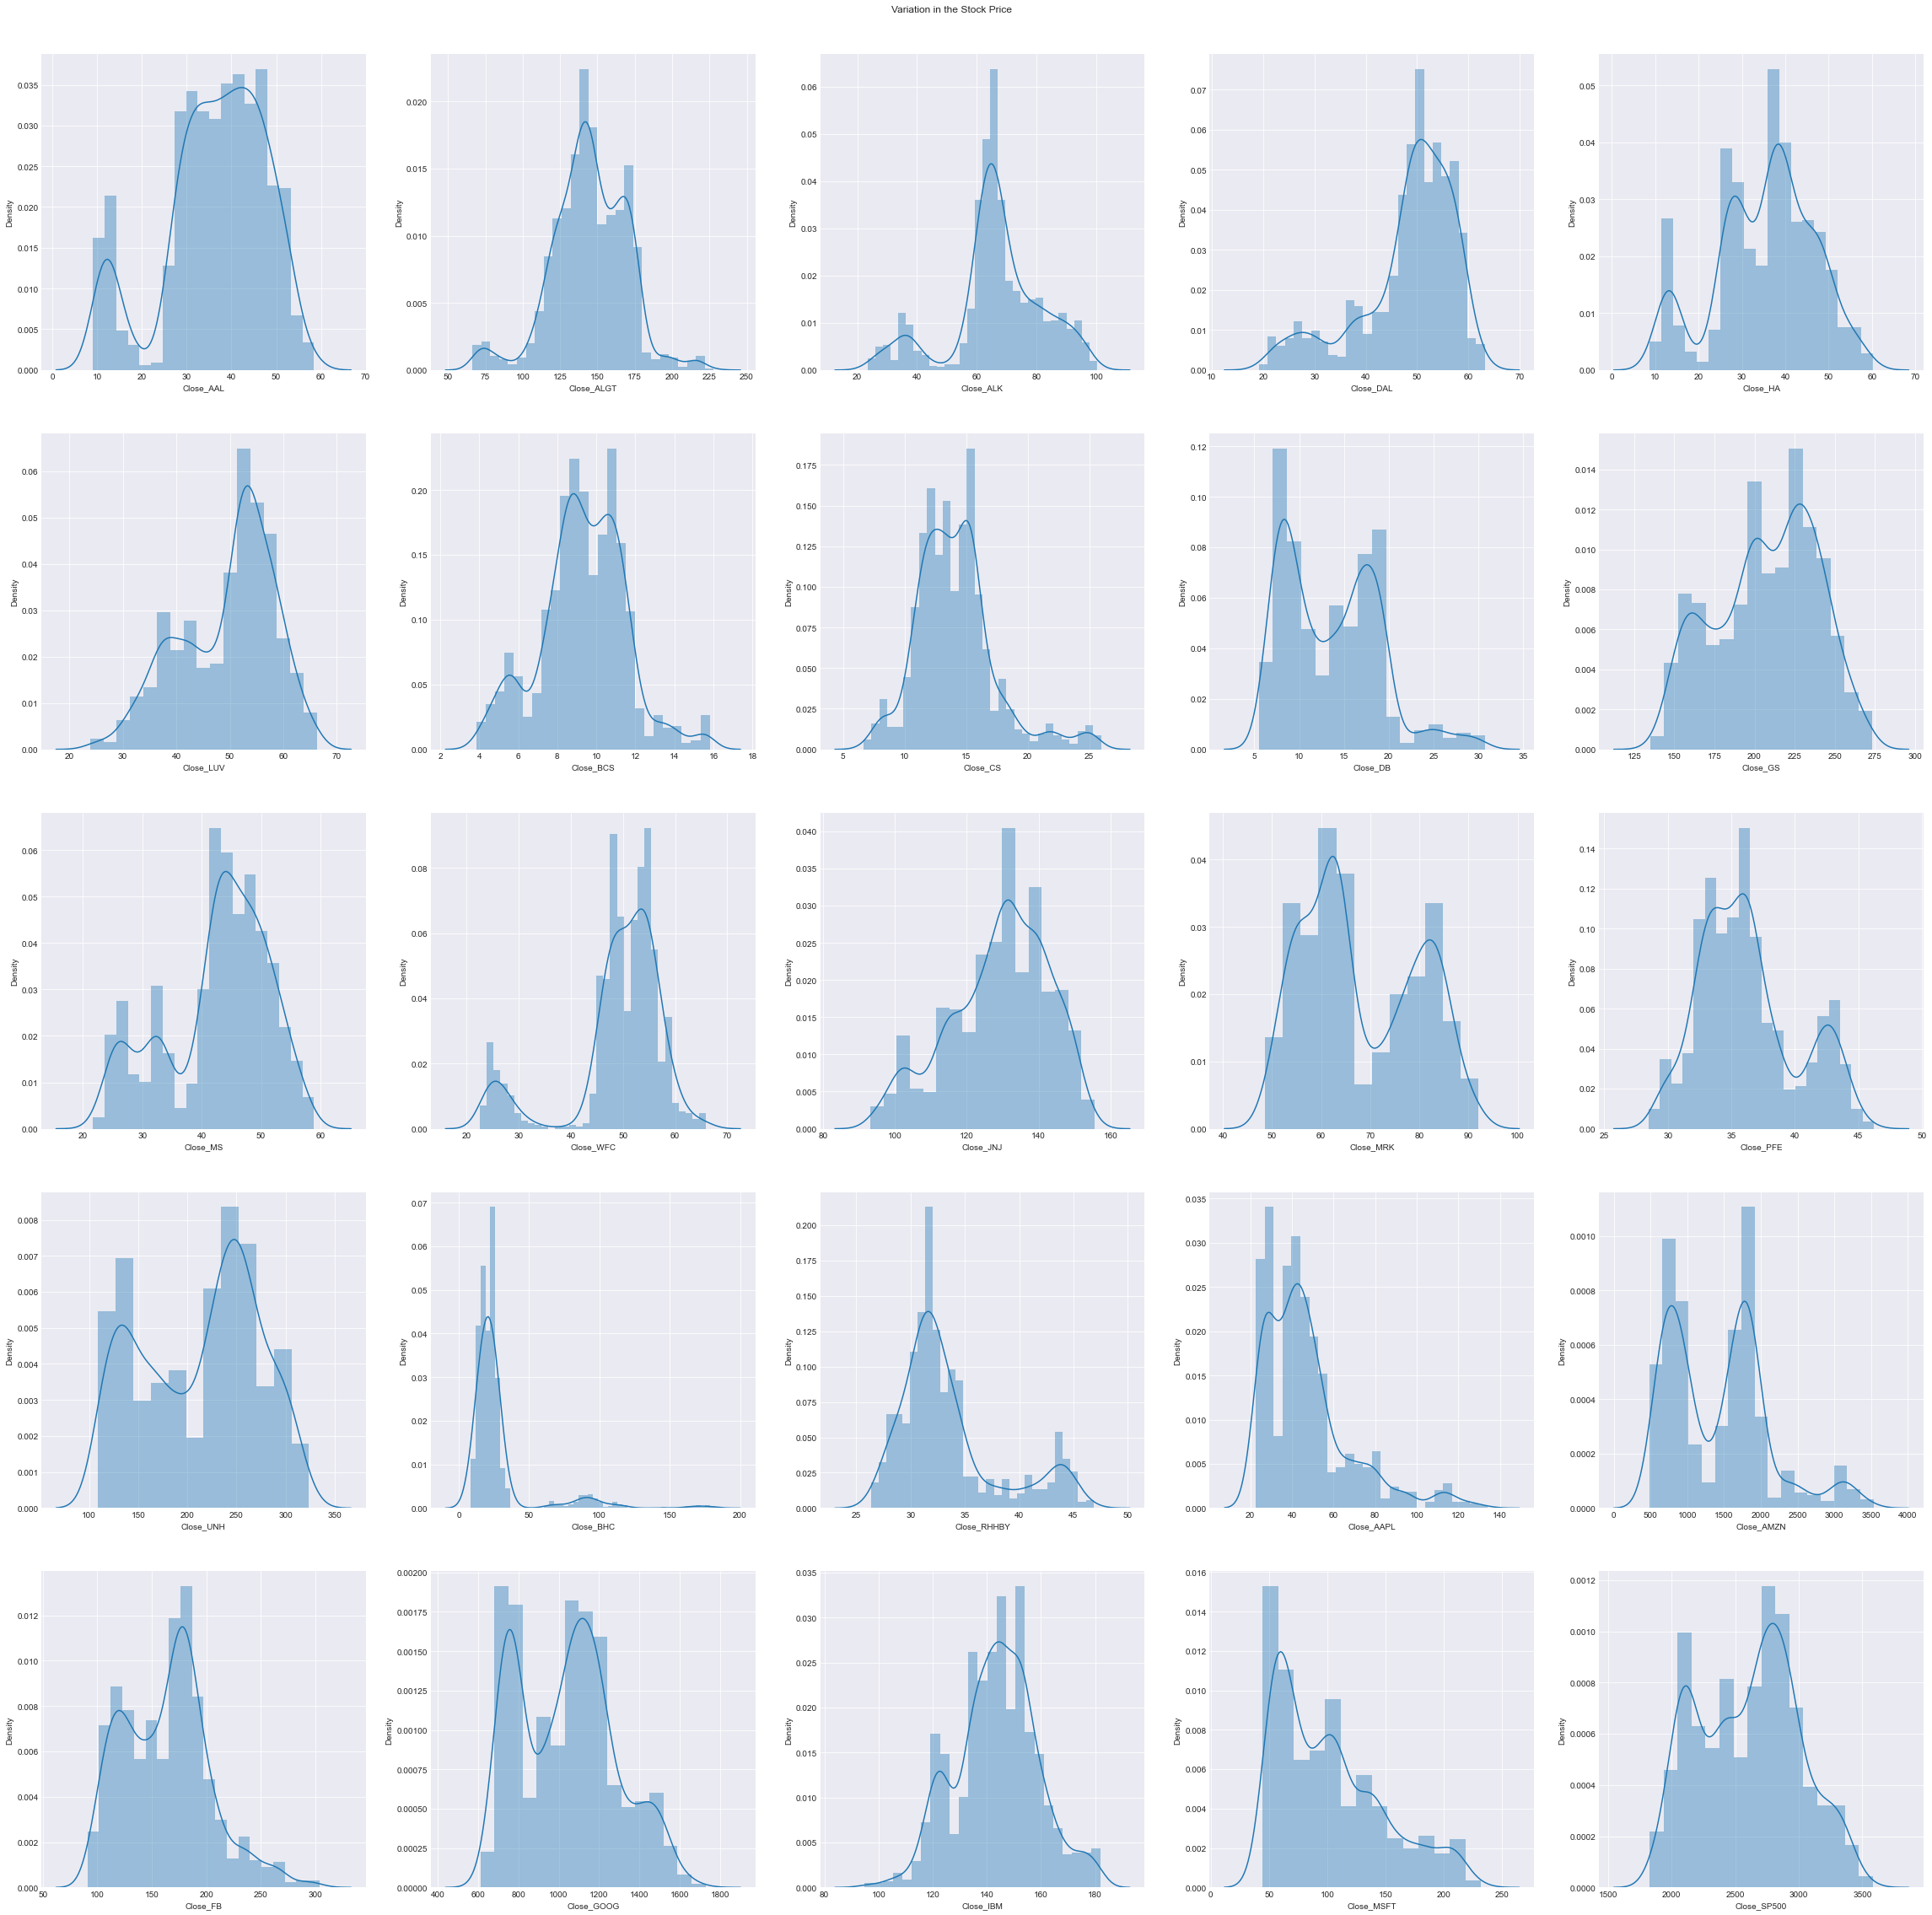

In [27]:
plt.figure(figsize=[40,40])
plt.tight_layout()
feature = stocks_df_price
plt.style.use('seaborn-darkgrid')
for i in enumerate(feature):
    plt.subplot(5,5,i[0]+1)
    sns.distplot(stocks_df_price[i[1]], hist=True)
plt.suptitle('Variation in the Stock Price', y=0.9)
plt.show()

<Figure size 2880x2880 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_AAL', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_ALGT', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_ALK', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_DAL', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_HA', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_LUV', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_BCS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_CS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_DB', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_GS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_MS', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_WFC', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_JNJ', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_MRK', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_PFE', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_UNH', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_BHC', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_RHHBY', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_AAPL', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_AMZN', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_FB', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_GOOG', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_IBM', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_MSFT', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Volume_SP500', ylabel='Density'>

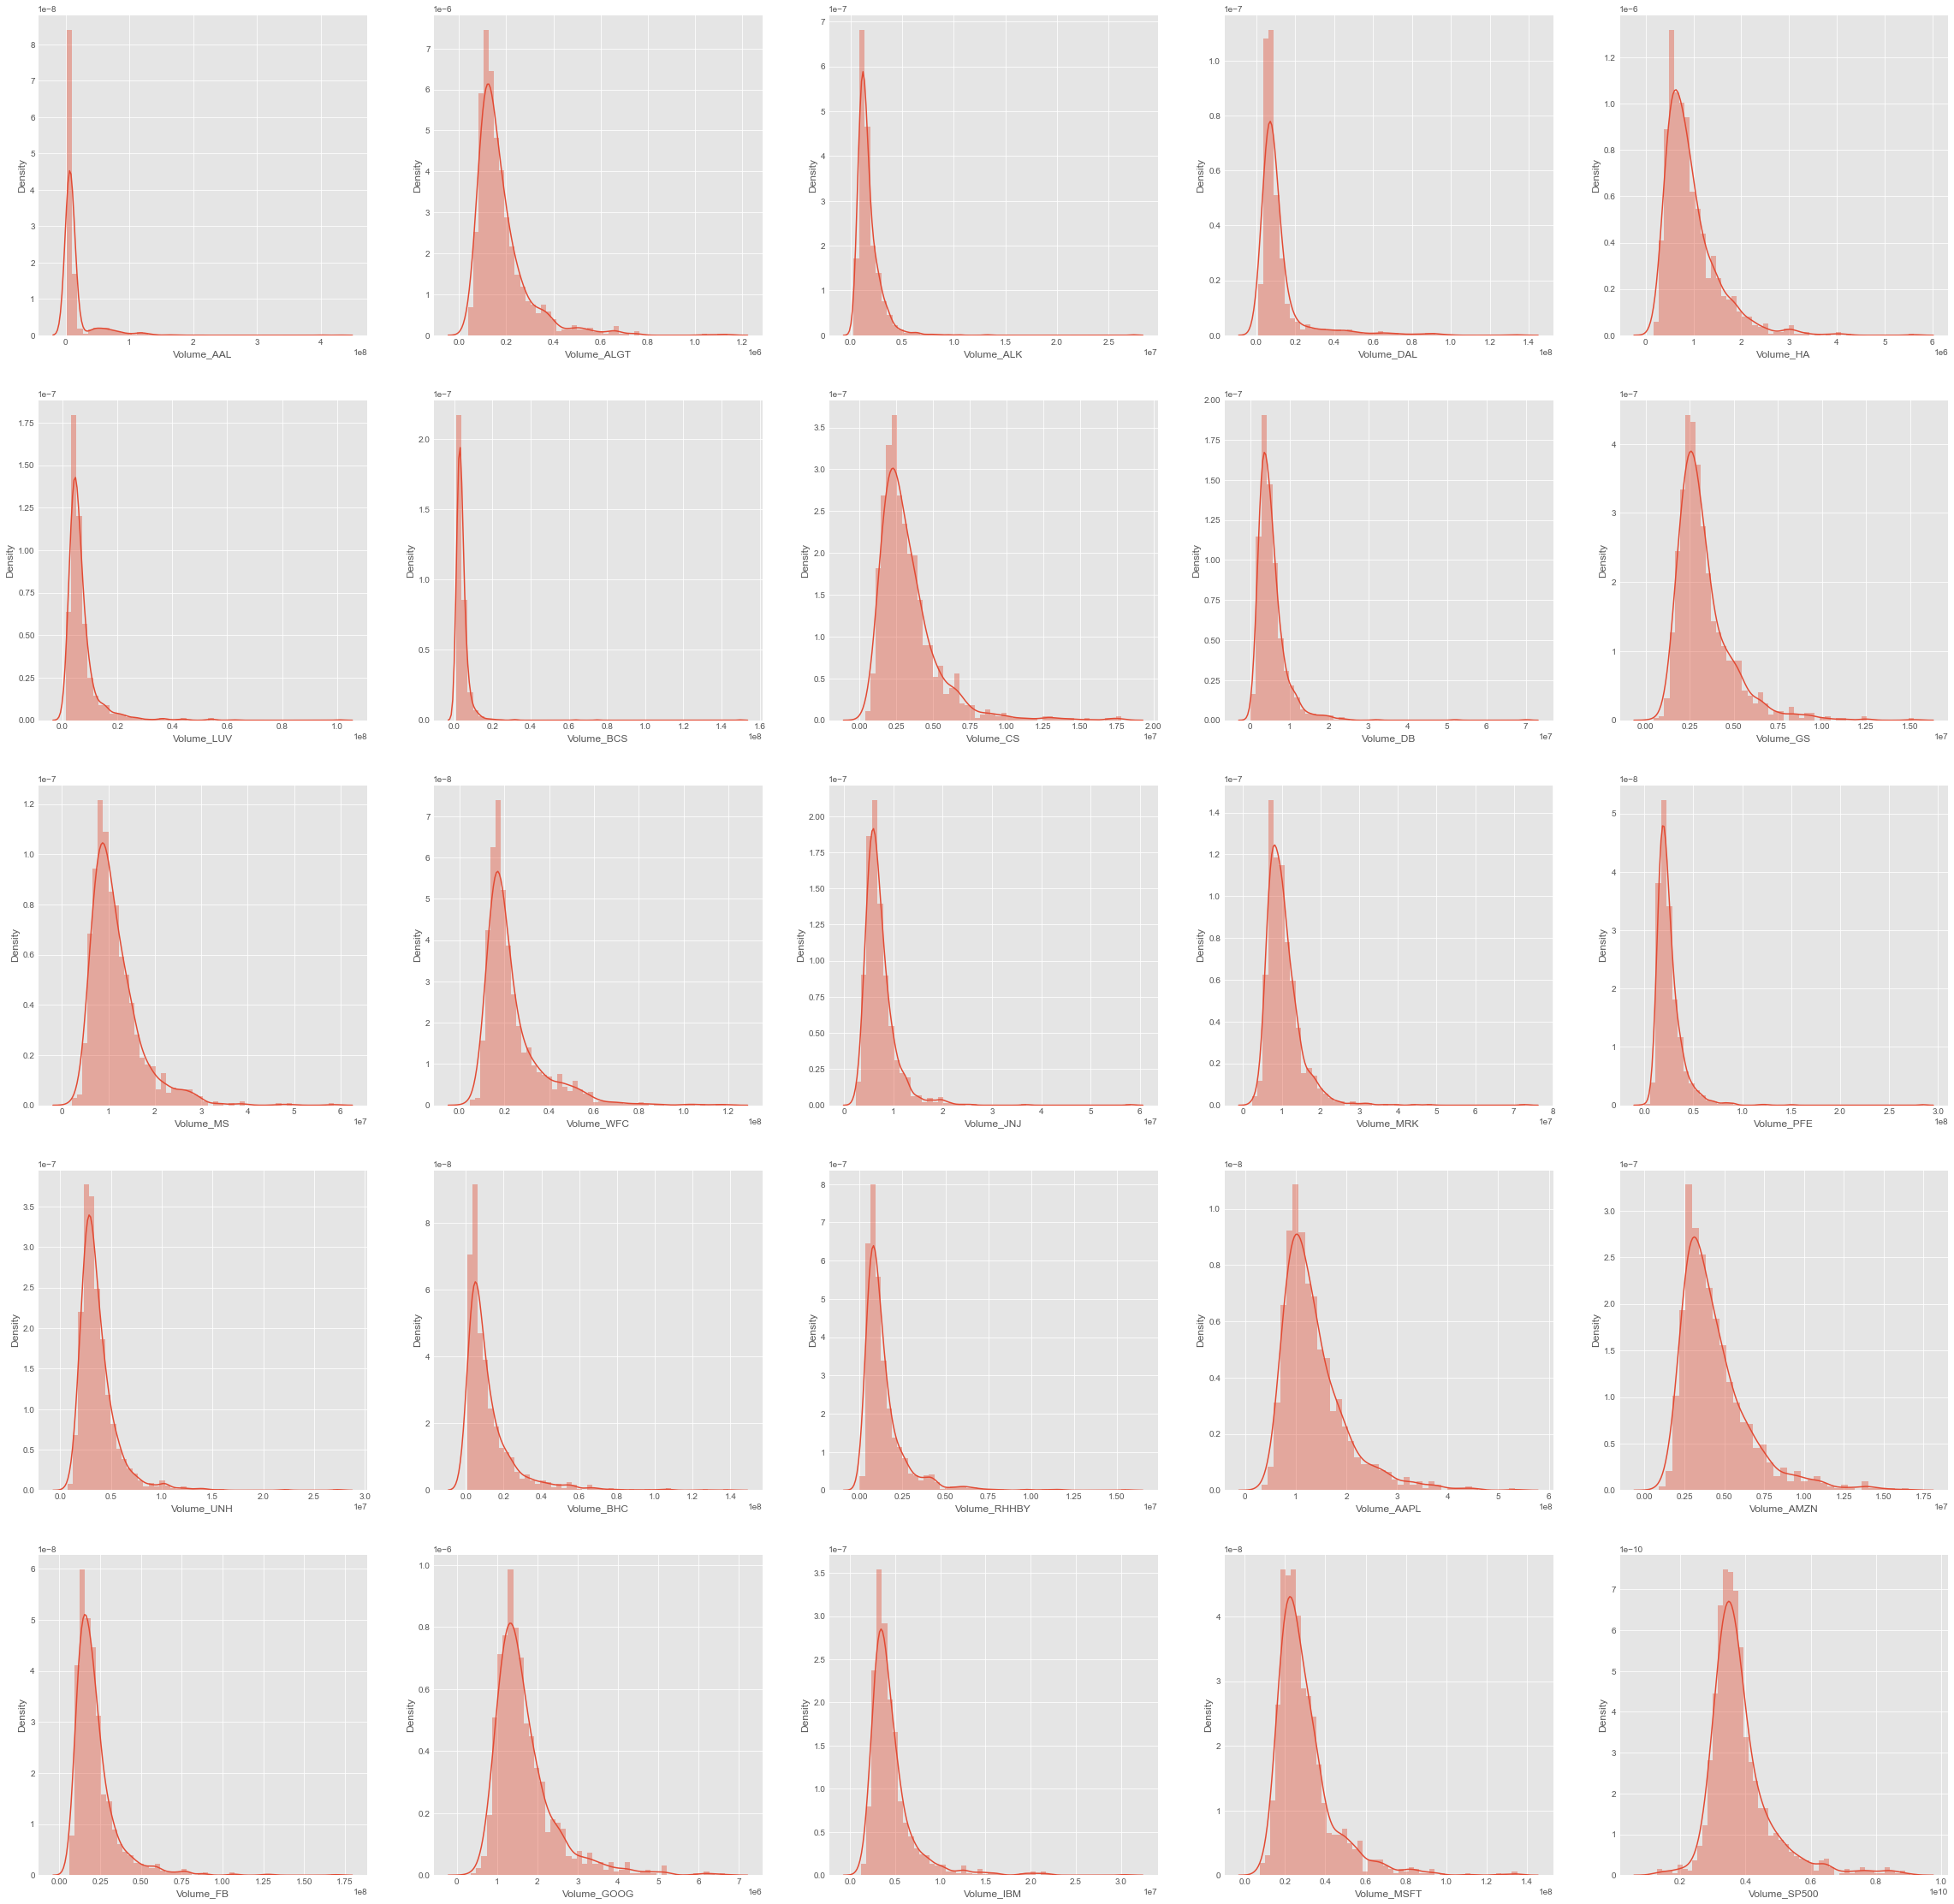

In [28]:
plt.figure(figsize=[40,40])
plt.tight_layout()
feature = stocks_df_vol
plt.style.use('ggplot')
for i in enumerate(feature):
    plt.subplot(5,5,i[0]+1)
    sns.distplot(stocks_df_vol[i[1]], hist=True)
plt.show()

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

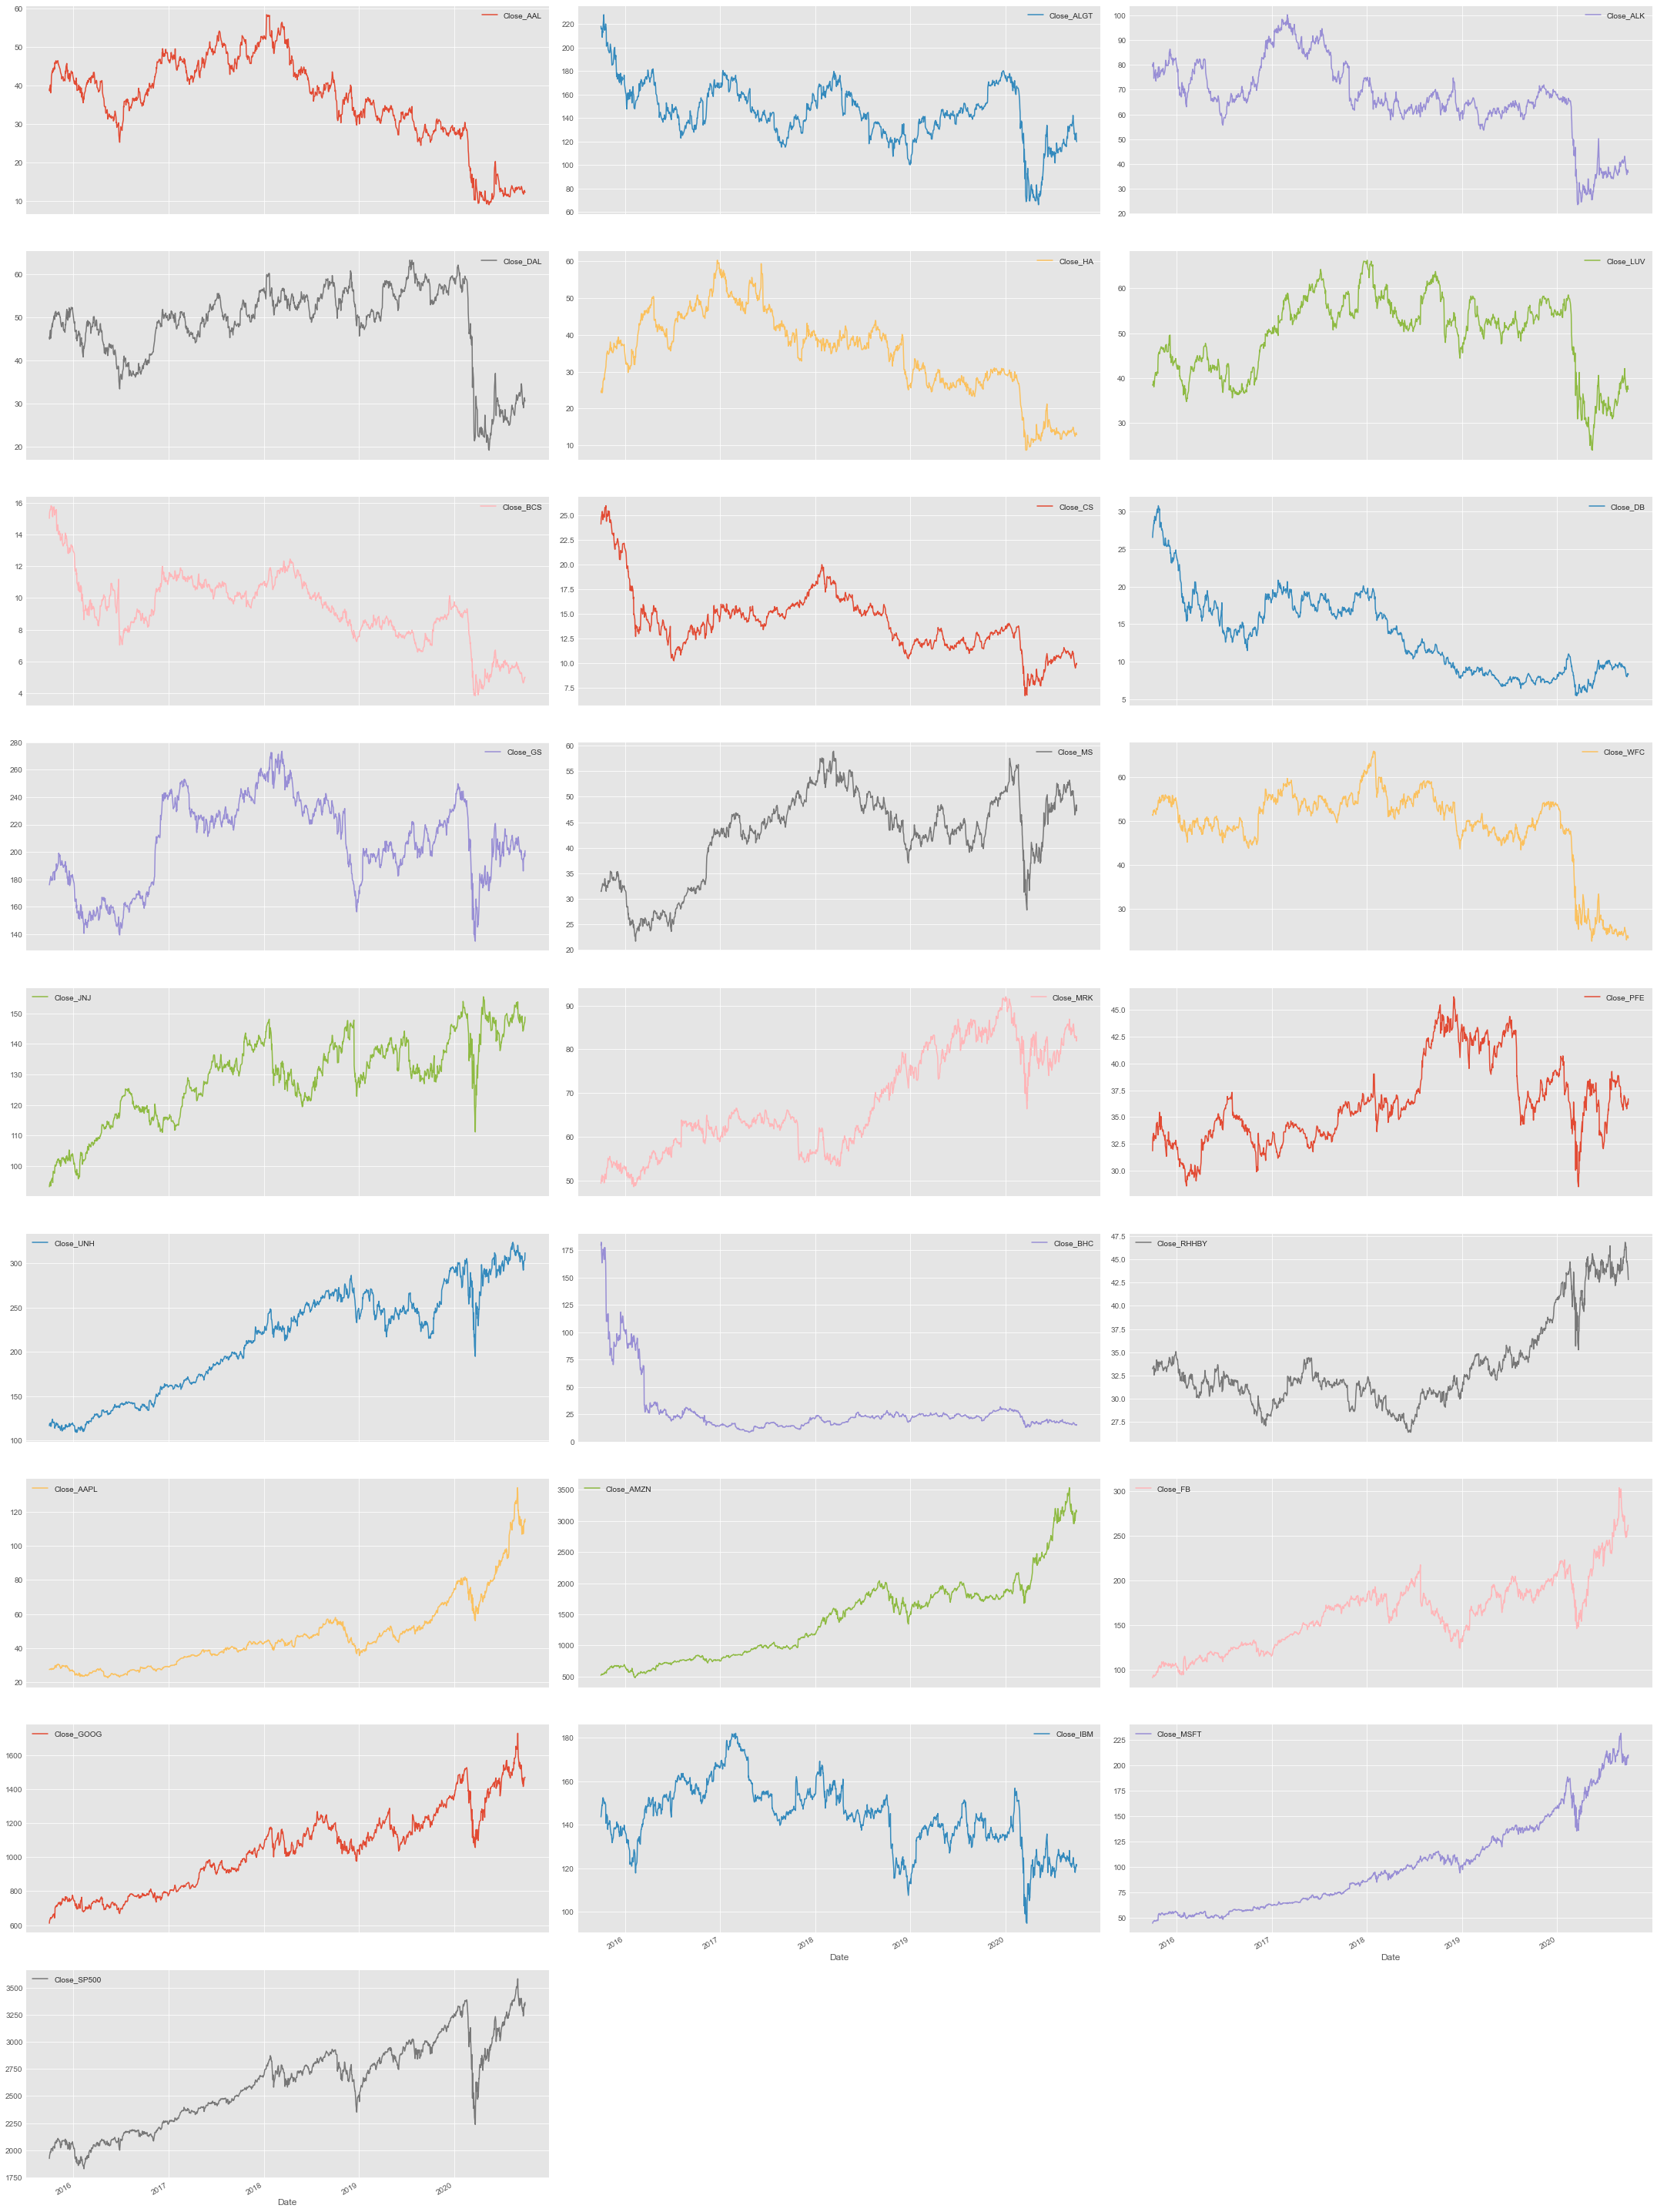

In [29]:
stocks_df_price.plot(kind='line', subplots=True, layout=(9,3), figsize=[30,40])
plt.tight_layout()
plt.show()

Observation:
    
 1. We should consider stocks that have a positive movement suggesting that the price has increased during the given period
 2. Also, it suggests that the prices are expected to show an uptrend in the future.
 3. The price of aviation and banking stocks has gone down. The highest drop in the prices can be observed in DB and BHC.

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

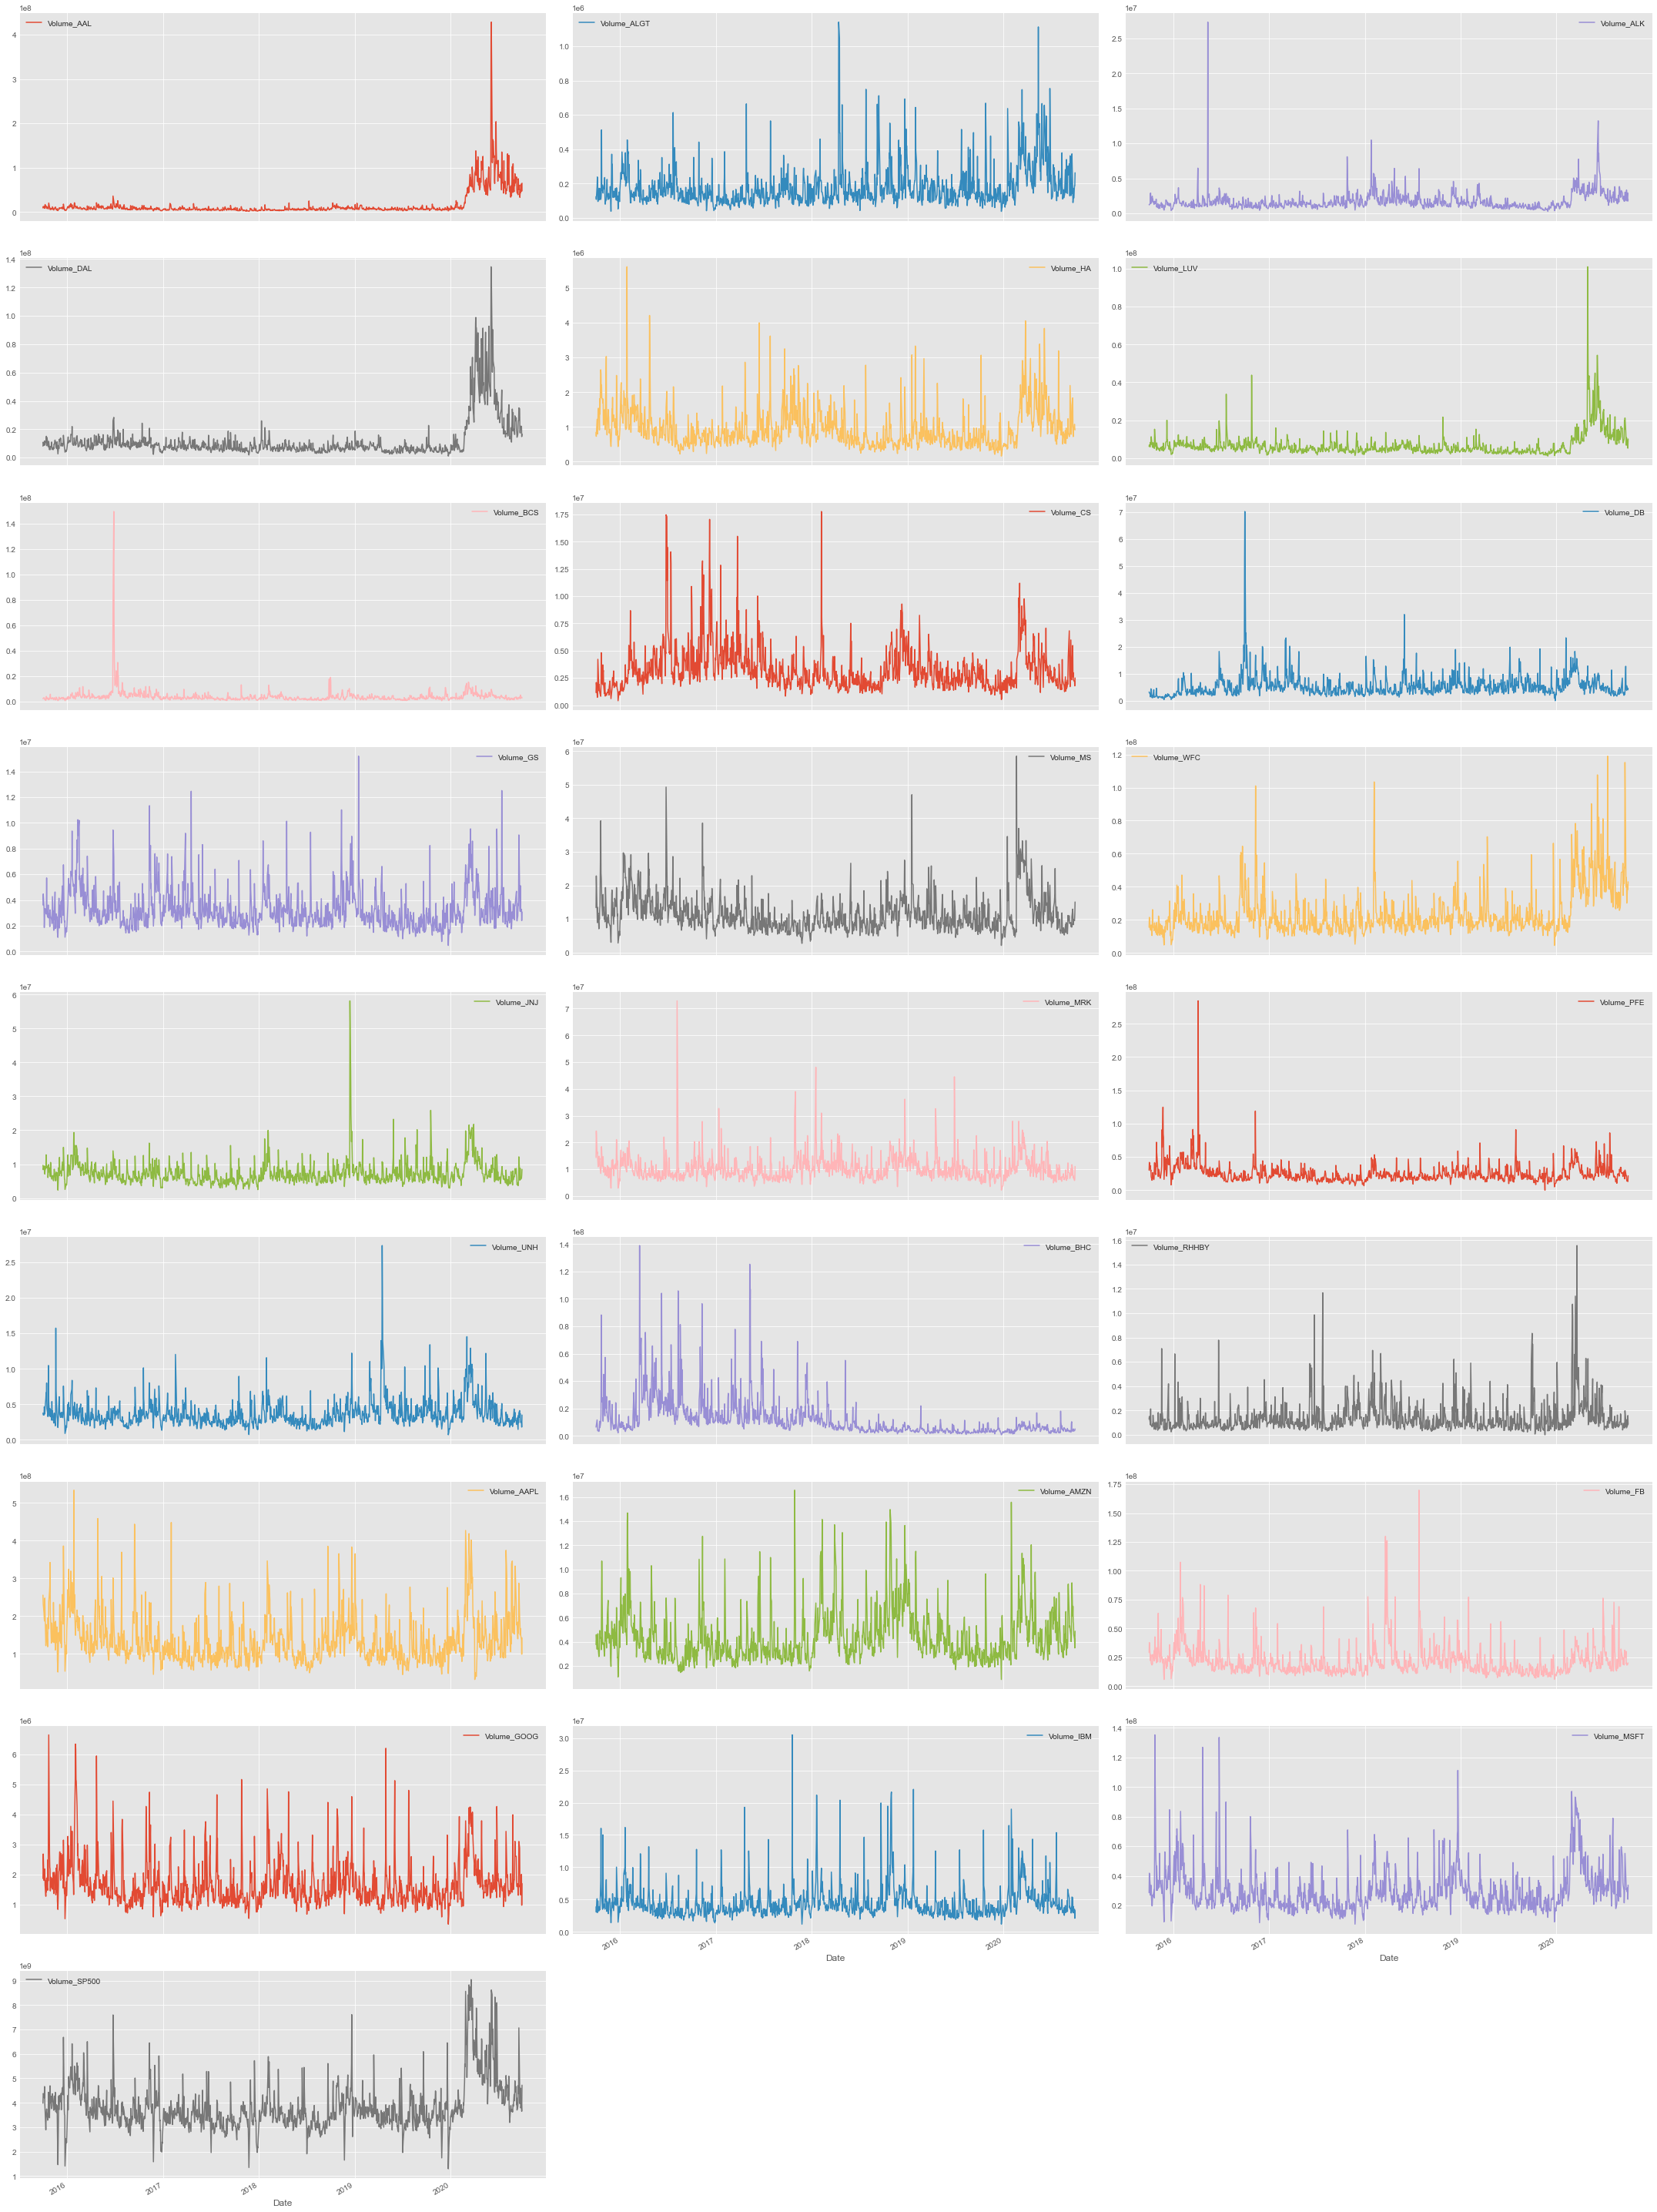

In [30]:
stocks_df_vol.plot(kind='line', subplots=True, layout=(9,3), figsize=[30,40])
plt.tight_layout()
plt.show()

In [31]:
stocks_price_normal = stocks_df_price.copy()
stocks_price_normal.head()

Close_AAL  Close_ALGT  Close_ALK  Close_DAL   Close_HA  Close_LUV  \
Date                                                                            
2015-10-01  39.200001  217.979996  80.230003  45.410000  24.730000  38.410000   
2015-10-02  38.630001  215.589996  79.260002  44.869999  24.280001  38.380001   
2015-10-05  40.189999  216.059998  80.910004  46.959999  25.500000  39.299999   
2015-10-06  38.130001  208.600006  74.529999  45.090000  24.250000  38.000000   
2015-10-07  39.310001  213.839996  75.970001  45.990002  24.559999  38.709999   

            Close_BCS   Close_CS   Close_DB    Close_GS  ...   Close_UNH  \
Date                                                     ...               
2015-10-01      15.01  24.090000  26.520000  176.020004  ...  116.610001   
2015-10-02      15.39  24.639999  27.139999  177.009995  ...  118.830002   
2015-10-05      15.60  25.160000  28.200001  180.699997  ...  119.650002   
2015-10-06      15.55  25.379999  28.400000  180.320007  ...  116.050003   
2015-10-07      15.73  25.320000  28.790001  182.229996  ...  116.430000   

             Close_BHC  Close_RHHBY  Close_AAPL  Close_AMZN   Close_FB  \
Date                                                                     
2015-10-01  179.600006    33.220001   27.395000  520.719971  90.949997   
2015-10-02  182.320007    33.320000   27.594999  532.539978  92.070000   
2015-10-05  163.460007    33.439999   27.695000  543.679993  94.010002   
2015-10-06  166.000000    33.529999   27.827499  537.479980  92.800003   
2015-10-07  169.830002    32.549999   27.695000  541.940002  92.400002   

            Close_GOOG   Close_IBM  Close_MSFT  Close_SP500  
Date                                                         
2015-10-01  611.289978  143.589996   44.610001  1923.819946  
2015-10-02  626.909973  144.580002   45.570000  1951.359985  
2015-10-05  641.469971  149.039993   46.630001  1987.050049  
2015-10-06  645.440002  148.779999   46.750000  1979.920044  
2015-10-07  642.359985  150.089996   46.799999  1995.829956  

[5 rows x 25 columns]

### Normalization

In [32]:
# Normalization in the stocks_price dataset
for column in stocks_price_normal:
    stocks_price_normal[column] = stocks_price_normal[column]/stocks_price_normal[column][0]
stocks_price_normal.head()

Close_AAL  Close_ALGT  Close_ALK  Close_DAL  Close_HA  Close_LUV  \
Date                                                                           
2015-10-01   1.000000    1.000000   1.000000   1.000000  1.000000   1.000000   
2015-10-02   0.985459    0.989036   0.987910   0.988108  0.981804   0.999219   
2015-10-05   1.025255    0.991192   1.008476   1.034133  1.031136   1.023171   
2015-10-06   0.972704    0.956969   0.928954   0.992953  0.980590   0.989326   
2015-10-07   1.002806    0.981007   0.946903   1.012773  0.993126   1.007810   

            Close_BCS  Close_CS  Close_DB  Close_GS  ...  Close_UNH  \
Date                                                 ...              
2015-10-01   1.000000  1.000000  1.000000  1.000000  ...   1.000000   
2015-10-02   1.025316  1.022831  1.023379  1.005624  ...   1.019038   
2015-10-05   1.039307  1.044417  1.063348  1.026588  ...   1.026070   
2015-10-06   1.035976  1.053549  1.070890  1.024429  ...   0.995198   
2015-10-07   1.047968  1.051059  1.085596  1.035280  ...   0.998456   

            Close_BHC  Close_RHHBY  Close_AAPL  Close_AMZN  Close_FB  \
Date                                                                   
2015-10-01   1.000000     1.000000    1.000000    1.000000  1.000000   
2015-10-02   1.015145     1.003010    1.007301    1.022699  1.012314   
2015-10-05   0.910134     1.006622    1.010951    1.044093  1.033645   
2015-10-06   0.924276     1.009332    1.015788    1.032186  1.020341   
2015-10-07   0.945601     0.979831    1.010951    1.040751  1.015943   

            Close_GOOG  Close_IBM  Close_MSFT  Close_SP500  
Date                                                        
2015-10-01    1.000000   1.000000    1.000000     1.000000  
2015-10-02    1.025553   1.006895    1.021520     1.014315  
2015-10-05    1.049371   1.037955    1.045281     1.032867  
2015-10-06    1.055866   1.036145    1.047971     1.029161  
2015-10-07    1.050827   1.045268    1.049092     1.037431  

[5 rows x 25 columns]

<Figure size 2160x2880 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:>

<AxesSubplot:xlabel='Date'>

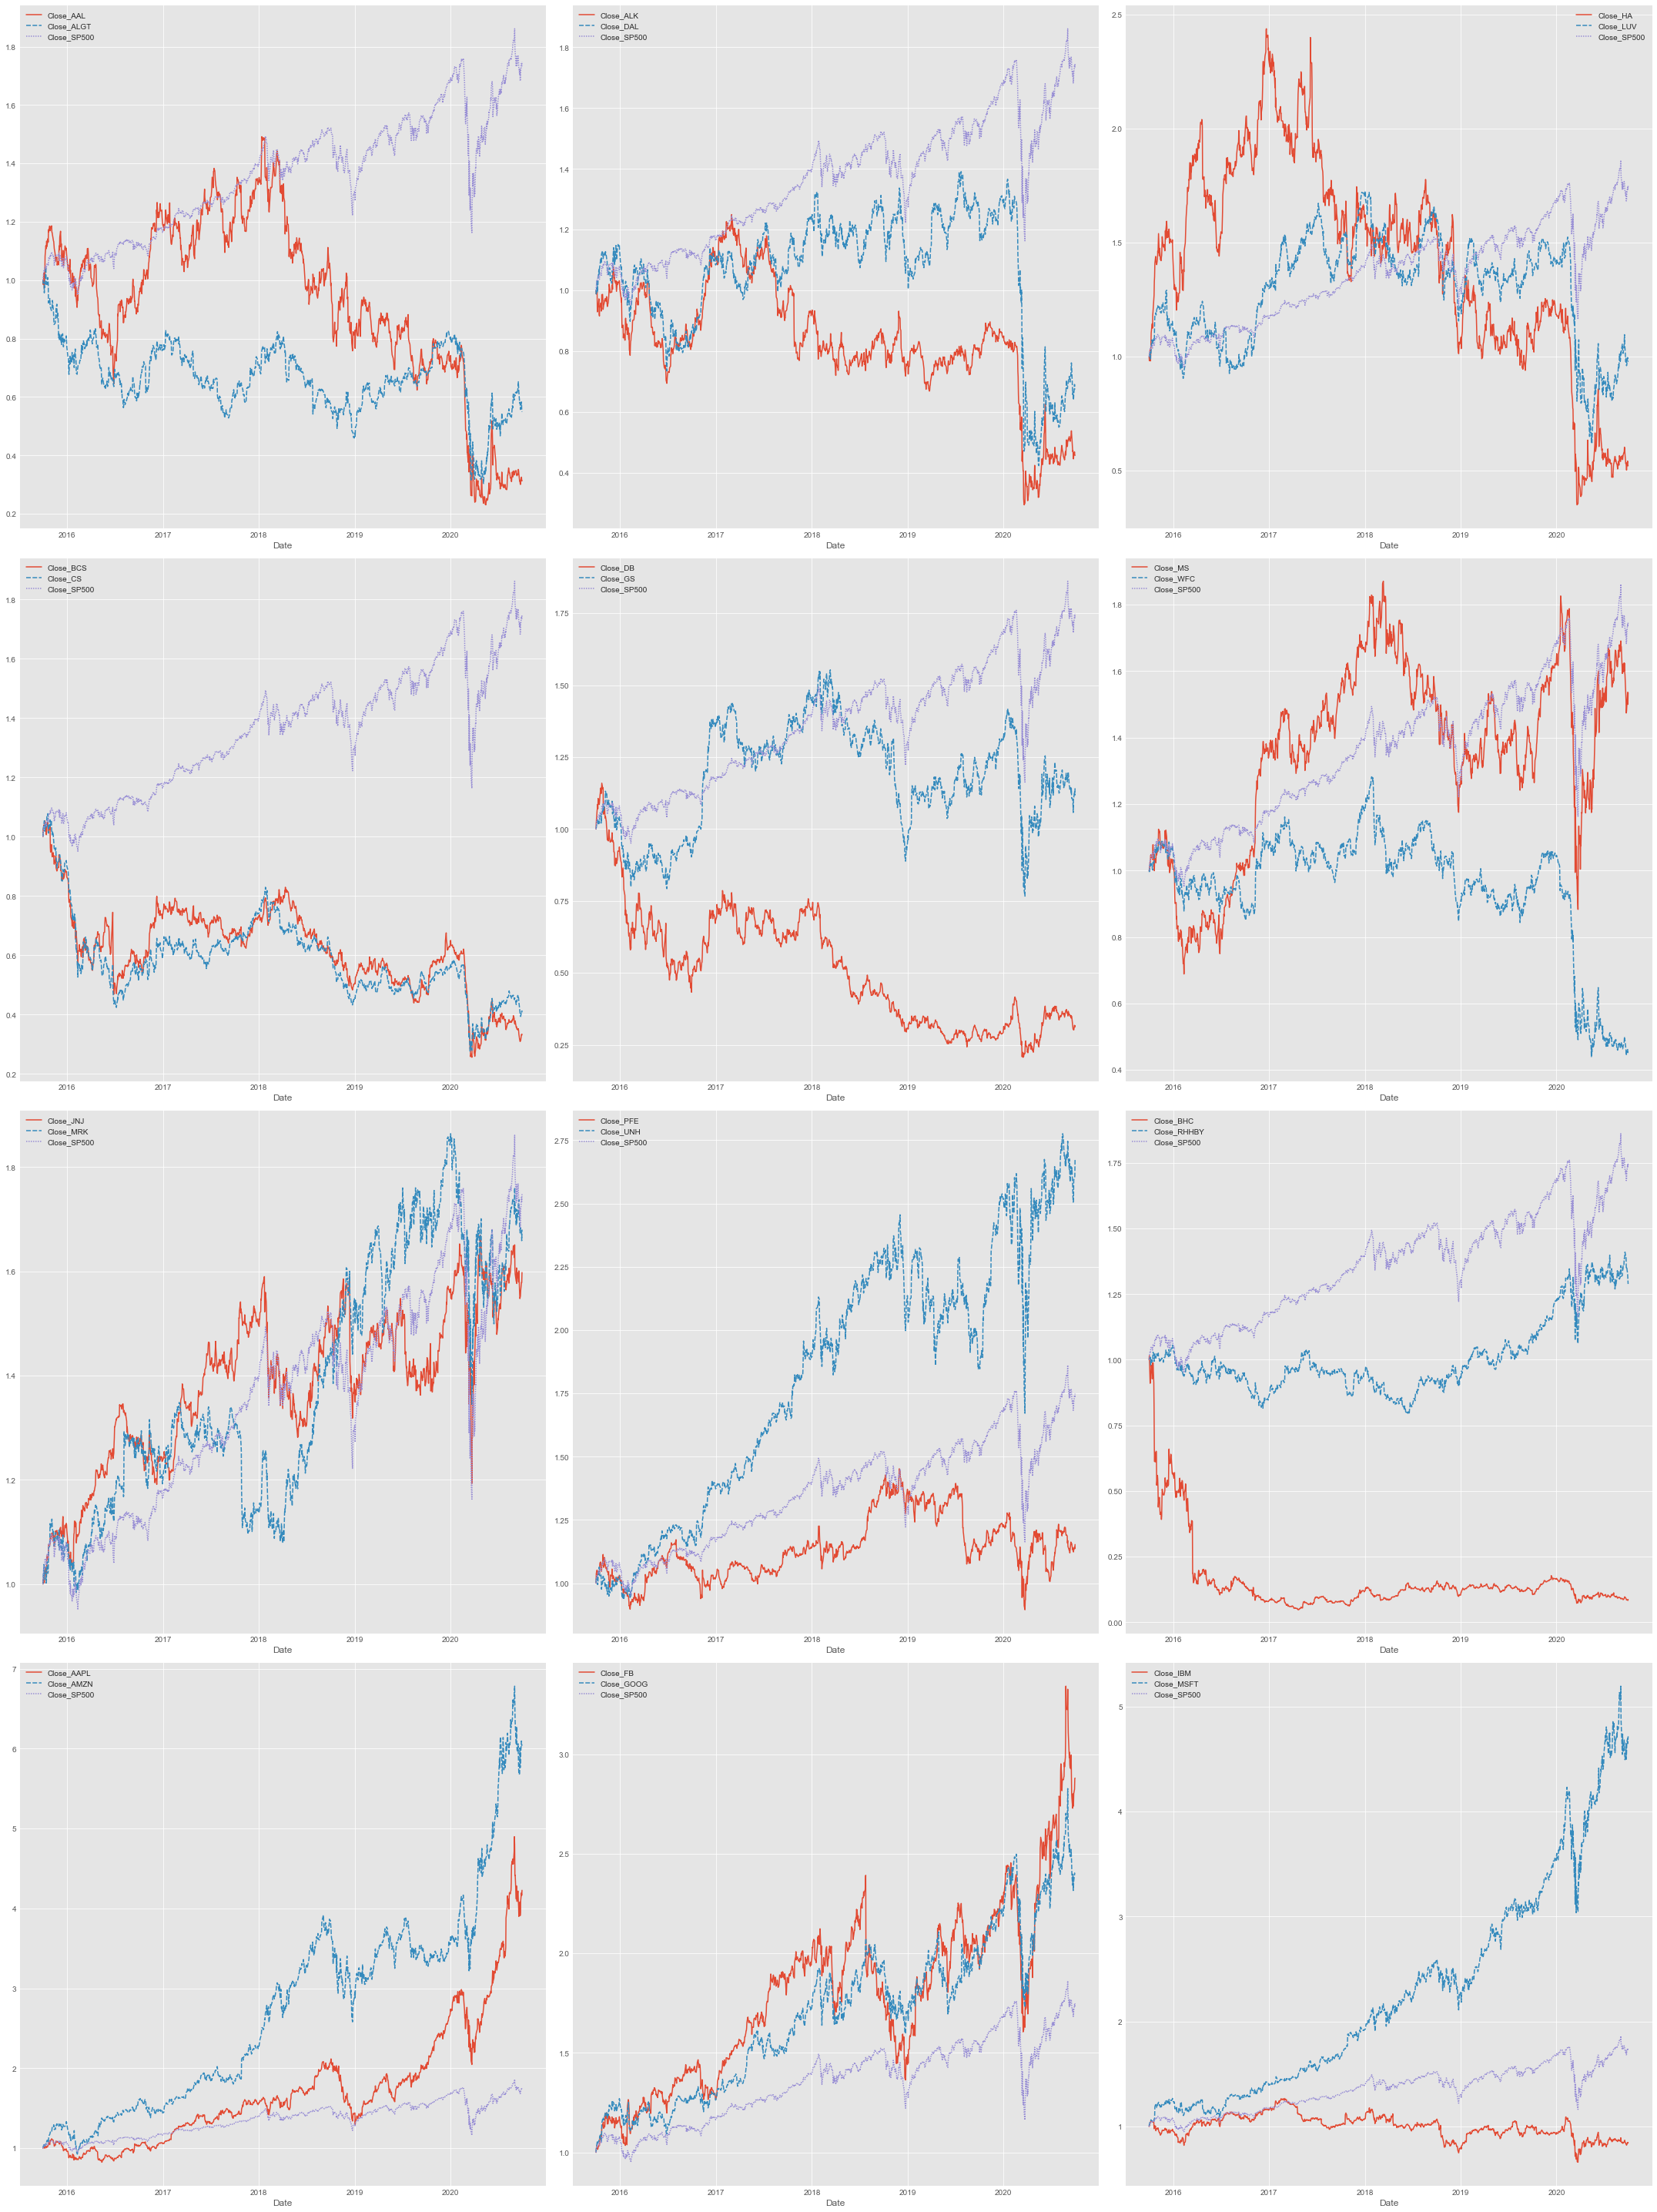

In [33]:
### Visualzation in the normalization dataset using the subplots ######

plt.figure(figsize=[30,40])
plt.subplot(4,3,1)
sns.lineplot(data = stocks_price_normal[['Close_AAL','Close_ALGT','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,2)
sns.lineplot(data = stocks_price_normal[['Close_ALK','Close_DAL','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,3)
sns.lineplot(data= stocks_price_normal[['Close_HA','Close_LUV','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,4)
sns.lineplot(data= stocks_price_normal[['Close_BCS','Close_CS','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,5)
sns.lineplot(data=stocks_price_normal[['Close_DB','Close_GS','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,6)
sns.lineplot(data=stocks_price_normal[['Close_MS','Close_WFC','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,7)
sns.lineplot(data = stocks_price_normal[['Close_JNJ','Close_MRK','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,8)
sns.lineplot(data = stocks_price_normal[['Close_PFE','Close_UNH','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,9)
sns.lineplot(data= stocks_price_normal[['Close_BHC','Close_RHHBY','Close_SP500']])
plt.legend()
plt.tight_layout()

plt.subplot(4,3,10)
sns.lineplot(data=stocks_price_normal[['Close_AAPL','Close_AMZN','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,11)
sns.lineplot(data=stocks_price_normal[['Close_FB','Close_GOOG','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,12)
sns.lineplot(data=stocks_price_normal[['Close_IBM','Close_MSFT','Close_SP500']])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [34]:
stocks_vol_normal = stocks_df_vol.copy()
stocks_vol_normal.head()

Volume_AAL  Volume_ALGT  Volume_ALK  Volume_DAL  Volume_HA  \
Date                                                                     
2015-10-01     9175100     124000.0   1230100.0   8096500.0   844900.0   
2015-10-02    12276300     107700.0   1207900.0  10918900.0   729500.0   
2015-10-05     9421800     182100.0   1408800.0   8629300.0  1220600.0   
2015-10-06    12985800     238200.0   2874800.0   9081000.0   972100.0   
2015-10-07    10513700     172800.0   2894600.0  11737900.0   799900.0   

            Volume_LUV  Volume_BCS  Volume_CS  Volume_DB  Volume_GS  ...  \
Date                                                                 ...   
2015-10-01   6147600.0   2497700.0  1152900.0  3254600.0  3613000.0  ...   
2015-10-02   7016100.0   2775900.0  2076900.0  2982700.0  4469900.0  ...   
2015-10-05   5962500.0   3286900.0  1011600.0  2500100.0  3411900.0  ...   
2015-10-06   8334400.0   2398400.0   710600.0  1431900.0  1859100.0  ...   
2015-10-07   7279800.0   2624400.0  1200300.0  2082800.0  2572200.0  ...   

            Volume_UNH  Volume_BHC  Volume_RHHBY  Volume_AAPL  Volume_AMZN  \
Date                                                                         
2015-10-01   3768300.0   6384100.0     1287600.0    255716400    3768500.0   
2015-10-02   3521600.0   7697300.0     1513000.0    232079200    4597800.0   
2015-10-05   3491200.0  11648200.0     1035300.0    208258800    3391400.0   
2015-10-06   4652000.0   7376100.0      814700.0    192787200    4502800.0   
2015-10-07   4282000.0   4181600.0     2131300.0    187062400    3812100.0   

             Volume_FB  Volume_GOOG  Volume_IBM  Volume_MSFT  Volume_SP500  
Date                                                                        
2015-10-01  29283700.0    1867600.0   3880900.0   28657900.0    3983600000  
2015-10-02  37881700.0    2684800.0   3054400.0   41839000.0    4378570000  
2015-10-05  27292500.0    1803600.0   5131800.0   34369300.0    4334490000  
2015-10-06  22172800.0    2166300.0   3018100.0   27017200.0    4202400000  
2015-10-07  24129300.0    2092700.0   2980800.0   27711500.0    4666470000  

[5 rows x 25 columns]

In [35]:
# normalization in the stocks_vol dataset###

for column in stocks_vol_normal:
    stocks_vol_normal[column] = stocks_vol_normal[column]/stocks_vol_normal[column][0]
stocks_vol_normal.head()

Volume_AAL  Volume_ALGT  Volume_ALK  Volume_DAL  Volume_HA  \
Date                                                                     
2015-10-01    1.000000     1.000000    1.000000    1.000000   1.000000   
2015-10-02    1.338002     0.868548    0.981953    1.348595   0.863416   
2015-10-05    1.026888     1.468548    1.145273    1.065806   1.444668   
2015-10-06    1.415331     1.920968    2.337046    1.121596   1.150550   
2015-10-07    1.145895     1.393548    2.353142    1.449750   0.946739   

            Volume_LUV  Volume_BCS  Volume_CS  Volume_DB  Volume_GS  ...  \
Date                                                                 ...   
2015-10-01    1.000000    1.000000   1.000000   1.000000   1.000000  ...   
2015-10-02    1.141275    1.111382   1.801457   0.916457   1.237171  ...   
2015-10-05    0.969891    1.315971   0.877440   0.768174   0.944340  ...   
2015-10-06    1.355716    0.960243   0.616359   0.439962   0.514559  ...   
2015-10-07    1.184169    1.050727   1.041114   0.639956   0.711929  ...   

            Volume_UNH  Volume_BHC  Volume_RHHBY  Volume_AAPL  Volume_AMZN  \
Date                                                                         
2015-10-01    1.000000    1.000000      1.000000     1.000000     1.000000   
2015-10-02    0.934533    1.205699      1.175054     0.907565     1.220061   
2015-10-05    0.926466    1.824564      0.804054     0.814413     0.899934   
2015-10-06    1.234509    1.155386      0.632728     0.753910     1.194852   
2015-10-07    1.136321    0.655002      1.655250     0.731523     1.011570   

            Volume_FB  Volume_GOOG  Volume_IBM  Volume_MSFT  Volume_SP500  
Date                                                                       
2015-10-01   1.000000     1.000000    1.000000     1.000000      1.000000  
2015-10-02   1.293610     1.437567    0.787034     1.459946      1.099149  
2015-10-05   0.932003     0.965731    1.322322     1.199296      1.088084  
2015-10-06   0.757172     1.159938    0.777680     0.942749      1.054925  
2015-10-07   0.823984     1.120529    0.768069     0.966976      1.171420  

[5 rows x 25 columns]

### Daily Return

In [36]:
stocks_price_return = stocks_df_price.pct_change()
stocks_price_return = stocks_price_return[1:]*100
round(stocks_price_return,2)

Close_AAL  Close_ALGT  Close_ALK  Close_DAL  Close_HA  Close_LUV  \
Date                                                                           
2015-10-02      -1.45       -1.10      -1.21      -1.19     -1.82      -0.08   
2015-10-05       4.04        0.22       2.08       4.66      5.02       2.40   
2015-10-06      -5.13       -3.45      -7.89      -3.98     -4.90      -3.31   
2015-10-07       3.09        2.51       1.93       2.00      1.28       1.87   
2015-10-08       1.09       -0.55      -0.28      -0.07      6.23       0.13   
...               ...         ...        ...        ...       ...        ...   
2020-09-24      -1.34       -3.17      -3.15      -1.86     -3.20      -1.84   
2020-09-25       4.42        1.86       2.80       2.65      3.23       0.65   
2020-09-28       3.82        2.71       2.29       5.24      4.53       3.07   
2020-09-29      -4.00       -4.74      -2.32      -2.33     -3.89      -1.65   
2020-09-30       0.33       -1.07      -0.11      -0.10      0.23      -0.29   

            Close_BCS  Close_CS  Close_DB  Close_GS  ...  Close_UNH  \
Date                                                 ...              
2015-10-02       2.53      2.28      2.34      0.56  ...       1.90   
2015-10-05       1.36      2.11      3.91      2.08  ...       0.69   
2015-10-06      -0.32      0.87      0.71     -0.21  ...      -3.01   
2015-10-07       1.16     -0.24      1.37      1.06  ...       0.33   
2015-10-08       0.51     -3.12     -1.39     -0.64  ...      -0.30   
...               ...       ...       ...       ...  ...        ...   
2020-09-24       2.37     -0.62      0.75      4.83  ...       0.18   
2020-09-25      -1.05     -1.46     -1.36     -0.08  ...       3.36   
2020-09-28       6.17      4.43      5.37      2.11  ...       0.24   
2020-09-29      -0.60     -0.71     -1.90     -1.15  ...       0.30   
2020-09-30       1.01      1.42      1.57      2.12  ...       2.51   

            Close_BHC  Close_RHHBY  Close_AAPL  Close_AMZN  Close_FB  \
Date                                                                   
2015-10-02       1.51         0.30        0.73        2.27      1.23   
2015-10-05     -10.34         0.36        0.36        2.09      2.11   
2015-10-06       1.55         0.27        0.48       -1.14     -1.29   
2015-10-07       2.31        -2.92       -0.48        0.83     -0.43   
2015-10-08       0.79         2.15       -1.16       -1.62      0.08   
...               ...          ...         ...         ...       ...   
2020-09-24      -3.30        -0.36        1.03        0.66      0.20   
2020-09-25       0.53         0.27        3.75        2.49      2.12   
2020-09-28      -0.20        -1.58        2.39        2.55      0.78   
2020-09-29      -2.55        -1.68       -0.76       -0.92      1.94   
2020-09-30       4.44        -1.29        1.51        0.12      0.04   

            Close_GOOG  Close_IBM  Close_MSFT  Close_SP500  
Date                                                        
2015-10-02        2.56       0.69        2.15         1.43  
2015-10-05        2.32       3.08        2.33         1.83  
2015-10-06        0.62      -0.17        0.26        -0.36  
2015-10-07       -0.48       0.88        0.11         0.80  
2015-10-08       -0.50       1.46        1.39         0.88  
...                ...        ...         ...          ...  
2020-09-24        0.92      -0.62        1.30         0.30  
2020-09-25        1.17       0.73        2.28         1.60  
2020-09-28        1.35       2.34        0.78         1.61  
2020-09-29        0.33      -0.65       -1.04        -0.48  
2020-09-30        0.02       0.60        1.48         0.83  

[1258 rows x 25 columns]

<Figure size 864x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_AAL', ylabel='Density'>

<AxesSubplot:xlabel='Close_ALGT', ylabel='Density'>

<AxesSubplot:xlabel='Close_ALK', ylabel='Density'>

<AxesSubplot:xlabel='Close_DAL', ylabel='Density'>

<AxesSubplot:xlabel='Close_HA', ylabel='Density'>

<AxesSubplot:xlabel='Close_LUV', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_BCS', ylabel='Density'>

<AxesSubplot:xlabel='Close_CS', ylabel='Density'>

<AxesSubplot:xlabel='Close_DB', ylabel='Density'>

<AxesSubplot:xlabel='Close_GS', ylabel='Density'>

<AxesSubplot:xlabel='Close_MS', ylabel='Density'>

<AxesSubplot:xlabel='Close_WFC', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_JNJ', ylabel='Density'>

<AxesSubplot:xlabel='Close_MRK', ylabel='Density'>

<AxesSubplot:xlabel='Close_PFE', ylabel='Density'>

<AxesSubplot:xlabel='Close_UNH', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_BHC', ylabel='Density'>

<AxesSubplot:xlabel='Close_RHHBY', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='Close_AAPL', ylabel='Density'>

<AxesSubplot:xlabel='Close_AMZN', ylabel='Density'>

<AxesSubplot:xlabel='Close_FB', ylabel='Density'>

<AxesSubplot:xlabel='Close_GOOG', ylabel='Density'>

<AxesSubplot:xlabel='Close_IBM', ylabel='Density'>

<AxesSubplot:xlabel='Close_MSFT', ylabel='Density'>

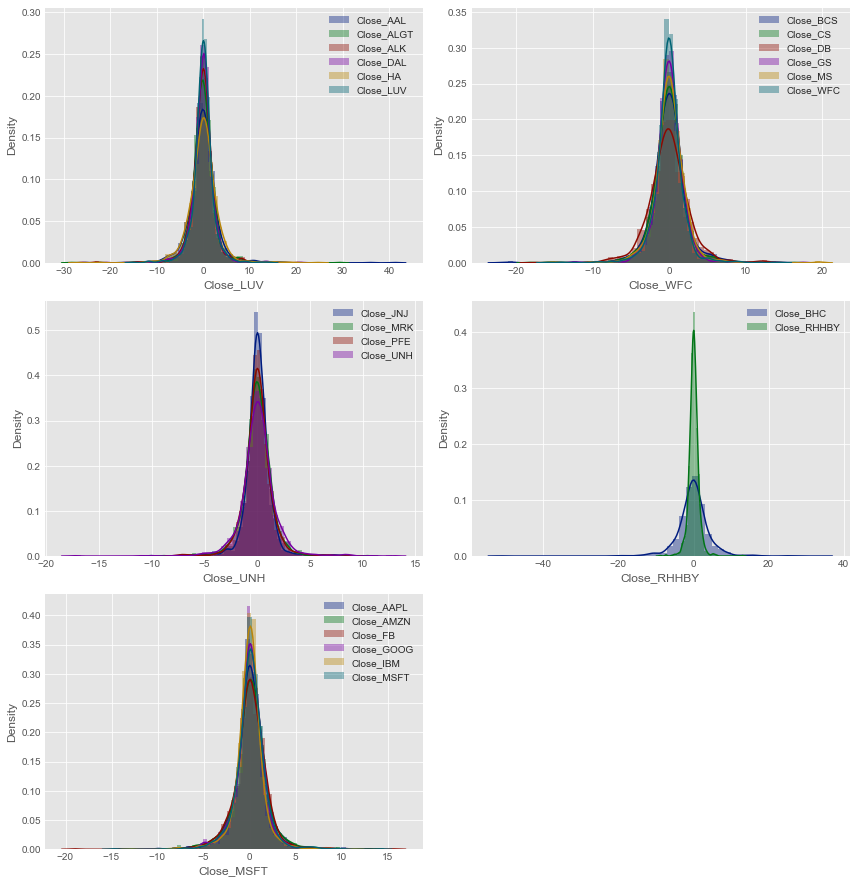

In [37]:
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=[12,12])
plt.subplot(3,2,1)
sns.distplot(stocks_price_return['Close_AAL'],hist=True, label='Close_AAL')
sns.distplot(stocks_price_return['Close_ALGT'],hist=True, label='Close_ALGT')
sns.distplot(stocks_price_return['Close_ALK'], hist=True, label='Close_ALK')
sns.distplot(stocks_price_return['Close_DAL'], hist=True, label='Close_DAL')
sns.distplot(stocks_price_return['Close_HA'], hist=True, label='Close_HA')
sns.distplot(stocks_price_return['Close_LUV'], hist=True, label='Close_LUV')
plt.legend(loc='best')


plt.subplot(3,2,2)
sns.distplot(stocks_price_return['Close_BCS'], hist=True, label='Close_BCS')
sns.distplot(stocks_price_return['Close_CS'], hist=True, label='Close_CS')
sns.distplot(stocks_price_return['Close_DB'], hist=True, label='Close_DB')
sns.distplot(stocks_price_return['Close_GS'], hist=True, label='Close_GS')
sns.distplot(stocks_price_return['Close_MS'], hist=True, label='Close_MS')
sns.distplot(stocks_price_return['Close_WFC'], hist=True, label='Close_WFC')
plt.legend(loc='best')



plt.subplot(3,2,3)
sns.distplot(stocks_price_return['Close_JNJ'], hist=True, label='Close_JNJ')
sns.distplot(stocks_price_return['Close_MRK'], hist=True, label='Close_MRK')
sns.distplot(stocks_price_return['Close_PFE'], hist=True, label='Close_PFE')
sns.distplot(stocks_price_return['Close_UNH'], hist=True, label='Close_UNH')
plt.legend(loc='best')
plt.tight_layout()


plt.subplot(3,2,4)
sns.distplot(stocks_price_return['Close_BHC'], hist=True, label='Close_BHC')
sns.distplot(stocks_price_return['Close_RHHBY'], hist=True, label='Close_RHHBY')
plt.legend(loc='best')

plt.subplot(3,2,5)
sns.distplot(stocks_price_return['Close_AAPL'], hist=True, label='Close_AAPL')
sns.distplot(stocks_price_return['Close_AMZN'], hist=True, label='Close_AMZN')
sns.distplot(stocks_price_return['Close_FB'], hist=True, label='Close_FB')
sns.distplot(stocks_price_return['Close_GOOG'], hist=True, label='Close_GOOG')
sns.distplot(stocks_price_return['Close_IBM'], hist=True, label='Close_IBM')
sns.distplot(stocks_price_return['Close_MSFT'], hist=True, label='Close_MSFT')
plt.legend(loc='best')
plt.show()



### Stock Index

In [38]:
stocks_index = stocks_df_price.copy()
for column in stocks_index:
    stocks_index[column] = stocks_index[column]/stocks_index['Close_SP500']
stocks_index.head(3)

Close_AAL  Close_ALGT  Close_ALK  Close_DAL  Close_HA  Close_LUV  \
Date                                                                           
2015-10-01   0.020376    0.113306   0.041703   0.023604  0.012855   0.019965   
2015-10-02   0.019796    0.110482   0.040618   0.022994  0.012443   0.019668   
2015-10-05   0.020226    0.108734   0.040719   0.023633  0.012833   0.019778   

            Close_BCS  Close_CS  Close_DB  Close_GS  ...  Close_UNH  \
Date                                                 ...              
2015-10-01   0.007802  0.012522  0.013785  0.091495  ...   0.060614   
2015-10-02   0.007887  0.012627  0.013908  0.090711  ...   0.060896   
2015-10-05   0.007851  0.012662  0.014192  0.090939  ...   0.060215   

            Close_BHC  Close_RHHBY  Close_AAPL  Close_AMZN  Close_FB  \
Date                                                                   
2015-10-01   0.093356     0.017268    0.014240    0.270670  0.047276   
2015-10-02   0.093432     0.017075    0.014141    0.272907  0.047182   
2015-10-05   0.082263     0.016829    0.013938    0.273612  0.047311   

            Close_GOOG  Close_IBM  Close_MSFT  Close_SP500  
Date                                                        
2015-10-01    0.317748   0.074638    0.023188          1.0  
2015-10-02    0.321268   0.074092    0.023353          1.0  
2015-10-05    0.322825   0.075006    0.023467          1.0  

[3 rows x 25 columns]

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

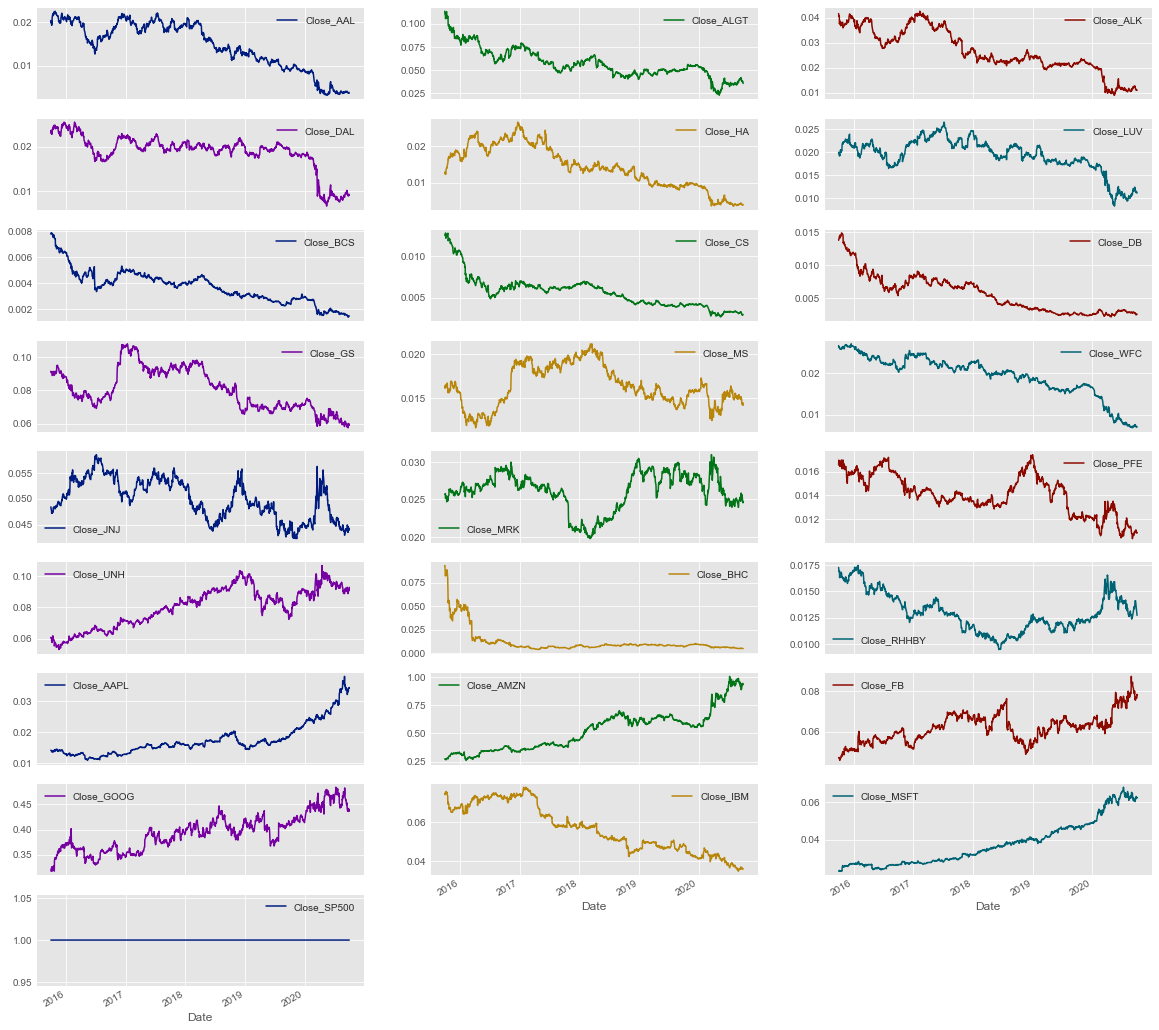

In [39]:
stocks_index.plot(kind='line', subplots=True, layout=(9,3), figsize=[20,20])
plt.show()

In [40]:
Annual_return =[]
col=[]
for i in stocks_price_return.columns:
    col.append(i)
for i in stocks_price_return:
    Annual_return.append(stocks_price_return[i].mean()*252)
stocks_annual = pd.DataFrame(list(zip(col,Annual_return)),columns=['Stocks','Annual_return'])
stocks_annual

Stocks  Annual_return
0     Close_AAL      -8.470057
1    Close_ALGT      -1.186343
2     Close_ALK      -6.444588
3     Close_DAL       1.053570
4      Close_HA       0.862866
5     Close_LUV       6.163837
6     Close_BCS     -13.819019
7      Close_CS     -11.005358
8      Close_DB     -13.327353
9      Close_GS       7.644200
10     Close_MS      14.553615
11    Close_WFC     -10.440560
12    Close_JNJ      11.352656
13    Close_MRK      12.883185
14    Close_PFE       5.254808
15    Close_UNH      23.719727
16    Close_BHC     -22.600018
17  Close_RHHBY       7.376346
18   Close_AAPL      33.318190
19   Close_AMZN      40.585455
20     Close_FB      26.452355
21   Close_GOOG      21.019428
22    Close_IBM      -0.043284
23   Close_MSFT      34.953498
24  Close_SP500      13.040656

In [41]:
for i in stocks_annual.index:
    stocks_annual['Stocks'][i] = stocks_annual['Stocks'][i].replace('Close_','')
stocks_annual['Annual_return'] = round(stocks_annual['Annual_return'],3)
stocks_annual

Stocks  Annual_return
0     AAL         -8.470
1    ALGT         -1.186
2     ALK         -6.445
3     DAL          1.054
4      HA          0.863
5     LUV          6.164
6     BCS        -13.819
7      CS        -11.005
8      DB        -13.327
9      GS          7.644
10     MS         14.554
11    WFC        -10.441
12    JNJ         11.353
13    MRK         12.883
14    PFE          5.255
15    UNH         23.720
16    BHC        -22.600
17  RHHBY          7.376
18   AAPL         33.318
19   AMZN         40.585
20     FB         26.452
21   GOOG         21.019
22    IBM         -0.043
23   MSFT         34.953
24  SP500         13.041

### Annual Risk

In [42]:
## Annual_risk

Annual_risk=[]
for i in stocks_price_return.columns:
    Annual_risk.append(stocks_price_return[i].std()*np.sqrt(252))


In [43]:
stocks_annual['Annual_risk'] = Annual_risk
stocks_annual['Annual_risk'] = round(stocks_annual['Annual_risk'],3)

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='Stocks', ylabel='Annual_risk'>

Text(0.5, 0, 'Stocks')

Text(0, 0.5, 'Annual_Risk')

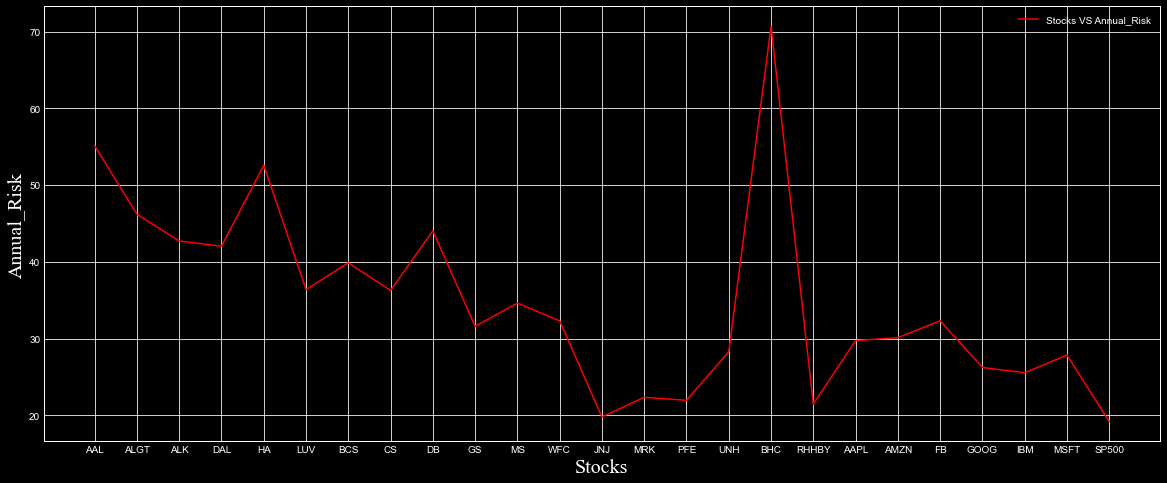

In [44]:
## Visualization with Annual_risk
plt.style.use('dark_background')
plt.figure(figsize=[20,8])
sns.lineplot(data = stocks_annual, x='Stocks', y= 'Annual_risk', label='Stocks VS Annual_Risk', color='Red')
plt.xlabel('Stocks', fontdict={'fontsize':20,'fontname':'Times New Roman'})
plt.ylabel('Annual_Risk',fontdict={'fontsize':20,'fontname':'Times New Roman'})
plt.legend(loc='best')

### Cumulative Return

In [45]:
## Cumulative return
cumulative_return=[]

for i in stocks_price_return.columns:
    cumulative_return.append(stocks_df_price[i][-1]/ stocks_df_price[i][0] - 1)

stocks_annual['cumulative_return'] = cumulative_return
stocks_annual['cumulative_return'] = round(stocks_annual['cumulative_return']*100,3)


In [46]:
stocks_annual = stocks_annual[(stocks_annual['Annual_return'] > 0)]
stocks_annual

Stocks  Annual_return  Annual_risk  cumulative_return
3     DAL          1.054       42.033            -32.658
4      HA          0.863       52.595            -47.877
5     LUV          6.164       36.374             -2.369
9      GS          7.644       31.589             14.175
10     MS         14.554       34.622             53.492
12    JNJ         11.353       19.778             59.794
13    MRK         12.883       22.331             68.017
14    PFE          5.255       21.948             15.264
15    UNH         23.720       28.273            167.361
17  RHHBY          7.376       21.453             28.868
18   AAPL         33.318       29.732            322.741
19   AMZN         40.585       30.112            504.688
20     FB         26.452       32.311            187.960
21   GOOG         21.019       26.225            140.410
23   MSFT         34.953       27.843            371.486
24  SP500         13.041       19.177             74.808

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='Stocks', ylabel='Annual_return'>

Text(0.5, 0, 'Stocks')

Text(0, 0.5, 'Annual_Return')

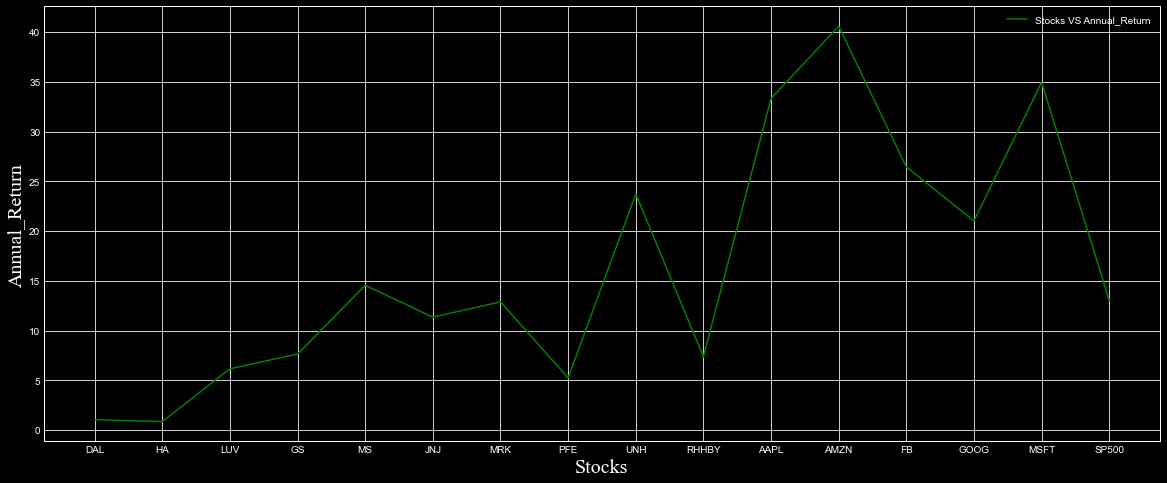

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=[20,8])
sns.lineplot(data = stocks_annual, x='Stocks', y= 'Annual_return', label='Stocks VS Annual_Return', color='Green')
plt.xlabel('Stocks', fontdict={'fontsize':20,'fontname':'Times New Roman'})
plt.ylabel('Annual_Return',fontdict={'fontsize':20,'fontname':'Times New Roman'})
plt.legend(loc='best')

In [48]:
stocks_annual = stocks_annual[(stocks_annual.cumulative_return > 0)]
stocks_annual

Stocks  Annual_return  Annual_risk  cumulative_return
9      GS          7.644       31.589             14.175
10     MS         14.554       34.622             53.492
12    JNJ         11.353       19.778             59.794
13    MRK         12.883       22.331             68.017
14    PFE          5.255       21.948             15.264
15    UNH         23.720       28.273            167.361
17  RHHBY          7.376       21.453             28.868
18   AAPL         33.318       29.732            322.741
19   AMZN         40.585       30.112            504.688
20     FB         26.452       32.311            187.960
21   GOOG         21.019       26.225            140.410
23   MSFT         34.953       27.843            371.486
24  SP500         13.041       19.177             74.808

### Sharpe Ratio

In [49]:
### Sharpe Ratio take risk free return 4% 
stocks_annual['sharpe_ratio'] = (stocks_annual['Annual_return'] - 0.04)/stocks_annual['Annual_risk']
stocks_annual.sort_values(by=['sharpe_ratio'],ascending=False)

Stocks  Annual_return  Annual_risk  cumulative_return  sharpe_ratio
19   AMZN         40.585       30.112            504.688      1.346473
23   MSFT         34.953       27.843            371.486      1.253924
18   AAPL         33.318       29.732            322.741      1.119265
15    UNH         23.720       28.273            167.361      0.837548
20     FB         26.452       32.311            187.960      0.817431
21   GOOG         21.019       26.225            140.410      0.799962
24  SP500         13.041       19.177             74.808      0.677948
13    MRK         12.883       22.331             68.017      0.575120
12    JNJ         11.353       19.778             59.794      0.571999
10     MS         14.554       34.622             53.492      0.419213
17  RHHBY          7.376       21.453             28.868      0.341957
9      GS          7.644       31.589             14.175      0.240717
14    PFE          5.255       21.948             15.264      0.237607

**Observation:**
    
  The ideal sharpe ratio is 1 and above. Stocks with negative sharpe ratio should not be included in the portfolio.

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='Stocks', ylabel='sharpe_ratio'>

Text(0.5, 0, 'Stocks')

Text(0, 0.5, 'Sharpe_Ratio')

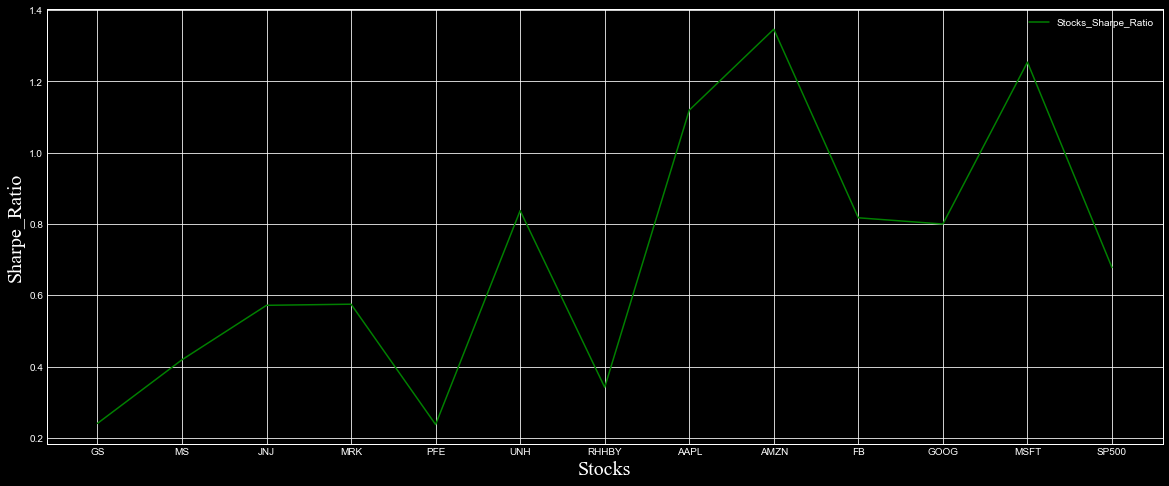

In [50]:
## Visualize the stocks with sharpe ratio
plt.style.use('dark_background')
plt.figure(figsize=[20,8])
sns.lineplot(data = stocks_annual, x='Stocks', y= 'sharpe_ratio', label='Stocks_Sharpe_Ratio', color='Green')
plt.xlabel('Stocks', fontdict={'fontsize':20,'fontname':'Times New Roman'})
plt.ylabel('Sharpe_Ratio',fontdict={'fontsize':20,'fontname':'Times New Roman'})
plt.legend(loc='best')
plt.show()

## STEP 6: ACT

In the final step, we will be delivering our insights and providing recommendations based on our analysis.

**Aggressive Portfolio for Peter:**
 Peter's portfolio, though aggressive, we have made it a point that he gets an exposure to all industries. Since he is young and willing to take risks, we have given him a well diversified portfolio.

  1. AMZN- 15%
  2. MSFT - 15%
  3. Apple - 12%
  4. FB - 10%
  5. Google - 8%
  6. MRk - 12%
  7. JNJ - 10%
  8. RHHBY - 10%
  9. GS - 5%
  10. PFE - 5%

**Conservative Porfollio for Patrick** Conservative portfolio with lower risk and good returns

  1. AMZN- 15%
  2. MSFT - 17%
  3. Apple - 12%
  4. Google - 12%
  5. MRk - 10%
  6. JNJ - 10%
  7. RHHBY - 12%
  8. GS - 4%
  9. PFE - 8%